In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/EXCL.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,2.457900,2.431506,2.347326,1.152957,1.217270,1.191146,1.142186,0.208691,0.496535,0.717006,0.0,0.5,0.5,-1.0,0.572200,0.066667,0.576923,2.779995
2012-10-18,2.495456,2.459688,2.365770,1.907893,1.217270,1.191146,1.142186,0.521982,0.404670,0.669797,0.5,0.5,0.5,-1.0,0.577598,0.133333,0.576923,2.779995
2012-10-19,2.542401,2.485522,2.382677,1.956269,1.379740,1.344960,1.273486,0.924766,0.453348,0.698099,1.0,0.5,0.5,-1.0,0.582996,0.200000,0.576923,2.848005
2012-10-22,2.598734,2.513703,2.402657,1.778437,0.419860,0.709813,0.799059,-0.080060,-0.042936,0.042746,-1.0,0.5,0.5,-1.0,0.599190,0.400000,0.615385,2.711986
2012-10-23,2.631596,2.534840,2.416490,0.797347,0.074304,0.439452,0.585685,-0.345930,-0.210297,0.063931,-0.5,0.5,0.5,-1.0,0.604588,0.466667,0.615385,2.643976


### Plot the Close price - our target

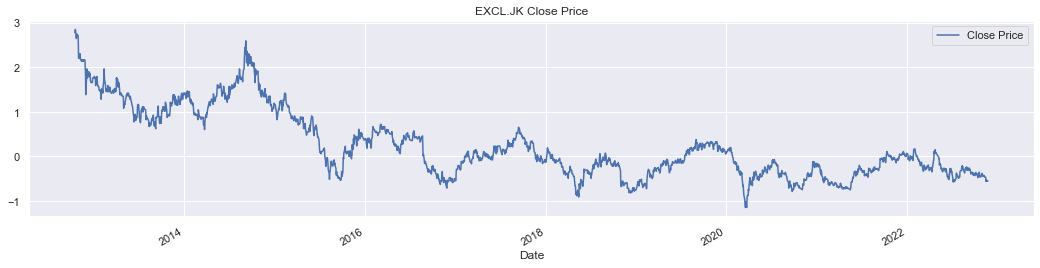

In [3]:
df['Close'].plot(figsize=(18,4))
plt.legend(['Close Price'])
plt.title('EXCL.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set
- Train: 17 Oct 2012 - 17 Oct 2022
- Validation = 18 Oct 2022 - 25 Nov 2022

In [4]:
len(df['2012-10-17':'2022-10-17'])

2480

In [5]:
train_len = len(df['2012-10-17':'2022-10-17'])
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [9]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.78469
[1]	validation_0-rmse:0.77802
[2]	validation_0-rmse:0.77139
[3]	validation_0-rmse:0.76486
[4]	validation_0-rmse:0.75838
[5]	validation_0-rmse:0.75196
[6]	validation_0-rmse:0.74563
[7]	validation_0-rmse:0.73935
[8]	validation_0-rmse:0.73309
[9]	validation_0-rmse:0.72697
[10]	validation_0-rmse:0.72083
[11]	validation_0-rmse:0.71484
[12]	validation_0-rmse:0.70883
[13]	validation_0-rmse:0.70297
[14]	validation_0-rmse:0.69719
[15]	validation_0-rmse:0.69145
[16]	validation_0-rmse:0.68569
[17]	validation_0-rmse:0.68000
[18]	validation_0-rmse:0.67446
[19]	validation_0-rmse:0.66889
[20]	validation_0-rmse:0.66347
[21]	validation_0-rmse:0.65801
[22]	validation_0-rmse:0.65269
[23]	validation_0-rmse:0.64735
[24]	validation_0-rmse:0.64216
[25]	validation_0-rmse:0.63693
[26]	validation_0-rmse:0.63176
[27]	validation_0-rmse:0.62674
[28]	validation_0-rmse:0.62167
[29]	validation_0-rmse:0.61671
[30]	validation_0-rmse:0.61184
[31]	validation_0-rmse:0.60694
[32]	validation_0-

[260]	validation_0-rmse:0.19956
[261]	validation_0-rmse:0.19922
[262]	validation_0-rmse:0.19889
[263]	validation_0-rmse:0.19842
[264]	validation_0-rmse:0.19809
[265]	validation_0-rmse:0.19778
[266]	validation_0-rmse:0.19733
[267]	validation_0-rmse:0.19690
[268]	validation_0-rmse:0.19666
[269]	validation_0-rmse:0.19643
[270]	validation_0-rmse:0.19600
[271]	validation_0-rmse:0.19578
[272]	validation_0-rmse:0.19556
[273]	validation_0-rmse:0.19512
[274]	validation_0-rmse:0.19482
[275]	validation_0-rmse:0.19460
[276]	validation_0-rmse:0.19416
[277]	validation_0-rmse:0.19396
[278]	validation_0-rmse:0.19352
[279]	validation_0-rmse:0.19318
[280]	validation_0-rmse:0.19291
[281]	validation_0-rmse:0.19251
[282]	validation_0-rmse:0.19232
[283]	validation_0-rmse:0.19190
[284]	validation_0-rmse:0.19153
[285]	validation_0-rmse:0.19112
[286]	validation_0-rmse:0.19093
[287]	validation_0-rmse:0.19069
[288]	validation_0-rmse:0.19029
[289]	validation_0-rmse:0.18992
[290]	validation_0-rmse:0.18970
[291]	va

[17]	validation_0-rmse:0.66461
[18]	validation_0-rmse:0.65821
[19]	validation_0-rmse:0.65190
[20]	validation_0-rmse:0.64564
[21]	validation_0-rmse:0.63946
[22]	validation_0-rmse:0.63332
[23]	validation_0-rmse:0.62726
[24]	validation_0-rmse:0.62124
[25]	validation_0-rmse:0.61529
[26]	validation_0-rmse:0.60939
[27]	validation_0-rmse:0.60356
[28]	validation_0-rmse:0.59778
[29]	validation_0-rmse:0.59207
[30]	validation_0-rmse:0.58641
[31]	validation_0-rmse:0.58081
[32]	validation_0-rmse:0.57526
[33]	validation_0-rmse:0.56978
[34]	validation_0-rmse:0.56434
[35]	validation_0-rmse:0.55899
[36]	validation_0-rmse:0.55364
[37]	validation_0-rmse:0.54838
[38]	validation_0-rmse:0.54317
[39]	validation_0-rmse:0.53801
[40]	validation_0-rmse:0.53288
[41]	validation_0-rmse:0.52785
[42]	validation_0-rmse:0.52285
[43]	validation_0-rmse:0.51790
[44]	validation_0-rmse:0.51300
[45]	validation_0-rmse:0.50816
[46]	validation_0-rmse:0.50334
[47]	validation_0-rmse:0.49859
[48]	validation_0-rmse:0.49383
[49]	val

[276]	validation_0-rmse:0.08351
[277]	validation_0-rmse:0.08308
[278]	validation_0-rmse:0.08265
[279]	validation_0-rmse:0.08223
[280]	validation_0-rmse:0.08181
[281]	validation_0-rmse:0.08139
[282]	validation_0-rmse:0.08097
[283]	validation_0-rmse:0.08056
[284]	validation_0-rmse:0.08017
[285]	validation_0-rmse:0.07977
[286]	validation_0-rmse:0.07936
[287]	validation_0-rmse:0.07898
[288]	validation_0-rmse:0.07860
[289]	validation_0-rmse:0.07822
[290]	validation_0-rmse:0.07784
[291]	validation_0-rmse:0.07747
[292]	validation_0-rmse:0.07710
[293]	validation_0-rmse:0.07674
[294]	validation_0-rmse:0.07638
[295]	validation_0-rmse:0.07601
[296]	validation_0-rmse:0.07567
[297]	validation_0-rmse:0.07531
[298]	validation_0-rmse:0.07498
[299]	validation_0-rmse:0.07463
[300]	validation_0-rmse:0.07430
[301]	validation_0-rmse:0.07397
[302]	validation_0-rmse:0.07362
[303]	validation_0-rmse:0.07330
[304]	validation_0-rmse:0.07299
[305]	validation_0-rmse:0.07266
[306]	validation_0-rmse:0.07235
[307]	va

[34]	validation_0-rmse:0.56526
[35]	validation_0-rmse:0.55988
[36]	validation_0-rmse:0.55460
[37]	validation_0-rmse:0.54937
[38]	validation_0-rmse:0.54414
[39]	validation_0-rmse:0.53899
[40]	validation_0-rmse:0.53391
[41]	validation_0-rmse:0.52884
[42]	validation_0-rmse:0.52385
[43]	validation_0-rmse:0.51892
[44]	validation_0-rmse:0.51405
[45]	validation_0-rmse:0.50923
[46]	validation_0-rmse:0.50441
[47]	validation_0-rmse:0.49968
[48]	validation_0-rmse:0.49498
[49]	validation_0-rmse:0.49036
[50]	validation_0-rmse:0.48578
[51]	validation_0-rmse:0.48125
[52]	validation_0-rmse:0.47672
[53]	validation_0-rmse:0.47228
[54]	validation_0-rmse:0.46788
[55]	validation_0-rmse:0.46349
[56]	validation_0-rmse:0.45919
[57]	validation_0-rmse:0.45493
[58]	validation_0-rmse:0.45071
[59]	validation_0-rmse:0.44650
[60]	validation_0-rmse:0.44237
[61]	validation_0-rmse:0.43828
[62]	validation_0-rmse:0.43423
[63]	validation_0-rmse:0.43022
[64]	validation_0-rmse:0.42622
[65]	validation_0-rmse:0.42231
[66]	val

[293]	validation_0-rmse:0.07664
[294]	validation_0-rmse:0.07624
[295]	validation_0-rmse:0.07588
[296]	validation_0-rmse:0.07549
[297]	validation_0-rmse:0.07512
[298]	validation_0-rmse:0.07474
[299]	validation_0-rmse:0.07436
[300]	validation_0-rmse:0.07400
[301]	validation_0-rmse:0.07363
[302]	validation_0-rmse:0.07326
[303]	validation_0-rmse:0.07292
[304]	validation_0-rmse:0.07257
[305]	validation_0-rmse:0.07222
[306]	validation_0-rmse:0.07187
[307]	validation_0-rmse:0.07153
[308]	validation_0-rmse:0.07119
[309]	validation_0-rmse:0.07086
[310]	validation_0-rmse:0.07052
[311]	validation_0-rmse:0.07019
[312]	validation_0-rmse:0.06987
[313]	validation_0-rmse:0.06955
[314]	validation_0-rmse:0.06923
[315]	validation_0-rmse:0.06891
[316]	validation_0-rmse:0.06860
[317]	validation_0-rmse:0.06829
[318]	validation_0-rmse:0.06799
[319]	validation_0-rmse:0.06768
[320]	validation_0-rmse:0.06737
[321]	validation_0-rmse:0.06707
[322]	validation_0-rmse:0.06677
[323]	validation_0-rmse:0.06648
[324]	va

[51]	validation_0-rmse:0.48452
[52]	validation_0-rmse:0.48007
[53]	validation_0-rmse:0.47570
[54]	validation_0-rmse:0.47134
[55]	validation_0-rmse:0.46701
[56]	validation_0-rmse:0.46274
[57]	validation_0-rmse:0.45851
[58]	validation_0-rmse:0.45436
[59]	validation_0-rmse:0.45020
[60]	validation_0-rmse:0.44609
[61]	validation_0-rmse:0.44202
[62]	validation_0-rmse:0.43801
[63]	validation_0-rmse:0.43403
[64]	validation_0-rmse:0.43013
[65]	validation_0-rmse:0.42622
[66]	validation_0-rmse:0.42238
[67]	validation_0-rmse:0.41855
[68]	validation_0-rmse:0.41477
[69]	validation_0-rmse:0.41102
[70]	validation_0-rmse:0.40732
[71]	validation_0-rmse:0.40365
[72]	validation_0-rmse:0.40002
[73]	validation_0-rmse:0.39642
[74]	validation_0-rmse:0.39290
[75]	validation_0-rmse:0.38938
[76]	validation_0-rmse:0.38590
[77]	validation_0-rmse:0.38244
[78]	validation_0-rmse:0.37901
[79]	validation_0-rmse:0.37564
[80]	validation_0-rmse:0.37233
[81]	validation_0-rmse:0.36902
[82]	validation_0-rmse:0.36575
[83]	val

[309]	validation_0-rmse:0.07845
[310]	validation_0-rmse:0.07814
[311]	validation_0-rmse:0.07782
[312]	validation_0-rmse:0.07751
[313]	validation_0-rmse:0.07718
[314]	validation_0-rmse:0.07686
[315]	validation_0-rmse:0.07654
[316]	validation_0-rmse:0.07622
[317]	validation_0-rmse:0.07589
[318]	validation_0-rmse:0.07558
[319]	validation_0-rmse:0.07529
[320]	validation_0-rmse:0.07498
[321]	validation_0-rmse:0.07467
[322]	validation_0-rmse:0.07436
[323]	validation_0-rmse:0.07409
[324]	validation_0-rmse:0.07379
[325]	validation_0-rmse:0.07349
[326]	validation_0-rmse:0.07319
[327]	validation_0-rmse:0.07290
[328]	validation_0-rmse:0.07261
[329]	validation_0-rmse:0.07234
[330]	validation_0-rmse:0.07205
[331]	validation_0-rmse:0.07177
[332]	validation_0-rmse:0.07150
[333]	validation_0-rmse:0.07122
[334]	validation_0-rmse:0.07097
[335]	validation_0-rmse:0.07070
[336]	validation_0-rmse:0.07044
[337]	validation_0-rmse:0.07015
[338]	validation_0-rmse:0.06988
[339]	validation_0-rmse:0.06964
[340]	va

[68]	validation_0-rmse:0.41151
[69]	validation_0-rmse:0.40774
[70]	validation_0-rmse:0.40397
[71]	validation_0-rmse:0.40024
[72]	validation_0-rmse:0.39659
[73]	validation_0-rmse:0.39293
[74]	validation_0-rmse:0.38937
[75]	validation_0-rmse:0.38579
[76]	validation_0-rmse:0.38228
[77]	validation_0-rmse:0.37881
[78]	validation_0-rmse:0.37534
[79]	validation_0-rmse:0.37193
[80]	validation_0-rmse:0.36857
[81]	validation_0-rmse:0.36520
[82]	validation_0-rmse:0.36190
[83]	validation_0-rmse:0.35860
[84]	validation_0-rmse:0.35538
[85]	validation_0-rmse:0.35220
[86]	validation_0-rmse:0.34900
[87]	validation_0-rmse:0.34587
[88]	validation_0-rmse:0.34276
[89]	validation_0-rmse:0.33971
[90]	validation_0-rmse:0.33663
[91]	validation_0-rmse:0.33364
[92]	validation_0-rmse:0.33063
[93]	validation_0-rmse:0.32769
[94]	validation_0-rmse:0.32474
[95]	validation_0-rmse:0.32186
[96]	validation_0-rmse:0.31903
[97]	validation_0-rmse:0.31617
[98]	validation_0-rmse:0.31339
[99]	validation_0-rmse:0.31063
[100]	va

[326]	validation_0-rmse:0.06607
[327]	validation_0-rmse:0.06579
[328]	validation_0-rmse:0.06550
[329]	validation_0-rmse:0.06521
[330]	validation_0-rmse:0.06495
[331]	validation_0-rmse:0.06466
[332]	validation_0-rmse:0.06440
[333]	validation_0-rmse:0.06412
[334]	validation_0-rmse:0.06385
[335]	validation_0-rmse:0.06360
[336]	validation_0-rmse:0.06333
[337]	validation_0-rmse:0.06306
[338]	validation_0-rmse:0.06282
[339]	validation_0-rmse:0.06255
[340]	validation_0-rmse:0.06229
[341]	validation_0-rmse:0.06205
[342]	validation_0-rmse:0.06180
[343]	validation_0-rmse:0.06157
[344]	validation_0-rmse:0.06131
[345]	validation_0-rmse:0.06107
[346]	validation_0-rmse:0.06083
[347]	validation_0-rmse:0.06060
[348]	validation_0-rmse:0.06036
[349]	validation_0-rmse:0.06012
[350]	validation_0-rmse:0.05990
[351]	validation_0-rmse:0.05967
[352]	validation_0-rmse:0.05945
[353]	validation_0-rmse:0.05923
[354]	validation_0-rmse:0.05902
[355]	validation_0-rmse:0.05881
[356]	validation_0-rmse:0.05858
[357]	va

[85]	validation_0-rmse:0.40902
[86]	validation_0-rmse:0.40623
[87]	validation_0-rmse:0.40367
[88]	validation_0-rmse:0.40088
[89]	validation_0-rmse:0.39824
[90]	validation_0-rmse:0.39574
[91]	validation_0-rmse:0.39305
[92]	validation_0-rmse:0.39043
[93]	validation_0-rmse:0.38780
[94]	validation_0-rmse:0.38541
[95]	validation_0-rmse:0.38283
[96]	validation_0-rmse:0.38039
[97]	validation_0-rmse:0.37810
[98]	validation_0-rmse:0.37561
[99]	validation_0-rmse:0.37324
[100]	validation_0-rmse:0.37101
[101]	validation_0-rmse:0.36859
[102]	validation_0-rmse:0.36641
[103]	validation_0-rmse:0.36405
[104]	validation_0-rmse:0.36190
[105]	validation_0-rmse:0.35963
[106]	validation_0-rmse:0.35734
[107]	validation_0-rmse:0.35528
[108]	validation_0-rmse:0.35304
[109]	validation_0-rmse:0.35088
[110]	validation_0-rmse:0.34887
[111]	validation_0-rmse:0.34670
[112]	validation_0-rmse:0.34478
[113]	validation_0-rmse:0.34270
[114]	validation_0-rmse:0.34065
[115]	validation_0-rmse:0.33876
[116]	validation_0-rmse

[342]	validation_0-rmse:0.17743
[343]	validation_0-rmse:0.17716
[344]	validation_0-rmse:0.17691
[345]	validation_0-rmse:0.17682
[346]	validation_0-rmse:0.17672
[347]	validation_0-rmse:0.17646
[348]	validation_0-rmse:0.17637
[349]	validation_0-rmse:0.17615
[350]	validation_0-rmse:0.17606
[351]	validation_0-rmse:0.17597
[352]	validation_0-rmse:0.17572
[353]	validation_0-rmse:0.17563
[354]	validation_0-rmse:0.17544
[355]	validation_0-rmse:0.17535
[356]	validation_0-rmse:0.17529
[357]	validation_0-rmse:0.17503
[358]	validation_0-rmse:0.17484
[359]	validation_0-rmse:0.17458
[360]	validation_0-rmse:0.17439
[361]	validation_0-rmse:0.17433
[362]	validation_0-rmse:0.17408
[363]	validation_0-rmse:0.17384
[364]	validation_0-rmse:0.17359
[365]	validation_0-rmse:0.17353
[366]	validation_0-rmse:0.17330
[367]	validation_0-rmse:0.17323
[368]	validation_0-rmse:0.17299
[369]	validation_0-rmse:0.17292
[370]	validation_0-rmse:0.17269
[371]	validation_0-rmse:0.17262
[372]	validation_0-rmse:0.17250
[373]	va

[599]	validation_0-rmse:0.14791
[0]	validation_0-rmse:0.78374
[1]	validation_0-rmse:0.77615
[2]	validation_0-rmse:0.76863
[3]	validation_0-rmse:0.76120
[4]	validation_0-rmse:0.75383
[5]	validation_0-rmse:0.74655
[6]	validation_0-rmse:0.73934
[7]	validation_0-rmse:0.73218
[8]	validation_0-rmse:0.72512
[9]	validation_0-rmse:0.71812
[10]	validation_0-rmse:0.71120
[11]	validation_0-rmse:0.70435
[12]	validation_0-rmse:0.69755
[13]	validation_0-rmse:0.69083
[14]	validation_0-rmse:0.68416
[15]	validation_0-rmse:0.67759
[16]	validation_0-rmse:0.67106
[17]	validation_0-rmse:0.66461
[18]	validation_0-rmse:0.65821
[19]	validation_0-rmse:0.65190
[20]	validation_0-rmse:0.64564
[21]	validation_0-rmse:0.63946
[22]	validation_0-rmse:0.63332
[23]	validation_0-rmse:0.62726
[24]	validation_0-rmse:0.62124
[25]	validation_0-rmse:0.61529
[26]	validation_0-rmse:0.60939
[27]	validation_0-rmse:0.60356
[28]	validation_0-rmse:0.59778
[29]	validation_0-rmse:0.59207
[30]	validation_0-rmse:0.58641
[31]	validation_0

[259]	validation_0-rmse:0.09161
[260]	validation_0-rmse:0.09110
[261]	validation_0-rmse:0.09059
[262]	validation_0-rmse:0.09009
[263]	validation_0-rmse:0.08957
[264]	validation_0-rmse:0.08907
[265]	validation_0-rmse:0.08859
[266]	validation_0-rmse:0.08810
[267]	validation_0-rmse:0.08761
[268]	validation_0-rmse:0.08713
[269]	validation_0-rmse:0.08667
[270]	validation_0-rmse:0.08620
[271]	validation_0-rmse:0.08574
[272]	validation_0-rmse:0.08527
[273]	validation_0-rmse:0.08482
[274]	validation_0-rmse:0.08438
[275]	validation_0-rmse:0.08394
[276]	validation_0-rmse:0.08351
[277]	validation_0-rmse:0.08308
[278]	validation_0-rmse:0.08265
[279]	validation_0-rmse:0.08223
[280]	validation_0-rmse:0.08181
[281]	validation_0-rmse:0.08139
[282]	validation_0-rmse:0.08097
[283]	validation_0-rmse:0.08056
[284]	validation_0-rmse:0.08017
[285]	validation_0-rmse:0.07977
[286]	validation_0-rmse:0.07936
[287]	validation_0-rmse:0.07898
[288]	validation_0-rmse:0.07860
[289]	validation_0-rmse:0.07822
[290]	va

[516]	validation_0-rmse:0.04463
[517]	validation_0-rmse:0.04457
[518]	validation_0-rmse:0.04454
[519]	validation_0-rmse:0.04450
[520]	validation_0-rmse:0.04445
[521]	validation_0-rmse:0.04440
[522]	validation_0-rmse:0.04435
[523]	validation_0-rmse:0.04431
[524]	validation_0-rmse:0.04428
[525]	validation_0-rmse:0.04424
[526]	validation_0-rmse:0.04420
[527]	validation_0-rmse:0.04415
[528]	validation_0-rmse:0.04410
[529]	validation_0-rmse:0.04405
[530]	validation_0-rmse:0.04401
[531]	validation_0-rmse:0.04396
[532]	validation_0-rmse:0.04392
[533]	validation_0-rmse:0.04387
[534]	validation_0-rmse:0.04383
[535]	validation_0-rmse:0.04379
[536]	validation_0-rmse:0.04375
[537]	validation_0-rmse:0.04371
[538]	validation_0-rmse:0.04368
[539]	validation_0-rmse:0.04363
[540]	validation_0-rmse:0.04359
[541]	validation_0-rmse:0.04355
[542]	validation_0-rmse:0.04351
[543]	validation_0-rmse:0.04347
[544]	validation_0-rmse:0.04343
[545]	validation_0-rmse:0.04340
[546]	validation_0-rmse:0.04336
[547]	va

[176]	validation_0-rmse:0.16298
[177]	validation_0-rmse:0.16172
[178]	validation_0-rmse:0.16051
[179]	validation_0-rmse:0.15926
[180]	validation_0-rmse:0.15804
[181]	validation_0-rmse:0.15683
[182]	validation_0-rmse:0.15568
[183]	validation_0-rmse:0.15447
[184]	validation_0-rmse:0.15329
[185]	validation_0-rmse:0.15211
[186]	validation_0-rmse:0.15100
[187]	validation_0-rmse:0.14984
[188]	validation_0-rmse:0.14875
[189]	validation_0-rmse:0.14762
[190]	validation_0-rmse:0.14651
[191]	validation_0-rmse:0.14544
[192]	validation_0-rmse:0.14434
[193]	validation_0-rmse:0.14331
[194]	validation_0-rmse:0.14223
[195]	validation_0-rmse:0.14119
[196]	validation_0-rmse:0.14015
[197]	validation_0-rmse:0.13915
[198]	validation_0-rmse:0.13811
[199]	validation_0-rmse:0.13709
[200]	validation_0-rmse:0.13609
[201]	validation_0-rmse:0.13514
[202]	validation_0-rmse:0.13414
[203]	validation_0-rmse:0.13320
[204]	validation_0-rmse:0.13223
[205]	validation_0-rmse:0.13132
[206]	validation_0-rmse:0.13037
[207]	va

[433]	validation_0-rmse:0.04611
[434]	validation_0-rmse:0.04600
[435]	validation_0-rmse:0.04590
[436]	validation_0-rmse:0.04579
[437]	validation_0-rmse:0.04569
[438]	validation_0-rmse:0.04558
[439]	validation_0-rmse:0.04548
[440]	validation_0-rmse:0.04538
[441]	validation_0-rmse:0.04528
[442]	validation_0-rmse:0.04518
[443]	validation_0-rmse:0.04508
[444]	validation_0-rmse:0.04499
[445]	validation_0-rmse:0.04488
[446]	validation_0-rmse:0.04478
[447]	validation_0-rmse:0.04468
[448]	validation_0-rmse:0.04459
[449]	validation_0-rmse:0.04450
[450]	validation_0-rmse:0.04440
[451]	validation_0-rmse:0.04431
[452]	validation_0-rmse:0.04421
[453]	validation_0-rmse:0.04412
[454]	validation_0-rmse:0.04404
[455]	validation_0-rmse:0.04395
[456]	validation_0-rmse:0.04385
[457]	validation_0-rmse:0.04377
[458]	validation_0-rmse:0.04368
[459]	validation_0-rmse:0.04360
[460]	validation_0-rmse:0.04351
[461]	validation_0-rmse:0.04342
[462]	validation_0-rmse:0.04334
[463]	validation_0-rmse:0.04326
[464]	va

[93]	validation_0-rmse:0.33202
[94]	validation_0-rmse:0.32914
[95]	validation_0-rmse:0.32631
[96]	validation_0-rmse:0.32352
[97]	validation_0-rmse:0.32071
[98]	validation_0-rmse:0.31797
[99]	validation_0-rmse:0.31525
[100]	validation_0-rmse:0.31257
[101]	validation_0-rmse:0.30986
[102]	validation_0-rmse:0.30721
[103]	validation_0-rmse:0.30460
[104]	validation_0-rmse:0.30200
[105]	validation_0-rmse:0.29944
[106]	validation_0-rmse:0.29691
[107]	validation_0-rmse:0.29436
[108]	validation_0-rmse:0.29187
[109]	validation_0-rmse:0.28938
[110]	validation_0-rmse:0.28696
[111]	validation_0-rmse:0.28455
[112]	validation_0-rmse:0.28217
[113]	validation_0-rmse:0.27978
[114]	validation_0-rmse:0.27744
[115]	validation_0-rmse:0.27512
[116]	validation_0-rmse:0.27284
[117]	validation_0-rmse:0.27057
[118]	validation_0-rmse:0.26832
[119]	validation_0-rmse:0.26610
[120]	validation_0-rmse:0.26389
[121]	validation_0-rmse:0.26173
[122]	validation_0-rmse:0.25954
[123]	validation_0-rmse:0.25737
[124]	validatio

[350]	validation_0-rmse:0.06698
[351]	validation_0-rmse:0.06675
[352]	validation_0-rmse:0.06650
[353]	validation_0-rmse:0.06628
[354]	validation_0-rmse:0.06606
[355]	validation_0-rmse:0.06583
[356]	validation_0-rmse:0.06562
[357]	validation_0-rmse:0.06541
[358]	validation_0-rmse:0.06517
[359]	validation_0-rmse:0.06492
[360]	validation_0-rmse:0.06471
[361]	validation_0-rmse:0.06450
[362]	validation_0-rmse:0.06426
[363]	validation_0-rmse:0.06406
[364]	validation_0-rmse:0.06387
[365]	validation_0-rmse:0.06367
[366]	validation_0-rmse:0.06347
[367]	validation_0-rmse:0.06323
[368]	validation_0-rmse:0.06302
[369]	validation_0-rmse:0.06283
[370]	validation_0-rmse:0.06261
[371]	validation_0-rmse:0.06242
[372]	validation_0-rmse:0.06220
[373]	validation_0-rmse:0.06203
[374]	validation_0-rmse:0.06180
[375]	validation_0-rmse:0.06162
[376]	validation_0-rmse:0.06141
[377]	validation_0-rmse:0.06123
[378]	validation_0-rmse:0.06104
[379]	validation_0-rmse:0.06087
[380]	validation_0-rmse:0.06067
[381]	va

[7]	validation_0-rmse:0.73301
[8]	validation_0-rmse:0.72601
[9]	validation_0-rmse:0.71909
[10]	validation_0-rmse:0.71222
[11]	validation_0-rmse:0.70543
[12]	validation_0-rmse:0.69871
[13]	validation_0-rmse:0.69206
[14]	validation_0-rmse:0.68551
[15]	validation_0-rmse:0.67899
[16]	validation_0-rmse:0.67254
[17]	validation_0-rmse:0.66614
[18]	validation_0-rmse:0.65981
[19]	validation_0-rmse:0.65353
[20]	validation_0-rmse:0.64737
[21]	validation_0-rmse:0.64122
[22]	validation_0-rmse:0.63514
[23]	validation_0-rmse:0.62909
[24]	validation_0-rmse:0.62313
[25]	validation_0-rmse:0.61720
[26]	validation_0-rmse:0.61137
[27]	validation_0-rmse:0.60556
[28]	validation_0-rmse:0.59987
[29]	validation_0-rmse:0.59419
[30]	validation_0-rmse:0.58858
[31]	validation_0-rmse:0.58300
[32]	validation_0-rmse:0.57742
[33]	validation_0-rmse:0.57198
[34]	validation_0-rmse:0.56652
[35]	validation_0-rmse:0.56120
[36]	validation_0-rmse:0.55585
[37]	validation_0-rmse:0.55059
[38]	validation_0-rmse:0.54535
[39]	valida

[267]	validation_0-rmse:0.08875
[268]	validation_0-rmse:0.08825
[269]	validation_0-rmse:0.08776
[270]	validation_0-rmse:0.08724
[271]	validation_0-rmse:0.08675
[272]	validation_0-rmse:0.08627
[273]	validation_0-rmse:0.08576
[274]	validation_0-rmse:0.08530
[275]	validation_0-rmse:0.08480
[276]	validation_0-rmse:0.08434
[277]	validation_0-rmse:0.08390
[278]	validation_0-rmse:0.08343
[279]	validation_0-rmse:0.08298
[280]	validation_0-rmse:0.08256
[281]	validation_0-rmse:0.08210
[282]	validation_0-rmse:0.08164
[283]	validation_0-rmse:0.08121
[284]	validation_0-rmse:0.08080
[285]	validation_0-rmse:0.08037
[286]	validation_0-rmse:0.07997
[287]	validation_0-rmse:0.07953
[288]	validation_0-rmse:0.07912
[289]	validation_0-rmse:0.07868
[290]	validation_0-rmse:0.07829
[291]	validation_0-rmse:0.07791
[292]	validation_0-rmse:0.07753
[293]	validation_0-rmse:0.07711
[294]	validation_0-rmse:0.07673
[295]	validation_0-rmse:0.07636
[296]	validation_0-rmse:0.07596
[297]	validation_0-rmse:0.07559
[298]	va

[524]	validation_0-rmse:0.03905
[525]	validation_0-rmse:0.03900
[526]	validation_0-rmse:0.03894
[527]	validation_0-rmse:0.03890
[528]	validation_0-rmse:0.03884
[529]	validation_0-rmse:0.03878
[530]	validation_0-rmse:0.03872
[531]	validation_0-rmse:0.03867
[532]	validation_0-rmse:0.03862
[533]	validation_0-rmse:0.03857
[534]	validation_0-rmse:0.03853
[535]	validation_0-rmse:0.03847
[536]	validation_0-rmse:0.03843
[537]	validation_0-rmse:0.03838
[538]	validation_0-rmse:0.03832
[539]	validation_0-rmse:0.03828
[540]	validation_0-rmse:0.03822
[541]	validation_0-rmse:0.03817
[542]	validation_0-rmse:0.03813
[543]	validation_0-rmse:0.03808
[544]	validation_0-rmse:0.03803
[545]	validation_0-rmse:0.03799
[546]	validation_0-rmse:0.03793
[547]	validation_0-rmse:0.03788
[548]	validation_0-rmse:0.03783
[549]	validation_0-rmse:0.03779
[550]	validation_0-rmse:0.03775
[551]	validation_0-rmse:0.03771
[552]	validation_0-rmse:0.03767
[553]	validation_0-rmse:0.03762
[554]	validation_0-rmse:0.03758
[555]	va

[184]	validation_0-rmse:0.24534
[185]	validation_0-rmse:0.24445
[186]	validation_0-rmse:0.24361
[187]	validation_0-rmse:0.24274
[188]	validation_0-rmse:0.24200
[189]	validation_0-rmse:0.24120
[190]	validation_0-rmse:0.24040
[191]	validation_0-rmse:0.23969
[192]	validation_0-rmse:0.23896
[193]	validation_0-rmse:0.23811
[194]	validation_0-rmse:0.23734
[195]	validation_0-rmse:0.23646
[196]	validation_0-rmse:0.23564
[197]	validation_0-rmse:0.23482
[198]	validation_0-rmse:0.23408
[199]	validation_0-rmse:0.23324
[200]	validation_0-rmse:0.23249
[201]	validation_0-rmse:0.23179
[202]	validation_0-rmse:0.23106
[203]	validation_0-rmse:0.23025
[204]	validation_0-rmse:0.22946
[205]	validation_0-rmse:0.22875
[206]	validation_0-rmse:0.22797
[207]	validation_0-rmse:0.22732
[208]	validation_0-rmse:0.22660
[209]	validation_0-rmse:0.22601
[210]	validation_0-rmse:0.22538
[211]	validation_0-rmse:0.22464
[212]	validation_0-rmse:0.22391
[213]	validation_0-rmse:0.22323
[214]	validation_0-rmse:0.22268
[215]	va

[441]	validation_0-rmse:0.16310
[442]	validation_0-rmse:0.16295
[443]	validation_0-rmse:0.16276
[444]	validation_0-rmse:0.16263
[445]	validation_0-rmse:0.16239
[446]	validation_0-rmse:0.16236
[447]	validation_0-rmse:0.16219
[448]	validation_0-rmse:0.16216
[449]	validation_0-rmse:0.16192
[450]	validation_0-rmse:0.16177
[451]	validation_0-rmse:0.16164
[452]	validation_0-rmse:0.16146
[453]	validation_0-rmse:0.16143
[454]	validation_0-rmse:0.16121
[455]	validation_0-rmse:0.16106
[456]	validation_0-rmse:0.16090
[457]	validation_0-rmse:0.16073
[458]	validation_0-rmse:0.16070
[459]	validation_0-rmse:0.16054
[460]	validation_0-rmse:0.16041
[461]	validation_0-rmse:0.16019
[462]	validation_0-rmse:0.16016
[463]	validation_0-rmse:0.15995
[464]	validation_0-rmse:0.15982
[465]	validation_0-rmse:0.15979
[466]	validation_0-rmse:0.15964
[467]	validation_0-rmse:0.15943
[468]	validation_0-rmse:0.15931
[469]	validation_0-rmse:0.15928
[470]	validation_0-rmse:0.15913
[471]	validation_0-rmse:0.15909
[472]	va

[698]	validation_0-rmse:0.14240
[699]	validation_0-rmse:0.14240
[0]	validation_0-rmse:0.78374
[1]	validation_0-rmse:0.77615
[2]	validation_0-rmse:0.76863
[3]	validation_0-rmse:0.76120
[4]	validation_0-rmse:0.75383
[5]	validation_0-rmse:0.74655
[6]	validation_0-rmse:0.73934
[7]	validation_0-rmse:0.73218
[8]	validation_0-rmse:0.72512
[9]	validation_0-rmse:0.71812
[10]	validation_0-rmse:0.71120
[11]	validation_0-rmse:0.70435
[12]	validation_0-rmse:0.69755
[13]	validation_0-rmse:0.69083
[14]	validation_0-rmse:0.68416
[15]	validation_0-rmse:0.67759
[16]	validation_0-rmse:0.67106
[17]	validation_0-rmse:0.66461
[18]	validation_0-rmse:0.65821
[19]	validation_0-rmse:0.65190
[20]	validation_0-rmse:0.64564
[21]	validation_0-rmse:0.63946
[22]	validation_0-rmse:0.63332
[23]	validation_0-rmse:0.62726
[24]	validation_0-rmse:0.62124
[25]	validation_0-rmse:0.61529
[26]	validation_0-rmse:0.60939
[27]	validation_0-rmse:0.60356
[28]	validation_0-rmse:0.59778
[29]	validation_0-rmse:0.59207
[30]	validation_

[258]	validation_0-rmse:0.09212
[259]	validation_0-rmse:0.09161
[260]	validation_0-rmse:0.09110
[261]	validation_0-rmse:0.09059
[262]	validation_0-rmse:0.09009
[263]	validation_0-rmse:0.08957
[264]	validation_0-rmse:0.08907
[265]	validation_0-rmse:0.08859
[266]	validation_0-rmse:0.08810
[267]	validation_0-rmse:0.08761
[268]	validation_0-rmse:0.08713
[269]	validation_0-rmse:0.08667
[270]	validation_0-rmse:0.08620
[271]	validation_0-rmse:0.08574
[272]	validation_0-rmse:0.08527
[273]	validation_0-rmse:0.08482
[274]	validation_0-rmse:0.08438
[275]	validation_0-rmse:0.08394
[276]	validation_0-rmse:0.08351
[277]	validation_0-rmse:0.08308
[278]	validation_0-rmse:0.08265
[279]	validation_0-rmse:0.08223
[280]	validation_0-rmse:0.08181
[281]	validation_0-rmse:0.08139
[282]	validation_0-rmse:0.08097
[283]	validation_0-rmse:0.08056
[284]	validation_0-rmse:0.08017
[285]	validation_0-rmse:0.07977
[286]	validation_0-rmse:0.07936
[287]	validation_0-rmse:0.07898
[288]	validation_0-rmse:0.07860
[289]	va

[515]	validation_0-rmse:0.04466
[516]	validation_0-rmse:0.04463
[517]	validation_0-rmse:0.04457
[518]	validation_0-rmse:0.04454
[519]	validation_0-rmse:0.04450
[520]	validation_0-rmse:0.04445
[521]	validation_0-rmse:0.04440
[522]	validation_0-rmse:0.04435
[523]	validation_0-rmse:0.04431
[524]	validation_0-rmse:0.04428
[525]	validation_0-rmse:0.04424
[526]	validation_0-rmse:0.04420
[527]	validation_0-rmse:0.04415
[528]	validation_0-rmse:0.04410
[529]	validation_0-rmse:0.04405
[530]	validation_0-rmse:0.04401
[531]	validation_0-rmse:0.04396
[532]	validation_0-rmse:0.04392
[533]	validation_0-rmse:0.04387
[534]	validation_0-rmse:0.04383
[535]	validation_0-rmse:0.04379
[536]	validation_0-rmse:0.04375
[537]	validation_0-rmse:0.04371
[538]	validation_0-rmse:0.04368
[539]	validation_0-rmse:0.04363
[540]	validation_0-rmse:0.04359
[541]	validation_0-rmse:0.04355
[542]	validation_0-rmse:0.04351
[543]	validation_0-rmse:0.04347
[544]	validation_0-rmse:0.04343
[545]	validation_0-rmse:0.04340
[546]	va

[74]	validation_0-rmse:0.38870
[75]	validation_0-rmse:0.38517
[76]	validation_0-rmse:0.38168
[77]	validation_0-rmse:0.37818
[78]	validation_0-rmse:0.37472
[79]	validation_0-rmse:0.37133
[80]	validation_0-rmse:0.36795
[81]	validation_0-rmse:0.36464
[82]	validation_0-rmse:0.36136
[83]	validation_0-rmse:0.35806
[84]	validation_0-rmse:0.35486
[85]	validation_0-rmse:0.35168
[86]	validation_0-rmse:0.34851
[87]	validation_0-rmse:0.34539
[88]	validation_0-rmse:0.34230
[89]	validation_0-rmse:0.33921
[90]	validation_0-rmse:0.33618
[91]	validation_0-rmse:0.33317
[92]	validation_0-rmse:0.33022
[93]	validation_0-rmse:0.32729
[94]	validation_0-rmse:0.32438
[95]	validation_0-rmse:0.32148
[96]	validation_0-rmse:0.31862
[97]	validation_0-rmse:0.31579
[98]	validation_0-rmse:0.31298
[99]	validation_0-rmse:0.31022
[100]	validation_0-rmse:0.30750
[101]	validation_0-rmse:0.30477
[102]	validation_0-rmse:0.30207
[103]	validation_0-rmse:0.29941
[104]	validation_0-rmse:0.29679
[105]	validation_0-rmse:0.29418
[1

[331]	validation_0-rmse:0.06417
[332]	validation_0-rmse:0.06390
[333]	validation_0-rmse:0.06364
[334]	validation_0-rmse:0.06337
[335]	validation_0-rmse:0.06311
[336]	validation_0-rmse:0.06286
[337]	validation_0-rmse:0.06259
[338]	validation_0-rmse:0.06233
[339]	validation_0-rmse:0.06209
[340]	validation_0-rmse:0.06183
[341]	validation_0-rmse:0.06158
[342]	validation_0-rmse:0.06133
[343]	validation_0-rmse:0.06110
[344]	validation_0-rmse:0.06086
[345]	validation_0-rmse:0.06062
[346]	validation_0-rmse:0.06038
[347]	validation_0-rmse:0.06016
[348]	validation_0-rmse:0.05993
[349]	validation_0-rmse:0.05970
[350]	validation_0-rmse:0.05948
[351]	validation_0-rmse:0.05925
[352]	validation_0-rmse:0.05903
[353]	validation_0-rmse:0.05880
[354]	validation_0-rmse:0.05858
[355]	validation_0-rmse:0.05837
[356]	validation_0-rmse:0.05814
[357]	validation_0-rmse:0.05793
[358]	validation_0-rmse:0.05772
[359]	validation_0-rmse:0.05751
[360]	validation_0-rmse:0.05731
[361]	validation_0-rmse:0.05711
[362]	va

[588]	validation_0-rmse:0.03632
[589]	validation_0-rmse:0.03628
[590]	validation_0-rmse:0.03625
[591]	validation_0-rmse:0.03622
[592]	validation_0-rmse:0.03618
[593]	validation_0-rmse:0.03616
[594]	validation_0-rmse:0.03612
[595]	validation_0-rmse:0.03610
[596]	validation_0-rmse:0.03606
[597]	validation_0-rmse:0.03603
[598]	validation_0-rmse:0.03600
[599]	validation_0-rmse:0.03598
[600]	validation_0-rmse:0.03594
[601]	validation_0-rmse:0.03591
[602]	validation_0-rmse:0.03588
[603]	validation_0-rmse:0.03584
[604]	validation_0-rmse:0.03582
[605]	validation_0-rmse:0.03578
[606]	validation_0-rmse:0.03575
[607]	validation_0-rmse:0.03573
[608]	validation_0-rmse:0.03570
[609]	validation_0-rmse:0.03567
[610]	validation_0-rmse:0.03565
[611]	validation_0-rmse:0.03561
[612]	validation_0-rmse:0.03558
[613]	validation_0-rmse:0.03555
[614]	validation_0-rmse:0.03553
[615]	validation_0-rmse:0.03550
[616]	validation_0-rmse:0.03548
[617]	validation_0-rmse:0.03545
[618]	validation_0-rmse:0.03542
[619]	va

[148]	validation_0-rmse:0.21064
[149]	validation_0-rmse:0.20900
[150]	validation_0-rmse:0.20737
[151]	validation_0-rmse:0.20577
[152]	validation_0-rmse:0.20415
[153]	validation_0-rmse:0.20253
[154]	validation_0-rmse:0.20096
[155]	validation_0-rmse:0.19946
[156]	validation_0-rmse:0.19793
[157]	validation_0-rmse:0.19641
[158]	validation_0-rmse:0.19487
[159]	validation_0-rmse:0.19340
[160]	validation_0-rmse:0.19197
[161]	validation_0-rmse:0.19047
[162]	validation_0-rmse:0.18904
[163]	validation_0-rmse:0.18762
[164]	validation_0-rmse:0.18620
[165]	validation_0-rmse:0.18476
[166]	validation_0-rmse:0.18338
[167]	validation_0-rmse:0.18200
[168]	validation_0-rmse:0.18064
[169]	validation_0-rmse:0.17931
[170]	validation_0-rmse:0.17796
[171]	validation_0-rmse:0.17661
[172]	validation_0-rmse:0.17531
[173]	validation_0-rmse:0.17403
[174]	validation_0-rmse:0.17273
[175]	validation_0-rmse:0.17143
[176]	validation_0-rmse:0.17019
[177]	validation_0-rmse:0.16894
[178]	validation_0-rmse:0.16770
[179]	va

[405]	validation_0-rmse:0.05652
[406]	validation_0-rmse:0.05635
[407]	validation_0-rmse:0.05621
[408]	validation_0-rmse:0.05608
[409]	validation_0-rmse:0.05592
[410]	validation_0-rmse:0.05576
[411]	validation_0-rmse:0.05562
[412]	validation_0-rmse:0.05546
[413]	validation_0-rmse:0.05532
[414]	validation_0-rmse:0.05516
[415]	validation_0-rmse:0.05503
[416]	validation_0-rmse:0.05488
[417]	validation_0-rmse:0.05475
[418]	validation_0-rmse:0.05460
[419]	validation_0-rmse:0.05449
[420]	validation_0-rmse:0.05435
[421]	validation_0-rmse:0.05423
[422]	validation_0-rmse:0.05409
[423]	validation_0-rmse:0.05398
[424]	validation_0-rmse:0.05384
[425]	validation_0-rmse:0.05371
[426]	validation_0-rmse:0.05359
[427]	validation_0-rmse:0.05345
[428]	validation_0-rmse:0.05334
[429]	validation_0-rmse:0.05320
[430]	validation_0-rmse:0.05307
[431]	validation_0-rmse:0.05296
[432]	validation_0-rmse:0.05282
[433]	validation_0-rmse:0.05271
[434]	validation_0-rmse:0.05258
[435]	validation_0-rmse:0.05245
[436]	va

[662]	validation_0-rmse:0.03838
[663]	validation_0-rmse:0.03835
[664]	validation_0-rmse:0.03832
[665]	validation_0-rmse:0.03830
[666]	validation_0-rmse:0.03827
[667]	validation_0-rmse:0.03824
[668]	validation_0-rmse:0.03821
[669]	validation_0-rmse:0.03818
[670]	validation_0-rmse:0.03816
[671]	validation_0-rmse:0.03814
[672]	validation_0-rmse:0.03812
[673]	validation_0-rmse:0.03810
[674]	validation_0-rmse:0.03807
[675]	validation_0-rmse:0.03804
[676]	validation_0-rmse:0.03801
[677]	validation_0-rmse:0.03799
[678]	validation_0-rmse:0.03797
[679]	validation_0-rmse:0.03795
[680]	validation_0-rmse:0.03792
[681]	validation_0-rmse:0.03790
[682]	validation_0-rmse:0.03787
[683]	validation_0-rmse:0.03784
[684]	validation_0-rmse:0.03782
[685]	validation_0-rmse:0.03781
[686]	validation_0-rmse:0.03778
[687]	validation_0-rmse:0.03776
[688]	validation_0-rmse:0.03774
[689]	validation_0-rmse:0.03772
[690]	validation_0-rmse:0.03769
[691]	validation_0-rmse:0.03767
[692]	validation_0-rmse:0.03764
[693]	va

[222]	validation_0-rmse:0.11729
[223]	validation_0-rmse:0.11650
[224]	validation_0-rmse:0.11572
[225]	validation_0-rmse:0.11497
[226]	validation_0-rmse:0.11420
[227]	validation_0-rmse:0.11347
[228]	validation_0-rmse:0.11272
[229]	validation_0-rmse:0.11200
[230]	validation_0-rmse:0.11125
[231]	validation_0-rmse:0.11051
[232]	validation_0-rmse:0.10979
[233]	validation_0-rmse:0.10909
[234]	validation_0-rmse:0.10840
[235]	validation_0-rmse:0.10770
[236]	validation_0-rmse:0.10702
[237]	validation_0-rmse:0.10634
[238]	validation_0-rmse:0.10567
[239]	validation_0-rmse:0.10500
[240]	validation_0-rmse:0.10433
[241]	validation_0-rmse:0.10366
[242]	validation_0-rmse:0.10301
[243]	validation_0-rmse:0.10239
[244]	validation_0-rmse:0.10176
[245]	validation_0-rmse:0.10114
[246]	validation_0-rmse:0.10050
[247]	validation_0-rmse:0.09988
[248]	validation_0-rmse:0.09925
[249]	validation_0-rmse:0.09865
[250]	validation_0-rmse:0.09805
[251]	validation_0-rmse:0.09746
[252]	validation_0-rmse:0.09688
[253]	va

[479]	validation_0-rmse:0.04214
[480]	validation_0-rmse:0.04205
[481]	validation_0-rmse:0.04196
[482]	validation_0-rmse:0.04189
[483]	validation_0-rmse:0.04182
[484]	validation_0-rmse:0.04176
[485]	validation_0-rmse:0.04167
[486]	validation_0-rmse:0.04159
[487]	validation_0-rmse:0.04150
[488]	validation_0-rmse:0.04143
[489]	validation_0-rmse:0.04135
[490]	validation_0-rmse:0.04127
[491]	validation_0-rmse:0.04119
[492]	validation_0-rmse:0.04113
[493]	validation_0-rmse:0.04105
[494]	validation_0-rmse:0.04098
[495]	validation_0-rmse:0.04090
[496]	validation_0-rmse:0.04083
[497]	validation_0-rmse:0.04075
[498]	validation_0-rmse:0.04069
[499]	validation_0-rmse:0.04062
[500]	validation_0-rmse:0.04055
[501]	validation_0-rmse:0.04048
[502]	validation_0-rmse:0.04042
[503]	validation_0-rmse:0.04035
[504]	validation_0-rmse:0.04028
[505]	validation_0-rmse:0.04022
[506]	validation_0-rmse:0.04015
[507]	validation_0-rmse:0.04009
[508]	validation_0-rmse:0.04002
[509]	validation_0-rmse:0.03996
[510]	va

[37]	validation_0-rmse:0.57879
[38]	validation_0-rmse:0.57434
[39]	validation_0-rmse:0.56977
[40]	validation_0-rmse:0.56532
[41]	validation_0-rmse:0.56101
[42]	validation_0-rmse:0.55666
[43]	validation_0-rmse:0.55223
[44]	validation_0-rmse:0.54806
[45]	validation_0-rmse:0.54393
[46]	validation_0-rmse:0.53983
[47]	validation_0-rmse:0.53579
[48]	validation_0-rmse:0.53159
[49]	validation_0-rmse:0.52762
[50]	validation_0-rmse:0.52352
[51]	validation_0-rmse:0.51965
[52]	validation_0-rmse:0.51584
[53]	validation_0-rmse:0.51204
[54]	validation_0-rmse:0.50831
[55]	validation_0-rmse:0.50441
[56]	validation_0-rmse:0.50076
[57]	validation_0-rmse:0.49711
[58]	validation_0-rmse:0.49354
[59]	validation_0-rmse:0.48986
[60]	validation_0-rmse:0.48637
[61]	validation_0-rmse:0.48271
[62]	validation_0-rmse:0.47930
[63]	validation_0-rmse:0.47585
[64]	validation_0-rmse:0.47251
[65]	validation_0-rmse:0.46907
[66]	validation_0-rmse:0.46581
[67]	validation_0-rmse:0.46257
[68]	validation_0-rmse:0.45913
[69]	val

[295]	validation_0-rmse:0.18839
[296]	validation_0-rmse:0.18804
[297]	validation_0-rmse:0.18769
[298]	validation_0-rmse:0.18752
[299]	validation_0-rmse:0.18739
[300]	validation_0-rmse:0.18702
[301]	validation_0-rmse:0.18664
[302]	validation_0-rmse:0.18630
[303]	validation_0-rmse:0.18615
[304]	validation_0-rmse:0.18591
[305]	validation_0-rmse:0.18561
[306]	validation_0-rmse:0.18524
[307]	validation_0-rmse:0.18498
[308]	validation_0-rmse:0.18483
[309]	validation_0-rmse:0.18462
[310]	validation_0-rmse:0.18429
[311]	validation_0-rmse:0.18401
[312]	validation_0-rmse:0.18378
[313]	validation_0-rmse:0.18364
[314]	validation_0-rmse:0.18340
[315]	validation_0-rmse:0.18311
[316]	validation_0-rmse:0.18279
[317]	validation_0-rmse:0.18256
[318]	validation_0-rmse:0.18226
[319]	validation_0-rmse:0.18214
[320]	validation_0-rmse:0.18187
[321]	validation_0-rmse:0.18175
[322]	validation_0-rmse:0.18144
[323]	validation_0-rmse:0.18124
[324]	validation_0-rmse:0.18097
[325]	validation_0-rmse:0.18084
[326]	va

[552]	validation_0-rmse:0.15107
[553]	validation_0-rmse:0.15106
[554]	validation_0-rmse:0.15099
[555]	validation_0-rmse:0.15091
[556]	validation_0-rmse:0.15088
[557]	validation_0-rmse:0.15083
[558]	validation_0-rmse:0.15080
[559]	validation_0-rmse:0.15073
[560]	validation_0-rmse:0.15072
[561]	validation_0-rmse:0.15065
[562]	validation_0-rmse:0.15044
[563]	validation_0-rmse:0.15043
[564]	validation_0-rmse:0.15038
[565]	validation_0-rmse:0.15024
[566]	validation_0-rmse:0.15018
[567]	validation_0-rmse:0.15013
[568]	validation_0-rmse:0.15012
[569]	validation_0-rmse:0.15004
[570]	validation_0-rmse:0.14999
[571]	validation_0-rmse:0.14985
[572]	validation_0-rmse:0.14984
[573]	validation_0-rmse:0.14979
[574]	validation_0-rmse:0.14977
[575]	validation_0-rmse:0.14971
[576]	validation_0-rmse:0.14964
[577]	validation_0-rmse:0.14947
[578]	validation_0-rmse:0.14935
[579]	validation_0-rmse:0.14930
[580]	validation_0-rmse:0.14929
[581]	validation_0-rmse:0.14913
[582]	validation_0-rmse:0.14906
[583]	va

[809]	validation_0-rmse:0.13814
[810]	validation_0-rmse:0.13813
[811]	validation_0-rmse:0.13813
[812]	validation_0-rmse:0.13802
[813]	validation_0-rmse:0.13802
[814]	validation_0-rmse:0.13801
[815]	validation_0-rmse:0.13797
[816]	validation_0-rmse:0.13796
[817]	validation_0-rmse:0.13796
[818]	validation_0-rmse:0.13796
[819]	validation_0-rmse:0.13795
[820]	validation_0-rmse:0.13784
[821]	validation_0-rmse:0.13784
[822]	validation_0-rmse:0.13784
[823]	validation_0-rmse:0.13774
[824]	validation_0-rmse:0.13773
[825]	validation_0-rmse:0.13772
[826]	validation_0-rmse:0.13765
[827]	validation_0-rmse:0.13764
[828]	validation_0-rmse:0.13763
[829]	validation_0-rmse:0.13759
[830]	validation_0-rmse:0.13759
[831]	validation_0-rmse:0.13759
[832]	validation_0-rmse:0.13749
[833]	validation_0-rmse:0.13748
[834]	validation_0-rmse:0.13748
[835]	validation_0-rmse:0.13748
[836]	validation_0-rmse:0.13738
[837]	validation_0-rmse:0.13737
[838]	validation_0-rmse:0.13736
[839]	validation_0-rmse:0.13726
[840]	va

[68]	validation_0-rmse:0.40902
[69]	validation_0-rmse:0.40518
[70]	validation_0-rmse:0.40144
[71]	validation_0-rmse:0.39774
[72]	validation_0-rmse:0.39405
[73]	validation_0-rmse:0.39043
[74]	validation_0-rmse:0.38681
[75]	validation_0-rmse:0.38325
[76]	validation_0-rmse:0.37974
[77]	validation_0-rmse:0.37624
[78]	validation_0-rmse:0.37281
[79]	validation_0-rmse:0.36938
[80]	validation_0-rmse:0.36601
[81]	validation_0-rmse:0.36266
[82]	validation_0-rmse:0.35933
[83]	validation_0-rmse:0.35607
[84]	validation_0-rmse:0.35281
[85]	validation_0-rmse:0.34962
[86]	validation_0-rmse:0.34643
[87]	validation_0-rmse:0.34329
[88]	validation_0-rmse:0.34017
[89]	validation_0-rmse:0.33711
[90]	validation_0-rmse:0.33409
[91]	validation_0-rmse:0.33105
[92]	validation_0-rmse:0.32808
[93]	validation_0-rmse:0.32514
[94]	validation_0-rmse:0.32221
[95]	validation_0-rmse:0.31933
[96]	validation_0-rmse:0.31646
[97]	validation_0-rmse:0.31362
[98]	validation_0-rmse:0.31080
[99]	validation_0-rmse:0.30801
[100]	va

[326]	validation_0-rmse:0.06660
[327]	validation_0-rmse:0.06635
[328]	validation_0-rmse:0.06608
[329]	validation_0-rmse:0.06582
[330]	validation_0-rmse:0.06558
[331]	validation_0-rmse:0.06534
[332]	validation_0-rmse:0.06510
[333]	validation_0-rmse:0.06485
[334]	validation_0-rmse:0.06461
[335]	validation_0-rmse:0.06436
[336]	validation_0-rmse:0.06411
[337]	validation_0-rmse:0.06388
[338]	validation_0-rmse:0.06364
[339]	validation_0-rmse:0.06341
[340]	validation_0-rmse:0.06317
[341]	validation_0-rmse:0.06295
[342]	validation_0-rmse:0.06274
[343]	validation_0-rmse:0.06253
[344]	validation_0-rmse:0.06231
[345]	validation_0-rmse:0.06210
[346]	validation_0-rmse:0.06189
[347]	validation_0-rmse:0.06168
[348]	validation_0-rmse:0.06148
[349]	validation_0-rmse:0.06126
[350]	validation_0-rmse:0.06106
[351]	validation_0-rmse:0.06087
[352]	validation_0-rmse:0.06067
[353]	validation_0-rmse:0.06047
[354]	validation_0-rmse:0.06029
[355]	validation_0-rmse:0.06010
[356]	validation_0-rmse:0.05991
[357]	va

[583]	validation_0-rmse:0.04215
[584]	validation_0-rmse:0.04212
[585]	validation_0-rmse:0.04210
[586]	validation_0-rmse:0.04207
[587]	validation_0-rmse:0.04204
[588]	validation_0-rmse:0.04202
[589]	validation_0-rmse:0.04199
[590]	validation_0-rmse:0.04195
[591]	validation_0-rmse:0.04192
[592]	validation_0-rmse:0.04189
[593]	validation_0-rmse:0.04186
[594]	validation_0-rmse:0.04183
[595]	validation_0-rmse:0.04180
[596]	validation_0-rmse:0.04178
[597]	validation_0-rmse:0.04176
[598]	validation_0-rmse:0.04173
[599]	validation_0-rmse:0.04169
[600]	validation_0-rmse:0.04167
[601]	validation_0-rmse:0.04163
[602]	validation_0-rmse:0.04160
[603]	validation_0-rmse:0.04158
[604]	validation_0-rmse:0.04156
[605]	validation_0-rmse:0.04153
[606]	validation_0-rmse:0.04150
[607]	validation_0-rmse:0.04148
[608]	validation_0-rmse:0.04146
[609]	validation_0-rmse:0.04143
[610]	validation_0-rmse:0.04140
[611]	validation_0-rmse:0.04137
[612]	validation_0-rmse:0.04135
[613]	validation_0-rmse:0.04133
[614]	va

[840]	validation_0-rmse:0.03769
[841]	validation_0-rmse:0.03768
[842]	validation_0-rmse:0.03767
[843]	validation_0-rmse:0.03767
[844]	validation_0-rmse:0.03765
[845]	validation_0-rmse:0.03764
[846]	validation_0-rmse:0.03763
[847]	validation_0-rmse:0.03762
[848]	validation_0-rmse:0.03761
[849]	validation_0-rmse:0.03761
[850]	validation_0-rmse:0.03760
[851]	validation_0-rmse:0.03759
[852]	validation_0-rmse:0.03759
[853]	validation_0-rmse:0.03758
[854]	validation_0-rmse:0.03757
[855]	validation_0-rmse:0.03756
[856]	validation_0-rmse:0.03755
[857]	validation_0-rmse:0.03754
[858]	validation_0-rmse:0.03753
[859]	validation_0-rmse:0.03751
[860]	validation_0-rmse:0.03750
[861]	validation_0-rmse:0.03749
[862]	validation_0-rmse:0.03749
[863]	validation_0-rmse:0.03747
[864]	validation_0-rmse:0.03747
[865]	validation_0-rmse:0.03744
[866]	validation_0-rmse:0.03744
[867]	validation_0-rmse:0.03743
[868]	validation_0-rmse:0.03743
[869]	validation_0-rmse:0.03742
[870]	validation_0-rmse:0.03742
[871]	va

[100]	validation_0-rmse:0.30750
[101]	validation_0-rmse:0.30477
[102]	validation_0-rmse:0.30207
[103]	validation_0-rmse:0.29941
[104]	validation_0-rmse:0.29679
[105]	validation_0-rmse:0.29418
[106]	validation_0-rmse:0.29160
[107]	validation_0-rmse:0.28907
[108]	validation_0-rmse:0.28655
[109]	validation_0-rmse:0.28405
[110]	validation_0-rmse:0.28157
[111]	validation_0-rmse:0.27912
[112]	validation_0-rmse:0.27668
[113]	validation_0-rmse:0.27429
[114]	validation_0-rmse:0.27190
[115]	validation_0-rmse:0.26954
[116]	validation_0-rmse:0.26723
[117]	validation_0-rmse:0.26493
[118]	validation_0-rmse:0.26264
[119]	validation_0-rmse:0.26040
[120]	validation_0-rmse:0.25814
[121]	validation_0-rmse:0.25595
[122]	validation_0-rmse:0.25374
[123]	validation_0-rmse:0.25155
[124]	validation_0-rmse:0.24942
[125]	validation_0-rmse:0.24730
[126]	validation_0-rmse:0.24517
[127]	validation_0-rmse:0.24307
[128]	validation_0-rmse:0.24101
[129]	validation_0-rmse:0.23898
[130]	validation_0-rmse:0.23697
[131]	va

[357]	validation_0-rmse:0.05793
[358]	validation_0-rmse:0.05772
[359]	validation_0-rmse:0.05751
[360]	validation_0-rmse:0.05731
[361]	validation_0-rmse:0.05711
[362]	validation_0-rmse:0.05691
[363]	validation_0-rmse:0.05670
[364]	validation_0-rmse:0.05650
[365]	validation_0-rmse:0.05630
[366]	validation_0-rmse:0.05611
[367]	validation_0-rmse:0.05591
[368]	validation_0-rmse:0.05572
[369]	validation_0-rmse:0.05552
[370]	validation_0-rmse:0.05534
[371]	validation_0-rmse:0.05515
[372]	validation_0-rmse:0.05496
[373]	validation_0-rmse:0.05478
[374]	validation_0-rmse:0.05460
[375]	validation_0-rmse:0.05441
[376]	validation_0-rmse:0.05423
[377]	validation_0-rmse:0.05404
[378]	validation_0-rmse:0.05386
[379]	validation_0-rmse:0.05368
[380]	validation_0-rmse:0.05351
[381]	validation_0-rmse:0.05332
[382]	validation_0-rmse:0.05315
[383]	validation_0-rmse:0.05297
[384]	validation_0-rmse:0.05281
[385]	validation_0-rmse:0.05263
[386]	validation_0-rmse:0.05248
[387]	validation_0-rmse:0.05232
[388]	va

[614]	validation_0-rmse:0.03553
[615]	validation_0-rmse:0.03550
[616]	validation_0-rmse:0.03548
[617]	validation_0-rmse:0.03545
[618]	validation_0-rmse:0.03542
[619]	validation_0-rmse:0.03540
[620]	validation_0-rmse:0.03537
[621]	validation_0-rmse:0.03534
[622]	validation_0-rmse:0.03532
[623]	validation_0-rmse:0.03529
[624]	validation_0-rmse:0.03526
[625]	validation_0-rmse:0.03523
[626]	validation_0-rmse:0.03521
[627]	validation_0-rmse:0.03517
[628]	validation_0-rmse:0.03515
[629]	validation_0-rmse:0.03513
[630]	validation_0-rmse:0.03510
[631]	validation_0-rmse:0.03507
[632]	validation_0-rmse:0.03504
[633]	validation_0-rmse:0.03502
[634]	validation_0-rmse:0.03499
[635]	validation_0-rmse:0.03497
[636]	validation_0-rmse:0.03494
[637]	validation_0-rmse:0.03492
[638]	validation_0-rmse:0.03489
[639]	validation_0-rmse:0.03486
[640]	validation_0-rmse:0.03484
[641]	validation_0-rmse:0.03482
[642]	validation_0-rmse:0.03480
[643]	validation_0-rmse:0.03477
[644]	validation_0-rmse:0.03474
[645]	va

[871]	validation_0-rmse:0.03136
[872]	validation_0-rmse:0.03134
[873]	validation_0-rmse:0.03133
[874]	validation_0-rmse:0.03133
[875]	validation_0-rmse:0.03131
[876]	validation_0-rmse:0.03130
[877]	validation_0-rmse:0.03129
[878]	validation_0-rmse:0.03128
[879]	validation_0-rmse:0.03128
[880]	validation_0-rmse:0.03127
[881]	validation_0-rmse:0.03126
[882]	validation_0-rmse:0.03126
[883]	validation_0-rmse:0.03125
[884]	validation_0-rmse:0.03123
[885]	validation_0-rmse:0.03121
[886]	validation_0-rmse:0.03120
[887]	validation_0-rmse:0.03119
[888]	validation_0-rmse:0.03118
[889]	validation_0-rmse:0.03117
[890]	validation_0-rmse:0.03116
[891]	validation_0-rmse:0.03115
[892]	validation_0-rmse:0.03114
[893]	validation_0-rmse:0.03112
[894]	validation_0-rmse:0.03110
[895]	validation_0-rmse:0.03109
[896]	validation_0-rmse:0.03108
[897]	validation_0-rmse:0.03108
[898]	validation_0-rmse:0.03107
[899]	validation_0-rmse:0.03106
[900]	validation_0-rmse:0.03105
[901]	validation_0-rmse:0.03104
[902]	va

[131]	validation_0-rmse:0.24114
[132]	validation_0-rmse:0.23924
[133]	validation_0-rmse:0.23726
[134]	validation_0-rmse:0.23540
[135]	validation_0-rmse:0.23356
[136]	validation_0-rmse:0.23164
[137]	validation_0-rmse:0.22983
[138]	validation_0-rmse:0.22795
[139]	validation_0-rmse:0.22619
[140]	validation_0-rmse:0.22435
[141]	validation_0-rmse:0.22257
[142]	validation_0-rmse:0.22081
[143]	validation_0-rmse:0.21911
[144]	validation_0-rmse:0.21734
[145]	validation_0-rmse:0.21568
[146]	validation_0-rmse:0.21398
[147]	validation_0-rmse:0.21230
[148]	validation_0-rmse:0.21064
[149]	validation_0-rmse:0.20900
[150]	validation_0-rmse:0.20737
[151]	validation_0-rmse:0.20577
[152]	validation_0-rmse:0.20415
[153]	validation_0-rmse:0.20253
[154]	validation_0-rmse:0.20096
[155]	validation_0-rmse:0.19946
[156]	validation_0-rmse:0.19793
[157]	validation_0-rmse:0.19641
[158]	validation_0-rmse:0.19487
[159]	validation_0-rmse:0.19340
[160]	validation_0-rmse:0.19197
[161]	validation_0-rmse:0.19047
[162]	va

[388]	validation_0-rmse:0.05927
[389]	validation_0-rmse:0.05911
[390]	validation_0-rmse:0.05895
[391]	validation_0-rmse:0.05876
[392]	validation_0-rmse:0.05860
[393]	validation_0-rmse:0.05842
[394]	validation_0-rmse:0.05827
[395]	validation_0-rmse:0.05812
[396]	validation_0-rmse:0.05794
[397]	validation_0-rmse:0.05776
[398]	validation_0-rmse:0.05761
[399]	validation_0-rmse:0.05745
[400]	validation_0-rmse:0.05727
[401]	validation_0-rmse:0.05712
[402]	validation_0-rmse:0.05696
[403]	validation_0-rmse:0.05683
[404]	validation_0-rmse:0.05665
[405]	validation_0-rmse:0.05652
[406]	validation_0-rmse:0.05635
[407]	validation_0-rmse:0.05621
[408]	validation_0-rmse:0.05608
[409]	validation_0-rmse:0.05592
[410]	validation_0-rmse:0.05576
[411]	validation_0-rmse:0.05562
[412]	validation_0-rmse:0.05546
[413]	validation_0-rmse:0.05532
[414]	validation_0-rmse:0.05516
[415]	validation_0-rmse:0.05503
[416]	validation_0-rmse:0.05488
[417]	validation_0-rmse:0.05475
[418]	validation_0-rmse:0.05460
[419]	va

[645]	validation_0-rmse:0.03884
[646]	validation_0-rmse:0.03882
[647]	validation_0-rmse:0.03879
[648]	validation_0-rmse:0.03877
[649]	validation_0-rmse:0.03875
[650]	validation_0-rmse:0.03872
[651]	validation_0-rmse:0.03869
[652]	validation_0-rmse:0.03866
[653]	validation_0-rmse:0.03863
[654]	validation_0-rmse:0.03861
[655]	validation_0-rmse:0.03858
[656]	validation_0-rmse:0.03855
[657]	validation_0-rmse:0.03852
[658]	validation_0-rmse:0.03849
[659]	validation_0-rmse:0.03846
[660]	validation_0-rmse:0.03844
[661]	validation_0-rmse:0.03841
[662]	validation_0-rmse:0.03838
[663]	validation_0-rmse:0.03835
[664]	validation_0-rmse:0.03832
[665]	validation_0-rmse:0.03830
[666]	validation_0-rmse:0.03827
[667]	validation_0-rmse:0.03824
[668]	validation_0-rmse:0.03821
[669]	validation_0-rmse:0.03818
[670]	validation_0-rmse:0.03816
[671]	validation_0-rmse:0.03814
[672]	validation_0-rmse:0.03812
[673]	validation_0-rmse:0.03810
[674]	validation_0-rmse:0.03807
[675]	validation_0-rmse:0.03804
[676]	va

[902]	validation_0-rmse:0.03448
[903]	validation_0-rmse:0.03446
[904]	validation_0-rmse:0.03445
[905]	validation_0-rmse:0.03444
[906]	validation_0-rmse:0.03444
[907]	validation_0-rmse:0.03443
[908]	validation_0-rmse:0.03442
[909]	validation_0-rmse:0.03440
[910]	validation_0-rmse:0.03439
[911]	validation_0-rmse:0.03438
[912]	validation_0-rmse:0.03438
[913]	validation_0-rmse:0.03436
[914]	validation_0-rmse:0.03435
[915]	validation_0-rmse:0.03434
[916]	validation_0-rmse:0.03433
[917]	validation_0-rmse:0.03433
[918]	validation_0-rmse:0.03431
[919]	validation_0-rmse:0.03430
[920]	validation_0-rmse:0.03429
[921]	validation_0-rmse:0.03429
[922]	validation_0-rmse:0.03428
[923]	validation_0-rmse:0.03428
[924]	validation_0-rmse:0.03427
[925]	validation_0-rmse:0.03425
[926]	validation_0-rmse:0.03424
[927]	validation_0-rmse:0.03424
[928]	validation_0-rmse:0.03423
[929]	validation_0-rmse:0.03422
[930]	validation_0-rmse:0.03421
[931]	validation_0-rmse:0.03420
[932]	validation_0-rmse:0.03419
[933]	va

[162]	validation_0-rmse:0.18251
[163]	validation_0-rmse:0.18104
[164]	validation_0-rmse:0.17962
[165]	validation_0-rmse:0.17820
[166]	validation_0-rmse:0.17680
[167]	validation_0-rmse:0.17539
[168]	validation_0-rmse:0.17403
[169]	validation_0-rmse:0.17270
[170]	validation_0-rmse:0.17135
[171]	validation_0-rmse:0.17003
[172]	validation_0-rmse:0.16871
[173]	validation_0-rmse:0.16743
[174]	validation_0-rmse:0.16613
[175]	validation_0-rmse:0.16482
[176]	validation_0-rmse:0.16356
[177]	validation_0-rmse:0.16233
[178]	validation_0-rmse:0.16108
[179]	validation_0-rmse:0.15987
[180]	validation_0-rmse:0.15865
[181]	validation_0-rmse:0.15744
[182]	validation_0-rmse:0.15625
[183]	validation_0-rmse:0.15508
[184]	validation_0-rmse:0.15393
[185]	validation_0-rmse:0.15275
[186]	validation_0-rmse:0.15162
[187]	validation_0-rmse:0.15050
[188]	validation_0-rmse:0.14940
[189]	validation_0-rmse:0.14829
[190]	validation_0-rmse:0.14721
[191]	validation_0-rmse:0.14612
[192]	validation_0-rmse:0.14502
[193]	va

[419]	validation_0-rmse:0.04814
[420]	validation_0-rmse:0.04801
[421]	validation_0-rmse:0.04789
[422]	validation_0-rmse:0.04775
[423]	validation_0-rmse:0.04764
[424]	validation_0-rmse:0.04753
[425]	validation_0-rmse:0.04741
[426]	validation_0-rmse:0.04727
[427]	validation_0-rmse:0.04716
[428]	validation_0-rmse:0.04705
[429]	validation_0-rmse:0.04693
[430]	validation_0-rmse:0.04682
[431]	validation_0-rmse:0.04670
[432]	validation_0-rmse:0.04659
[433]	validation_0-rmse:0.04649
[434]	validation_0-rmse:0.04638
[435]	validation_0-rmse:0.04627
[436]	validation_0-rmse:0.04617
[437]	validation_0-rmse:0.04606
[438]	validation_0-rmse:0.04596
[439]	validation_0-rmse:0.04585
[440]	validation_0-rmse:0.04575
[441]	validation_0-rmse:0.04563
[442]	validation_0-rmse:0.04553
[443]	validation_0-rmse:0.04543
[444]	validation_0-rmse:0.04533
[445]	validation_0-rmse:0.04523
[446]	validation_0-rmse:0.04513
[447]	validation_0-rmse:0.04502
[448]	validation_0-rmse:0.04491
[449]	validation_0-rmse:0.04480
[450]	va

[676]	validation_0-rmse:0.03384
[677]	validation_0-rmse:0.03382
[678]	validation_0-rmse:0.03380
[679]	validation_0-rmse:0.03378
[680]	validation_0-rmse:0.03376
[681]	validation_0-rmse:0.03374
[682]	validation_0-rmse:0.03372
[683]	validation_0-rmse:0.03371
[684]	validation_0-rmse:0.03369
[685]	validation_0-rmse:0.03366
[686]	validation_0-rmse:0.03364
[687]	validation_0-rmse:0.03362
[688]	validation_0-rmse:0.03360
[689]	validation_0-rmse:0.03359
[690]	validation_0-rmse:0.03357
[691]	validation_0-rmse:0.03355
[692]	validation_0-rmse:0.03353
[693]	validation_0-rmse:0.03352
[694]	validation_0-rmse:0.03350
[695]	validation_0-rmse:0.03349
[696]	validation_0-rmse:0.03346
[697]	validation_0-rmse:0.03345
[698]	validation_0-rmse:0.03343
[699]	validation_0-rmse:0.03342
[700]	validation_0-rmse:0.03341
[701]	validation_0-rmse:0.03340
[702]	validation_0-rmse:0.03338
[703]	validation_0-rmse:0.03336
[704]	validation_0-rmse:0.03335
[705]	validation_0-rmse:0.03333
[706]	validation_0-rmse:0.03332
[707]	va

[933]	validation_0-rmse:0.03076
[934]	validation_0-rmse:0.03075
[935]	validation_0-rmse:0.03074
[936]	validation_0-rmse:0.03073
[937]	validation_0-rmse:0.03071
[938]	validation_0-rmse:0.03070
[939]	validation_0-rmse:0.03069
[940]	validation_0-rmse:0.03069
[941]	validation_0-rmse:0.03068
[942]	validation_0-rmse:0.03066
[943]	validation_0-rmse:0.03066
[944]	validation_0-rmse:0.03065
[945]	validation_0-rmse:0.03063
[946]	validation_0-rmse:0.03062
[947]	validation_0-rmse:0.03061
[948]	validation_0-rmse:0.03061
[949]	validation_0-rmse:0.03059
[950]	validation_0-rmse:0.03058
[951]	validation_0-rmse:0.03057
[952]	validation_0-rmse:0.03055
[953]	validation_0-rmse:0.03055
[954]	validation_0-rmse:0.03054
[955]	validation_0-rmse:0.03053
[956]	validation_0-rmse:0.03053
[957]	validation_0-rmse:0.03052
[958]	validation_0-rmse:0.03052
[959]	validation_0-rmse:0.03051
[960]	validation_0-rmse:0.03050
[961]	validation_0-rmse:0.03049
[962]	validation_0-rmse:0.03048
[963]	validation_0-rmse:0.03048
[964]	va

[193]	validation_0-rmse:0.22120
[194]	validation_0-rmse:0.22037
[195]	validation_0-rmse:0.21958
[196]	validation_0-rmse:0.21877
[197]	validation_0-rmse:0.21797
[198]	validation_0-rmse:0.21723
[199]	validation_0-rmse:0.21649
[200]	validation_0-rmse:0.21571
[201]	validation_0-rmse:0.21503
[202]	validation_0-rmse:0.21427
[203]	validation_0-rmse:0.21347
[204]	validation_0-rmse:0.21278
[205]	validation_0-rmse:0.21205
[206]	validation_0-rmse:0.21136
[207]	validation_0-rmse:0.21060
[208]	validation_0-rmse:0.20990
[209]	validation_0-rmse:0.20926
[210]	validation_0-rmse:0.20866
[211]	validation_0-rmse:0.20793
[212]	validation_0-rmse:0.20722
[213]	validation_0-rmse:0.20664
[214]	validation_0-rmse:0.20598
[215]	validation_0-rmse:0.20529
[216]	validation_0-rmse:0.20461
[217]	validation_0-rmse:0.20402
[218]	validation_0-rmse:0.20343
[219]	validation_0-rmse:0.20277
[220]	validation_0-rmse:0.20221
[221]	validation_0-rmse:0.20169
[222]	validation_0-rmse:0.20115
[223]	validation_0-rmse:0.20051
[224]	va

[450]	validation_0-rmse:0.14893
[451]	validation_0-rmse:0.14879
[452]	validation_0-rmse:0.14866
[453]	validation_0-rmse:0.14858
[454]	validation_0-rmse:0.14844
[455]	validation_0-rmse:0.14840
[456]	validation_0-rmse:0.14832
[457]	validation_0-rmse:0.14829
[458]	validation_0-rmse:0.14816
[459]	validation_0-rmse:0.14812
[460]	validation_0-rmse:0.14799
[461]	validation_0-rmse:0.14792
[462]	validation_0-rmse:0.14781
[463]	validation_0-rmse:0.14776
[464]	validation_0-rmse:0.14765
[465]	validation_0-rmse:0.14758
[466]	validation_0-rmse:0.14747
[467]	validation_0-rmse:0.14745
[468]	validation_0-rmse:0.14738
[469]	validation_0-rmse:0.14735
[470]	validation_0-rmse:0.14725
[471]	validation_0-rmse:0.14715
[472]	validation_0-rmse:0.14713
[473]	validation_0-rmse:0.14710
[474]	validation_0-rmse:0.14703
[475]	validation_0-rmse:0.14700
[476]	validation_0-rmse:0.14697
[477]	validation_0-rmse:0.14690
[478]	validation_0-rmse:0.14687
[479]	validation_0-rmse:0.14684
[480]	validation_0-rmse:0.14673
[481]	va

[209]	validation_0-rmse:0.11521
[210]	validation_0-rmse:0.11430
[211]	validation_0-rmse:0.11341
[212]	validation_0-rmse:0.11254
[213]	validation_0-rmse:0.11167
[214]	validation_0-rmse:0.11080
[215]	validation_0-rmse:0.10996
[216]	validation_0-rmse:0.10913
[217]	validation_0-rmse:0.10829
[218]	validation_0-rmse:0.10748
[219]	validation_0-rmse:0.10668
[220]	validation_0-rmse:0.10587
[221]	validation_0-rmse:0.10508
[222]	validation_0-rmse:0.10429
[223]	validation_0-rmse:0.10351
[224]	validation_0-rmse:0.10275
[225]	validation_0-rmse:0.10199
[226]	validation_0-rmse:0.10123
[227]	validation_0-rmse:0.10049
[228]	validation_0-rmse:0.09976
[229]	validation_0-rmse:0.09903
[230]	validation_0-rmse:0.09832
[231]	validation_0-rmse:0.09758
[232]	validation_0-rmse:0.09685
[233]	validation_0-rmse:0.09615
[234]	validation_0-rmse:0.09548
[235]	validation_0-rmse:0.09477
[236]	validation_0-rmse:0.09410
[237]	validation_0-rmse:0.09341
[238]	validation_0-rmse:0.09277
[239]	validation_0-rmse:0.09209
[240]	va

[466]	validation_0-rmse:0.04028
[467]	validation_0-rmse:0.04024
[468]	validation_0-rmse:0.04020
[469]	validation_0-rmse:0.04015
[470]	validation_0-rmse:0.04011
[471]	validation_0-rmse:0.04007
[472]	validation_0-rmse:0.04003
[473]	validation_0-rmse:0.03998
[474]	validation_0-rmse:0.03995
[475]	validation_0-rmse:0.03990
[476]	validation_0-rmse:0.03986
[477]	validation_0-rmse:0.03981
[478]	validation_0-rmse:0.03977
[479]	validation_0-rmse:0.03973
[480]	validation_0-rmse:0.03969
[481]	validation_0-rmse:0.03965
[482]	validation_0-rmse:0.03962
[483]	validation_0-rmse:0.03957
[484]	validation_0-rmse:0.03954
[485]	validation_0-rmse:0.03950
[486]	validation_0-rmse:0.03946
[487]	validation_0-rmse:0.03942
[488]	validation_0-rmse:0.03939
[489]	validation_0-rmse:0.03935
[490]	validation_0-rmse:0.03932
[491]	validation_0-rmse:0.03927
[492]	validation_0-rmse:0.03924
[493]	validation_0-rmse:0.03920
[494]	validation_0-rmse:0.03917
[495]	validation_0-rmse:0.03914
[496]	validation_0-rmse:0.03910
[497]	va

[226]	validation_0-rmse:0.09919
[227]	validation_0-rmse:0.09842
[228]	validation_0-rmse:0.09764
[229]	validation_0-rmse:0.09689
[230]	validation_0-rmse:0.09613
[231]	validation_0-rmse:0.09537
[232]	validation_0-rmse:0.09464
[233]	validation_0-rmse:0.09391
[234]	validation_0-rmse:0.09318
[235]	validation_0-rmse:0.09246
[236]	validation_0-rmse:0.09176
[237]	validation_0-rmse:0.09105
[238]	validation_0-rmse:0.09036
[239]	validation_0-rmse:0.08967
[240]	validation_0-rmse:0.08899
[241]	validation_0-rmse:0.08831
[242]	validation_0-rmse:0.08764
[243]	validation_0-rmse:0.08698
[244]	validation_0-rmse:0.08632
[245]	validation_0-rmse:0.08567
[246]	validation_0-rmse:0.08503
[247]	validation_0-rmse:0.08439
[248]	validation_0-rmse:0.08377
[249]	validation_0-rmse:0.08313
[250]	validation_0-rmse:0.08252
[251]	validation_0-rmse:0.08190
[252]	validation_0-rmse:0.08130
[253]	validation_0-rmse:0.08070
[254]	validation_0-rmse:0.08011
[255]	validation_0-rmse:0.07952
[256]	validation_0-rmse:0.07894
[257]	va

[483]	validation_0-rmse:0.03182
[484]	validation_0-rmse:0.03177
[485]	validation_0-rmse:0.03173
[486]	validation_0-rmse:0.03170
[487]	validation_0-rmse:0.03165
[488]	validation_0-rmse:0.03161
[489]	validation_0-rmse:0.03157
[490]	validation_0-rmse:0.03153
[491]	validation_0-rmse:0.03150
[492]	validation_0-rmse:0.03146
[493]	validation_0-rmse:0.03142
[494]	validation_0-rmse:0.03137
[495]	validation_0-rmse:0.03134
[496]	validation_0-rmse:0.03130
[497]	validation_0-rmse:0.03126
[498]	validation_0-rmse:0.03122
[499]	validation_0-rmse:0.03118
[0]	validation_0-rmse:0.78379
[1]	validation_0-rmse:0.77623
[2]	validation_0-rmse:0.76874
[3]	validation_0-rmse:0.76133
[4]	validation_0-rmse:0.75401
[5]	validation_0-rmse:0.74675
[6]	validation_0-rmse:0.73957
[7]	validation_0-rmse:0.73245
[8]	validation_0-rmse:0.72542
[9]	validation_0-rmse:0.71843
[10]	validation_0-rmse:0.71153
[11]	validation_0-rmse:0.70471
[12]	validation_0-rmse:0.69794
[13]	validation_0-rmse:0.69123
[14]	validation_0-rmse:0.68459
[

[243]	validation_0-rmse:0.09321
[244]	validation_0-rmse:0.09257
[245]	validation_0-rmse:0.09194
[246]	validation_0-rmse:0.09131
[247]	validation_0-rmse:0.09069
[248]	validation_0-rmse:0.09007
[249]	validation_0-rmse:0.08946
[250]	validation_0-rmse:0.08886
[251]	validation_0-rmse:0.08827
[252]	validation_0-rmse:0.08768
[253]	validation_0-rmse:0.08709
[254]	validation_0-rmse:0.08651
[255]	validation_0-rmse:0.08593
[256]	validation_0-rmse:0.08537
[257]	validation_0-rmse:0.08481
[258]	validation_0-rmse:0.08425
[259]	validation_0-rmse:0.08369
[260]	validation_0-rmse:0.08314
[261]	validation_0-rmse:0.08261
[262]	validation_0-rmse:0.08207
[263]	validation_0-rmse:0.08155
[264]	validation_0-rmse:0.08103
[265]	validation_0-rmse:0.08052
[266]	validation_0-rmse:0.08002
[267]	validation_0-rmse:0.07951
[268]	validation_0-rmse:0.07903
[269]	validation_0-rmse:0.07853
[270]	validation_0-rmse:0.07804
[271]	validation_0-rmse:0.07756
[272]	validation_0-rmse:0.07707
[273]	validation_0-rmse:0.07659
[274]	va

[0]	validation_0-rmse:0.78371
[1]	validation_0-rmse:0.77606
[2]	validation_0-rmse:0.76850
[3]	validation_0-rmse:0.76101
[4]	validation_0-rmse:0.75360
[5]	validation_0-rmse:0.74626
[6]	validation_0-rmse:0.73899
[7]	validation_0-rmse:0.73180
[8]	validation_0-rmse:0.72468
[9]	validation_0-rmse:0.71763
[10]	validation_0-rmse:0.71065
[11]	validation_0-rmse:0.70375
[12]	validation_0-rmse:0.69691
[13]	validation_0-rmse:0.69015
[14]	validation_0-rmse:0.68346
[15]	validation_0-rmse:0.67683
[16]	validation_0-rmse:0.67026
[17]	validation_0-rmse:0.66376
[18]	validation_0-rmse:0.65733
[19]	validation_0-rmse:0.65097
[20]	validation_0-rmse:0.64466
[21]	validation_0-rmse:0.63842
[22]	validation_0-rmse:0.63225
[23]	validation_0-rmse:0.62613
[24]	validation_0-rmse:0.62009
[25]	validation_0-rmse:0.61409
[26]	validation_0-rmse:0.60816
[27]	validation_0-rmse:0.60229
[28]	validation_0-rmse:0.59649
[29]	validation_0-rmse:0.59073
[30]	validation_0-rmse:0.58504
[31]	validation_0-rmse:0.57942
[32]	validation_0-

[260]	validation_0-rmse:0.07718
[261]	validation_0-rmse:0.07663
[262]	validation_0-rmse:0.07609
[263]	validation_0-rmse:0.07556
[264]	validation_0-rmse:0.07503
[265]	validation_0-rmse:0.07451
[266]	validation_0-rmse:0.07399
[267]	validation_0-rmse:0.07347
[268]	validation_0-rmse:0.07296
[269]	validation_0-rmse:0.07246
[270]	validation_0-rmse:0.07197
[271]	validation_0-rmse:0.07148
[272]	validation_0-rmse:0.07100
[273]	validation_0-rmse:0.07051
[274]	validation_0-rmse:0.07004
[275]	validation_0-rmse:0.06956
[276]	validation_0-rmse:0.06909
[277]	validation_0-rmse:0.06863
[278]	validation_0-rmse:0.06817
[279]	validation_0-rmse:0.06771
[280]	validation_0-rmse:0.06727
[281]	validation_0-rmse:0.06683
[282]	validation_0-rmse:0.06639
[283]	validation_0-rmse:0.06596
[284]	validation_0-rmse:0.06553
[285]	validation_0-rmse:0.06511
[286]	validation_0-rmse:0.06470
[287]	validation_0-rmse:0.06429
[288]	validation_0-rmse:0.06387
[289]	validation_0-rmse:0.06346
[290]	validation_0-rmse:0.06307
[291]	va

[17]	validation_0-rmse:0.67725
[18]	validation_0-rmse:0.67155
[19]	validation_0-rmse:0.66595
[20]	validation_0-rmse:0.66036
[21]	validation_0-rmse:0.65488
[22]	validation_0-rmse:0.64939
[23]	validation_0-rmse:0.64396
[24]	validation_0-rmse:0.63854
[25]	validation_0-rmse:0.63324
[26]	validation_0-rmse:0.62793
[27]	validation_0-rmse:0.62272
[28]	validation_0-rmse:0.61762
[29]	validation_0-rmse:0.61247
[30]	validation_0-rmse:0.60739
[31]	validation_0-rmse:0.60234
[32]	validation_0-rmse:0.59735
[33]	validation_0-rmse:0.59251
[34]	validation_0-rmse:0.58763
[35]	validation_0-rmse:0.58281
[36]	validation_0-rmse:0.57802
[37]	validation_0-rmse:0.57328
[38]	validation_0-rmse:0.56869
[39]	validation_0-rmse:0.56406
[40]	validation_0-rmse:0.55953
[41]	validation_0-rmse:0.55498
[42]	validation_0-rmse:0.55048
[43]	validation_0-rmse:0.54609
[44]	validation_0-rmse:0.54169
[45]	validation_0-rmse:0.53743
[46]	validation_0-rmse:0.53318
[47]	validation_0-rmse:0.52891
[48]	validation_0-rmse:0.52468
[49]	val

[276]	validation_0-rmse:0.17749
[277]	validation_0-rmse:0.17715
[278]	validation_0-rmse:0.17681
[279]	validation_0-rmse:0.17657
[280]	validation_0-rmse:0.17618
[281]	validation_0-rmse:0.17594
[282]	validation_0-rmse:0.17568
[283]	validation_0-rmse:0.17535
[284]	validation_0-rmse:0.17502
[285]	validation_0-rmse:0.17476
[286]	validation_0-rmse:0.17449
[287]	validation_0-rmse:0.17417
[288]	validation_0-rmse:0.17392
[289]	validation_0-rmse:0.17364
[290]	validation_0-rmse:0.17340
[291]	validation_0-rmse:0.17317
[292]	validation_0-rmse:0.17296
[293]	validation_0-rmse:0.17265
[294]	validation_0-rmse:0.17231
[295]	validation_0-rmse:0.17207
[296]	validation_0-rmse:0.17178
[297]	validation_0-rmse:0.17154
[298]	validation_0-rmse:0.17133
[299]	validation_0-rmse:0.17110
[300]	validation_0-rmse:0.17082
[301]	validation_0-rmse:0.17058
[302]	validation_0-rmse:0.17035
[303]	validation_0-rmse:0.17011
[304]	validation_0-rmse:0.16979
[305]	validation_0-rmse:0.16957
[306]	validation_0-rmse:0.16937
[307]	va

[533]	validation_0-rmse:0.14458
[534]	validation_0-rmse:0.14455
[535]	validation_0-rmse:0.14454
[536]	validation_0-rmse:0.14451
[537]	validation_0-rmse:0.14450
[538]	validation_0-rmse:0.14445
[539]	validation_0-rmse:0.14435
[540]	validation_0-rmse:0.14434
[541]	validation_0-rmse:0.14426
[542]	validation_0-rmse:0.14416
[543]	validation_0-rmse:0.14409
[544]	validation_0-rmse:0.14408
[545]	validation_0-rmse:0.14406
[546]	validation_0-rmse:0.14398
[547]	validation_0-rmse:0.14388
[548]	validation_0-rmse:0.14378
[549]	validation_0-rmse:0.14372
[550]	validation_0-rmse:0.14371
[551]	validation_0-rmse:0.14364
[552]	validation_0-rmse:0.14355
[553]	validation_0-rmse:0.14354
[554]	validation_0-rmse:0.14351
[555]	validation_0-rmse:0.14349
[556]	validation_0-rmse:0.14343
[557]	validation_0-rmse:0.14341
[558]	validation_0-rmse:0.14332
[559]	validation_0-rmse:0.14332
[560]	validation_0-rmse:0.14330
[561]	validation_0-rmse:0.14329
[562]	validation_0-rmse:0.14322
[563]	validation_0-rmse:0.14320
[564]	va

[193]	validation_0-rmse:0.13100
[194]	validation_0-rmse:0.12993
[195]	validation_0-rmse:0.12888
[196]	validation_0-rmse:0.12783
[197]	validation_0-rmse:0.12680
[198]	validation_0-rmse:0.12578
[199]	validation_0-rmse:0.12477
[200]	validation_0-rmse:0.12377
[201]	validation_0-rmse:0.12278
[202]	validation_0-rmse:0.12179
[203]	validation_0-rmse:0.12082
[204]	validation_0-rmse:0.11986
[205]	validation_0-rmse:0.11890
[206]	validation_0-rmse:0.11796
[207]	validation_0-rmse:0.11704
[208]	validation_0-rmse:0.11612
[209]	validation_0-rmse:0.11521
[210]	validation_0-rmse:0.11430
[211]	validation_0-rmse:0.11341
[212]	validation_0-rmse:0.11254
[213]	validation_0-rmse:0.11167
[214]	validation_0-rmse:0.11080
[215]	validation_0-rmse:0.10996
[216]	validation_0-rmse:0.10913
[217]	validation_0-rmse:0.10829
[218]	validation_0-rmse:0.10748
[219]	validation_0-rmse:0.10668
[220]	validation_0-rmse:0.10587
[221]	validation_0-rmse:0.10508
[222]	validation_0-rmse:0.10429
[223]	validation_0-rmse:0.10351
[224]	va

[450]	validation_0-rmse:0.04108
[451]	validation_0-rmse:0.04102
[452]	validation_0-rmse:0.04097
[453]	validation_0-rmse:0.04091
[454]	validation_0-rmse:0.04086
[455]	validation_0-rmse:0.04080
[456]	validation_0-rmse:0.04076
[457]	validation_0-rmse:0.04071
[458]	validation_0-rmse:0.04066
[459]	validation_0-rmse:0.04062
[460]	validation_0-rmse:0.04056
[461]	validation_0-rmse:0.04052
[462]	validation_0-rmse:0.04047
[463]	validation_0-rmse:0.04042
[464]	validation_0-rmse:0.04038
[465]	validation_0-rmse:0.04033
[466]	validation_0-rmse:0.04028
[467]	validation_0-rmse:0.04024
[468]	validation_0-rmse:0.04020
[469]	validation_0-rmse:0.04015
[470]	validation_0-rmse:0.04011
[471]	validation_0-rmse:0.04007
[472]	validation_0-rmse:0.04003
[473]	validation_0-rmse:0.03998
[474]	validation_0-rmse:0.03995
[475]	validation_0-rmse:0.03990
[476]	validation_0-rmse:0.03986
[477]	validation_0-rmse:0.03981
[478]	validation_0-rmse:0.03977
[479]	validation_0-rmse:0.03973
[480]	validation_0-rmse:0.03969
[481]	va

[110]	validation_0-rmse:0.27301
[111]	validation_0-rmse:0.27049
[112]	validation_0-rmse:0.26798
[113]	validation_0-rmse:0.26549
[114]	validation_0-rmse:0.26304
[115]	validation_0-rmse:0.26059
[116]	validation_0-rmse:0.25818
[117]	validation_0-rmse:0.25579
[118]	validation_0-rmse:0.25344
[119]	validation_0-rmse:0.25110
[120]	validation_0-rmse:0.24880
[121]	validation_0-rmse:0.24650
[122]	validation_0-rmse:0.24423
[123]	validation_0-rmse:0.24197
[124]	validation_0-rmse:0.23975
[125]	validation_0-rmse:0.23757
[126]	validation_0-rmse:0.23538
[127]	validation_0-rmse:0.23322
[128]	validation_0-rmse:0.23109
[129]	validation_0-rmse:0.22898
[130]	validation_0-rmse:0.22688
[131]	validation_0-rmse:0.22480
[132]	validation_0-rmse:0.22276
[133]	validation_0-rmse:0.22072
[134]	validation_0-rmse:0.21872
[135]	validation_0-rmse:0.21673
[136]	validation_0-rmse:0.21477
[137]	validation_0-rmse:0.21282
[138]	validation_0-rmse:0.21089
[139]	validation_0-rmse:0.20897
[140]	validation_0-rmse:0.20708
[141]	va

[367]	validation_0-rmse:0.04207
[368]	validation_0-rmse:0.04191
[369]	validation_0-rmse:0.04175
[370]	validation_0-rmse:0.04160
[371]	validation_0-rmse:0.04143
[372]	validation_0-rmse:0.04127
[373]	validation_0-rmse:0.04111
[374]	validation_0-rmse:0.04096
[375]	validation_0-rmse:0.04082
[376]	validation_0-rmse:0.04068
[377]	validation_0-rmse:0.04054
[378]	validation_0-rmse:0.04039
[379]	validation_0-rmse:0.04025
[380]	validation_0-rmse:0.04012
[381]	validation_0-rmse:0.03998
[382]	validation_0-rmse:0.03983
[383]	validation_0-rmse:0.03971
[384]	validation_0-rmse:0.03957
[385]	validation_0-rmse:0.03944
[386]	validation_0-rmse:0.03931
[387]	validation_0-rmse:0.03918
[388]	validation_0-rmse:0.03905
[389]	validation_0-rmse:0.03893
[390]	validation_0-rmse:0.03880
[391]	validation_0-rmse:0.03868
[392]	validation_0-rmse:0.03856
[393]	validation_0-rmse:0.03843
[394]	validation_0-rmse:0.03831
[395]	validation_0-rmse:0.03820
[396]	validation_0-rmse:0.03808
[397]	validation_0-rmse:0.03797
[398]	va

[25]	validation_0-rmse:0.61581
[26]	validation_0-rmse:0.60993
[27]	validation_0-rmse:0.60408
[28]	validation_0-rmse:0.59833
[29]	validation_0-rmse:0.59263
[30]	validation_0-rmse:0.58699
[31]	validation_0-rmse:0.58139
[32]	validation_0-rmse:0.57586
[33]	validation_0-rmse:0.57037
[34]	validation_0-rmse:0.56492
[35]	validation_0-rmse:0.55953
[36]	validation_0-rmse:0.55422
[37]	validation_0-rmse:0.54896
[38]	validation_0-rmse:0.54375
[39]	validation_0-rmse:0.53859
[40]	validation_0-rmse:0.53347
[41]	validation_0-rmse:0.52844
[42]	validation_0-rmse:0.52344
[43]	validation_0-rmse:0.51848
[44]	validation_0-rmse:0.51358
[45]	validation_0-rmse:0.50870
[46]	validation_0-rmse:0.50392
[47]	validation_0-rmse:0.49918
[48]	validation_0-rmse:0.49445
[49]	validation_0-rmse:0.48980
[50]	validation_0-rmse:0.48520
[51]	validation_0-rmse:0.48061
[52]	validation_0-rmse:0.47611
[53]	validation_0-rmse:0.47164
[54]	validation_0-rmse:0.46717
[55]	validation_0-rmse:0.46276
[56]	validation_0-rmse:0.45840
[57]	val

[284]	validation_0-rmse:0.07164
[285]	validation_0-rmse:0.07120
[286]	validation_0-rmse:0.07077
[287]	validation_0-rmse:0.07036
[288]	validation_0-rmse:0.06994
[289]	validation_0-rmse:0.06955
[290]	validation_0-rmse:0.06913
[291]	validation_0-rmse:0.06873
[292]	validation_0-rmse:0.06834
[293]	validation_0-rmse:0.06794
[294]	validation_0-rmse:0.06757
[295]	validation_0-rmse:0.06718
[296]	validation_0-rmse:0.06680
[297]	validation_0-rmse:0.06643
[298]	validation_0-rmse:0.06607
[299]	validation_0-rmse:0.06570
[300]	validation_0-rmse:0.06534
[301]	validation_0-rmse:0.06497
[302]	validation_0-rmse:0.06462
[303]	validation_0-rmse:0.06426
[304]	validation_0-rmse:0.06390
[305]	validation_0-rmse:0.06357
[306]	validation_0-rmse:0.06323
[307]	validation_0-rmse:0.06291
[308]	validation_0-rmse:0.06256
[309]	validation_0-rmse:0.06224
[310]	validation_0-rmse:0.06192
[311]	validation_0-rmse:0.06159
[312]	validation_0-rmse:0.06126
[313]	validation_0-rmse:0.06096
[314]	validation_0-rmse:0.06064
[315]	va

[541]	validation_0-rmse:0.03463
[542]	validation_0-rmse:0.03461
[543]	validation_0-rmse:0.03457
[544]	validation_0-rmse:0.03452
[545]	validation_0-rmse:0.03449
[546]	validation_0-rmse:0.03447
[547]	validation_0-rmse:0.03442
[548]	validation_0-rmse:0.03439
[549]	validation_0-rmse:0.03434
[550]	validation_0-rmse:0.03432
[551]	validation_0-rmse:0.03428
[552]	validation_0-rmse:0.03427
[553]	validation_0-rmse:0.03423
[554]	validation_0-rmse:0.03421
[555]	validation_0-rmse:0.03418
[556]	validation_0-rmse:0.03414
[557]	validation_0-rmse:0.03412
[558]	validation_0-rmse:0.03409
[559]	validation_0-rmse:0.03405
[560]	validation_0-rmse:0.03402
[561]	validation_0-rmse:0.03399
[562]	validation_0-rmse:0.03396
[563]	validation_0-rmse:0.03393
[564]	validation_0-rmse:0.03390
[565]	validation_0-rmse:0.03387
[566]	validation_0-rmse:0.03384
[567]	validation_0-rmse:0.03382
[568]	validation_0-rmse:0.03378
[569]	validation_0-rmse:0.03376
[570]	validation_0-rmse:0.03372
[571]	validation_0-rmse:0.03369
[572]	va

[201]	validation_0-rmse:0.12177
[202]	validation_0-rmse:0.12078
[203]	validation_0-rmse:0.11978
[204]	validation_0-rmse:0.11881
[205]	validation_0-rmse:0.11784
[206]	validation_0-rmse:0.11688
[207]	validation_0-rmse:0.11593
[208]	validation_0-rmse:0.11498
[209]	validation_0-rmse:0.11405
[210]	validation_0-rmse:0.11313
[211]	validation_0-rmse:0.11222
[212]	validation_0-rmse:0.11130
[213]	validation_0-rmse:0.11040
[214]	validation_0-rmse:0.10951
[215]	validation_0-rmse:0.10864
[216]	validation_0-rmse:0.10777
[217]	validation_0-rmse:0.10691
[218]	validation_0-rmse:0.10607
[219]	validation_0-rmse:0.10523
[220]	validation_0-rmse:0.10439
[221]	validation_0-rmse:0.10358
[222]	validation_0-rmse:0.10276
[223]	validation_0-rmse:0.10195
[224]	validation_0-rmse:0.10116
[225]	validation_0-rmse:0.10037
[226]	validation_0-rmse:0.09959
[227]	validation_0-rmse:0.09882
[228]	validation_0-rmse:0.09805
[229]	validation_0-rmse:0.09728
[230]	validation_0-rmse:0.09652
[231]	validation_0-rmse:0.09577
[232]	va

[458]	validation_0-rmse:0.03286
[459]	validation_0-rmse:0.03280
[460]	validation_0-rmse:0.03274
[461]	validation_0-rmse:0.03269
[462]	validation_0-rmse:0.03263
[463]	validation_0-rmse:0.03257
[464]	validation_0-rmse:0.03250
[465]	validation_0-rmse:0.03245
[466]	validation_0-rmse:0.03239
[467]	validation_0-rmse:0.03233
[468]	validation_0-rmse:0.03228
[469]	validation_0-rmse:0.03223
[470]	validation_0-rmse:0.03217
[471]	validation_0-rmse:0.03212
[472]	validation_0-rmse:0.03206
[473]	validation_0-rmse:0.03201
[474]	validation_0-rmse:0.03195
[475]	validation_0-rmse:0.03191
[476]	validation_0-rmse:0.03185
[477]	validation_0-rmse:0.03181
[478]	validation_0-rmse:0.03176
[479]	validation_0-rmse:0.03171
[480]	validation_0-rmse:0.03166
[481]	validation_0-rmse:0.03162
[482]	validation_0-rmse:0.03157
[483]	validation_0-rmse:0.03152
[484]	validation_0-rmse:0.03147
[485]	validation_0-rmse:0.03143
[486]	validation_0-rmse:0.03138
[487]	validation_0-rmse:0.03133
[488]	validation_0-rmse:0.03128
[489]	va

[118]	validation_0-rmse:0.31992
[119]	validation_0-rmse:0.31801
[120]	validation_0-rmse:0.31601
[121]	validation_0-rmse:0.31419
[122]	validation_0-rmse:0.31224
[123]	validation_0-rmse:0.31044
[124]	validation_0-rmse:0.30853
[125]	validation_0-rmse:0.30675
[126]	validation_0-rmse:0.30496
[127]	validation_0-rmse:0.30311
[128]	validation_0-rmse:0.30129
[129]	validation_0-rmse:0.29959
[130]	validation_0-rmse:0.29787
[131]	validation_0-rmse:0.29625
[132]	validation_0-rmse:0.29451
[133]	validation_0-rmse:0.29288
[134]	validation_0-rmse:0.29117
[135]	validation_0-rmse:0.28958
[136]	validation_0-rmse:0.28791
[137]	validation_0-rmse:0.28636
[138]	validation_0-rmse:0.28473
[139]	validation_0-rmse:0.28321
[140]	validation_0-rmse:0.28161
[141]	validation_0-rmse:0.28014
[142]	validation_0-rmse:0.27862
[143]	validation_0-rmse:0.27708
[144]	validation_0-rmse:0.27558
[145]	validation_0-rmse:0.27422
[146]	validation_0-rmse:0.27273
[147]	validation_0-rmse:0.27135
[148]	validation_0-rmse:0.26990
[149]	va

[375]	validation_0-rmse:0.15657
[376]	validation_0-rmse:0.15641
[377]	validation_0-rmse:0.15623
[378]	validation_0-rmse:0.15612
[379]	validation_0-rmse:0.15607
[380]	validation_0-rmse:0.15597
[381]	validation_0-rmse:0.15586
[382]	validation_0-rmse:0.15573
[383]	validation_0-rmse:0.15556
[384]	validation_0-rmse:0.15549
[385]	validation_0-rmse:0.15530
[386]	validation_0-rmse:0.15510
[387]	validation_0-rmse:0.15505
[388]	validation_0-rmse:0.15495
[389]	validation_0-rmse:0.15486
[390]	validation_0-rmse:0.15479
[391]	validation_0-rmse:0.15462
[392]	validation_0-rmse:0.15452
[393]	validation_0-rmse:0.15433
[394]	validation_0-rmse:0.15423
[395]	validation_0-rmse:0.15418
[396]	validation_0-rmse:0.15408
[397]	validation_0-rmse:0.15394
[398]	validation_0-rmse:0.15389
[399]	validation_0-rmse:0.15384
[400]	validation_0-rmse:0.15373
[401]	validation_0-rmse:0.15356
[402]	validation_0-rmse:0.15346
[403]	validation_0-rmse:0.15331
[404]	validation_0-rmse:0.15325
[405]	validation_0-rmse:0.15319
[406]	va

[632]	validation_0-rmse:0.14175
[633]	validation_0-rmse:0.14171
[634]	validation_0-rmse:0.14169
[635]	validation_0-rmse:0.14166
[636]	validation_0-rmse:0.14165
[637]	validation_0-rmse:0.14164
[638]	validation_0-rmse:0.14161
[639]	validation_0-rmse:0.14160
[640]	validation_0-rmse:0.14160
[641]	validation_0-rmse:0.14158
[642]	validation_0-rmse:0.14157
[643]	validation_0-rmse:0.14154
[644]	validation_0-rmse:0.14153
[645]	validation_0-rmse:0.14150
[646]	validation_0-rmse:0.14150
[647]	validation_0-rmse:0.14149
[648]	validation_0-rmse:0.14148
[649]	validation_0-rmse:0.14145
[650]	validation_0-rmse:0.14142
[651]	validation_0-rmse:0.14141
[652]	validation_0-rmse:0.14138
[653]	validation_0-rmse:0.14137
[654]	validation_0-rmse:0.14134
[655]	validation_0-rmse:0.14134
[656]	validation_0-rmse:0.14134
[657]	validation_0-rmse:0.14133
[658]	validation_0-rmse:0.14131
[659]	validation_0-rmse:0.14131
[660]	validation_0-rmse:0.14129
[661]	validation_0-rmse:0.14128
[662]	validation_0-rmse:0.14128
[663]	va

[192]	validation_0-rmse:0.13209
[193]	validation_0-rmse:0.13100
[194]	validation_0-rmse:0.12993
[195]	validation_0-rmse:0.12888
[196]	validation_0-rmse:0.12783
[197]	validation_0-rmse:0.12680
[198]	validation_0-rmse:0.12578
[199]	validation_0-rmse:0.12477
[200]	validation_0-rmse:0.12377
[201]	validation_0-rmse:0.12278
[202]	validation_0-rmse:0.12179
[203]	validation_0-rmse:0.12082
[204]	validation_0-rmse:0.11986
[205]	validation_0-rmse:0.11890
[206]	validation_0-rmse:0.11796
[207]	validation_0-rmse:0.11704
[208]	validation_0-rmse:0.11612
[209]	validation_0-rmse:0.11521
[210]	validation_0-rmse:0.11430
[211]	validation_0-rmse:0.11341
[212]	validation_0-rmse:0.11254
[213]	validation_0-rmse:0.11167
[214]	validation_0-rmse:0.11080
[215]	validation_0-rmse:0.10996
[216]	validation_0-rmse:0.10913
[217]	validation_0-rmse:0.10829
[218]	validation_0-rmse:0.10748
[219]	validation_0-rmse:0.10668
[220]	validation_0-rmse:0.10587
[221]	validation_0-rmse:0.10508
[222]	validation_0-rmse:0.10429
[223]	va

[449]	validation_0-rmse:0.04114
[450]	validation_0-rmse:0.04108
[451]	validation_0-rmse:0.04102
[452]	validation_0-rmse:0.04097
[453]	validation_0-rmse:0.04091
[454]	validation_0-rmse:0.04086
[455]	validation_0-rmse:0.04080
[456]	validation_0-rmse:0.04076
[457]	validation_0-rmse:0.04071
[458]	validation_0-rmse:0.04066
[459]	validation_0-rmse:0.04062
[460]	validation_0-rmse:0.04056
[461]	validation_0-rmse:0.04052
[462]	validation_0-rmse:0.04047
[463]	validation_0-rmse:0.04042
[464]	validation_0-rmse:0.04038
[465]	validation_0-rmse:0.04033
[466]	validation_0-rmse:0.04028
[467]	validation_0-rmse:0.04024
[468]	validation_0-rmse:0.04020
[469]	validation_0-rmse:0.04015
[470]	validation_0-rmse:0.04011
[471]	validation_0-rmse:0.04007
[472]	validation_0-rmse:0.04003
[473]	validation_0-rmse:0.03998
[474]	validation_0-rmse:0.03995
[475]	validation_0-rmse:0.03990
[476]	validation_0-rmse:0.03986
[477]	validation_0-rmse:0.03981
[478]	validation_0-rmse:0.03977
[479]	validation_0-rmse:0.03973
[480]	va

[6]	validation_0-rmse:0.73908
[7]	validation_0-rmse:0.73192
[8]	validation_0-rmse:0.72480
[9]	validation_0-rmse:0.71776
[10]	validation_0-rmse:0.71079
[11]	validation_0-rmse:0.70388
[12]	validation_0-rmse:0.69708
[13]	validation_0-rmse:0.69033
[14]	validation_0-rmse:0.68363
[15]	validation_0-rmse:0.67702
[16]	validation_0-rmse:0.67046
[17]	validation_0-rmse:0.66397
[18]	validation_0-rmse:0.65756
[19]	validation_0-rmse:0.65119
[20]	validation_0-rmse:0.64489
[21]	validation_0-rmse:0.63866
[22]	validation_0-rmse:0.63248
[23]	validation_0-rmse:0.62636
[24]	validation_0-rmse:0.62032
[25]	validation_0-rmse:0.61434
[26]	validation_0-rmse:0.60841
[27]	validation_0-rmse:0.60253
[28]	validation_0-rmse:0.59671
[29]	validation_0-rmse:0.59095
[30]	validation_0-rmse:0.58525
[31]	validation_0-rmse:0.57961
[32]	validation_0-rmse:0.57402
[33]	validation_0-rmse:0.56850
[34]	validation_0-rmse:0.56302
[35]	validation_0-rmse:0.55760
[36]	validation_0-rmse:0.55224
[37]	validation_0-rmse:0.54693
[38]	validat

[266]	validation_0-rmse:0.07347
[267]	validation_0-rmse:0.07296
[268]	validation_0-rmse:0.07246
[269]	validation_0-rmse:0.07195
[270]	validation_0-rmse:0.07146
[271]	validation_0-rmse:0.07096
[272]	validation_0-rmse:0.07047
[273]	validation_0-rmse:0.06999
[274]	validation_0-rmse:0.06951
[275]	validation_0-rmse:0.06904
[276]	validation_0-rmse:0.06859
[277]	validation_0-rmse:0.06812
[278]	validation_0-rmse:0.06766
[279]	validation_0-rmse:0.06721
[280]	validation_0-rmse:0.06677
[281]	validation_0-rmse:0.06632
[282]	validation_0-rmse:0.06588
[283]	validation_0-rmse:0.06546
[284]	validation_0-rmse:0.06503
[285]	validation_0-rmse:0.06460
[286]	validation_0-rmse:0.06418
[287]	validation_0-rmse:0.06377
[288]	validation_0-rmse:0.06335
[289]	validation_0-rmse:0.06295
[290]	validation_0-rmse:0.06254
[291]	validation_0-rmse:0.06215
[292]	validation_0-rmse:0.06176
[293]	validation_0-rmse:0.06137
[294]	validation_0-rmse:0.06099
[295]	validation_0-rmse:0.06061
[296]	validation_0-rmse:0.06024
[297]	va

[523]	validation_0-rmse:0.03032
[524]	validation_0-rmse:0.03029
[525]	validation_0-rmse:0.03026
[526]	validation_0-rmse:0.03023
[527]	validation_0-rmse:0.03020
[528]	validation_0-rmse:0.03017
[529]	validation_0-rmse:0.03014
[530]	validation_0-rmse:0.03010
[531]	validation_0-rmse:0.03007
[532]	validation_0-rmse:0.03004
[533]	validation_0-rmse:0.03001
[534]	validation_0-rmse:0.02998
[535]	validation_0-rmse:0.02995
[536]	validation_0-rmse:0.02992
[537]	validation_0-rmse:0.02989
[538]	validation_0-rmse:0.02986
[539]	validation_0-rmse:0.02983
[540]	validation_0-rmse:0.02980
[541]	validation_0-rmse:0.02977
[542]	validation_0-rmse:0.02974
[543]	validation_0-rmse:0.02970
[544]	validation_0-rmse:0.02967
[545]	validation_0-rmse:0.02964
[546]	validation_0-rmse:0.02962
[547]	validation_0-rmse:0.02958
[548]	validation_0-rmse:0.02955
[549]	validation_0-rmse:0.02952
[550]	validation_0-rmse:0.02949
[551]	validation_0-rmse:0.02946
[552]	validation_0-rmse:0.02943
[553]	validation_0-rmse:0.02940
[554]	va

[82]	validation_0-rmse:0.35927
[83]	validation_0-rmse:0.35593
[84]	validation_0-rmse:0.35266
[85]	validation_0-rmse:0.34941
[86]	validation_0-rmse:0.34618
[87]	validation_0-rmse:0.34298
[88]	validation_0-rmse:0.33981
[89]	validation_0-rmse:0.33668
[90]	validation_0-rmse:0.33358
[91]	validation_0-rmse:0.33051
[92]	validation_0-rmse:0.32747
[93]	validation_0-rmse:0.32446
[94]	validation_0-rmse:0.32149
[95]	validation_0-rmse:0.31855
[96]	validation_0-rmse:0.31562
[97]	validation_0-rmse:0.31273
[98]	validation_0-rmse:0.30987
[99]	validation_0-rmse:0.30703
[100]	validation_0-rmse:0.30421
[101]	validation_0-rmse:0.30143
[102]	validation_0-rmse:0.29869
[103]	validation_0-rmse:0.29598
[104]	validation_0-rmse:0.29327
[105]	validation_0-rmse:0.29061
[106]	validation_0-rmse:0.28796
[107]	validation_0-rmse:0.28535
[108]	validation_0-rmse:0.28276
[109]	validation_0-rmse:0.28019
[110]	validation_0-rmse:0.27765
[111]	validation_0-rmse:0.27514
[112]	validation_0-rmse:0.27265
[113]	validation_0-rmse:0.

[339]	validation_0-rmse:0.05393
[340]	validation_0-rmse:0.05370
[341]	validation_0-rmse:0.05348
[342]	validation_0-rmse:0.05326
[343]	validation_0-rmse:0.05303
[344]	validation_0-rmse:0.05280
[345]	validation_0-rmse:0.05258
[346]	validation_0-rmse:0.05237
[347]	validation_0-rmse:0.05215
[348]	validation_0-rmse:0.05194
[349]	validation_0-rmse:0.05173
[350]	validation_0-rmse:0.05153
[351]	validation_0-rmse:0.05132
[352]	validation_0-rmse:0.05112
[353]	validation_0-rmse:0.05092
[354]	validation_0-rmse:0.05073
[355]	validation_0-rmse:0.05053
[356]	validation_0-rmse:0.05033
[357]	validation_0-rmse:0.05014
[358]	validation_0-rmse:0.04995
[359]	validation_0-rmse:0.04977
[360]	validation_0-rmse:0.04959
[361]	validation_0-rmse:0.04940
[362]	validation_0-rmse:0.04923
[363]	validation_0-rmse:0.04904
[364]	validation_0-rmse:0.04887
[365]	validation_0-rmse:0.04870
[366]	validation_0-rmse:0.04853
[367]	validation_0-rmse:0.04836
[368]	validation_0-rmse:0.04818
[369]	validation_0-rmse:0.04802
[370]	va

[596]	validation_0-rmse:0.03300
[597]	validation_0-rmse:0.03298
[598]	validation_0-rmse:0.03296
[599]	validation_0-rmse:0.03293
[600]	validation_0-rmse:0.03290
[601]	validation_0-rmse:0.03287
[602]	validation_0-rmse:0.03285
[603]	validation_0-rmse:0.03283
[604]	validation_0-rmse:0.03281
[605]	validation_0-rmse:0.03278
[606]	validation_0-rmse:0.03276
[607]	validation_0-rmse:0.03274
[608]	validation_0-rmse:0.03272
[609]	validation_0-rmse:0.03270
[610]	validation_0-rmse:0.03267
[611]	validation_0-rmse:0.03265
[612]	validation_0-rmse:0.03263
[613]	validation_0-rmse:0.03260
[614]	validation_0-rmse:0.03257
[615]	validation_0-rmse:0.03254
[616]	validation_0-rmse:0.03253
[617]	validation_0-rmse:0.03251
[618]	validation_0-rmse:0.03249
[619]	validation_0-rmse:0.03247
[620]	validation_0-rmse:0.03244
[621]	validation_0-rmse:0.03242
[622]	validation_0-rmse:0.03240
[623]	validation_0-rmse:0.03238
[624]	validation_0-rmse:0.03237
[625]	validation_0-rmse:0.03234
[626]	validation_0-rmse:0.03232
[627]	va

[156]	validation_0-rmse:0.17950
[157]	validation_0-rmse:0.17788
[158]	validation_0-rmse:0.17630
[159]	validation_0-rmse:0.17476
[160]	validation_0-rmse:0.17321
[161]	validation_0-rmse:0.17168
[162]	validation_0-rmse:0.17016
[163]	validation_0-rmse:0.16865
[164]	validation_0-rmse:0.16716
[165]	validation_0-rmse:0.16569
[166]	validation_0-rmse:0.16424
[167]	validation_0-rmse:0.16280
[168]	validation_0-rmse:0.16137
[169]	validation_0-rmse:0.15995
[170]	validation_0-rmse:0.15856
[171]	validation_0-rmse:0.15716
[172]	validation_0-rmse:0.15580
[173]	validation_0-rmse:0.15443
[174]	validation_0-rmse:0.15309
[175]	validation_0-rmse:0.15177
[176]	validation_0-rmse:0.15044
[177]	validation_0-rmse:0.14916
[178]	validation_0-rmse:0.14788
[179]	validation_0-rmse:0.14659
[180]	validation_0-rmse:0.14534
[181]	validation_0-rmse:0.14410
[182]	validation_0-rmse:0.14288
[183]	validation_0-rmse:0.14165
[184]	validation_0-rmse:0.14044
[185]	validation_0-rmse:0.13925
[186]	validation_0-rmse:0.13808
[187]	va

[413]	validation_0-rmse:0.03635
[414]	validation_0-rmse:0.03625
[415]	validation_0-rmse:0.03616
[416]	validation_0-rmse:0.03606
[417]	validation_0-rmse:0.03596
[418]	validation_0-rmse:0.03587
[419]	validation_0-rmse:0.03578
[420]	validation_0-rmse:0.03569
[421]	validation_0-rmse:0.03560
[422]	validation_0-rmse:0.03551
[423]	validation_0-rmse:0.03542
[424]	validation_0-rmse:0.03533
[425]	validation_0-rmse:0.03524
[426]	validation_0-rmse:0.03515
[427]	validation_0-rmse:0.03507
[428]	validation_0-rmse:0.03498
[429]	validation_0-rmse:0.03489
[430]	validation_0-rmse:0.03481
[431]	validation_0-rmse:0.03473
[432]	validation_0-rmse:0.03465
[433]	validation_0-rmse:0.03458
[434]	validation_0-rmse:0.03450
[435]	validation_0-rmse:0.03442
[436]	validation_0-rmse:0.03435
[437]	validation_0-rmse:0.03427
[438]	validation_0-rmse:0.03420
[439]	validation_0-rmse:0.03412
[440]	validation_0-rmse:0.03405
[441]	validation_0-rmse:0.03398
[442]	validation_0-rmse:0.03391
[443]	validation_0-rmse:0.03384
[444]	va

[670]	validation_0-rmse:0.02657
[671]	validation_0-rmse:0.02656
[672]	validation_0-rmse:0.02654
[673]	validation_0-rmse:0.02653
[674]	validation_0-rmse:0.02651
[675]	validation_0-rmse:0.02650
[676]	validation_0-rmse:0.02649
[677]	validation_0-rmse:0.02648
[678]	validation_0-rmse:0.02646
[679]	validation_0-rmse:0.02644
[680]	validation_0-rmse:0.02642
[681]	validation_0-rmse:0.02641
[682]	validation_0-rmse:0.02639
[683]	validation_0-rmse:0.02637
[684]	validation_0-rmse:0.02636
[685]	validation_0-rmse:0.02635
[686]	validation_0-rmse:0.02634
[687]	validation_0-rmse:0.02632
[688]	validation_0-rmse:0.02631
[689]	validation_0-rmse:0.02630
[690]	validation_0-rmse:0.02629
[691]	validation_0-rmse:0.02627
[692]	validation_0-rmse:0.02625
[693]	validation_0-rmse:0.02624
[694]	validation_0-rmse:0.02623
[695]	validation_0-rmse:0.02622
[696]	validation_0-rmse:0.02620
[697]	validation_0-rmse:0.02619
[698]	validation_0-rmse:0.02618
[699]	validation_0-rmse:0.02617
[0]	validation_0-rmse:0.78450
[1]	valida

[230]	validation_0-rmse:0.19659
[231]	validation_0-rmse:0.19603
[232]	validation_0-rmse:0.19554
[233]	validation_0-rmse:0.19495
[234]	validation_0-rmse:0.19448
[235]	validation_0-rmse:0.19397
[236]	validation_0-rmse:0.19352
[237]	validation_0-rmse:0.19302
[238]	validation_0-rmse:0.19251
[239]	validation_0-rmse:0.19207
[240]	validation_0-rmse:0.19159
[241]	validation_0-rmse:0.19104
[242]	validation_0-rmse:0.19060
[243]	validation_0-rmse:0.19018
[244]	validation_0-rmse:0.18965
[245]	validation_0-rmse:0.18916
[246]	validation_0-rmse:0.18876
[247]	validation_0-rmse:0.18828
[248]	validation_0-rmse:0.18784
[249]	validation_0-rmse:0.18744
[250]	validation_0-rmse:0.18695
[251]	validation_0-rmse:0.18651
[252]	validation_0-rmse:0.18606
[253]	validation_0-rmse:0.18570
[254]	validation_0-rmse:0.18527
[255]	validation_0-rmse:0.18490
[256]	validation_0-rmse:0.18443
[257]	validation_0-rmse:0.18410
[258]	validation_0-rmse:0.18371
[259]	validation_0-rmse:0.18330
[260]	validation_0-rmse:0.18297
[261]	va

[487]	validation_0-rmse:0.14641
[488]	validation_0-rmse:0.14635
[489]	validation_0-rmse:0.14632
[490]	validation_0-rmse:0.14630
[491]	validation_0-rmse:0.14623
[492]	validation_0-rmse:0.14621
[493]	validation_0-rmse:0.14618
[494]	validation_0-rmse:0.14607
[495]	validation_0-rmse:0.14605
[496]	validation_0-rmse:0.14599
[497]	validation_0-rmse:0.14591
[498]	validation_0-rmse:0.14585
[499]	validation_0-rmse:0.14577
[500]	validation_0-rmse:0.14574
[501]	validation_0-rmse:0.14572
[502]	validation_0-rmse:0.14570
[503]	validation_0-rmse:0.14565
[504]	validation_0-rmse:0.14563
[505]	validation_0-rmse:0.14561
[506]	validation_0-rmse:0.14556
[507]	validation_0-rmse:0.14551
[508]	validation_0-rmse:0.14544
[509]	validation_0-rmse:0.14541
[510]	validation_0-rmse:0.14539
[511]	validation_0-rmse:0.14537
[512]	validation_0-rmse:0.14535
[513]	validation_0-rmse:0.14530
[514]	validation_0-rmse:0.14530
[515]	validation_0-rmse:0.14522
[516]	validation_0-rmse:0.14518
[517]	validation_0-rmse:0.14515
[518]	va

[744]	validation_0-rmse:0.13998
[745]	validation_0-rmse:0.13992
[746]	validation_0-rmse:0.13991
[747]	validation_0-rmse:0.13990
[748]	validation_0-rmse:0.13989
[749]	validation_0-rmse:0.13983
[750]	validation_0-rmse:0.13977
[751]	validation_0-rmse:0.13976
[752]	validation_0-rmse:0.13975
[753]	validation_0-rmse:0.13974
[754]	validation_0-rmse:0.13968
[755]	validation_0-rmse:0.13964
[756]	validation_0-rmse:0.13964
[757]	validation_0-rmse:0.13963
[758]	validation_0-rmse:0.13963
[759]	validation_0-rmse:0.13957
[760]	validation_0-rmse:0.13956
[761]	validation_0-rmse:0.13955
[762]	validation_0-rmse:0.13950
[763]	validation_0-rmse:0.13947
[764]	validation_0-rmse:0.13946
[765]	validation_0-rmse:0.13946
[766]	validation_0-rmse:0.13946
[767]	validation_0-rmse:0.13941
[768]	validation_0-rmse:0.13938
[769]	validation_0-rmse:0.13938
[770]	validation_0-rmse:0.13937
[771]	validation_0-rmse:0.13937
[772]	validation_0-rmse:0.13936
[773]	validation_0-rmse:0.13934
[774]	validation_0-rmse:0.13934
[775]	va

[0]	validation_0-rmse:0.78371
[1]	validation_0-rmse:0.77608
[2]	validation_0-rmse:0.76851
[3]	validation_0-rmse:0.76104
[4]	validation_0-rmse:0.75363
[5]	validation_0-rmse:0.74629
[6]	validation_0-rmse:0.73904
[7]	validation_0-rmse:0.73186
[8]	validation_0-rmse:0.72474
[9]	validation_0-rmse:0.71770
[10]	validation_0-rmse:0.71072
[11]	validation_0-rmse:0.70383
[12]	validation_0-rmse:0.69699
[13]	validation_0-rmse:0.69022
[14]	validation_0-rmse:0.68351
[15]	validation_0-rmse:0.67687
[16]	validation_0-rmse:0.67030
[17]	validation_0-rmse:0.66381
[18]	validation_0-rmse:0.65738
[19]	validation_0-rmse:0.65102
[20]	validation_0-rmse:0.64470
[21]	validation_0-rmse:0.63847
[22]	validation_0-rmse:0.63230
[23]	validation_0-rmse:0.62617
[24]	validation_0-rmse:0.62013
[25]	validation_0-rmse:0.61414
[26]	validation_0-rmse:0.60821
[27]	validation_0-rmse:0.60233
[28]	validation_0-rmse:0.59653
[29]	validation_0-rmse:0.59077
[30]	validation_0-rmse:0.58509
[31]	validation_0-rmse:0.57945
[32]	validation_0-

[260]	validation_0-rmse:0.07984
[261]	validation_0-rmse:0.07934
[262]	validation_0-rmse:0.07884
[263]	validation_0-rmse:0.07834
[264]	validation_0-rmse:0.07784
[265]	validation_0-rmse:0.07734
[266]	validation_0-rmse:0.07687
[267]	validation_0-rmse:0.07639
[268]	validation_0-rmse:0.07592
[269]	validation_0-rmse:0.07545
[270]	validation_0-rmse:0.07499
[271]	validation_0-rmse:0.07453
[272]	validation_0-rmse:0.07409
[273]	validation_0-rmse:0.07365
[274]	validation_0-rmse:0.07322
[275]	validation_0-rmse:0.07279
[276]	validation_0-rmse:0.07237
[277]	validation_0-rmse:0.07194
[278]	validation_0-rmse:0.07151
[279]	validation_0-rmse:0.07110
[280]	validation_0-rmse:0.07069
[281]	validation_0-rmse:0.07028
[282]	validation_0-rmse:0.06989
[283]	validation_0-rmse:0.06949
[284]	validation_0-rmse:0.06910
[285]	validation_0-rmse:0.06870
[286]	validation_0-rmse:0.06832
[287]	validation_0-rmse:0.06793
[288]	validation_0-rmse:0.06755
[289]	validation_0-rmse:0.06718
[290]	validation_0-rmse:0.06681
[291]	va

[517]	validation_0-rmse:0.03845
[518]	validation_0-rmse:0.03843
[519]	validation_0-rmse:0.03840
[520]	validation_0-rmse:0.03836
[521]	validation_0-rmse:0.03834
[522]	validation_0-rmse:0.03830
[523]	validation_0-rmse:0.03827
[524]	validation_0-rmse:0.03824
[525]	validation_0-rmse:0.03821
[526]	validation_0-rmse:0.03819
[527]	validation_0-rmse:0.03816
[528]	validation_0-rmse:0.03813
[529]	validation_0-rmse:0.03810
[530]	validation_0-rmse:0.03808
[531]	validation_0-rmse:0.03804
[532]	validation_0-rmse:0.03802
[533]	validation_0-rmse:0.03799
[534]	validation_0-rmse:0.03796
[535]	validation_0-rmse:0.03794
[536]	validation_0-rmse:0.03792
[537]	validation_0-rmse:0.03789
[538]	validation_0-rmse:0.03787
[539]	validation_0-rmse:0.03785
[540]	validation_0-rmse:0.03782
[541]	validation_0-rmse:0.03779
[542]	validation_0-rmse:0.03776
[543]	validation_0-rmse:0.03774
[544]	validation_0-rmse:0.03771
[545]	validation_0-rmse:0.03769
[546]	validation_0-rmse:0.03767
[547]	validation_0-rmse:0.03764
[548]	va

[774]	validation_0-rmse:0.03399
[775]	validation_0-rmse:0.03398
[776]	validation_0-rmse:0.03397
[777]	validation_0-rmse:0.03396
[778]	validation_0-rmse:0.03396
[779]	validation_0-rmse:0.03395
[780]	validation_0-rmse:0.03394
[781]	validation_0-rmse:0.03393
[782]	validation_0-rmse:0.03392
[783]	validation_0-rmse:0.03392
[784]	validation_0-rmse:0.03391
[785]	validation_0-rmse:0.03391
[786]	validation_0-rmse:0.03389
[787]	validation_0-rmse:0.03389
[788]	validation_0-rmse:0.03388
[789]	validation_0-rmse:0.03387
[790]	validation_0-rmse:0.03387
[791]	validation_0-rmse:0.03386
[792]	validation_0-rmse:0.03386
[793]	validation_0-rmse:0.03385
[794]	validation_0-rmse:0.03385
[795]	validation_0-rmse:0.03384
[796]	validation_0-rmse:0.03383
[797]	validation_0-rmse:0.03383
[798]	validation_0-rmse:0.03382
[799]	validation_0-rmse:0.03381
[800]	validation_0-rmse:0.03380
[801]	validation_0-rmse:0.03379
[802]	validation_0-rmse:0.03379
[803]	validation_0-rmse:0.03377
[804]	validation_0-rmse:0.03376
[805]	va

[32]	validation_0-rmse:0.57402
[33]	validation_0-rmse:0.56850
[34]	validation_0-rmse:0.56302
[35]	validation_0-rmse:0.55760
[36]	validation_0-rmse:0.55224
[37]	validation_0-rmse:0.54693
[38]	validation_0-rmse:0.54168
[39]	validation_0-rmse:0.53648
[40]	validation_0-rmse:0.53132
[41]	validation_0-rmse:0.52622
[42]	validation_0-rmse:0.52117
[43]	validation_0-rmse:0.51617
[44]	validation_0-rmse:0.51122
[45]	validation_0-rmse:0.50631
[46]	validation_0-rmse:0.50146
[47]	validation_0-rmse:0.49665
[48]	validation_0-rmse:0.49190
[49]	validation_0-rmse:0.48719
[50]	validation_0-rmse:0.48254
[51]	validation_0-rmse:0.47792
[52]	validation_0-rmse:0.47335
[53]	validation_0-rmse:0.46883
[54]	validation_0-rmse:0.46433
[55]	validation_0-rmse:0.45990
[56]	validation_0-rmse:0.45551
[57]	validation_0-rmse:0.45117
[58]	validation_0-rmse:0.44686
[59]	validation_0-rmse:0.44260
[60]	validation_0-rmse:0.43836
[61]	validation_0-rmse:0.43419
[62]	validation_0-rmse:0.43005
[63]	validation_0-rmse:0.42596
[64]	val

[290]	validation_0-rmse:0.06254
[291]	validation_0-rmse:0.06215
[292]	validation_0-rmse:0.06176
[293]	validation_0-rmse:0.06137
[294]	validation_0-rmse:0.06099
[295]	validation_0-rmse:0.06061
[296]	validation_0-rmse:0.06024
[297]	validation_0-rmse:0.05986
[298]	validation_0-rmse:0.05950
[299]	validation_0-rmse:0.05914
[300]	validation_0-rmse:0.05879
[301]	validation_0-rmse:0.05843
[302]	validation_0-rmse:0.05807
[303]	validation_0-rmse:0.05774
[304]	validation_0-rmse:0.05740
[305]	validation_0-rmse:0.05706
[306]	validation_0-rmse:0.05673
[307]	validation_0-rmse:0.05639
[308]	validation_0-rmse:0.05606
[309]	validation_0-rmse:0.05574
[310]	validation_0-rmse:0.05542
[311]	validation_0-rmse:0.05510
[312]	validation_0-rmse:0.05479
[313]	validation_0-rmse:0.05448
[314]	validation_0-rmse:0.05418
[315]	validation_0-rmse:0.05387
[316]	validation_0-rmse:0.05358
[317]	validation_0-rmse:0.05328
[318]	validation_0-rmse:0.05298
[319]	validation_0-rmse:0.05269
[320]	validation_0-rmse:0.05241
[321]	va

[547]	validation_0-rmse:0.02958
[548]	validation_0-rmse:0.02955
[549]	validation_0-rmse:0.02952
[550]	validation_0-rmse:0.02949
[551]	validation_0-rmse:0.02946
[552]	validation_0-rmse:0.02943
[553]	validation_0-rmse:0.02940
[554]	validation_0-rmse:0.02937
[555]	validation_0-rmse:0.02934
[556]	validation_0-rmse:0.02932
[557]	validation_0-rmse:0.02929
[558]	validation_0-rmse:0.02926
[559]	validation_0-rmse:0.02924
[560]	validation_0-rmse:0.02922
[561]	validation_0-rmse:0.02919
[562]	validation_0-rmse:0.02916
[563]	validation_0-rmse:0.02914
[564]	validation_0-rmse:0.02911
[565]	validation_0-rmse:0.02909
[566]	validation_0-rmse:0.02906
[567]	validation_0-rmse:0.02904
[568]	validation_0-rmse:0.02901
[569]	validation_0-rmse:0.02899
[570]	validation_0-rmse:0.02897
[571]	validation_0-rmse:0.02895
[572]	validation_0-rmse:0.02891
[573]	validation_0-rmse:0.02888
[574]	validation_0-rmse:0.02886
[575]	validation_0-rmse:0.02884
[576]	validation_0-rmse:0.02882
[577]	validation_0-rmse:0.02879
[578]	va

[804]	validation_0-rmse:0.02536
[805]	validation_0-rmse:0.02535
[806]	validation_0-rmse:0.02534
[807]	validation_0-rmse:0.02533
[808]	validation_0-rmse:0.02532
[809]	validation_0-rmse:0.02532
[810]	validation_0-rmse:0.02531
[811]	validation_0-rmse:0.02530
[812]	validation_0-rmse:0.02529
[813]	validation_0-rmse:0.02528
[814]	validation_0-rmse:0.02527
[815]	validation_0-rmse:0.02526
[816]	validation_0-rmse:0.02525
[817]	validation_0-rmse:0.02524
[818]	validation_0-rmse:0.02523
[819]	validation_0-rmse:0.02523
[820]	validation_0-rmse:0.02522
[821]	validation_0-rmse:0.02521
[822]	validation_0-rmse:0.02521
[823]	validation_0-rmse:0.02520
[824]	validation_0-rmse:0.02519
[825]	validation_0-rmse:0.02518
[826]	validation_0-rmse:0.02517
[827]	validation_0-rmse:0.02516
[828]	validation_0-rmse:0.02515
[829]	validation_0-rmse:0.02514
[830]	validation_0-rmse:0.02513
[831]	validation_0-rmse:0.02512
[832]	validation_0-rmse:0.02512
[833]	validation_0-rmse:0.02511
[834]	validation_0-rmse:0.02510
[835]	va

[63]	validation_0-rmse:0.42911
[64]	validation_0-rmse:0.42510
[65]	validation_0-rmse:0.42111
[66]	validation_0-rmse:0.41719
[67]	validation_0-rmse:0.41330
[68]	validation_0-rmse:0.40942
[69]	validation_0-rmse:0.40561
[70]	validation_0-rmse:0.40181
[71]	validation_0-rmse:0.39807
[72]	validation_0-rmse:0.39436
[73]	validation_0-rmse:0.39068
[74]	validation_0-rmse:0.38706
[75]	validation_0-rmse:0.38347
[76]	validation_0-rmse:0.37991
[77]	validation_0-rmse:0.37637
[78]	validation_0-rmse:0.37288
[79]	validation_0-rmse:0.36943
[80]	validation_0-rmse:0.36600
[81]	validation_0-rmse:0.36263
[82]	validation_0-rmse:0.35927
[83]	validation_0-rmse:0.35593
[84]	validation_0-rmse:0.35266
[85]	validation_0-rmse:0.34941
[86]	validation_0-rmse:0.34618
[87]	validation_0-rmse:0.34298
[88]	validation_0-rmse:0.33981
[89]	validation_0-rmse:0.33668
[90]	validation_0-rmse:0.33358
[91]	validation_0-rmse:0.33051
[92]	validation_0-rmse:0.32747
[93]	validation_0-rmse:0.32446
[94]	validation_0-rmse:0.32149
[95]	val

[321]	validation_0-rmse:0.05857
[322]	validation_0-rmse:0.05829
[323]	validation_0-rmse:0.05802
[324]	validation_0-rmse:0.05776
[325]	validation_0-rmse:0.05748
[326]	validation_0-rmse:0.05720
[327]	validation_0-rmse:0.05694
[328]	validation_0-rmse:0.05667
[329]	validation_0-rmse:0.05640
[330]	validation_0-rmse:0.05614
[331]	validation_0-rmse:0.05588
[332]	validation_0-rmse:0.05564
[333]	validation_0-rmse:0.05540
[334]	validation_0-rmse:0.05515
[335]	validation_0-rmse:0.05489
[336]	validation_0-rmse:0.05465
[337]	validation_0-rmse:0.05441
[338]	validation_0-rmse:0.05417
[339]	validation_0-rmse:0.05393
[340]	validation_0-rmse:0.05370
[341]	validation_0-rmse:0.05348
[342]	validation_0-rmse:0.05326
[343]	validation_0-rmse:0.05303
[344]	validation_0-rmse:0.05280
[345]	validation_0-rmse:0.05258
[346]	validation_0-rmse:0.05237
[347]	validation_0-rmse:0.05215
[348]	validation_0-rmse:0.05194
[349]	validation_0-rmse:0.05173
[350]	validation_0-rmse:0.05153
[351]	validation_0-rmse:0.05132
[352]	va

[578]	validation_0-rmse:0.03351
[579]	validation_0-rmse:0.03348
[580]	validation_0-rmse:0.03346
[581]	validation_0-rmse:0.03343
[582]	validation_0-rmse:0.03341
[583]	validation_0-rmse:0.03338
[584]	validation_0-rmse:0.03335
[585]	validation_0-rmse:0.03332
[586]	validation_0-rmse:0.03329
[587]	validation_0-rmse:0.03327
[588]	validation_0-rmse:0.03324
[589]	validation_0-rmse:0.03321
[590]	validation_0-rmse:0.03318
[591]	validation_0-rmse:0.03315
[592]	validation_0-rmse:0.03312
[593]	validation_0-rmse:0.03309
[594]	validation_0-rmse:0.03306
[595]	validation_0-rmse:0.03303
[596]	validation_0-rmse:0.03300
[597]	validation_0-rmse:0.03298
[598]	validation_0-rmse:0.03296
[599]	validation_0-rmse:0.03293
[600]	validation_0-rmse:0.03290
[601]	validation_0-rmse:0.03287
[602]	validation_0-rmse:0.03285
[603]	validation_0-rmse:0.03283
[604]	validation_0-rmse:0.03281
[605]	validation_0-rmse:0.03278
[606]	validation_0-rmse:0.03276
[607]	validation_0-rmse:0.03274
[608]	validation_0-rmse:0.03272
[609]	va

[835]	validation_0-rmse:0.02964
[836]	validation_0-rmse:0.02963
[837]	validation_0-rmse:0.02963
[838]	validation_0-rmse:0.02962
[839]	validation_0-rmse:0.02961
[840]	validation_0-rmse:0.02960
[841]	validation_0-rmse:0.02960
[842]	validation_0-rmse:0.02959
[843]	validation_0-rmse:0.02957
[844]	validation_0-rmse:0.02956
[845]	validation_0-rmse:0.02955
[846]	validation_0-rmse:0.02955
[847]	validation_0-rmse:0.02954
[848]	validation_0-rmse:0.02953
[849]	validation_0-rmse:0.02952
[850]	validation_0-rmse:0.02952
[851]	validation_0-rmse:0.02951
[852]	validation_0-rmse:0.02950
[853]	validation_0-rmse:0.02949
[854]	validation_0-rmse:0.02948
[855]	validation_0-rmse:0.02947
[856]	validation_0-rmse:0.02947
[857]	validation_0-rmse:0.02946
[858]	validation_0-rmse:0.02945
[859]	validation_0-rmse:0.02944
[860]	validation_0-rmse:0.02943
[861]	validation_0-rmse:0.02942
[862]	validation_0-rmse:0.02941
[863]	validation_0-rmse:0.02940
[864]	validation_0-rmse:0.02940
[865]	validation_0-rmse:0.02939
[866]	va

[95]	validation_0-rmse:0.31445
[96]	validation_0-rmse:0.31148
[97]	validation_0-rmse:0.30856
[98]	validation_0-rmse:0.30566
[99]	validation_0-rmse:0.30280
[100]	validation_0-rmse:0.29997
[101]	validation_0-rmse:0.29719
[102]	validation_0-rmse:0.29440
[103]	validation_0-rmse:0.29163
[104]	validation_0-rmse:0.28893
[105]	validation_0-rmse:0.28621
[106]	validation_0-rmse:0.28355
[107]	validation_0-rmse:0.28093
[108]	validation_0-rmse:0.27829
[109]	validation_0-rmse:0.27569
[110]	validation_0-rmse:0.27317
[111]	validation_0-rmse:0.27062
[112]	validation_0-rmse:0.26807
[113]	validation_0-rmse:0.26562
[114]	validation_0-rmse:0.26313
[115]	validation_0-rmse:0.26074
[116]	validation_0-rmse:0.25831
[117]	validation_0-rmse:0.25592
[118]	validation_0-rmse:0.25358
[119]	validation_0-rmse:0.25126
[120]	validation_0-rmse:0.24892
[121]	validation_0-rmse:0.24666
[122]	validation_0-rmse:0.24435
[123]	validation_0-rmse:0.24209
[124]	validation_0-rmse:0.23989
[125]	validation_0-rmse:0.23767
[126]	validat

[352]	validation_0-rmse:0.04508
[353]	validation_0-rmse:0.04488
[354]	validation_0-rmse:0.04468
[355]	validation_0-rmse:0.04449
[356]	validation_0-rmse:0.04429
[357]	validation_0-rmse:0.04411
[358]	validation_0-rmse:0.04392
[359]	validation_0-rmse:0.04374
[360]	validation_0-rmse:0.04356
[361]	validation_0-rmse:0.04337
[362]	validation_0-rmse:0.04319
[363]	validation_0-rmse:0.04301
[364]	validation_0-rmse:0.04283
[365]	validation_0-rmse:0.04265
[366]	validation_0-rmse:0.04249
[367]	validation_0-rmse:0.04232
[368]	validation_0-rmse:0.04215
[369]	validation_0-rmse:0.04199
[370]	validation_0-rmse:0.04182
[371]	validation_0-rmse:0.04166
[372]	validation_0-rmse:0.04150
[373]	validation_0-rmse:0.04135
[374]	validation_0-rmse:0.04119
[375]	validation_0-rmse:0.04104
[376]	validation_0-rmse:0.04088
[377]	validation_0-rmse:0.04073
[378]	validation_0-rmse:0.04059
[379]	validation_0-rmse:0.04043
[380]	validation_0-rmse:0.04029
[381]	validation_0-rmse:0.04014
[382]	validation_0-rmse:0.04000
[383]	va

[609]	validation_0-rmse:0.02768
[610]	validation_0-rmse:0.02766
[611]	validation_0-rmse:0.02764
[612]	validation_0-rmse:0.02762
[613]	validation_0-rmse:0.02759
[614]	validation_0-rmse:0.02758
[615]	validation_0-rmse:0.02756
[616]	validation_0-rmse:0.02754
[617]	validation_0-rmse:0.02753
[618]	validation_0-rmse:0.02750
[619]	validation_0-rmse:0.02748
[620]	validation_0-rmse:0.02746
[621]	validation_0-rmse:0.02744
[622]	validation_0-rmse:0.02742
[623]	validation_0-rmse:0.02740
[624]	validation_0-rmse:0.02739
[625]	validation_0-rmse:0.02737
[626]	validation_0-rmse:0.02734
[627]	validation_0-rmse:0.02733
[628]	validation_0-rmse:0.02731
[629]	validation_0-rmse:0.02729
[630]	validation_0-rmse:0.02727
[631]	validation_0-rmse:0.02725
[632]	validation_0-rmse:0.02724
[633]	validation_0-rmse:0.02722
[634]	validation_0-rmse:0.02720
[635]	validation_0-rmse:0.02718
[636]	validation_0-rmse:0.02716
[637]	validation_0-rmse:0.02714
[638]	validation_0-rmse:0.02712
[639]	validation_0-rmse:0.02710
[640]	va

[866]	validation_0-rmse:0.02446
[867]	validation_0-rmse:0.02445
[868]	validation_0-rmse:0.02444
[869]	validation_0-rmse:0.02444
[870]	validation_0-rmse:0.02443
[871]	validation_0-rmse:0.02442
[872]	validation_0-rmse:0.02441
[873]	validation_0-rmse:0.02440
[874]	validation_0-rmse:0.02440
[875]	validation_0-rmse:0.02439
[876]	validation_0-rmse:0.02438
[877]	validation_0-rmse:0.02437
[878]	validation_0-rmse:0.02437
[879]	validation_0-rmse:0.02436
[880]	validation_0-rmse:0.02435
[881]	validation_0-rmse:0.02434
[882]	validation_0-rmse:0.02433
[883]	validation_0-rmse:0.02432
[884]	validation_0-rmse:0.02431
[885]	validation_0-rmse:0.02431
[886]	validation_0-rmse:0.02430
[887]	validation_0-rmse:0.02429
[888]	validation_0-rmse:0.02428
[889]	validation_0-rmse:0.02427
[890]	validation_0-rmse:0.02426
[891]	validation_0-rmse:0.02425
[892]	validation_0-rmse:0.02424
[893]	validation_0-rmse:0.02424
[894]	validation_0-rmse:0.02423
[895]	validation_0-rmse:0.02422
[896]	validation_0-rmse:0.02421
[897]	va

[126]	validation_0-rmse:0.30407
[127]	validation_0-rmse:0.30229
[128]	validation_0-rmse:0.30054
[129]	validation_0-rmse:0.29882
[130]	validation_0-rmse:0.29710
[131]	validation_0-rmse:0.29539
[132]	validation_0-rmse:0.29371
[133]	validation_0-rmse:0.29205
[134]	validation_0-rmse:0.29041
[135]	validation_0-rmse:0.28880
[136]	validation_0-rmse:0.28722
[137]	validation_0-rmse:0.28565
[138]	validation_0-rmse:0.28405
[139]	validation_0-rmse:0.28250
[140]	validation_0-rmse:0.28097
[141]	validation_0-rmse:0.27946
[142]	validation_0-rmse:0.27794
[143]	validation_0-rmse:0.27648
[144]	validation_0-rmse:0.27501
[145]	validation_0-rmse:0.27356
[146]	validation_0-rmse:0.27212
[147]	validation_0-rmse:0.27071
[148]	validation_0-rmse:0.26930
[149]	validation_0-rmse:0.26791
[150]	validation_0-rmse:0.26654
[151]	validation_0-rmse:0.26515
[152]	validation_0-rmse:0.26381
[153]	validation_0-rmse:0.26248
[154]	validation_0-rmse:0.26113
[155]	validation_0-rmse:0.25981
[156]	validation_0-rmse:0.25856
[157]	va

[383]	validation_0-rmse:0.15412
[384]	validation_0-rmse:0.15399
[385]	validation_0-rmse:0.15386
[386]	validation_0-rmse:0.15376
[387]	validation_0-rmse:0.15363
[388]	validation_0-rmse:0.15351
[389]	validation_0-rmse:0.15341
[390]	validation_0-rmse:0.15328
[391]	validation_0-rmse:0.15316
[392]	validation_0-rmse:0.15303
[393]	validation_0-rmse:0.15293
[394]	validation_0-rmse:0.15281
[395]	validation_0-rmse:0.15272
[396]	validation_0-rmse:0.15259
[397]	validation_0-rmse:0.15246
[398]	validation_0-rmse:0.15236
[399]	validation_0-rmse:0.15223
[400]	validation_0-rmse:0.15212
[401]	validation_0-rmse:0.15200
[402]	validation_0-rmse:0.15189
[403]	validation_0-rmse:0.15176
[404]	validation_0-rmse:0.15165
[405]	validation_0-rmse:0.15153
[406]	validation_0-rmse:0.15141
[407]	validation_0-rmse:0.15130
[408]	validation_0-rmse:0.15119
[409]	validation_0-rmse:0.15108
[410]	validation_0-rmse:0.15098
[411]	validation_0-rmse:0.15086
[412]	validation_0-rmse:0.15075
[413]	validation_0-rmse:0.15066
[414]	va

[143]	validation_0-rmse:0.20002
[144]	validation_0-rmse:0.19822
[145]	validation_0-rmse:0.19641
[146]	validation_0-rmse:0.19463
[147]	validation_0-rmse:0.19286
[148]	validation_0-rmse:0.19112
[149]	validation_0-rmse:0.18939
[150]	validation_0-rmse:0.18769
[151]	validation_0-rmse:0.18600
[152]	validation_0-rmse:0.18432
[153]	validation_0-rmse:0.18268
[154]	validation_0-rmse:0.18103
[155]	validation_0-rmse:0.17940
[156]	validation_0-rmse:0.17781
[157]	validation_0-rmse:0.17621
[158]	validation_0-rmse:0.17465
[159]	validation_0-rmse:0.17308
[160]	validation_0-rmse:0.17155
[161]	validation_0-rmse:0.17002
[162]	validation_0-rmse:0.16851
[163]	validation_0-rmse:0.16701
[164]	validation_0-rmse:0.16554
[165]	validation_0-rmse:0.16408
[166]	validation_0-rmse:0.16262
[167]	validation_0-rmse:0.16118
[168]	validation_0-rmse:0.15975
[169]	validation_0-rmse:0.15835
[170]	validation_0-rmse:0.15697
[171]	validation_0-rmse:0.15559
[172]	validation_0-rmse:0.15423
[173]	validation_0-rmse:0.15289
[174]	va

[400]	validation_0-rmse:0.04244
[401]	validation_0-rmse:0.04237
[402]	validation_0-rmse:0.04228
[403]	validation_0-rmse:0.04220
[404]	validation_0-rmse:0.04212
[405]	validation_0-rmse:0.04204
[406]	validation_0-rmse:0.04195
[407]	validation_0-rmse:0.04187
[408]	validation_0-rmse:0.04179
[409]	validation_0-rmse:0.04171
[410]	validation_0-rmse:0.04163
[411]	validation_0-rmse:0.04156
[412]	validation_0-rmse:0.04149
[413]	validation_0-rmse:0.04142
[414]	validation_0-rmse:0.04134
[415]	validation_0-rmse:0.04127
[416]	validation_0-rmse:0.04120
[417]	validation_0-rmse:0.04113
[418]	validation_0-rmse:0.04106
[419]	validation_0-rmse:0.04100
[420]	validation_0-rmse:0.04093
[421]	validation_0-rmse:0.04087
[422]	validation_0-rmse:0.04080
[423]	validation_0-rmse:0.04074
[424]	validation_0-rmse:0.04067
[425]	validation_0-rmse:0.04061
[426]	validation_0-rmse:0.04055
[427]	validation_0-rmse:0.04049
[428]	validation_0-rmse:0.04043
[429]	validation_0-rmse:0.04037
[430]	validation_0-rmse:0.04031
[431]	va

[160]	validation_0-rmse:0.16891
[161]	validation_0-rmse:0.16734
[162]	validation_0-rmse:0.16579
[163]	validation_0-rmse:0.16427
[164]	validation_0-rmse:0.16275
[165]	validation_0-rmse:0.16124
[166]	validation_0-rmse:0.15976
[167]	validation_0-rmse:0.15830
[168]	validation_0-rmse:0.15685
[169]	validation_0-rmse:0.15541
[170]	validation_0-rmse:0.15398
[171]	validation_0-rmse:0.15258
[172]	validation_0-rmse:0.15118
[173]	validation_0-rmse:0.14982
[174]	validation_0-rmse:0.14845
[175]	validation_0-rmse:0.14710
[176]	validation_0-rmse:0.14576
[177]	validation_0-rmse:0.14445
[178]	validation_0-rmse:0.14314
[179]	validation_0-rmse:0.14184
[180]	validation_0-rmse:0.14055
[181]	validation_0-rmse:0.13928
[182]	validation_0-rmse:0.13802
[183]	validation_0-rmse:0.13677
[184]	validation_0-rmse:0.13554
[185]	validation_0-rmse:0.13430
[186]	validation_0-rmse:0.13309
[187]	validation_0-rmse:0.13189
[188]	validation_0-rmse:0.13070
[189]	validation_0-rmse:0.12952
[190]	validation_0-rmse:0.12835
[191]	va

[417]	validation_0-rmse:0.02944
[418]	validation_0-rmse:0.02936
[419]	validation_0-rmse:0.02928
[420]	validation_0-rmse:0.02920
[421]	validation_0-rmse:0.02912
[422]	validation_0-rmse:0.02905
[423]	validation_0-rmse:0.02897
[424]	validation_0-rmse:0.02889
[425]	validation_0-rmse:0.02881
[426]	validation_0-rmse:0.02874
[427]	validation_0-rmse:0.02867
[428]	validation_0-rmse:0.02860
[429]	validation_0-rmse:0.02852
[430]	validation_0-rmse:0.02845
[431]	validation_0-rmse:0.02838
[432]	validation_0-rmse:0.02831
[433]	validation_0-rmse:0.02824
[434]	validation_0-rmse:0.02817
[435]	validation_0-rmse:0.02810
[436]	validation_0-rmse:0.02803
[437]	validation_0-rmse:0.02797
[438]	validation_0-rmse:0.02790
[439]	validation_0-rmse:0.02784
[440]	validation_0-rmse:0.02778
[441]	validation_0-rmse:0.02772
[442]	validation_0-rmse:0.02766
[443]	validation_0-rmse:0.02759
[444]	validation_0-rmse:0.02754
[445]	validation_0-rmse:0.02747
[446]	validation_0-rmse:0.02742
[447]	validation_0-rmse:0.02736
[448]	va

[177]	validation_0-rmse:0.15012
[178]	validation_0-rmse:0.14884
[179]	validation_0-rmse:0.14755
[180]	validation_0-rmse:0.14628
[181]	validation_0-rmse:0.14502
[182]	validation_0-rmse:0.14377
[183]	validation_0-rmse:0.14254
[184]	validation_0-rmse:0.14131
[185]	validation_0-rmse:0.14010
[186]	validation_0-rmse:0.13890
[187]	validation_0-rmse:0.13771
[188]	validation_0-rmse:0.13653
[189]	validation_0-rmse:0.13538
[190]	validation_0-rmse:0.13422
[191]	validation_0-rmse:0.13308
[192]	validation_0-rmse:0.13195
[193]	validation_0-rmse:0.13084
[194]	validation_0-rmse:0.12973
[195]	validation_0-rmse:0.12863
[196]	validation_0-rmse:0.12754
[197]	validation_0-rmse:0.12647
[198]	validation_0-rmse:0.12541
[199]	validation_0-rmse:0.12435
[200]	validation_0-rmse:0.12332
[201]	validation_0-rmse:0.12228
[202]	validation_0-rmse:0.12127
[203]	validation_0-rmse:0.12027
[204]	validation_0-rmse:0.11928
[205]	validation_0-rmse:0.11827
[206]	validation_0-rmse:0.11727
[207]	validation_0-rmse:0.11631
[208]	va

[434]	validation_0-rmse:0.03436
[435]	validation_0-rmse:0.03429
[436]	validation_0-rmse:0.03421
[437]	validation_0-rmse:0.03413
[438]	validation_0-rmse:0.03407
[439]	validation_0-rmse:0.03400
[440]	validation_0-rmse:0.03392
[441]	validation_0-rmse:0.03386
[442]	validation_0-rmse:0.03379
[443]	validation_0-rmse:0.03374
[444]	validation_0-rmse:0.03367
[445]	validation_0-rmse:0.03360
[446]	validation_0-rmse:0.03354
[447]	validation_0-rmse:0.03348
[448]	validation_0-rmse:0.03341
[449]	validation_0-rmse:0.03334
[450]	validation_0-rmse:0.03328
[451]	validation_0-rmse:0.03322
[452]	validation_0-rmse:0.03316
[453]	validation_0-rmse:0.03311
[454]	validation_0-rmse:0.03304
[455]	validation_0-rmse:0.03298
[456]	validation_0-rmse:0.03293
[457]	validation_0-rmse:0.03287
[458]	validation_0-rmse:0.03281
[459]	validation_0-rmse:0.03276
[460]	validation_0-rmse:0.03270
[461]	validation_0-rmse:0.03264
[462]	validation_0-rmse:0.03258
[463]	validation_0-rmse:0.03252
[464]	validation_0-rmse:0.03247
[465]	va

[194]	validation_0-rmse:0.12498
[195]	validation_0-rmse:0.12388
[196]	validation_0-rmse:0.12279
[197]	validation_0-rmse:0.12172
[198]	validation_0-rmse:0.12066
[199]	validation_0-rmse:0.11961
[200]	validation_0-rmse:0.11855
[201]	validation_0-rmse:0.11753
[202]	validation_0-rmse:0.11649
[203]	validation_0-rmse:0.11549
[204]	validation_0-rmse:0.11448
[205]	validation_0-rmse:0.11346
[206]	validation_0-rmse:0.11249
[207]	validation_0-rmse:0.11151
[208]	validation_0-rmse:0.11054
[209]	validation_0-rmse:0.10958
[210]	validation_0-rmse:0.10864
[211]	validation_0-rmse:0.10771
[212]	validation_0-rmse:0.10678
[213]	validation_0-rmse:0.10586
[214]	validation_0-rmse:0.10495
[215]	validation_0-rmse:0.10405
[216]	validation_0-rmse:0.10315
[217]	validation_0-rmse:0.10227
[218]	validation_0-rmse:0.10140
[219]	validation_0-rmse:0.10053
[220]	validation_0-rmse:0.09968
[221]	validation_0-rmse:0.09884
[222]	validation_0-rmse:0.09800
[223]	validation_0-rmse:0.09717
[224]	validation_0-rmse:0.09634
[225]	va

[451]	validation_0-rmse:0.02881
[452]	validation_0-rmse:0.02876
[453]	validation_0-rmse:0.02870
[454]	validation_0-rmse:0.02865
[455]	validation_0-rmse:0.02859
[456]	validation_0-rmse:0.02855
[457]	validation_0-rmse:0.02850
[458]	validation_0-rmse:0.02845
[459]	validation_0-rmse:0.02840
[460]	validation_0-rmse:0.02835
[461]	validation_0-rmse:0.02832
[462]	validation_0-rmse:0.02826
[463]	validation_0-rmse:0.02821
[464]	validation_0-rmse:0.02816
[465]	validation_0-rmse:0.02812
[466]	validation_0-rmse:0.02807
[467]	validation_0-rmse:0.02802
[468]	validation_0-rmse:0.02797
[469]	validation_0-rmse:0.02792
[470]	validation_0-rmse:0.02787
[471]	validation_0-rmse:0.02782
[472]	validation_0-rmse:0.02778
[473]	validation_0-rmse:0.02774
[474]	validation_0-rmse:0.02768
[475]	validation_0-rmse:0.02764
[476]	validation_0-rmse:0.02759
[477]	validation_0-rmse:0.02755
[478]	validation_0-rmse:0.02750
[479]	validation_0-rmse:0.02747
[480]	validation_0-rmse:0.02743
[481]	validation_0-rmse:0.02739
[482]	va

[211]	validation_0-rmse:0.20689
[212]	validation_0-rmse:0.20618
[213]	validation_0-rmse:0.20548
[214]	validation_0-rmse:0.20485
[215]	validation_0-rmse:0.20421
[216]	validation_0-rmse:0.20353
[217]	validation_0-rmse:0.20286
[218]	validation_0-rmse:0.20225
[219]	validation_0-rmse:0.20160
[220]	validation_0-rmse:0.20100
[221]	validation_0-rmse:0.20036
[222]	validation_0-rmse:0.19976
[223]	validation_0-rmse:0.19914
[224]	validation_0-rmse:0.19853
[225]	validation_0-rmse:0.19792
[226]	validation_0-rmse:0.19732
[227]	validation_0-rmse:0.19678
[228]	validation_0-rmse:0.19622
[229]	validation_0-rmse:0.19567
[230]	validation_0-rmse:0.19516
[231]	validation_0-rmse:0.19459
[232]	validation_0-rmse:0.19409
[233]	validation_0-rmse:0.19354
[234]	validation_0-rmse:0.19305
[235]	validation_0-rmse:0.19253
[236]	validation_0-rmse:0.19204
[237]	validation_0-rmse:0.19150
[238]	validation_0-rmse:0.19104
[239]	validation_0-rmse:0.19055
[240]	validation_0-rmse:0.19007
[241]	validation_0-rmse:0.18956
[242]	va

[468]	validation_0-rmse:0.14625
[469]	validation_0-rmse:0.14618
[470]	validation_0-rmse:0.14611
[471]	validation_0-rmse:0.14605
[472]	validation_0-rmse:0.14598
[473]	validation_0-rmse:0.14591
[474]	validation_0-rmse:0.14584
[475]	validation_0-rmse:0.14578
[476]	validation_0-rmse:0.14572
[477]	validation_0-rmse:0.14564
[478]	validation_0-rmse:0.14558
[479]	validation_0-rmse:0.14550
[480]	validation_0-rmse:0.14544
[481]	validation_0-rmse:0.14541
[482]	validation_0-rmse:0.14534
[483]	validation_0-rmse:0.14527
[484]	validation_0-rmse:0.14522
[485]	validation_0-rmse:0.14519
[486]	validation_0-rmse:0.14513
[487]	validation_0-rmse:0.14507
[488]	validation_0-rmse:0.14501
[489]	validation_0-rmse:0.14499
[490]	validation_0-rmse:0.14493
[491]	validation_0-rmse:0.14487
[492]	validation_0-rmse:0.14481
[493]	validation_0-rmse:0.14476
[494]	validation_0-rmse:0.14472
[495]	validation_0-rmse:0.14467
[496]	validation_0-rmse:0.14462
[497]	validation_0-rmse:0.14456
[498]	validation_0-rmse:0.14452
[499]	va

[128]	validation_0-rmse:0.22961
[129]	validation_0-rmse:0.22748
[130]	validation_0-rmse:0.22539
[131]	validation_0-rmse:0.22334
[132]	validation_0-rmse:0.22128
[133]	validation_0-rmse:0.21924
[134]	validation_0-rmse:0.21722
[135]	validation_0-rmse:0.21523
[136]	validation_0-rmse:0.21326
[137]	validation_0-rmse:0.21132
[138]	validation_0-rmse:0.20939
[139]	validation_0-rmse:0.20747
[140]	validation_0-rmse:0.20558
[141]	validation_0-rmse:0.20371
[142]	validation_0-rmse:0.20185
[143]	validation_0-rmse:0.20002
[144]	validation_0-rmse:0.19822
[145]	validation_0-rmse:0.19641
[146]	validation_0-rmse:0.19463
[147]	validation_0-rmse:0.19286
[148]	validation_0-rmse:0.19112
[149]	validation_0-rmse:0.18939
[150]	validation_0-rmse:0.18769
[151]	validation_0-rmse:0.18600
[152]	validation_0-rmse:0.18432
[153]	validation_0-rmse:0.18268
[154]	validation_0-rmse:0.18103
[155]	validation_0-rmse:0.17940
[156]	validation_0-rmse:0.17781
[157]	validation_0-rmse:0.17621
[158]	validation_0-rmse:0.17465
[159]	va

[385]	validation_0-rmse:0.04384
[386]	validation_0-rmse:0.04374
[387]	validation_0-rmse:0.04364
[388]	validation_0-rmse:0.04354
[389]	validation_0-rmse:0.04343
[390]	validation_0-rmse:0.04333
[391]	validation_0-rmse:0.04324
[392]	validation_0-rmse:0.04315
[393]	validation_0-rmse:0.04305
[394]	validation_0-rmse:0.04296
[395]	validation_0-rmse:0.04288
[396]	validation_0-rmse:0.04279
[397]	validation_0-rmse:0.04270
[398]	validation_0-rmse:0.04261
[399]	validation_0-rmse:0.04253
[400]	validation_0-rmse:0.04244
[401]	validation_0-rmse:0.04237
[402]	validation_0-rmse:0.04228
[403]	validation_0-rmse:0.04220
[404]	validation_0-rmse:0.04212
[405]	validation_0-rmse:0.04204
[406]	validation_0-rmse:0.04195
[407]	validation_0-rmse:0.04187
[408]	validation_0-rmse:0.04179
[409]	validation_0-rmse:0.04171
[410]	validation_0-rmse:0.04163
[411]	validation_0-rmse:0.04156
[412]	validation_0-rmse:0.04149
[413]	validation_0-rmse:0.04142
[414]	validation_0-rmse:0.04134
[415]	validation_0-rmse:0.04127
[416]	va

[43]	validation_0-rmse:0.51480
[44]	validation_0-rmse:0.50983
[45]	validation_0-rmse:0.50489
[46]	validation_0-rmse:0.50000
[47]	validation_0-rmse:0.49517
[48]	validation_0-rmse:0.49038
[49]	validation_0-rmse:0.48565
[50]	validation_0-rmse:0.48095
[51]	validation_0-rmse:0.47631
[52]	validation_0-rmse:0.47171
[53]	validation_0-rmse:0.46714
[54]	validation_0-rmse:0.46264
[55]	validation_0-rmse:0.45818
[56]	validation_0-rmse:0.45378
[57]	validation_0-rmse:0.44939
[58]	validation_0-rmse:0.44507
[59]	validation_0-rmse:0.44078
[60]	validation_0-rmse:0.43653
[61]	validation_0-rmse:0.43232
[62]	validation_0-rmse:0.42815
[63]	validation_0-rmse:0.42404
[64]	validation_0-rmse:0.41998
[65]	validation_0-rmse:0.41593
[66]	validation_0-rmse:0.41193
[67]	validation_0-rmse:0.40797
[68]	validation_0-rmse:0.40406
[69]	validation_0-rmse:0.40017
[70]	validation_0-rmse:0.39633
[71]	validation_0-rmse:0.39252
[72]	validation_0-rmse:0.38875
[73]	validation_0-rmse:0.38502
[74]	validation_0-rmse:0.38132
[75]	val

[301]	validation_0-rmse:0.05171
[302]	validation_0-rmse:0.05135
[303]	validation_0-rmse:0.05100
[304]	validation_0-rmse:0.05066
[305]	validation_0-rmse:0.05031
[306]	validation_0-rmse:0.04998
[307]	validation_0-rmse:0.04964
[308]	validation_0-rmse:0.04931
[309]	validation_0-rmse:0.04898
[310]	validation_0-rmse:0.04865
[311]	validation_0-rmse:0.04832
[312]	validation_0-rmse:0.04801
[313]	validation_0-rmse:0.04769
[314]	validation_0-rmse:0.04738
[315]	validation_0-rmse:0.04708
[316]	validation_0-rmse:0.04678
[317]	validation_0-rmse:0.04648
[318]	validation_0-rmse:0.04618
[319]	validation_0-rmse:0.04589
[320]	validation_0-rmse:0.04560
[321]	validation_0-rmse:0.04531
[322]	validation_0-rmse:0.04503
[323]	validation_0-rmse:0.04475
[324]	validation_0-rmse:0.04448
[325]	validation_0-rmse:0.04420
[326]	validation_0-rmse:0.04394
[327]	validation_0-rmse:0.04367
[328]	validation_0-rmse:0.04341
[329]	validation_0-rmse:0.04315
[330]	validation_0-rmse:0.04290
[331]	validation_0-rmse:0.04265
[332]	va

[558]	validation_0-rmse:0.02368
[559]	validation_0-rmse:0.02366
[560]	validation_0-rmse:0.02364
[561]	validation_0-rmse:0.02362
[562]	validation_0-rmse:0.02359
[563]	validation_0-rmse:0.02358
[564]	validation_0-rmse:0.02356
[565]	validation_0-rmse:0.02354
[566]	validation_0-rmse:0.02352
[567]	validation_0-rmse:0.02350
[568]	validation_0-rmse:0.02348
[569]	validation_0-rmse:0.02346
[570]	validation_0-rmse:0.02344
[571]	validation_0-rmse:0.02343
[572]	validation_0-rmse:0.02341
[573]	validation_0-rmse:0.02339
[574]	validation_0-rmse:0.02338
[575]	validation_0-rmse:0.02336
[576]	validation_0-rmse:0.02334
[577]	validation_0-rmse:0.02333
[578]	validation_0-rmse:0.02331
[579]	validation_0-rmse:0.02329
[580]	validation_0-rmse:0.02328
[581]	validation_0-rmse:0.02326
[582]	validation_0-rmse:0.02324
[583]	validation_0-rmse:0.02323
[584]	validation_0-rmse:0.02321
[585]	validation_0-rmse:0.02320
[586]	validation_0-rmse:0.02318
[587]	validation_0-rmse:0.02316
[588]	validation_0-rmse:0.02315
[589]	va

[218]	validation_0-rmse:0.10619
[219]	validation_0-rmse:0.10532
[220]	validation_0-rmse:0.10446
[221]	validation_0-rmse:0.10361
[222]	validation_0-rmse:0.10276
[223]	validation_0-rmse:0.10193
[224]	validation_0-rmse:0.10110
[225]	validation_0-rmse:0.10029
[226]	validation_0-rmse:0.09948
[227]	validation_0-rmse:0.09867
[228]	validation_0-rmse:0.09789
[229]	validation_0-rmse:0.09711
[230]	validation_0-rmse:0.09633
[231]	validation_0-rmse:0.09557
[232]	validation_0-rmse:0.09481
[233]	validation_0-rmse:0.09408
[234]	validation_0-rmse:0.09334
[235]	validation_0-rmse:0.09261
[236]	validation_0-rmse:0.09189
[237]	validation_0-rmse:0.09117
[238]	validation_0-rmse:0.09046
[239]	validation_0-rmse:0.08976
[240]	validation_0-rmse:0.08907
[241]	validation_0-rmse:0.08838
[242]	validation_0-rmse:0.08770
[243]	validation_0-rmse:0.08703
[244]	validation_0-rmse:0.08637
[245]	validation_0-rmse:0.08571
[246]	validation_0-rmse:0.08506
[247]	validation_0-rmse:0.08442
[248]	validation_0-rmse:0.08378
[249]	va

[475]	validation_0-rmse:0.03193
[476]	validation_0-rmse:0.03188
[477]	validation_0-rmse:0.03184
[478]	validation_0-rmse:0.03179
[479]	validation_0-rmse:0.03174
[480]	validation_0-rmse:0.03170
[481]	validation_0-rmse:0.03166
[482]	validation_0-rmse:0.03161
[483]	validation_0-rmse:0.03157
[484]	validation_0-rmse:0.03153
[485]	validation_0-rmse:0.03148
[486]	validation_0-rmse:0.03144
[487]	validation_0-rmse:0.03140
[488]	validation_0-rmse:0.03136
[489]	validation_0-rmse:0.03132
[490]	validation_0-rmse:0.03128
[491]	validation_0-rmse:0.03124
[492]	validation_0-rmse:0.03120
[493]	validation_0-rmse:0.03117
[494]	validation_0-rmse:0.03113
[495]	validation_0-rmse:0.03109
[496]	validation_0-rmse:0.03106
[497]	validation_0-rmse:0.03102
[498]	validation_0-rmse:0.03098
[499]	validation_0-rmse:0.03095
[500]	validation_0-rmse:0.03091
[501]	validation_0-rmse:0.03088
[502]	validation_0-rmse:0.03084
[503]	validation_0-rmse:0.03081
[504]	validation_0-rmse:0.03077
[505]	validation_0-rmse:0.03074
[506]	va

[135]	validation_0-rmse:0.21371
[136]	validation_0-rmse:0.21173
[137]	validation_0-rmse:0.20977
[138]	validation_0-rmse:0.20781
[139]	validation_0-rmse:0.20587
[140]	validation_0-rmse:0.20395
[141]	validation_0-rmse:0.20207
[142]	validation_0-rmse:0.20022
[143]	validation_0-rmse:0.19836
[144]	validation_0-rmse:0.19654
[145]	validation_0-rmse:0.19472
[146]	validation_0-rmse:0.19292
[147]	validation_0-rmse:0.19115
[148]	validation_0-rmse:0.18938
[149]	validation_0-rmse:0.18763
[150]	validation_0-rmse:0.18590
[151]	validation_0-rmse:0.18420
[152]	validation_0-rmse:0.18250
[153]	validation_0-rmse:0.18083
[154]	validation_0-rmse:0.17918
[155]	validation_0-rmse:0.17754
[156]	validation_0-rmse:0.17591
[157]	validation_0-rmse:0.17430
[158]	validation_0-rmse:0.17271
[159]	validation_0-rmse:0.17114
[160]	validation_0-rmse:0.16958
[161]	validation_0-rmse:0.16804
[162]	validation_0-rmse:0.16651
[163]	validation_0-rmse:0.16499
[164]	validation_0-rmse:0.16349
[165]	validation_0-rmse:0.16200
[166]	va

[392]	validation_0-rmse:0.03335
[393]	validation_0-rmse:0.03323
[394]	validation_0-rmse:0.03311
[395]	validation_0-rmse:0.03300
[396]	validation_0-rmse:0.03289
[397]	validation_0-rmse:0.03279
[398]	validation_0-rmse:0.03268
[399]	validation_0-rmse:0.03258
[400]	validation_0-rmse:0.03247
[401]	validation_0-rmse:0.03237
[402]	validation_0-rmse:0.03228
[403]	validation_0-rmse:0.03218
[404]	validation_0-rmse:0.03209
[405]	validation_0-rmse:0.03200
[406]	validation_0-rmse:0.03191
[407]	validation_0-rmse:0.03182
[408]	validation_0-rmse:0.03173
[409]	validation_0-rmse:0.03163
[410]	validation_0-rmse:0.03155
[411]	validation_0-rmse:0.03146
[412]	validation_0-rmse:0.03138
[413]	validation_0-rmse:0.03130
[414]	validation_0-rmse:0.03122
[415]	validation_0-rmse:0.03112
[416]	validation_0-rmse:0.03105
[417]	validation_0-rmse:0.03097
[418]	validation_0-rmse:0.03089
[419]	validation_0-rmse:0.03082
[420]	validation_0-rmse:0.03074
[421]	validation_0-rmse:0.03067
[422]	validation_0-rmse:0.03060
[423]	va

[50]	validation_0-rmse:0.51734
[51]	validation_0-rmse:0.51330
[52]	validation_0-rmse:0.50930
[53]	validation_0-rmse:0.50533
[54]	validation_0-rmse:0.50141
[55]	validation_0-rmse:0.49754
[56]	validation_0-rmse:0.49369
[57]	validation_0-rmse:0.48986
[58]	validation_0-rmse:0.48611
[59]	validation_0-rmse:0.48240
[60]	validation_0-rmse:0.47868
[61]	validation_0-rmse:0.47503
[62]	validation_0-rmse:0.47142
[63]	validation_0-rmse:0.46787
[64]	validation_0-rmse:0.46436
[65]	validation_0-rmse:0.46086
[66]	validation_0-rmse:0.45738
[67]	validation_0-rmse:0.45396
[68]	validation_0-rmse:0.45060
[69]	validation_0-rmse:0.44725
[70]	validation_0-rmse:0.44393
[71]	validation_0-rmse:0.44058
[72]	validation_0-rmse:0.43727
[73]	validation_0-rmse:0.43399
[74]	validation_0-rmse:0.43075
[75]	validation_0-rmse:0.42754
[76]	validation_0-rmse:0.42436
[77]	validation_0-rmse:0.42124
[78]	validation_0-rmse:0.41813
[79]	validation_0-rmse:0.41514
[80]	validation_0-rmse:0.41210
[81]	validation_0-rmse:0.40908
[82]	val

[308]	validation_0-rmse:0.16683
[309]	validation_0-rmse:0.16663
[310]	validation_0-rmse:0.16637
[311]	validation_0-rmse:0.16612
[312]	validation_0-rmse:0.16590
[313]	validation_0-rmse:0.16566
[314]	validation_0-rmse:0.16544
[315]	validation_0-rmse:0.16520
[316]	validation_0-rmse:0.16502
[317]	validation_0-rmse:0.16481
[318]	validation_0-rmse:0.16458
[319]	validation_0-rmse:0.16435
[320]	validation_0-rmse:0.16415
[321]	validation_0-rmse:0.16395
[322]	validation_0-rmse:0.16373
[323]	validation_0-rmse:0.16351
[324]	validation_0-rmse:0.16332
[325]	validation_0-rmse:0.16310
[326]	validation_0-rmse:0.16291
[327]	validation_0-rmse:0.16269
[328]	validation_0-rmse:0.16248
[329]	validation_0-rmse:0.16230
[330]	validation_0-rmse:0.16212
[331]	validation_0-rmse:0.16191
[332]	validation_0-rmse:0.16173
[333]	validation_0-rmse:0.16153
[334]	validation_0-rmse:0.16135
[335]	validation_0-rmse:0.16115
[336]	validation_0-rmse:0.16100
[337]	validation_0-rmse:0.16083
[338]	validation_0-rmse:0.16066
[339]	va

[565]	validation_0-rmse:0.14253
[566]	validation_0-rmse:0.14252
[567]	validation_0-rmse:0.14251
[568]	validation_0-rmse:0.14250
[569]	validation_0-rmse:0.14248
[570]	validation_0-rmse:0.14247
[571]	validation_0-rmse:0.14246
[572]	validation_0-rmse:0.14245
[573]	validation_0-rmse:0.14243
[574]	validation_0-rmse:0.14242
[575]	validation_0-rmse:0.14240
[576]	validation_0-rmse:0.14239
[577]	validation_0-rmse:0.14239
[578]	validation_0-rmse:0.14237
[579]	validation_0-rmse:0.14235
[580]	validation_0-rmse:0.14231
[581]	validation_0-rmse:0.14230
[582]	validation_0-rmse:0.14230
[583]	validation_0-rmse:0.14229
[584]	validation_0-rmse:0.14228
[585]	validation_0-rmse:0.14228
[586]	validation_0-rmse:0.14227
[587]	validation_0-rmse:0.14227
[588]	validation_0-rmse:0.14226
[589]	validation_0-rmse:0.14226
[590]	validation_0-rmse:0.14226
[591]	validation_0-rmse:0.14225
[592]	validation_0-rmse:0.14224
[593]	validation_0-rmse:0.14222
[594]	validation_0-rmse:0.14222
[595]	validation_0-rmse:0.14222
[596]	va

[125]	validation_0-rmse:0.23608
[126]	validation_0-rmse:0.23390
[127]	validation_0-rmse:0.23175
[128]	validation_0-rmse:0.22961
[129]	validation_0-rmse:0.22748
[130]	validation_0-rmse:0.22539
[131]	validation_0-rmse:0.22334
[132]	validation_0-rmse:0.22128
[133]	validation_0-rmse:0.21924
[134]	validation_0-rmse:0.21722
[135]	validation_0-rmse:0.21523
[136]	validation_0-rmse:0.21326
[137]	validation_0-rmse:0.21132
[138]	validation_0-rmse:0.20939
[139]	validation_0-rmse:0.20747
[140]	validation_0-rmse:0.20558
[141]	validation_0-rmse:0.20371
[142]	validation_0-rmse:0.20185
[143]	validation_0-rmse:0.20002
[144]	validation_0-rmse:0.19822
[145]	validation_0-rmse:0.19641
[146]	validation_0-rmse:0.19463
[147]	validation_0-rmse:0.19286
[148]	validation_0-rmse:0.19112
[149]	validation_0-rmse:0.18939
[150]	validation_0-rmse:0.18769
[151]	validation_0-rmse:0.18600
[152]	validation_0-rmse:0.18432
[153]	validation_0-rmse:0.18268
[154]	validation_0-rmse:0.18103
[155]	validation_0-rmse:0.17940
[156]	va

[382]	validation_0-rmse:0.04416
[383]	validation_0-rmse:0.04406
[384]	validation_0-rmse:0.04395
[385]	validation_0-rmse:0.04384
[386]	validation_0-rmse:0.04374
[387]	validation_0-rmse:0.04364
[388]	validation_0-rmse:0.04354
[389]	validation_0-rmse:0.04343
[390]	validation_0-rmse:0.04333
[391]	validation_0-rmse:0.04324
[392]	validation_0-rmse:0.04315
[393]	validation_0-rmse:0.04305
[394]	validation_0-rmse:0.04296
[395]	validation_0-rmse:0.04288
[396]	validation_0-rmse:0.04279
[397]	validation_0-rmse:0.04270
[398]	validation_0-rmse:0.04261
[399]	validation_0-rmse:0.04253
[400]	validation_0-rmse:0.04244
[401]	validation_0-rmse:0.04237
[402]	validation_0-rmse:0.04228
[403]	validation_0-rmse:0.04220
[404]	validation_0-rmse:0.04212
[405]	validation_0-rmse:0.04204
[406]	validation_0-rmse:0.04195
[407]	validation_0-rmse:0.04187
[408]	validation_0-rmse:0.04179
[409]	validation_0-rmse:0.04171
[410]	validation_0-rmse:0.04163
[411]	validation_0-rmse:0.04156
[412]	validation_0-rmse:0.04149
[413]	va

[639]	validation_0-rmse:0.03531
[640]	validation_0-rmse:0.03529
[641]	validation_0-rmse:0.03528
[642]	validation_0-rmse:0.03527
[643]	validation_0-rmse:0.03526
[644]	validation_0-rmse:0.03525
[645]	validation_0-rmse:0.03523
[646]	validation_0-rmse:0.03522
[647]	validation_0-rmse:0.03522
[648]	validation_0-rmse:0.03521
[649]	validation_0-rmse:0.03520
[650]	validation_0-rmse:0.03518
[651]	validation_0-rmse:0.03517
[652]	validation_0-rmse:0.03516
[653]	validation_0-rmse:0.03514
[654]	validation_0-rmse:0.03513
[655]	validation_0-rmse:0.03512
[656]	validation_0-rmse:0.03511
[657]	validation_0-rmse:0.03509
[658]	validation_0-rmse:0.03508
[659]	validation_0-rmse:0.03507
[660]	validation_0-rmse:0.03506
[661]	validation_0-rmse:0.03505
[662]	validation_0-rmse:0.03504
[663]	validation_0-rmse:0.03502
[664]	validation_0-rmse:0.03501
[665]	validation_0-rmse:0.03500
[666]	validation_0-rmse:0.03499
[667]	validation_0-rmse:0.03497
[668]	validation_0-rmse:0.03496
[669]	validation_0-rmse:0.03495
[670]	va

[199]	validation_0-rmse:0.11839
[200]	validation_0-rmse:0.11734
[201]	validation_0-rmse:0.11628
[202]	validation_0-rmse:0.11525
[203]	validation_0-rmse:0.11423
[204]	validation_0-rmse:0.11322
[205]	validation_0-rmse:0.11222
[206]	validation_0-rmse:0.11122
[207]	validation_0-rmse:0.11025
[208]	validation_0-rmse:0.10927
[209]	validation_0-rmse:0.10832
[210]	validation_0-rmse:0.10736
[211]	validation_0-rmse:0.10642
[212]	validation_0-rmse:0.10550
[213]	validation_0-rmse:0.10457
[214]	validation_0-rmse:0.10366
[215]	validation_0-rmse:0.10276
[216]	validation_0-rmse:0.10186
[217]	validation_0-rmse:0.10097
[218]	validation_0-rmse:0.10010
[219]	validation_0-rmse:0.09923
[220]	validation_0-rmse:0.09836
[221]	validation_0-rmse:0.09751
[222]	validation_0-rmse:0.09666
[223]	validation_0-rmse:0.09582
[224]	validation_0-rmse:0.09500
[225]	validation_0-rmse:0.09418
[226]	validation_0-rmse:0.09337
[227]	validation_0-rmse:0.09257
[228]	validation_0-rmse:0.09178
[229]	validation_0-rmse:0.09099
[230]	va

[456]	validation_0-rmse:0.02688
[457]	validation_0-rmse:0.02683
[458]	validation_0-rmse:0.02678
[459]	validation_0-rmse:0.02673
[460]	validation_0-rmse:0.02668
[461]	validation_0-rmse:0.02664
[462]	validation_0-rmse:0.02660
[463]	validation_0-rmse:0.02655
[464]	validation_0-rmse:0.02651
[465]	validation_0-rmse:0.02647
[466]	validation_0-rmse:0.02642
[467]	validation_0-rmse:0.02638
[468]	validation_0-rmse:0.02634
[469]	validation_0-rmse:0.02629
[470]	validation_0-rmse:0.02625
[471]	validation_0-rmse:0.02620
[472]	validation_0-rmse:0.02616
[473]	validation_0-rmse:0.02611
[474]	validation_0-rmse:0.02607
[475]	validation_0-rmse:0.02603
[476]	validation_0-rmse:0.02598
[477]	validation_0-rmse:0.02595
[478]	validation_0-rmse:0.02591
[479]	validation_0-rmse:0.02587
[480]	validation_0-rmse:0.02584
[481]	validation_0-rmse:0.02580
[482]	validation_0-rmse:0.02576
[483]	validation_0-rmse:0.02573
[484]	validation_0-rmse:0.02569
[485]	validation_0-rmse:0.02565
[486]	validation_0-rmse:0.02561
[487]	va

[13]	validation_0-rmse:0.69087
[14]	validation_0-rmse:0.68421
[15]	validation_0-rmse:0.67761
[16]	validation_0-rmse:0.67107
[17]	validation_0-rmse:0.66461
[18]	validation_0-rmse:0.65820
[19]	validation_0-rmse:0.65186
[20]	validation_0-rmse:0.64559
[21]	validation_0-rmse:0.63937
[22]	validation_0-rmse:0.63323
[23]	validation_0-rmse:0.62714
[24]	validation_0-rmse:0.62112
[25]	validation_0-rmse:0.61515
[26]	validation_0-rmse:0.60925
[27]	validation_0-rmse:0.60339
[28]	validation_0-rmse:0.59760
[29]	validation_0-rmse:0.59186
[30]	validation_0-rmse:0.58619
[31]	validation_0-rmse:0.58056
[32]	validation_0-rmse:0.57499
[33]	validation_0-rmse:0.56949
[34]	validation_0-rmse:0.56404
[35]	validation_0-rmse:0.55863
[36]	validation_0-rmse:0.55329
[37]	validation_0-rmse:0.54800
[38]	validation_0-rmse:0.54275
[39]	validation_0-rmse:0.53757
[40]	validation_0-rmse:0.53244
[41]	validation_0-rmse:0.52735
[42]	validation_0-rmse:0.52231
[43]	validation_0-rmse:0.51731
[44]	validation_0-rmse:0.51237
[45]	val

[272]	validation_0-rmse:0.07043
[273]	validation_0-rmse:0.06994
[274]	validation_0-rmse:0.06947
[275]	validation_0-rmse:0.06899
[276]	validation_0-rmse:0.06852
[277]	validation_0-rmse:0.06806
[278]	validation_0-rmse:0.06760
[279]	validation_0-rmse:0.06715
[280]	validation_0-rmse:0.06671
[281]	validation_0-rmse:0.06627
[282]	validation_0-rmse:0.06583
[283]	validation_0-rmse:0.06541
[284]	validation_0-rmse:0.06497
[285]	validation_0-rmse:0.06455
[286]	validation_0-rmse:0.06414
[287]	validation_0-rmse:0.06372
[288]	validation_0-rmse:0.06331
[289]	validation_0-rmse:0.06291
[290]	validation_0-rmse:0.06252
[291]	validation_0-rmse:0.06213
[292]	validation_0-rmse:0.06174
[293]	validation_0-rmse:0.06135
[294]	validation_0-rmse:0.06097
[295]	validation_0-rmse:0.06059
[296]	validation_0-rmse:0.06021
[297]	validation_0-rmse:0.05984
[298]	validation_0-rmse:0.05947
[299]	validation_0-rmse:0.05911
[300]	validation_0-rmse:0.05876
[301]	validation_0-rmse:0.05841
[302]	validation_0-rmse:0.05805
[303]	va

[529]	validation_0-rmse:0.02994
[530]	validation_0-rmse:0.02991
[531]	validation_0-rmse:0.02988
[532]	validation_0-rmse:0.02985
[533]	validation_0-rmse:0.02982
[534]	validation_0-rmse:0.02979
[535]	validation_0-rmse:0.02977
[536]	validation_0-rmse:0.02974
[537]	validation_0-rmse:0.02971
[538]	validation_0-rmse:0.02968
[539]	validation_0-rmse:0.02965
[540]	validation_0-rmse:0.02962
[541]	validation_0-rmse:0.02960
[542]	validation_0-rmse:0.02957
[543]	validation_0-rmse:0.02954
[544]	validation_0-rmse:0.02951
[545]	validation_0-rmse:0.02949
[546]	validation_0-rmse:0.02946
[547]	validation_0-rmse:0.02945
[548]	validation_0-rmse:0.02942
[549]	validation_0-rmse:0.02940
[550]	validation_0-rmse:0.02938
[551]	validation_0-rmse:0.02935
[552]	validation_0-rmse:0.02933
[553]	validation_0-rmse:0.02930
[554]	validation_0-rmse:0.02928
[555]	validation_0-rmse:0.02926
[556]	validation_0-rmse:0.02924
[557]	validation_0-rmse:0.02922
[558]	validation_0-rmse:0.02919
[559]	validation_0-rmse:0.02917
[560]	va

[89]	validation_0-rmse:0.33011
[90]	validation_0-rmse:0.32697
[91]	validation_0-rmse:0.32386
[92]	validation_0-rmse:0.32078
[93]	validation_0-rmse:0.31772
[94]	validation_0-rmse:0.31471
[95]	validation_0-rmse:0.31171
[96]	validation_0-rmse:0.30875
[97]	validation_0-rmse:0.30583
[98]	validation_0-rmse:0.30293
[99]	validation_0-rmse:0.30006
[100]	validation_0-rmse:0.29722
[101]	validation_0-rmse:0.29440
[102]	validation_0-rmse:0.29161
[103]	validation_0-rmse:0.28885
[104]	validation_0-rmse:0.28612
[105]	validation_0-rmse:0.28341
[106]	validation_0-rmse:0.28072
[107]	validation_0-rmse:0.27807
[108]	validation_0-rmse:0.27544
[109]	validation_0-rmse:0.27284
[110]	validation_0-rmse:0.27027
[111]	validation_0-rmse:0.26773
[112]	validation_0-rmse:0.26521
[113]	validation_0-rmse:0.26273
[114]	validation_0-rmse:0.26026
[115]	validation_0-rmse:0.25782
[116]	validation_0-rmse:0.25539
[117]	validation_0-rmse:0.25298
[118]	validation_0-rmse:0.25060
[119]	validation_0-rmse:0.24825
[120]	validation_0-

[345]	validation_0-rmse:0.04084
[346]	validation_0-rmse:0.04063
[347]	validation_0-rmse:0.04042
[348]	validation_0-rmse:0.04022
[349]	validation_0-rmse:0.04001
[350]	validation_0-rmse:0.03981
[351]	validation_0-rmse:0.03962
[352]	validation_0-rmse:0.03942
[353]	validation_0-rmse:0.03923
[354]	validation_0-rmse:0.03903
[355]	validation_0-rmse:0.03884
[356]	validation_0-rmse:0.03866
[357]	validation_0-rmse:0.03847
[358]	validation_0-rmse:0.03829
[359]	validation_0-rmse:0.03811
[360]	validation_0-rmse:0.03793
[361]	validation_0-rmse:0.03776
[362]	validation_0-rmse:0.03759
[363]	validation_0-rmse:0.03743
[364]	validation_0-rmse:0.03725
[365]	validation_0-rmse:0.03709
[366]	validation_0-rmse:0.03692
[367]	validation_0-rmse:0.03676
[368]	validation_0-rmse:0.03660
[369]	validation_0-rmse:0.03644
[370]	validation_0-rmse:0.03628
[371]	validation_0-rmse:0.03613
[372]	validation_0-rmse:0.03598
[373]	validation_0-rmse:0.03582
[374]	validation_0-rmse:0.03568
[375]	validation_0-rmse:0.03553
[376]	va

[602]	validation_0-rmse:0.02452
[603]	validation_0-rmse:0.02450
[604]	validation_0-rmse:0.02449
[605]	validation_0-rmse:0.02447
[606]	validation_0-rmse:0.02446
[607]	validation_0-rmse:0.02445
[608]	validation_0-rmse:0.02443
[609]	validation_0-rmse:0.02442
[610]	validation_0-rmse:0.02441
[611]	validation_0-rmse:0.02440
[612]	validation_0-rmse:0.02439
[613]	validation_0-rmse:0.02438
[614]	validation_0-rmse:0.02437
[615]	validation_0-rmse:0.02435
[616]	validation_0-rmse:0.02434
[617]	validation_0-rmse:0.02433
[618]	validation_0-rmse:0.02432
[619]	validation_0-rmse:0.02430
[620]	validation_0-rmse:0.02429
[621]	validation_0-rmse:0.02428
[622]	validation_0-rmse:0.02427
[623]	validation_0-rmse:0.02425
[624]	validation_0-rmse:0.02424
[625]	validation_0-rmse:0.02423
[626]	validation_0-rmse:0.02422
[627]	validation_0-rmse:0.02420
[628]	validation_0-rmse:0.02419
[629]	validation_0-rmse:0.02418
[630]	validation_0-rmse:0.02416
[631]	validation_0-rmse:0.02416
[632]	validation_0-rmse:0.02414
[633]	va

[162]	validation_0-rmse:0.25110
[163]	validation_0-rmse:0.24994
[164]	validation_0-rmse:0.24874
[165]	validation_0-rmse:0.24759
[166]	validation_0-rmse:0.24648
[167]	validation_0-rmse:0.24532
[168]	validation_0-rmse:0.24421
[169]	validation_0-rmse:0.24313
[170]	validation_0-rmse:0.24201
[171]	validation_0-rmse:0.24096
[172]	validation_0-rmse:0.23992
[173]	validation_0-rmse:0.23884
[174]	validation_0-rmse:0.23783
[175]	validation_0-rmse:0.23683
[176]	validation_0-rmse:0.23584
[177]	validation_0-rmse:0.23482
[178]	validation_0-rmse:0.23385
[179]	validation_0-rmse:0.23288
[180]	validation_0-rmse:0.23194
[181]	validation_0-rmse:0.23100
[182]	validation_0-rmse:0.23005
[183]	validation_0-rmse:0.22912
[184]	validation_0-rmse:0.22822
[185]	validation_0-rmse:0.22727
[186]	validation_0-rmse:0.22638
[187]	validation_0-rmse:0.22550
[188]	validation_0-rmse:0.22460
[189]	validation_0-rmse:0.22376
[190]	validation_0-rmse:0.22292
[191]	validation_0-rmse:0.22208
[192]	validation_0-rmse:0.22126
[193]	va

[419]	validation_0-rmse:0.15006
[420]	validation_0-rmse:0.14997
[421]	validation_0-rmse:0.14987
[422]	validation_0-rmse:0.14977
[423]	validation_0-rmse:0.14968
[424]	validation_0-rmse:0.14957
[425]	validation_0-rmse:0.14949
[426]	validation_0-rmse:0.14940
[427]	validation_0-rmse:0.14930
[428]	validation_0-rmse:0.14922
[429]	validation_0-rmse:0.14912
[430]	validation_0-rmse:0.14902
[431]	validation_0-rmse:0.14893
[432]	validation_0-rmse:0.14885
[433]	validation_0-rmse:0.14878
[434]	validation_0-rmse:0.14871
[435]	validation_0-rmse:0.14865
[436]	validation_0-rmse:0.14856
[437]	validation_0-rmse:0.14849
[438]	validation_0-rmse:0.14840
[439]	validation_0-rmse:0.14833
[440]	validation_0-rmse:0.14826
[441]	validation_0-rmse:0.14818
[442]	validation_0-rmse:0.14811
[443]	validation_0-rmse:0.14804
[444]	validation_0-rmse:0.14797
[445]	validation_0-rmse:0.14791
[446]	validation_0-rmse:0.14782
[447]	validation_0-rmse:0.14773
[448]	validation_0-rmse:0.14765
[449]	validation_0-rmse:0.14757
[450]	va

[676]	validation_0-rmse:0.14154
[677]	validation_0-rmse:0.14153
[678]	validation_0-rmse:0.14153
[679]	validation_0-rmse:0.14153
[680]	validation_0-rmse:0.14152
[681]	validation_0-rmse:0.14149
[682]	validation_0-rmse:0.14148
[683]	validation_0-rmse:0.14148
[684]	validation_0-rmse:0.14144
[685]	validation_0-rmse:0.14144
[686]	validation_0-rmse:0.14144
[687]	validation_0-rmse:0.14140
[688]	validation_0-rmse:0.14139
[689]	validation_0-rmse:0.14139
[690]	validation_0-rmse:0.14139
[691]	validation_0-rmse:0.14138
[692]	validation_0-rmse:0.14138
[693]	validation_0-rmse:0.14137
[694]	validation_0-rmse:0.14136
[695]	validation_0-rmse:0.14135
[696]	validation_0-rmse:0.14135
[697]	validation_0-rmse:0.14133
[698]	validation_0-rmse:0.14132
[699]	validation_0-rmse:0.14132
[700]	validation_0-rmse:0.14131
[701]	validation_0-rmse:0.14131
[702]	validation_0-rmse:0.14128
[703]	validation_0-rmse:0.14125
[704]	validation_0-rmse:0.14124
[705]	validation_0-rmse:0.14123
[706]	validation_0-rmse:0.14123
[707]	va

[933]	validation_0-rmse:0.13960
[934]	validation_0-rmse:0.13960
[935]	validation_0-rmse:0.13960
[936]	validation_0-rmse:0.13959
[937]	validation_0-rmse:0.13959
[938]	validation_0-rmse:0.13957
[939]	validation_0-rmse:0.13957
[940]	validation_0-rmse:0.13957
[941]	validation_0-rmse:0.13957
[942]	validation_0-rmse:0.13957
[943]	validation_0-rmse:0.13955
[944]	validation_0-rmse:0.13954
[945]	validation_0-rmse:0.13955
[946]	validation_0-rmse:0.13955
[947]	validation_0-rmse:0.13952
[948]	validation_0-rmse:0.13952
[949]	validation_0-rmse:0.13952
[950]	validation_0-rmse:0.13950
[951]	validation_0-rmse:0.13950
[952]	validation_0-rmse:0.13950
[953]	validation_0-rmse:0.13950
[954]	validation_0-rmse:0.13950
[955]	validation_0-rmse:0.13947
[956]	validation_0-rmse:0.13947
[957]	validation_0-rmse:0.13947
[958]	validation_0-rmse:0.13947
[959]	validation_0-rmse:0.13947
[960]	validation_0-rmse:0.13945
[961]	validation_0-rmse:0.13945
[962]	validation_0-rmse:0.13945
[963]	validation_0-rmse:0.13945
[964]	va

[193]	validation_0-rmse:0.12869
[194]	validation_0-rmse:0.12761
[195]	validation_0-rmse:0.12654
[196]	validation_0-rmse:0.12549
[197]	validation_0-rmse:0.12444
[198]	validation_0-rmse:0.12340
[199]	validation_0-rmse:0.12238
[200]	validation_0-rmse:0.12136
[201]	validation_0-rmse:0.12037
[202]	validation_0-rmse:0.11937
[203]	validation_0-rmse:0.11839
[204]	validation_0-rmse:0.11742
[205]	validation_0-rmse:0.11646
[206]	validation_0-rmse:0.11551
[207]	validation_0-rmse:0.11457
[208]	validation_0-rmse:0.11364
[209]	validation_0-rmse:0.11272
[210]	validation_0-rmse:0.11181
[211]	validation_0-rmse:0.11091
[212]	validation_0-rmse:0.11002
[213]	validation_0-rmse:0.10914
[214]	validation_0-rmse:0.10826
[215]	validation_0-rmse:0.10740
[216]	validation_0-rmse:0.10654
[217]	validation_0-rmse:0.10571
[218]	validation_0-rmse:0.10487
[219]	validation_0-rmse:0.10404
[220]	validation_0-rmse:0.10322
[221]	validation_0-rmse:0.10242
[222]	validation_0-rmse:0.10161
[223]	validation_0-rmse:0.10082
[224]	va

[450]	validation_0-rmse:0.03929
[451]	validation_0-rmse:0.03924
[452]	validation_0-rmse:0.03920
[453]	validation_0-rmse:0.03916
[454]	validation_0-rmse:0.03911
[455]	validation_0-rmse:0.03907
[456]	validation_0-rmse:0.03903
[457]	validation_0-rmse:0.03899
[458]	validation_0-rmse:0.03895
[459]	validation_0-rmse:0.03891
[460]	validation_0-rmse:0.03888
[461]	validation_0-rmse:0.03884
[462]	validation_0-rmse:0.03880
[463]	validation_0-rmse:0.03876
[464]	validation_0-rmse:0.03872
[465]	validation_0-rmse:0.03869
[466]	validation_0-rmse:0.03865
[467]	validation_0-rmse:0.03861
[468]	validation_0-rmse:0.03858
[469]	validation_0-rmse:0.03855
[470]	validation_0-rmse:0.03851
[471]	validation_0-rmse:0.03847
[472]	validation_0-rmse:0.03844
[473]	validation_0-rmse:0.03840
[474]	validation_0-rmse:0.03837
[475]	validation_0-rmse:0.03834
[476]	validation_0-rmse:0.03831
[477]	validation_0-rmse:0.03828
[478]	validation_0-rmse:0.03825
[479]	validation_0-rmse:0.03821
[480]	validation_0-rmse:0.03818
[481]	va

[707]	validation_0-rmse:0.03458
[708]	validation_0-rmse:0.03457
[709]	validation_0-rmse:0.03456
[710]	validation_0-rmse:0.03455
[711]	validation_0-rmse:0.03454
[712]	validation_0-rmse:0.03453
[713]	validation_0-rmse:0.03452
[714]	validation_0-rmse:0.03451
[715]	validation_0-rmse:0.03450
[716]	validation_0-rmse:0.03449
[717]	validation_0-rmse:0.03448
[718]	validation_0-rmse:0.03448
[719]	validation_0-rmse:0.03447
[720]	validation_0-rmse:0.03446
[721]	validation_0-rmse:0.03445
[722]	validation_0-rmse:0.03444
[723]	validation_0-rmse:0.03443
[724]	validation_0-rmse:0.03442
[725]	validation_0-rmse:0.03442
[726]	validation_0-rmse:0.03441
[727]	validation_0-rmse:0.03440
[728]	validation_0-rmse:0.03439
[729]	validation_0-rmse:0.03438
[730]	validation_0-rmse:0.03437
[731]	validation_0-rmse:0.03437
[732]	validation_0-rmse:0.03436
[733]	validation_0-rmse:0.03435
[734]	validation_0-rmse:0.03434
[735]	validation_0-rmse:0.03433
[736]	validation_0-rmse:0.03432
[737]	validation_0-rmse:0.03431
[738]	va

[964]	validation_0-rmse:0.03325
[965]	validation_0-rmse:0.03325
[966]	validation_0-rmse:0.03325
[967]	validation_0-rmse:0.03324
[968]	validation_0-rmse:0.03324
[969]	validation_0-rmse:0.03324
[970]	validation_0-rmse:0.03323
[971]	validation_0-rmse:0.03323
[972]	validation_0-rmse:0.03323
[973]	validation_0-rmse:0.03323
[974]	validation_0-rmse:0.03322
[975]	validation_0-rmse:0.03322
[976]	validation_0-rmse:0.03322
[977]	validation_0-rmse:0.03322
[978]	validation_0-rmse:0.03321
[979]	validation_0-rmse:0.03321
[980]	validation_0-rmse:0.03320
[981]	validation_0-rmse:0.03320
[982]	validation_0-rmse:0.03320
[983]	validation_0-rmse:0.03320
[984]	validation_0-rmse:0.03320
[985]	validation_0-rmse:0.03320
[986]	validation_0-rmse:0.03319
[987]	validation_0-rmse:0.03319
[988]	validation_0-rmse:0.03319
[989]	validation_0-rmse:0.03319
[990]	validation_0-rmse:0.03318
[991]	validation_0-rmse:0.03318
[992]	validation_0-rmse:0.03317
[993]	validation_0-rmse:0.03317
[994]	validation_0-rmse:0.03317
[995]	va

[224]	validation_0-rmse:0.09500
[225]	validation_0-rmse:0.09418
[226]	validation_0-rmse:0.09337
[227]	validation_0-rmse:0.09257
[228]	validation_0-rmse:0.09178
[229]	validation_0-rmse:0.09099
[230]	validation_0-rmse:0.09021
[231]	validation_0-rmse:0.08944
[232]	validation_0-rmse:0.08868
[233]	validation_0-rmse:0.08793
[234]	validation_0-rmse:0.08718
[235]	validation_0-rmse:0.08644
[236]	validation_0-rmse:0.08572
[237]	validation_0-rmse:0.08499
[238]	validation_0-rmse:0.08427
[239]	validation_0-rmse:0.08357
[240]	validation_0-rmse:0.08287
[241]	validation_0-rmse:0.08217
[242]	validation_0-rmse:0.08149
[243]	validation_0-rmse:0.08082
[244]	validation_0-rmse:0.08015
[245]	validation_0-rmse:0.07948
[246]	validation_0-rmse:0.07883
[247]	validation_0-rmse:0.07818
[248]	validation_0-rmse:0.07754
[249]	validation_0-rmse:0.07690
[250]	validation_0-rmse:0.07628
[251]	validation_0-rmse:0.07565
[252]	validation_0-rmse:0.07504
[253]	validation_0-rmse:0.07443
[254]	validation_0-rmse:0.07383
[255]	va

[481]	validation_0-rmse:0.02580
[482]	validation_0-rmse:0.02576
[483]	validation_0-rmse:0.02573
[484]	validation_0-rmse:0.02569
[485]	validation_0-rmse:0.02565
[486]	validation_0-rmse:0.02561
[487]	validation_0-rmse:0.02557
[488]	validation_0-rmse:0.02554
[489]	validation_0-rmse:0.02549
[490]	validation_0-rmse:0.02546
[491]	validation_0-rmse:0.02542
[492]	validation_0-rmse:0.02538
[493]	validation_0-rmse:0.02536
[494]	validation_0-rmse:0.02532
[495]	validation_0-rmse:0.02529
[496]	validation_0-rmse:0.02526
[497]	validation_0-rmse:0.02523
[498]	validation_0-rmse:0.02519
[499]	validation_0-rmse:0.02516
[500]	validation_0-rmse:0.02512
[501]	validation_0-rmse:0.02509
[502]	validation_0-rmse:0.02506
[503]	validation_0-rmse:0.02503
[504]	validation_0-rmse:0.02500
[505]	validation_0-rmse:0.02497
[506]	validation_0-rmse:0.02494
[507]	validation_0-rmse:0.02491
[508]	validation_0-rmse:0.02488
[509]	validation_0-rmse:0.02485
[510]	validation_0-rmse:0.02483
[511]	validation_0-rmse:0.02479
[512]	va

[738]	validation_0-rmse:0.02140
[739]	validation_0-rmse:0.02139
[740]	validation_0-rmse:0.02138
[741]	validation_0-rmse:0.02137
[742]	validation_0-rmse:0.02136
[743]	validation_0-rmse:0.02135
[744]	validation_0-rmse:0.02134
[745]	validation_0-rmse:0.02134
[746]	validation_0-rmse:0.02133
[747]	validation_0-rmse:0.02132
[748]	validation_0-rmse:0.02131
[749]	validation_0-rmse:0.02130
[750]	validation_0-rmse:0.02129
[751]	validation_0-rmse:0.02128
[752]	validation_0-rmse:0.02127
[753]	validation_0-rmse:0.02126
[754]	validation_0-rmse:0.02126
[755]	validation_0-rmse:0.02125
[756]	validation_0-rmse:0.02124
[757]	validation_0-rmse:0.02123
[758]	validation_0-rmse:0.02122
[759]	validation_0-rmse:0.02122
[760]	validation_0-rmse:0.02121
[761]	validation_0-rmse:0.02120
[762]	validation_0-rmse:0.02119
[763]	validation_0-rmse:0.02119
[764]	validation_0-rmse:0.02118
[765]	validation_0-rmse:0.02117
[766]	validation_0-rmse:0.02116
[767]	validation_0-rmse:0.02116
[768]	validation_0-rmse:0.02115
[769]	va

[995]	validation_0-rmse:0.02010
[996]	validation_0-rmse:0.02010
[997]	validation_0-rmse:0.02010
[998]	validation_0-rmse:0.02009
[999]	validation_0-rmse:0.02009
[0]	validation_0-rmse:0.78376
[1]	validation_0-rmse:0.77618
[2]	validation_0-rmse:0.76866
[3]	validation_0-rmse:0.76123
[4]	validation_0-rmse:0.75389
[5]	validation_0-rmse:0.74660
[6]	validation_0-rmse:0.73938
[7]	validation_0-rmse:0.73224
[8]	validation_0-rmse:0.72519
[9]	validation_0-rmse:0.71818
[10]	validation_0-rmse:0.71126
[11]	validation_0-rmse:0.70439
[12]	validation_0-rmse:0.69759
[13]	validation_0-rmse:0.69087
[14]	validation_0-rmse:0.68421
[15]	validation_0-rmse:0.67761
[16]	validation_0-rmse:0.67107
[17]	validation_0-rmse:0.66461
[18]	validation_0-rmse:0.65820
[19]	validation_0-rmse:0.65186
[20]	validation_0-rmse:0.64559
[21]	validation_0-rmse:0.63937
[22]	validation_0-rmse:0.63323
[23]	validation_0-rmse:0.62714
[24]	validation_0-rmse:0.62112
[25]	validation_0-rmse:0.61515
[26]	validation_0-rmse:0.60925
[27]	validati

[255]	validation_0-rmse:0.07952
[256]	validation_0-rmse:0.07894
[257]	validation_0-rmse:0.07835
[258]	validation_0-rmse:0.07778
[259]	validation_0-rmse:0.07721
[260]	validation_0-rmse:0.07666
[261]	validation_0-rmse:0.07612
[262]	validation_0-rmse:0.07557
[263]	validation_0-rmse:0.07504
[264]	validation_0-rmse:0.07450
[265]	validation_0-rmse:0.07397
[266]	validation_0-rmse:0.07344
[267]	validation_0-rmse:0.07292
[268]	validation_0-rmse:0.07242
[269]	validation_0-rmse:0.07192
[270]	validation_0-rmse:0.07141
[271]	validation_0-rmse:0.07092
[272]	validation_0-rmse:0.07043
[273]	validation_0-rmse:0.06994
[274]	validation_0-rmse:0.06947
[275]	validation_0-rmse:0.06899
[276]	validation_0-rmse:0.06852
[277]	validation_0-rmse:0.06806
[278]	validation_0-rmse:0.06760
[279]	validation_0-rmse:0.06715
[280]	validation_0-rmse:0.06671
[281]	validation_0-rmse:0.06627
[282]	validation_0-rmse:0.06583
[283]	validation_0-rmse:0.06541
[284]	validation_0-rmse:0.06497
[285]	validation_0-rmse:0.06455
[286]	va

[512]	validation_0-rmse:0.03049
[513]	validation_0-rmse:0.03047
[514]	validation_0-rmse:0.03043
[515]	validation_0-rmse:0.03040
[516]	validation_0-rmse:0.03037
[517]	validation_0-rmse:0.03033
[518]	validation_0-rmse:0.03030
[519]	validation_0-rmse:0.03027
[520]	validation_0-rmse:0.03023
[521]	validation_0-rmse:0.03020
[522]	validation_0-rmse:0.03017
[523]	validation_0-rmse:0.03014
[524]	validation_0-rmse:0.03010
[525]	validation_0-rmse:0.03007
[526]	validation_0-rmse:0.03003
[527]	validation_0-rmse:0.03000
[528]	validation_0-rmse:0.02996
[529]	validation_0-rmse:0.02994
[530]	validation_0-rmse:0.02991
[531]	validation_0-rmse:0.02988
[532]	validation_0-rmse:0.02985
[533]	validation_0-rmse:0.02982
[534]	validation_0-rmse:0.02979
[535]	validation_0-rmse:0.02977
[536]	validation_0-rmse:0.02974
[537]	validation_0-rmse:0.02971
[538]	validation_0-rmse:0.02968
[539]	validation_0-rmse:0.02965
[540]	validation_0-rmse:0.02962
[541]	validation_0-rmse:0.02960
[542]	validation_0-rmse:0.02957
[543]	va

[769]	validation_0-rmse:0.02628
[770]	validation_0-rmse:0.02628
[771]	validation_0-rmse:0.02627
[772]	validation_0-rmse:0.02627
[773]	validation_0-rmse:0.02626
[774]	validation_0-rmse:0.02625
[775]	validation_0-rmse:0.02624
[776]	validation_0-rmse:0.02623
[777]	validation_0-rmse:0.02622
[778]	validation_0-rmse:0.02621
[779]	validation_0-rmse:0.02620
[780]	validation_0-rmse:0.02620
[781]	validation_0-rmse:0.02619
[782]	validation_0-rmse:0.02618
[783]	validation_0-rmse:0.02617
[784]	validation_0-rmse:0.02617
[785]	validation_0-rmse:0.02616
[786]	validation_0-rmse:0.02615
[787]	validation_0-rmse:0.02614
[788]	validation_0-rmse:0.02614
[789]	validation_0-rmse:0.02613
[790]	validation_0-rmse:0.02612
[791]	validation_0-rmse:0.02612
[792]	validation_0-rmse:0.02611
[793]	validation_0-rmse:0.02611
[794]	validation_0-rmse:0.02610
[795]	validation_0-rmse:0.02609
[796]	validation_0-rmse:0.02609
[797]	validation_0-rmse:0.02608
[798]	validation_0-rmse:0.02607
[799]	validation_0-rmse:0.02606
[800]	va

[27]	validation_0-rmse:0.60146
[28]	validation_0-rmse:0.59560
[29]	validation_0-rmse:0.58980
[30]	validation_0-rmse:0.58407
[31]	validation_0-rmse:0.57839
[32]	validation_0-rmse:0.57277
[33]	validation_0-rmse:0.56724
[34]	validation_0-rmse:0.56173
[35]	validation_0-rmse:0.55628
[36]	validation_0-rmse:0.55088
[37]	validation_0-rmse:0.54553
[38]	validation_0-rmse:0.54026
[39]	validation_0-rmse:0.53502
[40]	validation_0-rmse:0.52986
[41]	validation_0-rmse:0.52475
[42]	validation_0-rmse:0.51966
[43]	validation_0-rmse:0.51461
[44]	validation_0-rmse:0.50965
[45]	validation_0-rmse:0.50475
[46]	validation_0-rmse:0.49986
[47]	validation_0-rmse:0.49504
[48]	validation_0-rmse:0.49025
[49]	validation_0-rmse:0.48553
[50]	validation_0-rmse:0.48086
[51]	validation_0-rmse:0.47624
[52]	validation_0-rmse:0.47163
[53]	validation_0-rmse:0.46711
[54]	validation_0-rmse:0.46256
[55]	validation_0-rmse:0.45813
[56]	validation_0-rmse:0.45369
[57]	validation_0-rmse:0.44934
[58]	validation_0-rmse:0.44500
[59]	val

[286]	validation_0-rmse:0.05892
[287]	validation_0-rmse:0.05851
[288]	validation_0-rmse:0.05810
[289]	validation_0-rmse:0.05769
[290]	validation_0-rmse:0.05728
[291]	validation_0-rmse:0.05688
[292]	validation_0-rmse:0.05649
[293]	validation_0-rmse:0.05609
[294]	validation_0-rmse:0.05571
[295]	validation_0-rmse:0.05532
[296]	validation_0-rmse:0.05494
[297]	validation_0-rmse:0.05456
[298]	validation_0-rmse:0.05419
[299]	validation_0-rmse:0.05382
[300]	validation_0-rmse:0.05346
[301]	validation_0-rmse:0.05310
[302]	validation_0-rmse:0.05275
[303]	validation_0-rmse:0.05240
[304]	validation_0-rmse:0.05205
[305]	validation_0-rmse:0.05171
[306]	validation_0-rmse:0.05137
[307]	validation_0-rmse:0.05103
[308]	validation_0-rmse:0.05070
[309]	validation_0-rmse:0.05037
[310]	validation_0-rmse:0.05005
[311]	validation_0-rmse:0.04974
[312]	validation_0-rmse:0.04942
[313]	validation_0-rmse:0.04911
[314]	validation_0-rmse:0.04880
[315]	validation_0-rmse:0.04849
[316]	validation_0-rmse:0.04819
[317]	va

[543]	validation_0-rmse:0.02554
[544]	validation_0-rmse:0.02553
[545]	validation_0-rmse:0.02551
[546]	validation_0-rmse:0.02548
[547]	validation_0-rmse:0.02546
[548]	validation_0-rmse:0.02544
[549]	validation_0-rmse:0.02542
[550]	validation_0-rmse:0.02540
[551]	validation_0-rmse:0.02538
[552]	validation_0-rmse:0.02536
[553]	validation_0-rmse:0.02534
[554]	validation_0-rmse:0.02532
[555]	validation_0-rmse:0.02530
[556]	validation_0-rmse:0.02528
[557]	validation_0-rmse:0.02527
[558]	validation_0-rmse:0.02524
[559]	validation_0-rmse:0.02521
[560]	validation_0-rmse:0.02519
[561]	validation_0-rmse:0.02517
[562]	validation_0-rmse:0.02515
[563]	validation_0-rmse:0.02513
[564]	validation_0-rmse:0.02511
[565]	validation_0-rmse:0.02509
[566]	validation_0-rmse:0.02507
[567]	validation_0-rmse:0.02506
[568]	validation_0-rmse:0.02504
[569]	validation_0-rmse:0.02502
[570]	validation_0-rmse:0.02501
[571]	validation_0-rmse:0.02498
[572]	validation_0-rmse:0.02497
[573]	validation_0-rmse:0.02495
[574]	va

[800]	validation_0-rmse:0.02265
[801]	validation_0-rmse:0.02264
[802]	validation_0-rmse:0.02264
[803]	validation_0-rmse:0.02263
[804]	validation_0-rmse:0.02263
[805]	validation_0-rmse:0.02262
[806]	validation_0-rmse:0.02261
[807]	validation_0-rmse:0.02261
[808]	validation_0-rmse:0.02260
[809]	validation_0-rmse:0.02260
[810]	validation_0-rmse:0.02259
[811]	validation_0-rmse:0.02258
[812]	validation_0-rmse:0.02257
[813]	validation_0-rmse:0.02257
[814]	validation_0-rmse:0.02256
[815]	validation_0-rmse:0.02256
[816]	validation_0-rmse:0.02255
[817]	validation_0-rmse:0.02254
[818]	validation_0-rmse:0.02254
[819]	validation_0-rmse:0.02254
[820]	validation_0-rmse:0.02253
[821]	validation_0-rmse:0.02252
[822]	validation_0-rmse:0.02252
[823]	validation_0-rmse:0.02251
[824]	validation_0-rmse:0.02250
[825]	validation_0-rmse:0.02250
[826]	validation_0-rmse:0.02250
[827]	validation_0-rmse:0.02249
[828]	validation_0-rmse:0.02248
[829]	validation_0-rmse:0.02248
[830]	validation_0-rmse:0.02247
[831]	va

[59]	validation_0-rmse:0.39796
[60]	validation_0-rmse:0.39388
[61]	validation_0-rmse:0.39022
[62]	validation_0-rmse:0.38627
[63]	validation_0-rmse:0.38247
[64]	validation_0-rmse:0.37901
[65]	validation_0-rmse:0.37525
[66]	validation_0-rmse:0.37157
[67]	validation_0-rmse:0.36825
[68]	validation_0-rmse:0.36474
[69]	validation_0-rmse:0.36137
[70]	validation_0-rmse:0.35820
[71]	validation_0-rmse:0.35479
[72]	validation_0-rmse:0.35172
[73]	validation_0-rmse:0.34842
[74]	validation_0-rmse:0.34526
[75]	validation_0-rmse:0.34240
[76]	validation_0-rmse:0.33926
[77]	validation_0-rmse:0.33641
[78]	validation_0-rmse:0.33338
[79]	validation_0-rmse:0.33045
[80]	validation_0-rmse:0.32781
[81]	validation_0-rmse:0.32492
[82]	validation_0-rmse:0.32222
[83]	validation_0-rmse:0.31965
[84]	validation_0-rmse:0.31690
[85]	validation_0-rmse:0.31426
[86]	validation_0-rmse:0.31184
[87]	validation_0-rmse:0.30944
[88]	validation_0-rmse:0.30717
[89]	validation_0-rmse:0.30471
[90]	validation_0-rmse:0.30222
[91]	val

[317]	validation_0-rmse:0.15857
[318]	validation_0-rmse:0.15824
[319]	validation_0-rmse:0.15791
[320]	validation_0-rmse:0.15766
[321]	validation_0-rmse:0.15763
[322]	validation_0-rmse:0.15733
[323]	validation_0-rmse:0.15717
[324]	validation_0-rmse:0.15713
[325]	validation_0-rmse:0.15684
[326]	validation_0-rmse:0.15666
[327]	validation_0-rmse:0.15646
[328]	validation_0-rmse:0.15635
[329]	validation_0-rmse:0.15612
[330]	validation_0-rmse:0.15601
[331]	validation_0-rmse:0.15594
[332]	validation_0-rmse:0.15574
[333]	validation_0-rmse:0.15557
[334]	validation_0-rmse:0.15527
[335]	validation_0-rmse:0.15520
[336]	validation_0-rmse:0.15517
[337]	validation_0-rmse:0.15499
[338]	validation_0-rmse:0.15483
[339]	validation_0-rmse:0.15457
[340]	validation_0-rmse:0.15453
[341]	validation_0-rmse:0.15431
[342]	validation_0-rmse:0.15422
[343]	validation_0-rmse:0.15419
[344]	validation_0-rmse:0.15410
[345]	validation_0-rmse:0.15394
[346]	validation_0-rmse:0.15383
[347]	validation_0-rmse:0.15366
[348]	va

[76]	validation_0-rmse:0.26771
[77]	validation_0-rmse:0.26417
[78]	validation_0-rmse:0.26069
[79]	validation_0-rmse:0.25731
[80]	validation_0-rmse:0.25394
[81]	validation_0-rmse:0.25060
[82]	validation_0-rmse:0.24733
[83]	validation_0-rmse:0.24414
[84]	validation_0-rmse:0.24100
[85]	validation_0-rmse:0.23793
[86]	validation_0-rmse:0.23487
[87]	validation_0-rmse:0.23184
[88]	validation_0-rmse:0.22888
[89]	validation_0-rmse:0.22594
[90]	validation_0-rmse:0.22308
[91]	validation_0-rmse:0.22022
[92]	validation_0-rmse:0.21742
[93]	validation_0-rmse:0.21466
[94]	validation_0-rmse:0.21197
[95]	validation_0-rmse:0.20929
[96]	validation_0-rmse:0.20669
[97]	validation_0-rmse:0.20412
[98]	validation_0-rmse:0.20156
[99]	validation_0-rmse:0.19908
[100]	validation_0-rmse:0.19661
[101]	validation_0-rmse:0.19418
[102]	validation_0-rmse:0.19181
[103]	validation_0-rmse:0.18944
[104]	validation_0-rmse:0.18714
[105]	validation_0-rmse:0.18485
[106]	validation_0-rmse:0.18259
[107]	validation_0-rmse:0.18038


[333]	validation_0-rmse:0.04520
[334]	validation_0-rmse:0.04513
[335]	validation_0-rmse:0.04506
[336]	validation_0-rmse:0.04499
[337]	validation_0-rmse:0.04493
[338]	validation_0-rmse:0.04487
[339]	validation_0-rmse:0.04478
[340]	validation_0-rmse:0.04471
[341]	validation_0-rmse:0.04465
[342]	validation_0-rmse:0.04458
[343]	validation_0-rmse:0.04452
[344]	validation_0-rmse:0.04443
[345]	validation_0-rmse:0.04438
[346]	validation_0-rmse:0.04432
[347]	validation_0-rmse:0.04426
[348]	validation_0-rmse:0.04420
[349]	validation_0-rmse:0.04414
[350]	validation_0-rmse:0.04409
[351]	validation_0-rmse:0.04401
[352]	validation_0-rmse:0.04394
[353]	validation_0-rmse:0.04389
[354]	validation_0-rmse:0.04383
[355]	validation_0-rmse:0.04378
[356]	validation_0-rmse:0.04372
[357]	validation_0-rmse:0.04365
[358]	validation_0-rmse:0.04360
[359]	validation_0-rmse:0.04355
[360]	validation_0-rmse:0.04349
[361]	validation_0-rmse:0.04344
[362]	validation_0-rmse:0.04339
[363]	validation_0-rmse:0.04332
[364]	va

[93]	validation_0-rmse:0.21721
[94]	validation_0-rmse:0.21455
[95]	validation_0-rmse:0.21187
[96]	validation_0-rmse:0.20923
[97]	validation_0-rmse:0.20662
[98]	validation_0-rmse:0.20409
[99]	validation_0-rmse:0.20156
[100]	validation_0-rmse:0.19906
[101]	validation_0-rmse:0.19667
[102]	validation_0-rmse:0.19426
[103]	validation_0-rmse:0.19187
[104]	validation_0-rmse:0.18959
[105]	validation_0-rmse:0.18729
[106]	validation_0-rmse:0.18504
[107]	validation_0-rmse:0.18280
[108]	validation_0-rmse:0.18060
[109]	validation_0-rmse:0.17848
[110]	validation_0-rmse:0.17638
[111]	validation_0-rmse:0.17428
[112]	validation_0-rmse:0.17223
[113]	validation_0-rmse:0.17024
[114]	validation_0-rmse:0.16823
[115]	validation_0-rmse:0.16625
[116]	validation_0-rmse:0.16435
[117]	validation_0-rmse:0.16242
[118]	validation_0-rmse:0.16052
[119]	validation_0-rmse:0.15872
[120]	validation_0-rmse:0.15687
[121]	validation_0-rmse:0.15510
[122]	validation_0-rmse:0.15330
[123]	validation_0-rmse:0.15161
[124]	validatio

[350]	validation_0-rmse:0.03883
[351]	validation_0-rmse:0.03875
[352]	validation_0-rmse:0.03868
[353]	validation_0-rmse:0.03861
[354]	validation_0-rmse:0.03853
[355]	validation_0-rmse:0.03846
[356]	validation_0-rmse:0.03839
[357]	validation_0-rmse:0.03831
[358]	validation_0-rmse:0.03823
[359]	validation_0-rmse:0.03817
[360]	validation_0-rmse:0.03810
[361]	validation_0-rmse:0.03802
[362]	validation_0-rmse:0.03796
[363]	validation_0-rmse:0.03790
[364]	validation_0-rmse:0.03782
[365]	validation_0-rmse:0.03776
[366]	validation_0-rmse:0.03769
[367]	validation_0-rmse:0.03763
[368]	validation_0-rmse:0.03756
[369]	validation_0-rmse:0.03750
[370]	validation_0-rmse:0.03744
[371]	validation_0-rmse:0.03739
[372]	validation_0-rmse:0.03732
[373]	validation_0-rmse:0.03726
[374]	validation_0-rmse:0.03720
[375]	validation_0-rmse:0.03714
[376]	validation_0-rmse:0.03708
[377]	validation_0-rmse:0.03703
[378]	validation_0-rmse:0.03697
[379]	validation_0-rmse:0.03692
[380]	validation_0-rmse:0.03686
[381]	va

[110]	validation_0-rmse:0.18358
[111]	validation_0-rmse:0.18154
[112]	validation_0-rmse:0.17950
[113]	validation_0-rmse:0.17748
[114]	validation_0-rmse:0.17551
[115]	validation_0-rmse:0.17359
[116]	validation_0-rmse:0.17166
[117]	validation_0-rmse:0.16978
[118]	validation_0-rmse:0.16794
[119]	validation_0-rmse:0.16608
[120]	validation_0-rmse:0.16427
[121]	validation_0-rmse:0.16252
[122]	validation_0-rmse:0.16074
[123]	validation_0-rmse:0.15902
[124]	validation_0-rmse:0.15738
[125]	validation_0-rmse:0.15569
[126]	validation_0-rmse:0.15402
[127]	validation_0-rmse:0.15237
[128]	validation_0-rmse:0.15076
[129]	validation_0-rmse:0.14923
[130]	validation_0-rmse:0.14767
[131]	validation_0-rmse:0.14612
[132]	validation_0-rmse:0.14462
[133]	validation_0-rmse:0.14317
[134]	validation_0-rmse:0.14168
[135]	validation_0-rmse:0.14027
[136]	validation_0-rmse:0.13884
[137]	validation_0-rmse:0.13743
[138]	validation_0-rmse:0.13611
[139]	validation_0-rmse:0.13474
[140]	validation_0-rmse:0.13338
[141]	va

[366]	validation_0-rmse:0.04260
[367]	validation_0-rmse:0.04250
[368]	validation_0-rmse:0.04242
[369]	validation_0-rmse:0.04236
[370]	validation_0-rmse:0.04228
[371]	validation_0-rmse:0.04219
[372]	validation_0-rmse:0.04211
[373]	validation_0-rmse:0.04205
[374]	validation_0-rmse:0.04197
[375]	validation_0-rmse:0.04191
[376]	validation_0-rmse:0.04184
[377]	validation_0-rmse:0.04177
[378]	validation_0-rmse:0.04170
[379]	validation_0-rmse:0.04163
[380]	validation_0-rmse:0.04156
[381]	validation_0-rmse:0.04148
[382]	validation_0-rmse:0.04142
[383]	validation_0-rmse:0.04134
[384]	validation_0-rmse:0.04128
[385]	validation_0-rmse:0.04123
[386]	validation_0-rmse:0.04115
[387]	validation_0-rmse:0.04107
[388]	validation_0-rmse:0.04100
[389]	validation_0-rmse:0.04094
[390]	validation_0-rmse:0.04088
[391]	validation_0-rmse:0.04080
[392]	validation_0-rmse:0.04075
[393]	validation_0-rmse:0.04070
[394]	validation_0-rmse:0.04063
[395]	validation_0-rmse:0.04057
[396]	validation_0-rmse:0.04052
[397]	va

[126]	validation_0-rmse:0.14717
[127]	validation_0-rmse:0.14556
[128]	validation_0-rmse:0.14396
[129]	validation_0-rmse:0.14236
[130]	validation_0-rmse:0.14082
[131]	validation_0-rmse:0.13926
[132]	validation_0-rmse:0.13772
[133]	validation_0-rmse:0.13620
[134]	validation_0-rmse:0.13473
[135]	validation_0-rmse:0.13327
[136]	validation_0-rmse:0.13185
[137]	validation_0-rmse:0.13046
[138]	validation_0-rmse:0.12911
[139]	validation_0-rmse:0.12775
[140]	validation_0-rmse:0.12642
[141]	validation_0-rmse:0.12508
[142]	validation_0-rmse:0.12378
[143]	validation_0-rmse:0.12252
[144]	validation_0-rmse:0.12128
[145]	validation_0-rmse:0.12002
[146]	validation_0-rmse:0.11881
[147]	validation_0-rmse:0.11763
[148]	validation_0-rmse:0.11642
[149]	validation_0-rmse:0.11527
[150]	validation_0-rmse:0.11415
[151]	validation_0-rmse:0.11302
[152]	validation_0-rmse:0.11189
[153]	validation_0-rmse:0.11081
[154]	validation_0-rmse:0.10975
[155]	validation_0-rmse:0.10868
[156]	validation_0-rmse:0.10762
[157]	va

[383]	validation_0-rmse:0.03675
[384]	validation_0-rmse:0.03669
[385]	validation_0-rmse:0.03665
[386]	validation_0-rmse:0.03660
[387]	validation_0-rmse:0.03653
[388]	validation_0-rmse:0.03648
[389]	validation_0-rmse:0.03642
[390]	validation_0-rmse:0.03636
[391]	validation_0-rmse:0.03631
[392]	validation_0-rmse:0.03625
[393]	validation_0-rmse:0.03620
[394]	validation_0-rmse:0.03616
[395]	validation_0-rmse:0.03612
[396]	validation_0-rmse:0.03607
[397]	validation_0-rmse:0.03602
[398]	validation_0-rmse:0.03598
[399]	validation_0-rmse:0.03594
[400]	validation_0-rmse:0.03590
[401]	validation_0-rmse:0.03585
[402]	validation_0-rmse:0.03580
[403]	validation_0-rmse:0.03574
[404]	validation_0-rmse:0.03570
[405]	validation_0-rmse:0.03566
[406]	validation_0-rmse:0.03562
[407]	validation_0-rmse:0.03557
[408]	validation_0-rmse:0.03551
[409]	validation_0-rmse:0.03547
[410]	validation_0-rmse:0.03543
[411]	validation_0-rmse:0.03537
[412]	validation_0-rmse:0.03534
[413]	validation_0-rmse:0.03529
[414]	va

[143]	validation_0-rmse:0.22199
[144]	validation_0-rmse:0.22108
[145]	validation_0-rmse:0.22001
[146]	validation_0-rmse:0.21905
[147]	validation_0-rmse:0.21822
[148]	validation_0-rmse:0.21722
[149]	validation_0-rmse:0.21648
[150]	validation_0-rmse:0.21550
[151]	validation_0-rmse:0.21481
[152]	validation_0-rmse:0.21394
[153]	validation_0-rmse:0.21302
[154]	validation_0-rmse:0.21233
[155]	validation_0-rmse:0.21169
[156]	validation_0-rmse:0.21075
[157]	validation_0-rmse:0.20986
[158]	validation_0-rmse:0.20912
[159]	validation_0-rmse:0.20850
[160]	validation_0-rmse:0.20765
[161]	validation_0-rmse:0.20698
[162]	validation_0-rmse:0.20609
[163]	validation_0-rmse:0.20559
[164]	validation_0-rmse:0.20500
[165]	validation_0-rmse:0.20434
[166]	validation_0-rmse:0.20349
[167]	validation_0-rmse:0.20283
[168]	validation_0-rmse:0.20238
[169]	validation_0-rmse:0.20176
[170]	validation_0-rmse:0.20113
[171]	validation_0-rmse:0.20061
[172]	validation_0-rmse:0.19997
[173]	validation_0-rmse:0.19924
[174]	va

[400]	validation_0-rmse:0.14796
[401]	validation_0-rmse:0.14794
[402]	validation_0-rmse:0.14783
[403]	validation_0-rmse:0.14762
[404]	validation_0-rmse:0.14760
[405]	validation_0-rmse:0.14749
[406]	validation_0-rmse:0.14729
[407]	validation_0-rmse:0.14722
[408]	validation_0-rmse:0.14698
[409]	validation_0-rmse:0.14690
[410]	validation_0-rmse:0.14688
[411]	validation_0-rmse:0.14680
[412]	validation_0-rmse:0.14656
[413]	validation_0-rmse:0.14655
[414]	validation_0-rmse:0.14647
[415]	validation_0-rmse:0.14640
[416]	validation_0-rmse:0.14632
[417]	validation_0-rmse:0.14631
[418]	validation_0-rmse:0.14630
[419]	validation_0-rmse:0.14628
[420]	validation_0-rmse:0.14626
[421]	validation_0-rmse:0.14602
[422]	validation_0-rmse:0.14592
[423]	validation_0-rmse:0.14578
[424]	validation_0-rmse:0.14576
[425]	validation_0-rmse:0.14551
[426]	validation_0-rmse:0.14544
[427]	validation_0-rmse:0.14543
[428]	validation_0-rmse:0.14541
[429]	validation_0-rmse:0.14519
[430]	validation_0-rmse:0.14516
[431]	va

[59]	validation_0-rmse:0.33641
[60]	validation_0-rmse:0.33182
[61]	validation_0-rmse:0.32736
[62]	validation_0-rmse:0.32296
[63]	validation_0-rmse:0.31860
[64]	validation_0-rmse:0.31432
[65]	validation_0-rmse:0.31009
[66]	validation_0-rmse:0.30597
[67]	validation_0-rmse:0.30185
[68]	validation_0-rmse:0.29780
[69]	validation_0-rmse:0.29382
[70]	validation_0-rmse:0.28989
[71]	validation_0-rmse:0.28608
[72]	validation_0-rmse:0.28231
[73]	validation_0-rmse:0.27858
[74]	validation_0-rmse:0.27488
[75]	validation_0-rmse:0.27123
[76]	validation_0-rmse:0.26771
[77]	validation_0-rmse:0.26417
[78]	validation_0-rmse:0.26069
[79]	validation_0-rmse:0.25731
[80]	validation_0-rmse:0.25394
[81]	validation_0-rmse:0.25060
[82]	validation_0-rmse:0.24733
[83]	validation_0-rmse:0.24414
[84]	validation_0-rmse:0.24100
[85]	validation_0-rmse:0.23793
[86]	validation_0-rmse:0.23487
[87]	validation_0-rmse:0.23184
[88]	validation_0-rmse:0.22888
[89]	validation_0-rmse:0.22594
[90]	validation_0-rmse:0.22308
[91]	val

[317]	validation_0-rmse:0.04650
[318]	validation_0-rmse:0.04643
[319]	validation_0-rmse:0.04634
[320]	validation_0-rmse:0.04624
[321]	validation_0-rmse:0.04617
[322]	validation_0-rmse:0.04608
[323]	validation_0-rmse:0.04601
[324]	validation_0-rmse:0.04592
[325]	validation_0-rmse:0.04584
[326]	validation_0-rmse:0.04576
[327]	validation_0-rmse:0.04569
[328]	validation_0-rmse:0.04560
[329]	validation_0-rmse:0.04552
[330]	validation_0-rmse:0.04543
[331]	validation_0-rmse:0.04536
[332]	validation_0-rmse:0.04529
[333]	validation_0-rmse:0.04520
[334]	validation_0-rmse:0.04513
[335]	validation_0-rmse:0.04506
[336]	validation_0-rmse:0.04499
[337]	validation_0-rmse:0.04493
[338]	validation_0-rmse:0.04487
[339]	validation_0-rmse:0.04478
[340]	validation_0-rmse:0.04471
[341]	validation_0-rmse:0.04465
[342]	validation_0-rmse:0.04458
[343]	validation_0-rmse:0.04452
[344]	validation_0-rmse:0.04443
[345]	validation_0-rmse:0.04438
[346]	validation_0-rmse:0.04432
[347]	validation_0-rmse:0.04426
[348]	va

[574]	validation_0-rmse:0.03744
[575]	validation_0-rmse:0.03743
[576]	validation_0-rmse:0.03742
[577]	validation_0-rmse:0.03741
[578]	validation_0-rmse:0.03739
[579]	validation_0-rmse:0.03737
[580]	validation_0-rmse:0.03736
[581]	validation_0-rmse:0.03733
[582]	validation_0-rmse:0.03732
[583]	validation_0-rmse:0.03731
[584]	validation_0-rmse:0.03730
[585]	validation_0-rmse:0.03728
[586]	validation_0-rmse:0.03726
[587]	validation_0-rmse:0.03724
[588]	validation_0-rmse:0.03721
[589]	validation_0-rmse:0.03719
[590]	validation_0-rmse:0.03717
[591]	validation_0-rmse:0.03717
[592]	validation_0-rmse:0.03716
[593]	validation_0-rmse:0.03715
[594]	validation_0-rmse:0.03714
[595]	validation_0-rmse:0.03713
[596]	validation_0-rmse:0.03712
[597]	validation_0-rmse:0.03711
[598]	validation_0-rmse:0.03710
[599]	validation_0-rmse:0.03710
[0]	validation_0-rmse:0.77999
[1]	validation_0-rmse:0.76873
[2]	validation_0-rmse:0.75764
[3]	validation_0-rmse:0.74673
[4]	validation_0-rmse:0.73594
[5]	validation_0-r

[234]	validation_0-rmse:0.05890
[235]	validation_0-rmse:0.05856
[236]	validation_0-rmse:0.05822
[237]	validation_0-rmse:0.05790
[238]	validation_0-rmse:0.05759
[239]	validation_0-rmse:0.05726
[240]	validation_0-rmse:0.05698
[241]	validation_0-rmse:0.05667
[242]	validation_0-rmse:0.05638
[243]	validation_0-rmse:0.05608
[244]	validation_0-rmse:0.05579
[245]	validation_0-rmse:0.05551
[246]	validation_0-rmse:0.05522
[247]	validation_0-rmse:0.05494
[248]	validation_0-rmse:0.05465
[249]	validation_0-rmse:0.05437
[250]	validation_0-rmse:0.05408
[251]	validation_0-rmse:0.05382
[252]	validation_0-rmse:0.05354
[253]	validation_0-rmse:0.05329
[254]	validation_0-rmse:0.05304
[255]	validation_0-rmse:0.05280
[256]	validation_0-rmse:0.05253
[257]	validation_0-rmse:0.05229
[258]	validation_0-rmse:0.05205
[259]	validation_0-rmse:0.05181
[260]	validation_0-rmse:0.05158
[261]	validation_0-rmse:0.05133
[262]	validation_0-rmse:0.05109
[263]	validation_0-rmse:0.05085
[264]	validation_0-rmse:0.05063
[265]	va

[491]	validation_0-rmse:0.03291
[492]	validation_0-rmse:0.03288
[493]	validation_0-rmse:0.03286
[494]	validation_0-rmse:0.03283
[495]	validation_0-rmse:0.03279
[496]	validation_0-rmse:0.03278
[497]	validation_0-rmse:0.03276
[498]	validation_0-rmse:0.03275
[499]	validation_0-rmse:0.03273
[500]	validation_0-rmse:0.03272
[501]	validation_0-rmse:0.03270
[502]	validation_0-rmse:0.03267
[503]	validation_0-rmse:0.03266
[504]	validation_0-rmse:0.03264
[505]	validation_0-rmse:0.03262
[506]	validation_0-rmse:0.03261
[507]	validation_0-rmse:0.03258
[508]	validation_0-rmse:0.03256
[509]	validation_0-rmse:0.03255
[510]	validation_0-rmse:0.03252
[511]	validation_0-rmse:0.03250
[512]	validation_0-rmse:0.03249
[513]	validation_0-rmse:0.03247
[514]	validation_0-rmse:0.03246
[515]	validation_0-rmse:0.03244
[516]	validation_0-rmse:0.03242
[517]	validation_0-rmse:0.03240
[518]	validation_0-rmse:0.03238
[519]	validation_0-rmse:0.03235
[520]	validation_0-rmse:0.03234
[521]	validation_0-rmse:0.03232
[522]	va

[151]	validation_0-rmse:0.12012
[152]	validation_0-rmse:0.11905
[153]	validation_0-rmse:0.11796
[154]	validation_0-rmse:0.11687
[155]	validation_0-rmse:0.11585
[156]	validation_0-rmse:0.11477
[157]	validation_0-rmse:0.11372
[158]	validation_0-rmse:0.11273
[159]	validation_0-rmse:0.11172
[160]	validation_0-rmse:0.11073
[161]	validation_0-rmse:0.10980
[162]	validation_0-rmse:0.10884
[163]	validation_0-rmse:0.10789
[164]	validation_0-rmse:0.10698
[165]	validation_0-rmse:0.10607
[166]	validation_0-rmse:0.10515
[167]	validation_0-rmse:0.10430
[168]	validation_0-rmse:0.10342
[169]	validation_0-rmse:0.10255
[170]	validation_0-rmse:0.10172
[171]	validation_0-rmse:0.10092
[172]	validation_0-rmse:0.10006
[173]	validation_0-rmse:0.09927
[174]	validation_0-rmse:0.09850
[175]	validation_0-rmse:0.09768
[176]	validation_0-rmse:0.09690
[177]	validation_0-rmse:0.09611
[178]	validation_0-rmse:0.09535
[179]	validation_0-rmse:0.09459
[180]	validation_0-rmse:0.09387
[181]	validation_0-rmse:0.09316
[182]	va

[408]	validation_0-rmse:0.03986
[409]	validation_0-rmse:0.03980
[410]	validation_0-rmse:0.03976
[411]	validation_0-rmse:0.03970
[412]	validation_0-rmse:0.03965
[413]	validation_0-rmse:0.03960
[414]	validation_0-rmse:0.03954
[415]	validation_0-rmse:0.03950
[416]	validation_0-rmse:0.03943
[417]	validation_0-rmse:0.03939
[418]	validation_0-rmse:0.03934
[419]	validation_0-rmse:0.03928
[420]	validation_0-rmse:0.03923
[421]	validation_0-rmse:0.03918
[422]	validation_0-rmse:0.03914
[423]	validation_0-rmse:0.03909
[424]	validation_0-rmse:0.03906
[425]	validation_0-rmse:0.03899
[426]	validation_0-rmse:0.03892
[427]	validation_0-rmse:0.03888
[428]	validation_0-rmse:0.03885
[429]	validation_0-rmse:0.03880
[430]	validation_0-rmse:0.03875
[431]	validation_0-rmse:0.03869
[432]	validation_0-rmse:0.03865
[433]	validation_0-rmse:0.03861
[434]	validation_0-rmse:0.03858
[435]	validation_0-rmse:0.03854
[436]	validation_0-rmse:0.03848
[437]	validation_0-rmse:0.03844
[438]	validation_0-rmse:0.03839
[439]	va

[67]	validation_0-rmse:0.30449
[68]	validation_0-rmse:0.30051
[69]	validation_0-rmse:0.29658
[70]	validation_0-rmse:0.29266
[71]	validation_0-rmse:0.28885
[72]	validation_0-rmse:0.28510
[73]	validation_0-rmse:0.28137
[74]	validation_0-rmse:0.27768
[75]	validation_0-rmse:0.27410
[76]	validation_0-rmse:0.27052
[77]	validation_0-rmse:0.26704
[78]	validation_0-rmse:0.26356
[79]	validation_0-rmse:0.26018
[80]	validation_0-rmse:0.25685
[81]	validation_0-rmse:0.25351
[82]	validation_0-rmse:0.25023
[83]	validation_0-rmse:0.24706
[84]	validation_0-rmse:0.24398
[85]	validation_0-rmse:0.24091
[86]	validation_0-rmse:0.23786
[87]	validation_0-rmse:0.23482
[88]	validation_0-rmse:0.23183
[89]	validation_0-rmse:0.22892
[90]	validation_0-rmse:0.22607
[91]	validation_0-rmse:0.22324
[92]	validation_0-rmse:0.22052
[93]	validation_0-rmse:0.21773
[94]	validation_0-rmse:0.21503
[95]	validation_0-rmse:0.21238
[96]	validation_0-rmse:0.20976
[97]	validation_0-rmse:0.20719
[98]	validation_0-rmse:0.20466
[99]	val

[325]	validation_0-rmse:0.04143
[326]	validation_0-rmse:0.04131
[327]	validation_0-rmse:0.04120
[328]	validation_0-rmse:0.04109
[329]	validation_0-rmse:0.04098
[330]	validation_0-rmse:0.04086
[331]	validation_0-rmse:0.04077
[332]	validation_0-rmse:0.04065
[333]	validation_0-rmse:0.04054
[334]	validation_0-rmse:0.04044
[335]	validation_0-rmse:0.04033
[336]	validation_0-rmse:0.04024
[337]	validation_0-rmse:0.04013
[338]	validation_0-rmse:0.04004
[339]	validation_0-rmse:0.03995
[340]	validation_0-rmse:0.03984
[341]	validation_0-rmse:0.03976
[342]	validation_0-rmse:0.03966
[343]	validation_0-rmse:0.03956
[344]	validation_0-rmse:0.03947
[345]	validation_0-rmse:0.03938
[346]	validation_0-rmse:0.03930
[347]	validation_0-rmse:0.03922
[348]	validation_0-rmse:0.03912
[349]	validation_0-rmse:0.03905
[350]	validation_0-rmse:0.03896
[351]	validation_0-rmse:0.03889
[352]	validation_0-rmse:0.03880
[353]	validation_0-rmse:0.03871
[354]	validation_0-rmse:0.03864
[355]	validation_0-rmse:0.03856
[356]	va

[582]	validation_0-rmse:0.03145
[583]	validation_0-rmse:0.03144
[584]	validation_0-rmse:0.03141
[585]	validation_0-rmse:0.03140
[586]	validation_0-rmse:0.03138
[587]	validation_0-rmse:0.03135
[588]	validation_0-rmse:0.03135
[589]	validation_0-rmse:0.03134
[590]	validation_0-rmse:0.03133
[591]	validation_0-rmse:0.03130
[592]	validation_0-rmse:0.03129
[593]	validation_0-rmse:0.03128
[594]	validation_0-rmse:0.03125
[595]	validation_0-rmse:0.03123
[596]	validation_0-rmse:0.03122
[597]	validation_0-rmse:0.03121
[598]	validation_0-rmse:0.03119
[599]	validation_0-rmse:0.03117
[0]	validation_0-rmse:0.78132
[1]	validation_0-rmse:0.77133
[2]	validation_0-rmse:0.76154
[3]	validation_0-rmse:0.75186
[4]	validation_0-rmse:0.74238
[5]	validation_0-rmse:0.73294
[6]	validation_0-rmse:0.72375
[7]	validation_0-rmse:0.71472
[8]	validation_0-rmse:0.70572
[9]	validation_0-rmse:0.69697
[10]	validation_0-rmse:0.68825
[11]	validation_0-rmse:0.67982
[12]	validation_0-rmse:0.67137
[13]	validation_0-rmse:0.66321


[242]	validation_0-rmse:0.17360
[243]	validation_0-rmse:0.17349
[244]	validation_0-rmse:0.17339
[245]	validation_0-rmse:0.17310
[246]	validation_0-rmse:0.17299
[247]	validation_0-rmse:0.17264
[248]	validation_0-rmse:0.17254
[249]	validation_0-rmse:0.17220
[250]	validation_0-rmse:0.17211
[251]	validation_0-rmse:0.17175
[252]	validation_0-rmse:0.17166
[253]	validation_0-rmse:0.17159
[254]	validation_0-rmse:0.17126
[255]	validation_0-rmse:0.17110
[256]	validation_0-rmse:0.17095
[257]	validation_0-rmse:0.17064
[258]	validation_0-rmse:0.17057
[259]	validation_0-rmse:0.17042
[260]	validation_0-rmse:0.17008
[261]	validation_0-rmse:0.16998
[262]	validation_0-rmse:0.16981
[263]	validation_0-rmse:0.16960
[264]	validation_0-rmse:0.16929
[265]	validation_0-rmse:0.16907
[266]	validation_0-rmse:0.16890
[267]	validation_0-rmse:0.16875
[268]	validation_0-rmse:0.16854
[269]	validation_0-rmse:0.16845
[270]	validation_0-rmse:0.16817
[271]	validation_0-rmse:0.16785
[272]	validation_0-rmse:0.16765
[273]	va

[499]	validation_0-rmse:0.14001
[500]	validation_0-rmse:0.14000
[501]	validation_0-rmse:0.13998
[502]	validation_0-rmse:0.13985
[503]	validation_0-rmse:0.13982
[504]	validation_0-rmse:0.13982
[505]	validation_0-rmse:0.13981
[506]	validation_0-rmse:0.13964
[507]	validation_0-rmse:0.13963
[508]	validation_0-rmse:0.13962
[509]	validation_0-rmse:0.13961
[510]	validation_0-rmse:0.13955
[511]	validation_0-rmse:0.13953
[512]	validation_0-rmse:0.13952
[513]	validation_0-rmse:0.13951
[514]	validation_0-rmse:0.13951
[515]	validation_0-rmse:0.13949
[516]	validation_0-rmse:0.13948
[517]	validation_0-rmse:0.13935
[518]	validation_0-rmse:0.13934
[519]	validation_0-rmse:0.13933
[520]	validation_0-rmse:0.13917
[521]	validation_0-rmse:0.13916
[522]	validation_0-rmse:0.13903
[523]	validation_0-rmse:0.13902
[524]	validation_0-rmse:0.13886
[525]	validation_0-rmse:0.13885
[526]	validation_0-rmse:0.13869
[527]	validation_0-rmse:0.13868
[528]	validation_0-rmse:0.13854
[529]	validation_0-rmse:0.13852
[530]	va

[58]	validation_0-rmse:0.34102
[59]	validation_0-rmse:0.33641
[60]	validation_0-rmse:0.33182
[61]	validation_0-rmse:0.32736
[62]	validation_0-rmse:0.32296
[63]	validation_0-rmse:0.31860
[64]	validation_0-rmse:0.31432
[65]	validation_0-rmse:0.31009
[66]	validation_0-rmse:0.30597
[67]	validation_0-rmse:0.30185
[68]	validation_0-rmse:0.29780
[69]	validation_0-rmse:0.29382
[70]	validation_0-rmse:0.28989
[71]	validation_0-rmse:0.28608
[72]	validation_0-rmse:0.28231
[73]	validation_0-rmse:0.27858
[74]	validation_0-rmse:0.27488
[75]	validation_0-rmse:0.27123
[76]	validation_0-rmse:0.26771
[77]	validation_0-rmse:0.26417
[78]	validation_0-rmse:0.26069
[79]	validation_0-rmse:0.25731
[80]	validation_0-rmse:0.25394
[81]	validation_0-rmse:0.25060
[82]	validation_0-rmse:0.24733
[83]	validation_0-rmse:0.24414
[84]	validation_0-rmse:0.24100
[85]	validation_0-rmse:0.23793
[86]	validation_0-rmse:0.23487
[87]	validation_0-rmse:0.23184
[88]	validation_0-rmse:0.22888
[89]	validation_0-rmse:0.22594
[90]	val

[316]	validation_0-rmse:0.04658
[317]	validation_0-rmse:0.04650
[318]	validation_0-rmse:0.04643
[319]	validation_0-rmse:0.04634
[320]	validation_0-rmse:0.04624
[321]	validation_0-rmse:0.04617
[322]	validation_0-rmse:0.04608
[323]	validation_0-rmse:0.04601
[324]	validation_0-rmse:0.04592
[325]	validation_0-rmse:0.04584
[326]	validation_0-rmse:0.04576
[327]	validation_0-rmse:0.04569
[328]	validation_0-rmse:0.04560
[329]	validation_0-rmse:0.04552
[330]	validation_0-rmse:0.04543
[331]	validation_0-rmse:0.04536
[332]	validation_0-rmse:0.04529
[333]	validation_0-rmse:0.04520
[334]	validation_0-rmse:0.04513
[335]	validation_0-rmse:0.04506
[336]	validation_0-rmse:0.04499
[337]	validation_0-rmse:0.04493
[338]	validation_0-rmse:0.04487
[339]	validation_0-rmse:0.04478
[340]	validation_0-rmse:0.04471
[341]	validation_0-rmse:0.04465
[342]	validation_0-rmse:0.04458
[343]	validation_0-rmse:0.04452
[344]	validation_0-rmse:0.04443
[345]	validation_0-rmse:0.04438
[346]	validation_0-rmse:0.04432
[347]	va

[573]	validation_0-rmse:0.03745
[574]	validation_0-rmse:0.03744
[575]	validation_0-rmse:0.03743
[576]	validation_0-rmse:0.03742
[577]	validation_0-rmse:0.03741
[578]	validation_0-rmse:0.03739
[579]	validation_0-rmse:0.03737
[580]	validation_0-rmse:0.03736
[581]	validation_0-rmse:0.03733
[582]	validation_0-rmse:0.03732
[583]	validation_0-rmse:0.03731
[584]	validation_0-rmse:0.03730
[585]	validation_0-rmse:0.03728
[586]	validation_0-rmse:0.03726
[587]	validation_0-rmse:0.03724
[588]	validation_0-rmse:0.03721
[589]	validation_0-rmse:0.03719
[590]	validation_0-rmse:0.03717
[591]	validation_0-rmse:0.03717
[592]	validation_0-rmse:0.03716
[593]	validation_0-rmse:0.03715
[594]	validation_0-rmse:0.03714
[595]	validation_0-rmse:0.03713
[596]	validation_0-rmse:0.03712
[597]	validation_0-rmse:0.03711
[598]	validation_0-rmse:0.03710
[599]	validation_0-rmse:0.03710
[600]	validation_0-rmse:0.03707
[601]	validation_0-rmse:0.03707
[602]	validation_0-rmse:0.03706
[603]	validation_0-rmse:0.03704
[604]	va

[133]	validation_0-rmse:0.13558
[134]	validation_0-rmse:0.13415
[135]	validation_0-rmse:0.13268
[136]	validation_0-rmse:0.13129
[137]	validation_0-rmse:0.12987
[138]	validation_0-rmse:0.12849
[139]	validation_0-rmse:0.12710
[140]	validation_0-rmse:0.12581
[141]	validation_0-rmse:0.12448
[142]	validation_0-rmse:0.12322
[143]	validation_0-rmse:0.12195
[144]	validation_0-rmse:0.12068
[145]	validation_0-rmse:0.11948
[146]	validation_0-rmse:0.11825
[147]	validation_0-rmse:0.11704
[148]	validation_0-rmse:0.11589
[149]	validation_0-rmse:0.11470
[150]	validation_0-rmse:0.11355
[151]	validation_0-rmse:0.11243
[152]	validation_0-rmse:0.11131
[153]	validation_0-rmse:0.11025
[154]	validation_0-rmse:0.10916
[155]	validation_0-rmse:0.10809
[156]	validation_0-rmse:0.10705
[157]	validation_0-rmse:0.10600
[158]	validation_0-rmse:0.10498
[159]	validation_0-rmse:0.10398
[160]	validation_0-rmse:0.10300
[161]	validation_0-rmse:0.10203
[162]	validation_0-rmse:0.10106
[163]	validation_0-rmse:0.10011
[164]	va

[390]	validation_0-rmse:0.03633
[391]	validation_0-rmse:0.03628
[392]	validation_0-rmse:0.03624
[393]	validation_0-rmse:0.03619
[394]	validation_0-rmse:0.03615
[395]	validation_0-rmse:0.03611
[396]	validation_0-rmse:0.03606
[397]	validation_0-rmse:0.03601
[398]	validation_0-rmse:0.03596
[399]	validation_0-rmse:0.03591
[400]	validation_0-rmse:0.03585
[401]	validation_0-rmse:0.03580
[402]	validation_0-rmse:0.03576
[403]	validation_0-rmse:0.03572
[404]	validation_0-rmse:0.03568
[405]	validation_0-rmse:0.03563
[406]	validation_0-rmse:0.03559
[407]	validation_0-rmse:0.03555
[408]	validation_0-rmse:0.03552
[409]	validation_0-rmse:0.03548
[410]	validation_0-rmse:0.03542
[411]	validation_0-rmse:0.03539
[412]	validation_0-rmse:0.03534
[413]	validation_0-rmse:0.03529
[414]	validation_0-rmse:0.03525
[415]	validation_0-rmse:0.03521
[416]	validation_0-rmse:0.03517
[417]	validation_0-rmse:0.03512
[418]	validation_0-rmse:0.03509
[419]	validation_0-rmse:0.03505
[420]	validation_0-rmse:0.03502
[421]	va

[647]	validation_0-rmse:0.03043
[648]	validation_0-rmse:0.03042
[649]	validation_0-rmse:0.03040
[650]	validation_0-rmse:0.03040
[651]	validation_0-rmse:0.03037
[652]	validation_0-rmse:0.03037
[653]	validation_0-rmse:0.03035
[654]	validation_0-rmse:0.03034
[655]	validation_0-rmse:0.03033
[656]	validation_0-rmse:0.03032
[657]	validation_0-rmse:0.03031
[658]	validation_0-rmse:0.03030
[659]	validation_0-rmse:0.03029
[660]	validation_0-rmse:0.03027
[661]	validation_0-rmse:0.03027
[662]	validation_0-rmse:0.03025
[663]	validation_0-rmse:0.03024
[664]	validation_0-rmse:0.03022
[665]	validation_0-rmse:0.03021
[666]	validation_0-rmse:0.03020
[667]	validation_0-rmse:0.03018
[668]	validation_0-rmse:0.03017
[669]	validation_0-rmse:0.03016
[670]	validation_0-rmse:0.03014
[671]	validation_0-rmse:0.03013
[672]	validation_0-rmse:0.03012
[673]	validation_0-rmse:0.03012
[674]	validation_0-rmse:0.03011
[675]	validation_0-rmse:0.03010
[676]	validation_0-rmse:0.03009
[677]	validation_0-rmse:0.03008
[678]	va

[207]	validation_0-rmse:0.07763
[208]	validation_0-rmse:0.07714
[209]	validation_0-rmse:0.07665
[210]	validation_0-rmse:0.07620
[211]	validation_0-rmse:0.07572
[212]	validation_0-rmse:0.07525
[213]	validation_0-rmse:0.07478
[214]	validation_0-rmse:0.07436
[215]	validation_0-rmse:0.07389
[216]	validation_0-rmse:0.07345
[217]	validation_0-rmse:0.07303
[218]	validation_0-rmse:0.07260
[219]	validation_0-rmse:0.07218
[220]	validation_0-rmse:0.07176
[221]	validation_0-rmse:0.07137
[222]	validation_0-rmse:0.07094
[223]	validation_0-rmse:0.07052
[224]	validation_0-rmse:0.07012
[225]	validation_0-rmse:0.06974
[226]	validation_0-rmse:0.06937
[227]	validation_0-rmse:0.06898
[228]	validation_0-rmse:0.06862
[229]	validation_0-rmse:0.06825
[230]	validation_0-rmse:0.06791
[231]	validation_0-rmse:0.06754
[232]	validation_0-rmse:0.06720
[233]	validation_0-rmse:0.06685
[234]	validation_0-rmse:0.06645
[235]	validation_0-rmse:0.06613
[236]	validation_0-rmse:0.06577
[237]	validation_0-rmse:0.06545
[238]	va

[464]	validation_0-rmse:0.03746
[465]	validation_0-rmse:0.03742
[466]	validation_0-rmse:0.03738
[467]	validation_0-rmse:0.03734
[468]	validation_0-rmse:0.03732
[469]	validation_0-rmse:0.03729
[470]	validation_0-rmse:0.03725
[471]	validation_0-rmse:0.03723
[472]	validation_0-rmse:0.03720
[473]	validation_0-rmse:0.03718
[474]	validation_0-rmse:0.03715
[475]	validation_0-rmse:0.03711
[476]	validation_0-rmse:0.03707
[477]	validation_0-rmse:0.03705
[478]	validation_0-rmse:0.03702
[479]	validation_0-rmse:0.03698
[480]	validation_0-rmse:0.03696
[481]	validation_0-rmse:0.03692
[482]	validation_0-rmse:0.03688
[483]	validation_0-rmse:0.03685
[484]	validation_0-rmse:0.03684
[485]	validation_0-rmse:0.03680
[486]	validation_0-rmse:0.03677
[487]	validation_0-rmse:0.03674
[488]	validation_0-rmse:0.03670
[489]	validation_0-rmse:0.03666
[490]	validation_0-rmse:0.03663
[491]	validation_0-rmse:0.03662
[492]	validation_0-rmse:0.03659
[493]	validation_0-rmse:0.03657
[494]	validation_0-rmse:0.03654
[495]	va

[21]	validation_0-rmse:0.57703
[22]	validation_0-rmse:0.56876
[23]	validation_0-rmse:0.56068
[24]	validation_0-rmse:0.55265
[25]	validation_0-rmse:0.54487
[26]	validation_0-rmse:0.53713
[27]	validation_0-rmse:0.52947
[28]	validation_0-rmse:0.52207
[29]	validation_0-rmse:0.51464
[30]	validation_0-rmse:0.50742
[31]	validation_0-rmse:0.50021
[32]	validation_0-rmse:0.49325
[33]	validation_0-rmse:0.48626
[34]	validation_0-rmse:0.47947
[35]	validation_0-rmse:0.47269
[36]	validation_0-rmse:0.46608
[37]	validation_0-rmse:0.45961
[38]	validation_0-rmse:0.45313
[39]	validation_0-rmse:0.44685
[40]	validation_0-rmse:0.44057
[41]	validation_0-rmse:0.43440
[42]	validation_0-rmse:0.42839
[43]	validation_0-rmse:0.42251
[44]	validation_0-rmse:0.41662
[45]	validation_0-rmse:0.41089
[46]	validation_0-rmse:0.40518
[47]	validation_0-rmse:0.39967
[48]	validation_0-rmse:0.39414
[49]	validation_0-rmse:0.38876
[50]	validation_0-rmse:0.38346
[51]	validation_0-rmse:0.37818
[52]	validation_0-rmse:0.37298
[53]	val

[280]	validation_0-rmse:0.04784
[281]	validation_0-rmse:0.04764
[282]	validation_0-rmse:0.04748
[283]	validation_0-rmse:0.04730
[284]	validation_0-rmse:0.04712
[285]	validation_0-rmse:0.04694
[286]	validation_0-rmse:0.04674
[287]	validation_0-rmse:0.04658
[288]	validation_0-rmse:0.04641
[289]	validation_0-rmse:0.04626
[290]	validation_0-rmse:0.04608
[291]	validation_0-rmse:0.04590
[292]	validation_0-rmse:0.04574
[293]	validation_0-rmse:0.04558
[294]	validation_0-rmse:0.04543
[295]	validation_0-rmse:0.04526
[296]	validation_0-rmse:0.04509
[297]	validation_0-rmse:0.04496
[298]	validation_0-rmse:0.04480
[299]	validation_0-rmse:0.04466
[300]	validation_0-rmse:0.04452
[301]	validation_0-rmse:0.04437
[302]	validation_0-rmse:0.04424
[303]	validation_0-rmse:0.04409
[304]	validation_0-rmse:0.04393
[305]	validation_0-rmse:0.04380
[306]	validation_0-rmse:0.04367
[307]	validation_0-rmse:0.04353
[308]	validation_0-rmse:0.04340
[309]	validation_0-rmse:0.04325
[310]	validation_0-rmse:0.04312
[311]	va

[537]	validation_0-rmse:0.03216
[538]	validation_0-rmse:0.03215
[539]	validation_0-rmse:0.03213
[540]	validation_0-rmse:0.03212
[541]	validation_0-rmse:0.03209
[542]	validation_0-rmse:0.03206
[543]	validation_0-rmse:0.03205
[544]	validation_0-rmse:0.03204
[545]	validation_0-rmse:0.03202
[546]	validation_0-rmse:0.03201
[547]	validation_0-rmse:0.03199
[548]	validation_0-rmse:0.03198
[549]	validation_0-rmse:0.03196
[550]	validation_0-rmse:0.03195
[551]	validation_0-rmse:0.03194
[552]	validation_0-rmse:0.03190
[553]	validation_0-rmse:0.03189
[554]	validation_0-rmse:0.03188
[555]	validation_0-rmse:0.03187
[556]	validation_0-rmse:0.03185
[557]	validation_0-rmse:0.03184
[558]	validation_0-rmse:0.03181
[559]	validation_0-rmse:0.03179
[560]	validation_0-rmse:0.03176
[561]	validation_0-rmse:0.03175
[562]	validation_0-rmse:0.03174
[563]	validation_0-rmse:0.03173
[564]	validation_0-rmse:0.03171
[565]	validation_0-rmse:0.03170
[566]	validation_0-rmse:0.03168
[567]	validation_0-rmse:0.03167
[568]	va

[97]	validation_0-rmse:0.28696
[98]	validation_0-rmse:0.28497
[99]	validation_0-rmse:0.28302
[100]	validation_0-rmse:0.28097
[101]	validation_0-rmse:0.27912
[102]	validation_0-rmse:0.27722
[103]	validation_0-rmse:0.27540
[104]	validation_0-rmse:0.27343
[105]	validation_0-rmse:0.27170
[106]	validation_0-rmse:0.26998
[107]	validation_0-rmse:0.26835
[108]	validation_0-rmse:0.26665
[109]	validation_0-rmse:0.26495
[110]	validation_0-rmse:0.26336
[111]	validation_0-rmse:0.26159
[112]	validation_0-rmse:0.26007
[113]	validation_0-rmse:0.25843
[114]	validation_0-rmse:0.25698
[115]	validation_0-rmse:0.25552
[116]	validation_0-rmse:0.25402
[117]	validation_0-rmse:0.25242
[118]	validation_0-rmse:0.25096
[119]	validation_0-rmse:0.24956
[120]	validation_0-rmse:0.24809
[121]	validation_0-rmse:0.24689
[122]	validation_0-rmse:0.24553
[123]	validation_0-rmse:0.24425
[124]	validation_0-rmse:0.24281
[125]	validation_0-rmse:0.24153
[126]	validation_0-rmse:0.24021
[127]	validation_0-rmse:0.23900
[128]	valid

[354]	validation_0-rmse:0.15271
[355]	validation_0-rmse:0.15249
[356]	validation_0-rmse:0.15248
[357]	validation_0-rmse:0.15240
[358]	validation_0-rmse:0.15230
[359]	validation_0-rmse:0.15217
[360]	validation_0-rmse:0.15207
[361]	validation_0-rmse:0.15205
[362]	validation_0-rmse:0.15192
[363]	validation_0-rmse:0.15190
[364]	validation_0-rmse:0.15186
[365]	validation_0-rmse:0.15155
[366]	validation_0-rmse:0.15152
[367]	validation_0-rmse:0.15143
[368]	validation_0-rmse:0.15116
[369]	validation_0-rmse:0.15109
[370]	validation_0-rmse:0.15085
[371]	validation_0-rmse:0.15074
[372]	validation_0-rmse:0.15044
[373]	validation_0-rmse:0.15043
[374]	validation_0-rmse:0.15034
[375]	validation_0-rmse:0.15021
[376]	validation_0-rmse:0.15019
[377]	validation_0-rmse:0.15009
[378]	validation_0-rmse:0.15007
[379]	validation_0-rmse:0.14999
[380]	validation_0-rmse:0.14990
[381]	validation_0-rmse:0.14978
[382]	validation_0-rmse:0.14977
[383]	validation_0-rmse:0.14970
[384]	validation_0-rmse:0.14967
[385]	va

[611]	validation_0-rmse:0.13578
[612]	validation_0-rmse:0.13565
[613]	validation_0-rmse:0.13565
[614]	validation_0-rmse:0.13564
[615]	validation_0-rmse:0.13555
[616]	validation_0-rmse:0.13554
[617]	validation_0-rmse:0.13549
[618]	validation_0-rmse:0.13549
[619]	validation_0-rmse:0.13549
[620]	validation_0-rmse:0.13548
[621]	validation_0-rmse:0.13536
[622]	validation_0-rmse:0.13535
[623]	validation_0-rmse:0.13535
[624]	validation_0-rmse:0.13534
[625]	validation_0-rmse:0.13534
[626]	validation_0-rmse:0.13533
[627]	validation_0-rmse:0.13521
[628]	validation_0-rmse:0.13520
[629]	validation_0-rmse:0.13515
[630]	validation_0-rmse:0.13514
[631]	validation_0-rmse:0.13514
[632]	validation_0-rmse:0.13513
[633]	validation_0-rmse:0.13513
[634]	validation_0-rmse:0.13500
[635]	validation_0-rmse:0.13500
[636]	validation_0-rmse:0.13500
[637]	validation_0-rmse:0.13498
[638]	validation_0-rmse:0.13497
[639]	validation_0-rmse:0.13485
[640]	validation_0-rmse:0.13485
[641]	validation_0-rmse:0.13485
[642]	va

[868]	validation_0-rmse:0.13061
[869]	validation_0-rmse:0.13062
[870]	validation_0-rmse:0.13062
[871]	validation_0-rmse:0.13061
[872]	validation_0-rmse:0.13055
[873]	validation_0-rmse:0.13055
[874]	validation_0-rmse:0.13055
[875]	validation_0-rmse:0.13054
[876]	validation_0-rmse:0.13054
[877]	validation_0-rmse:0.13054
[878]	validation_0-rmse:0.13053
[879]	validation_0-rmse:0.13053
[880]	validation_0-rmse:0.13045
[881]	validation_0-rmse:0.13046
[882]	validation_0-rmse:0.13042
[883]	validation_0-rmse:0.13043
[884]	validation_0-rmse:0.13043
[885]	validation_0-rmse:0.13043
[886]	validation_0-rmse:0.13043
[887]	validation_0-rmse:0.13043
[888]	validation_0-rmse:0.13042
[889]	validation_0-rmse:0.13043
[890]	validation_0-rmse:0.13037
[891]	validation_0-rmse:0.13037
[892]	validation_0-rmse:0.13037
[893]	validation_0-rmse:0.13036
[894]	validation_0-rmse:0.13036
[895]	validation_0-rmse:0.13036
[896]	validation_0-rmse:0.13032
[897]	validation_0-rmse:0.13032
[898]	validation_0-rmse:0.13032
[899]	va

[128]	validation_0-rmse:0.14130
[129]	validation_0-rmse:0.13974
[130]	validation_0-rmse:0.13822
[131]	validation_0-rmse:0.13670
[132]	validation_0-rmse:0.13522
[133]	validation_0-rmse:0.13376
[134]	validation_0-rmse:0.13231
[135]	validation_0-rmse:0.13090
[136]	validation_0-rmse:0.12949
[137]	validation_0-rmse:0.12814
[138]	validation_0-rmse:0.12680
[139]	validation_0-rmse:0.12549
[140]	validation_0-rmse:0.12418
[141]	validation_0-rmse:0.12290
[142]	validation_0-rmse:0.12163
[143]	validation_0-rmse:0.12038
[144]	validation_0-rmse:0.11917
[145]	validation_0-rmse:0.11791
[146]	validation_0-rmse:0.11674
[147]	validation_0-rmse:0.11557
[148]	validation_0-rmse:0.11437
[149]	validation_0-rmse:0.11324
[150]	validation_0-rmse:0.11215
[151]	validation_0-rmse:0.11105
[152]	validation_0-rmse:0.10993
[153]	validation_0-rmse:0.10886
[154]	validation_0-rmse:0.10782
[155]	validation_0-rmse:0.10679
[156]	validation_0-rmse:0.10574
[157]	validation_0-rmse:0.10471
[158]	validation_0-rmse:0.10374
[159]	va

[385]	validation_0-rmse:0.04219
[386]	validation_0-rmse:0.04216
[387]	validation_0-rmse:0.04211
[388]	validation_0-rmse:0.04207
[389]	validation_0-rmse:0.04202
[390]	validation_0-rmse:0.04199
[391]	validation_0-rmse:0.04195
[392]	validation_0-rmse:0.04191
[393]	validation_0-rmse:0.04186
[394]	validation_0-rmse:0.04181
[395]	validation_0-rmse:0.04177
[396]	validation_0-rmse:0.04172
[397]	validation_0-rmse:0.04167
[398]	validation_0-rmse:0.04163
[399]	validation_0-rmse:0.04159
[400]	validation_0-rmse:0.04155
[401]	validation_0-rmse:0.04149
[402]	validation_0-rmse:0.04146
[403]	validation_0-rmse:0.04142
[404]	validation_0-rmse:0.04137
[405]	validation_0-rmse:0.04133
[406]	validation_0-rmse:0.04130
[407]	validation_0-rmse:0.04126
[408]	validation_0-rmse:0.04123
[409]	validation_0-rmse:0.04118
[410]	validation_0-rmse:0.04113
[411]	validation_0-rmse:0.04109
[412]	validation_0-rmse:0.04105
[413]	validation_0-rmse:0.04102
[414]	validation_0-rmse:0.04098
[415]	validation_0-rmse:0.04094
[416]	va

[642]	validation_0-rmse:0.03661
[643]	validation_0-rmse:0.03661
[644]	validation_0-rmse:0.03660
[645]	validation_0-rmse:0.03657
[646]	validation_0-rmse:0.03656
[647]	validation_0-rmse:0.03655
[648]	validation_0-rmse:0.03654
[649]	validation_0-rmse:0.03653
[650]	validation_0-rmse:0.03651
[651]	validation_0-rmse:0.03650
[652]	validation_0-rmse:0.03649
[653]	validation_0-rmse:0.03648
[654]	validation_0-rmse:0.03648
[655]	validation_0-rmse:0.03647
[656]	validation_0-rmse:0.03645
[657]	validation_0-rmse:0.03644
[658]	validation_0-rmse:0.03643
[659]	validation_0-rmse:0.03643
[660]	validation_0-rmse:0.03642
[661]	validation_0-rmse:0.03640
[662]	validation_0-rmse:0.03639
[663]	validation_0-rmse:0.03638
[664]	validation_0-rmse:0.03637
[665]	validation_0-rmse:0.03636
[666]	validation_0-rmse:0.03635
[667]	validation_0-rmse:0.03635
[668]	validation_0-rmse:0.03633
[669]	validation_0-rmse:0.03632
[670]	validation_0-rmse:0.03631
[671]	validation_0-rmse:0.03631
[672]	validation_0-rmse:0.03629
[673]	va

[899]	validation_0-rmse:0.03445
[900]	validation_0-rmse:0.03445
[901]	validation_0-rmse:0.03444
[902]	validation_0-rmse:0.03444
[903]	validation_0-rmse:0.03443
[904]	validation_0-rmse:0.03442
[905]	validation_0-rmse:0.03442
[906]	validation_0-rmse:0.03441
[907]	validation_0-rmse:0.03440
[908]	validation_0-rmse:0.03440
[909]	validation_0-rmse:0.03439
[910]	validation_0-rmse:0.03436
[911]	validation_0-rmse:0.03436
[912]	validation_0-rmse:0.03435
[913]	validation_0-rmse:0.03435
[914]	validation_0-rmse:0.03434
[915]	validation_0-rmse:0.03434
[916]	validation_0-rmse:0.03433
[917]	validation_0-rmse:0.03433
[918]	validation_0-rmse:0.03432
[919]	validation_0-rmse:0.03432
[920]	validation_0-rmse:0.03432
[921]	validation_0-rmse:0.03431
[922]	validation_0-rmse:0.03431
[923]	validation_0-rmse:0.03431
[924]	validation_0-rmse:0.03428
[925]	validation_0-rmse:0.03427
[926]	validation_0-rmse:0.03426
[927]	validation_0-rmse:0.03426
[928]	validation_0-rmse:0.03425
[929]	validation_0-rmse:0.03424
[930]	va

[159]	validation_0-rmse:0.10398
[160]	validation_0-rmse:0.10300
[161]	validation_0-rmse:0.10203
[162]	validation_0-rmse:0.10106
[163]	validation_0-rmse:0.10011
[164]	validation_0-rmse:0.09920
[165]	validation_0-rmse:0.09827
[166]	validation_0-rmse:0.09737
[167]	validation_0-rmse:0.09649
[168]	validation_0-rmse:0.09563
[169]	validation_0-rmse:0.09474
[170]	validation_0-rmse:0.09390
[171]	validation_0-rmse:0.09306
[172]	validation_0-rmse:0.09226
[173]	validation_0-rmse:0.09144
[174]	validation_0-rmse:0.09064
[175]	validation_0-rmse:0.08984
[176]	validation_0-rmse:0.08905
[177]	validation_0-rmse:0.08830
[178]	validation_0-rmse:0.08755
[179]	validation_0-rmse:0.08681
[180]	validation_0-rmse:0.08607
[181]	validation_0-rmse:0.08534
[182]	validation_0-rmse:0.08464
[183]	validation_0-rmse:0.08393
[184]	validation_0-rmse:0.08325
[185]	validation_0-rmse:0.08259
[186]	validation_0-rmse:0.08191
[187]	validation_0-rmse:0.08126
[188]	validation_0-rmse:0.08060
[189]	validation_0-rmse:0.07998
[190]	va

[416]	validation_0-rmse:0.03517
[417]	validation_0-rmse:0.03512
[418]	validation_0-rmse:0.03509
[419]	validation_0-rmse:0.03505
[420]	validation_0-rmse:0.03502
[421]	validation_0-rmse:0.03497
[422]	validation_0-rmse:0.03492
[423]	validation_0-rmse:0.03488
[424]	validation_0-rmse:0.03484
[425]	validation_0-rmse:0.03481
[426]	validation_0-rmse:0.03477
[427]	validation_0-rmse:0.03473
[428]	validation_0-rmse:0.03470
[429]	validation_0-rmse:0.03467
[430]	validation_0-rmse:0.03464
[431]	validation_0-rmse:0.03460
[432]	validation_0-rmse:0.03457
[433]	validation_0-rmse:0.03453
[434]	validation_0-rmse:0.03450
[435]	validation_0-rmse:0.03446
[436]	validation_0-rmse:0.03443
[437]	validation_0-rmse:0.03440
[438]	validation_0-rmse:0.03437
[439]	validation_0-rmse:0.03434
[440]	validation_0-rmse:0.03429
[441]	validation_0-rmse:0.03427
[442]	validation_0-rmse:0.03424
[443]	validation_0-rmse:0.03420
[444]	validation_0-rmse:0.03417
[445]	validation_0-rmse:0.03414
[446]	validation_0-rmse:0.03411
[447]	va

[673]	validation_0-rmse:0.03012
[674]	validation_0-rmse:0.03011
[675]	validation_0-rmse:0.03010
[676]	validation_0-rmse:0.03009
[677]	validation_0-rmse:0.03008
[678]	validation_0-rmse:0.03007
[679]	validation_0-rmse:0.03006
[680]	validation_0-rmse:0.03005
[681]	validation_0-rmse:0.03004
[682]	validation_0-rmse:0.03003
[683]	validation_0-rmse:0.03002
[684]	validation_0-rmse:0.03002
[685]	validation_0-rmse:0.03000
[686]	validation_0-rmse:0.02999
[687]	validation_0-rmse:0.02998
[688]	validation_0-rmse:0.02997
[689]	validation_0-rmse:0.02996
[690]	validation_0-rmse:0.02994
[691]	validation_0-rmse:0.02993
[692]	validation_0-rmse:0.02992
[693]	validation_0-rmse:0.02992
[694]	validation_0-rmse:0.02990
[695]	validation_0-rmse:0.02989
[696]	validation_0-rmse:0.02988
[697]	validation_0-rmse:0.02988
[698]	validation_0-rmse:0.02987
[699]	validation_0-rmse:0.02986
[700]	validation_0-rmse:0.02984
[701]	validation_0-rmse:0.02983
[702]	validation_0-rmse:0.02982
[703]	validation_0-rmse:0.02982
[704]	va

[930]	validation_0-rmse:0.02781
[931]	validation_0-rmse:0.02780
[932]	validation_0-rmse:0.02779
[933]	validation_0-rmse:0.02778
[934]	validation_0-rmse:0.02778
[935]	validation_0-rmse:0.02777
[936]	validation_0-rmse:0.02777
[937]	validation_0-rmse:0.02776
[938]	validation_0-rmse:0.02776
[939]	validation_0-rmse:0.02775
[940]	validation_0-rmse:0.02775
[941]	validation_0-rmse:0.02774
[942]	validation_0-rmse:0.02773
[943]	validation_0-rmse:0.02772
[944]	validation_0-rmse:0.02772
[945]	validation_0-rmse:0.02771
[946]	validation_0-rmse:0.02770
[947]	validation_0-rmse:0.02770
[948]	validation_0-rmse:0.02769
[949]	validation_0-rmse:0.02768
[950]	validation_0-rmse:0.02767
[951]	validation_0-rmse:0.02767
[952]	validation_0-rmse:0.02766
[953]	validation_0-rmse:0.02765
[954]	validation_0-rmse:0.02764
[955]	validation_0-rmse:0.02762
[956]	validation_0-rmse:0.02761
[957]	validation_0-rmse:0.02759
[958]	validation_0-rmse:0.02759
[959]	validation_0-rmse:0.02758
[960]	validation_0-rmse:0.02758
[961]	va

[190]	validation_0-rmse:0.08707
[191]	validation_0-rmse:0.08647
[192]	validation_0-rmse:0.08583
[193]	validation_0-rmse:0.08523
[194]	validation_0-rmse:0.08464
[195]	validation_0-rmse:0.08407
[196]	validation_0-rmse:0.08350
[197]	validation_0-rmse:0.08294
[198]	validation_0-rmse:0.08237
[199]	validation_0-rmse:0.08179
[200]	validation_0-rmse:0.08127
[201]	validation_0-rmse:0.08076
[202]	validation_0-rmse:0.08022
[203]	validation_0-rmse:0.07971
[204]	validation_0-rmse:0.07917
[205]	validation_0-rmse:0.07866
[206]	validation_0-rmse:0.07815
[207]	validation_0-rmse:0.07763
[208]	validation_0-rmse:0.07714
[209]	validation_0-rmse:0.07665
[210]	validation_0-rmse:0.07620
[211]	validation_0-rmse:0.07572
[212]	validation_0-rmse:0.07525
[213]	validation_0-rmse:0.07478
[214]	validation_0-rmse:0.07436
[215]	validation_0-rmse:0.07389
[216]	validation_0-rmse:0.07345
[217]	validation_0-rmse:0.07303
[218]	validation_0-rmse:0.07260
[219]	validation_0-rmse:0.07218
[220]	validation_0-rmse:0.07176
[221]	va

[447]	validation_0-rmse:0.03806
[448]	validation_0-rmse:0.03802
[449]	validation_0-rmse:0.03798
[450]	validation_0-rmse:0.03796
[451]	validation_0-rmse:0.03793
[452]	validation_0-rmse:0.03788
[453]	validation_0-rmse:0.03784
[454]	validation_0-rmse:0.03781
[455]	validation_0-rmse:0.03777
[456]	validation_0-rmse:0.03772
[457]	validation_0-rmse:0.03769
[458]	validation_0-rmse:0.03765
[459]	validation_0-rmse:0.03761
[460]	validation_0-rmse:0.03757
[461]	validation_0-rmse:0.03755
[462]	validation_0-rmse:0.03751
[463]	validation_0-rmse:0.03749
[464]	validation_0-rmse:0.03746
[465]	validation_0-rmse:0.03742
[466]	validation_0-rmse:0.03738
[467]	validation_0-rmse:0.03734
[468]	validation_0-rmse:0.03732
[469]	validation_0-rmse:0.03729
[470]	validation_0-rmse:0.03725
[471]	validation_0-rmse:0.03723
[472]	validation_0-rmse:0.03720
[473]	validation_0-rmse:0.03718
[474]	validation_0-rmse:0.03715
[475]	validation_0-rmse:0.03711
[476]	validation_0-rmse:0.03707
[477]	validation_0-rmse:0.03705
[478]	va

[704]	validation_0-rmse:0.03297
[705]	validation_0-rmse:0.03296
[706]	validation_0-rmse:0.03295
[707]	validation_0-rmse:0.03294
[708]	validation_0-rmse:0.03293
[709]	validation_0-rmse:0.03292
[710]	validation_0-rmse:0.03291
[711]	validation_0-rmse:0.03290
[712]	validation_0-rmse:0.03289
[713]	validation_0-rmse:0.03287
[714]	validation_0-rmse:0.03285
[715]	validation_0-rmse:0.03284
[716]	validation_0-rmse:0.03283
[717]	validation_0-rmse:0.03282
[718]	validation_0-rmse:0.03281
[719]	validation_0-rmse:0.03280
[720]	validation_0-rmse:0.03279
[721]	validation_0-rmse:0.03278
[722]	validation_0-rmse:0.03277
[723]	validation_0-rmse:0.03275
[724]	validation_0-rmse:0.03274
[725]	validation_0-rmse:0.03273
[726]	validation_0-rmse:0.03272
[727]	validation_0-rmse:0.03271
[728]	validation_0-rmse:0.03270
[729]	validation_0-rmse:0.03269
[730]	validation_0-rmse:0.03268
[731]	validation_0-rmse:0.03267
[732]	validation_0-rmse:0.03266
[733]	validation_0-rmse:0.03265
[734]	validation_0-rmse:0.03264
[735]	va

[961]	validation_0-rmse:0.03075
[962]	validation_0-rmse:0.03074
[963]	validation_0-rmse:0.03073
[964]	validation_0-rmse:0.03072
[965]	validation_0-rmse:0.03072
[966]	validation_0-rmse:0.03071
[967]	validation_0-rmse:0.03070
[968]	validation_0-rmse:0.03069
[969]	validation_0-rmse:0.03069
[970]	validation_0-rmse:0.03068
[971]	validation_0-rmse:0.03068
[972]	validation_0-rmse:0.03067
[973]	validation_0-rmse:0.03066
[974]	validation_0-rmse:0.03066
[975]	validation_0-rmse:0.03066
[976]	validation_0-rmse:0.03065
[977]	validation_0-rmse:0.03065
[978]	validation_0-rmse:0.03064
[979]	validation_0-rmse:0.03063
[980]	validation_0-rmse:0.03062
[981]	validation_0-rmse:0.03062
[982]	validation_0-rmse:0.03061
[983]	validation_0-rmse:0.03061
[984]	validation_0-rmse:0.03060
[985]	validation_0-rmse:0.03060
[986]	validation_0-rmse:0.03059
[987]	validation_0-rmse:0.03058
[988]	validation_0-rmse:0.03057
[989]	validation_0-rmse:0.03057
[990]	validation_0-rmse:0.03056
[991]	validation_0-rmse:0.03055
[992]	va

[221]	validation_0-rmse:0.06424
[222]	validation_0-rmse:0.06386
[223]	validation_0-rmse:0.06348
[224]	validation_0-rmse:0.06309
[225]	validation_0-rmse:0.06271
[226]	validation_0-rmse:0.06232
[227]	validation_0-rmse:0.06194
[228]	validation_0-rmse:0.06158
[229]	validation_0-rmse:0.06122
[230]	validation_0-rmse:0.06088
[231]	validation_0-rmse:0.06052
[232]	validation_0-rmse:0.06016
[233]	validation_0-rmse:0.05984
[234]	validation_0-rmse:0.05949
[235]	validation_0-rmse:0.05915
[236]	validation_0-rmse:0.05882
[237]	validation_0-rmse:0.05850
[238]	validation_0-rmse:0.05816
[239]	validation_0-rmse:0.05784
[240]	validation_0-rmse:0.05753
[241]	validation_0-rmse:0.05723
[242]	validation_0-rmse:0.05693
[243]	validation_0-rmse:0.05664
[244]	validation_0-rmse:0.05635
[245]	validation_0-rmse:0.05606
[246]	validation_0-rmse:0.05574
[247]	validation_0-rmse:0.05543
[248]	validation_0-rmse:0.05516
[249]	validation_0-rmse:0.05488
[250]	validation_0-rmse:0.05462
[251]	validation_0-rmse:0.05435
[252]	va

[478]	validation_0-rmse:0.03334
[479]	validation_0-rmse:0.03331
[480]	validation_0-rmse:0.03329
[481]	validation_0-rmse:0.03328
[482]	validation_0-rmse:0.03325
[483]	validation_0-rmse:0.03323
[484]	validation_0-rmse:0.03322
[485]	validation_0-rmse:0.03320
[486]	validation_0-rmse:0.03318
[487]	validation_0-rmse:0.03317
[488]	validation_0-rmse:0.03314
[489]	validation_0-rmse:0.03311
[490]	validation_0-rmse:0.03309
[491]	validation_0-rmse:0.03307
[492]	validation_0-rmse:0.03305
[493]	validation_0-rmse:0.03303
[494]	validation_0-rmse:0.03300
[495]	validation_0-rmse:0.03298
[496]	validation_0-rmse:0.03297
[497]	validation_0-rmse:0.03294
[498]	validation_0-rmse:0.03291
[499]	validation_0-rmse:0.03288
[500]	validation_0-rmse:0.03287
[501]	validation_0-rmse:0.03285
[502]	validation_0-rmse:0.03282
[503]	validation_0-rmse:0.03280
[504]	validation_0-rmse:0.03277
[505]	validation_0-rmse:0.03275
[506]	validation_0-rmse:0.03273
[507]	validation_0-rmse:0.03271
[508]	validation_0-rmse:0.03269
[509]	va

[735]	validation_0-rmse:0.02941
[736]	validation_0-rmse:0.02940
[737]	validation_0-rmse:0.02940
[738]	validation_0-rmse:0.02939
[739]	validation_0-rmse:0.02938
[740]	validation_0-rmse:0.02936
[741]	validation_0-rmse:0.02936
[742]	validation_0-rmse:0.02935
[743]	validation_0-rmse:0.02934
[744]	validation_0-rmse:0.02933
[745]	validation_0-rmse:0.02932
[746]	validation_0-rmse:0.02932
[747]	validation_0-rmse:0.02931
[748]	validation_0-rmse:0.02931
[749]	validation_0-rmse:0.02930
[750]	validation_0-rmse:0.02929
[751]	validation_0-rmse:0.02928
[752]	validation_0-rmse:0.02927
[753]	validation_0-rmse:0.02926
[754]	validation_0-rmse:0.02925
[755]	validation_0-rmse:0.02924
[756]	validation_0-rmse:0.02923
[757]	validation_0-rmse:0.02923
[758]	validation_0-rmse:0.02921
[759]	validation_0-rmse:0.02920
[760]	validation_0-rmse:0.02920
[761]	validation_0-rmse:0.02919
[762]	validation_0-rmse:0.02918
[763]	validation_0-rmse:0.02917
[764]	validation_0-rmse:0.02916
[765]	validation_0-rmse:0.02915
[766]	va

[992]	validation_0-rmse:0.02717
[993]	validation_0-rmse:0.02716
[994]	validation_0-rmse:0.02715
[995]	validation_0-rmse:0.02714
[996]	validation_0-rmse:0.02713
[997]	validation_0-rmse:0.02713
[998]	validation_0-rmse:0.02712
[999]	validation_0-rmse:0.02711
[0]	validation_0-rmse:0.78103
[1]	validation_0-rmse:0.77080
[2]	validation_0-rmse:0.76073
[3]	validation_0-rmse:0.75082
[4]	validation_0-rmse:0.74106
[5]	validation_0-rmse:0.73142
[6]	validation_0-rmse:0.72193
[7]	validation_0-rmse:0.71259
[8]	validation_0-rmse:0.70342
[9]	validation_0-rmse:0.69436
[10]	validation_0-rmse:0.68560
[11]	validation_0-rmse:0.67692
[12]	validation_0-rmse:0.66844
[13]	validation_0-rmse:0.66002
[14]	validation_0-rmse:0.65180
[15]	validation_0-rmse:0.64372
[16]	validation_0-rmse:0.63566
[17]	validation_0-rmse:0.62776
[18]	validation_0-rmse:0.61987
[19]	validation_0-rmse:0.61211
[20]	validation_0-rmse:0.60462
[21]	validation_0-rmse:0.59711
[22]	validation_0-rmse:0.58973
[23]	validation_0-rmse:0.58245
[24]	valid

[252]	validation_0-rmse:0.15584
[253]	validation_0-rmse:0.15567
[254]	validation_0-rmse:0.15552
[255]	validation_0-rmse:0.15544
[256]	validation_0-rmse:0.15514
[257]	validation_0-rmse:0.15494
[258]	validation_0-rmse:0.15483
[259]	validation_0-rmse:0.15456
[260]	validation_0-rmse:0.15439
[261]	validation_0-rmse:0.15420
[262]	validation_0-rmse:0.15404
[263]	validation_0-rmse:0.15386
[264]	validation_0-rmse:0.15379
[265]	validation_0-rmse:0.15364
[266]	validation_0-rmse:0.15347
[267]	validation_0-rmse:0.15340
[268]	validation_0-rmse:0.15318
[269]	validation_0-rmse:0.15303
[270]	validation_0-rmse:0.15289
[271]	validation_0-rmse:0.15273
[272]	validation_0-rmse:0.15261
[273]	validation_0-rmse:0.15248
[274]	validation_0-rmse:0.15240
[275]	validation_0-rmse:0.15226
[276]	validation_0-rmse:0.15213
[277]	validation_0-rmse:0.15198
[278]	validation_0-rmse:0.15180
[279]	validation_0-rmse:0.15173
[280]	validation_0-rmse:0.15167
[281]	validation_0-rmse:0.15147
[282]	validation_0-rmse:0.15122
[283]	va

[9]	validation_0-rmse:0.68325
[10]	validation_0-rmse:0.67333
[11]	validation_0-rmse:0.66353
[12]	validation_0-rmse:0.65387
[13]	validation_0-rmse:0.64438
[14]	validation_0-rmse:0.63501
[15]	validation_0-rmse:0.62580
[16]	validation_0-rmse:0.61674
[17]	validation_0-rmse:0.60779
[18]	validation_0-rmse:0.59899
[19]	validation_0-rmse:0.59035
[20]	validation_0-rmse:0.58180
[21]	validation_0-rmse:0.57339
[22]	validation_0-rmse:0.56513
[23]	validation_0-rmse:0.55700
[24]	validation_0-rmse:0.54894
[25]	validation_0-rmse:0.54100
[26]	validation_0-rmse:0.53320
[27]	validation_0-rmse:0.52551
[28]	validation_0-rmse:0.51793
[29]	validation_0-rmse:0.51048
[30]	validation_0-rmse:0.50311
[31]	validation_0-rmse:0.49586
[32]	validation_0-rmse:0.48878
[33]	validation_0-rmse:0.48175
[34]	validation_0-rmse:0.47480
[35]	validation_0-rmse:0.46798
[36]	validation_0-rmse:0.46126
[37]	validation_0-rmse:0.45463
[38]	validation_0-rmse:0.44811
[39]	validation_0-rmse:0.44169
[40]	validation_0-rmse:0.43537
[41]	vali

[268]	validation_0-rmse:0.04463
[269]	validation_0-rmse:0.04448
[270]	validation_0-rmse:0.04434
[271]	validation_0-rmse:0.04420
[272]	validation_0-rmse:0.04405
[273]	validation_0-rmse:0.04391
[274]	validation_0-rmse:0.04378
[275]	validation_0-rmse:0.04365
[276]	validation_0-rmse:0.04354
[277]	validation_0-rmse:0.04342
[278]	validation_0-rmse:0.04330
[279]	validation_0-rmse:0.04317
[280]	validation_0-rmse:0.04307
[281]	validation_0-rmse:0.04296
[282]	validation_0-rmse:0.04284
[283]	validation_0-rmse:0.04274
[284]	validation_0-rmse:0.04263
[285]	validation_0-rmse:0.04254
[286]	validation_0-rmse:0.04244
[287]	validation_0-rmse:0.04233
[288]	validation_0-rmse:0.04223
[289]	validation_0-rmse:0.04213
[290]	validation_0-rmse:0.04203
[291]	validation_0-rmse:0.04193
[292]	validation_0-rmse:0.04184
[293]	validation_0-rmse:0.04175
[294]	validation_0-rmse:0.04166
[295]	validation_0-rmse:0.04158
[296]	validation_0-rmse:0.04150
[297]	validation_0-rmse:0.04142
[298]	validation_0-rmse:0.04134
[299]	va

[26]	validation_0-rmse:0.53339
[27]	validation_0-rmse:0.52570
[28]	validation_0-rmse:0.51814
[29]	validation_0-rmse:0.51069
[30]	validation_0-rmse:0.50332
[31]	validation_0-rmse:0.49609
[32]	validation_0-rmse:0.48896
[33]	validation_0-rmse:0.48196
[34]	validation_0-rmse:0.47506
[35]	validation_0-rmse:0.46825
[36]	validation_0-rmse:0.46154
[37]	validation_0-rmse:0.45493
[38]	validation_0-rmse:0.44841
[39]	validation_0-rmse:0.44198
[40]	validation_0-rmse:0.43564
[41]	validation_0-rmse:0.42943
[42]	validation_0-rmse:0.42329
[43]	validation_0-rmse:0.41724
[44]	validation_0-rmse:0.41129
[45]	validation_0-rmse:0.40544
[46]	validation_0-rmse:0.39964
[47]	validation_0-rmse:0.39395
[48]	validation_0-rmse:0.38833
[49]	validation_0-rmse:0.38280
[50]	validation_0-rmse:0.37738
[51]	validation_0-rmse:0.37201
[52]	validation_0-rmse:0.36672
[53]	validation_0-rmse:0.36153
[54]	validation_0-rmse:0.35640
[55]	validation_0-rmse:0.35137
[56]	validation_0-rmse:0.34637
[57]	validation_0-rmse:0.34146
[58]	val

[285]	validation_0-rmse:0.03502
[286]	validation_0-rmse:0.03490
[287]	validation_0-rmse:0.03480
[288]	validation_0-rmse:0.03468
[289]	validation_0-rmse:0.03457
[290]	validation_0-rmse:0.03446
[291]	validation_0-rmse:0.03435
[292]	validation_0-rmse:0.03425
[293]	validation_0-rmse:0.03415
[294]	validation_0-rmse:0.03403
[295]	validation_0-rmse:0.03394
[296]	validation_0-rmse:0.03385
[297]	validation_0-rmse:0.03374
[298]	validation_0-rmse:0.03365
[299]	validation_0-rmse:0.03357
[300]	validation_0-rmse:0.03348
[301]	validation_0-rmse:0.03339
[302]	validation_0-rmse:0.03330
[303]	validation_0-rmse:0.03321
[304]	validation_0-rmse:0.03313
[305]	validation_0-rmse:0.03305
[306]	validation_0-rmse:0.03297
[307]	validation_0-rmse:0.03290
[308]	validation_0-rmse:0.03282
[309]	validation_0-rmse:0.03274
[310]	validation_0-rmse:0.03266
[311]	validation_0-rmse:0.03259
[312]	validation_0-rmse:0.03252
[313]	validation_0-rmse:0.03246
[314]	validation_0-rmse:0.03239
[315]	validation_0-rmse:0.03232
[316]	va

[43]	validation_0-rmse:0.42047
[44]	validation_0-rmse:0.41459
[45]	validation_0-rmse:0.40876
[46]	validation_0-rmse:0.40304
[47]	validation_0-rmse:0.39741
[48]	validation_0-rmse:0.39187
[49]	validation_0-rmse:0.38638
[50]	validation_0-rmse:0.38097
[51]	validation_0-rmse:0.37567
[52]	validation_0-rmse:0.37045
[53]	validation_0-rmse:0.36528
[54]	validation_0-rmse:0.36023
[55]	validation_0-rmse:0.35522
[56]	validation_0-rmse:0.35029
[57]	validation_0-rmse:0.34543
[58]	validation_0-rmse:0.34066
[59]	validation_0-rmse:0.33595
[60]	validation_0-rmse:0.33130
[61]	validation_0-rmse:0.32673
[62]	validation_0-rmse:0.32221
[63]	validation_0-rmse:0.31778
[64]	validation_0-rmse:0.31341
[65]	validation_0-rmse:0.30912
[66]	validation_0-rmse:0.30488
[67]	validation_0-rmse:0.30070
[68]	validation_0-rmse:0.29657
[69]	validation_0-rmse:0.29252
[70]	validation_0-rmse:0.28853
[71]	validation_0-rmse:0.28459
[72]	validation_0-rmse:0.28072
[73]	validation_0-rmse:0.27692
[74]	validation_0-rmse:0.27317
[75]	val

[300]	validation_0-rmse:0.03904
[301]	validation_0-rmse:0.03894
[302]	validation_0-rmse:0.03884
[303]	validation_0-rmse:0.03875
[304]	validation_0-rmse:0.03865
[305]	validation_0-rmse:0.03853
[306]	validation_0-rmse:0.03843
[307]	validation_0-rmse:0.03832
[308]	validation_0-rmse:0.03823
[309]	validation_0-rmse:0.03812
[310]	validation_0-rmse:0.03805
[311]	validation_0-rmse:0.03795
[312]	validation_0-rmse:0.03785
[313]	validation_0-rmse:0.03776
[314]	validation_0-rmse:0.03768
[315]	validation_0-rmse:0.03758
[316]	validation_0-rmse:0.03749
[317]	validation_0-rmse:0.03743
[318]	validation_0-rmse:0.03734
[319]	validation_0-rmse:0.03726
[320]	validation_0-rmse:0.03717
[321]	validation_0-rmse:0.03710
[322]	validation_0-rmse:0.03701
[323]	validation_0-rmse:0.03693
[324]	validation_0-rmse:0.03685
[325]	validation_0-rmse:0.03679
[326]	validation_0-rmse:0.03671
[327]	validation_0-rmse:0.03665
[328]	validation_0-rmse:0.03658
[329]	validation_0-rmse:0.03650
[330]	validation_0-rmse:0.03643
[331]	va

[59]	validation_0-rmse:0.33204
[60]	validation_0-rmse:0.32738
[61]	validation_0-rmse:0.32274
[62]	validation_0-rmse:0.31821
[63]	validation_0-rmse:0.31371
[64]	validation_0-rmse:0.30927
[65]	validation_0-rmse:0.30500
[66]	validation_0-rmse:0.30070
[67]	validation_0-rmse:0.29649
[68]	validation_0-rmse:0.29230
[69]	validation_0-rmse:0.28823
[70]	validation_0-rmse:0.28418
[71]	validation_0-rmse:0.28018
[72]	validation_0-rmse:0.27623
[73]	validation_0-rmse:0.27241
[74]	validation_0-rmse:0.26856
[75]	validation_0-rmse:0.26484
[76]	validation_0-rmse:0.26119
[77]	validation_0-rmse:0.25753
[78]	validation_0-rmse:0.25401
[79]	validation_0-rmse:0.25046
[80]	validation_0-rmse:0.24706
[81]	validation_0-rmse:0.24362
[82]	validation_0-rmse:0.24023
[83]	validation_0-rmse:0.23697
[84]	validation_0-rmse:0.23369
[85]	validation_0-rmse:0.23046
[86]	validation_0-rmse:0.22733
[87]	validation_0-rmse:0.22423
[88]	validation_0-rmse:0.22115
[89]	validation_0-rmse:0.21816
[90]	validation_0-rmse:0.21519
[91]	val

[317]	validation_0-rmse:0.03164
[318]	validation_0-rmse:0.03156
[319]	validation_0-rmse:0.03149
[320]	validation_0-rmse:0.03143
[321]	validation_0-rmse:0.03136
[322]	validation_0-rmse:0.03129
[323]	validation_0-rmse:0.03123
[324]	validation_0-rmse:0.03115
[325]	validation_0-rmse:0.03109
[326]	validation_0-rmse:0.03102
[327]	validation_0-rmse:0.03096
[328]	validation_0-rmse:0.03090
[329]	validation_0-rmse:0.03084
[330]	validation_0-rmse:0.03077
[331]	validation_0-rmse:0.03071
[332]	validation_0-rmse:0.03065
[333]	validation_0-rmse:0.03058
[334]	validation_0-rmse:0.03052
[335]	validation_0-rmse:0.03047
[336]	validation_0-rmse:0.03041
[337]	validation_0-rmse:0.03035
[338]	validation_0-rmse:0.03029
[339]	validation_0-rmse:0.03022
[340]	validation_0-rmse:0.03017
[341]	validation_0-rmse:0.03012
[342]	validation_0-rmse:0.03006
[343]	validation_0-rmse:0.03000
[344]	validation_0-rmse:0.02994
[345]	validation_0-rmse:0.02989
[346]	validation_0-rmse:0.02983
[347]	validation_0-rmse:0.02979
[348]	va

[76]	validation_0-rmse:0.32630
[77]	validation_0-rmse:0.32332
[78]	validation_0-rmse:0.32036
[79]	validation_0-rmse:0.31732
[80]	validation_0-rmse:0.31438
[81]	validation_0-rmse:0.31160
[82]	validation_0-rmse:0.30871
[83]	validation_0-rmse:0.30607
[84]	validation_0-rmse:0.30329
[85]	validation_0-rmse:0.30077
[86]	validation_0-rmse:0.29807
[87]	validation_0-rmse:0.29552
[88]	validation_0-rmse:0.29307
[89]	validation_0-rmse:0.29050
[90]	validation_0-rmse:0.28812
[91]	validation_0-rmse:0.28564
[92]	validation_0-rmse:0.28335
[93]	validation_0-rmse:0.28096
[94]	validation_0-rmse:0.27867
[95]	validation_0-rmse:0.27635
[96]	validation_0-rmse:0.27408
[97]	validation_0-rmse:0.27198
[98]	validation_0-rmse:0.26993
[99]	validation_0-rmse:0.26777
[100]	validation_0-rmse:0.26586
[101]	validation_0-rmse:0.26391
[102]	validation_0-rmse:0.26186
[103]	validation_0-rmse:0.25989
[104]	validation_0-rmse:0.25797
[105]	validation_0-rmse:0.25608
[106]	validation_0-rmse:0.25417
[107]	validation_0-rmse:0.25246


[333]	validation_0-rmse:0.14561
[334]	validation_0-rmse:0.14558
[335]	validation_0-rmse:0.14552
[336]	validation_0-rmse:0.14546
[337]	validation_0-rmse:0.14542
[338]	validation_0-rmse:0.14539
[339]	validation_0-rmse:0.14533
[340]	validation_0-rmse:0.14526
[341]	validation_0-rmse:0.14523
[342]	validation_0-rmse:0.14512
[343]	validation_0-rmse:0.14507
[344]	validation_0-rmse:0.14506
[345]	validation_0-rmse:0.14503
[346]	validation_0-rmse:0.14491
[347]	validation_0-rmse:0.14490
[348]	validation_0-rmse:0.14485
[349]	validation_0-rmse:0.14478
[350]	validation_0-rmse:0.14473
[351]	validation_0-rmse:0.14471
[352]	validation_0-rmse:0.14470
[353]	validation_0-rmse:0.14454
[354]	validation_0-rmse:0.14449
[355]	validation_0-rmse:0.14446
[356]	validation_0-rmse:0.14441
[357]	validation_0-rmse:0.14426
[358]	validation_0-rmse:0.14414
[359]	validation_0-rmse:0.14410
[360]	validation_0-rmse:0.14399
[361]	validation_0-rmse:0.14384
[362]	validation_0-rmse:0.14382
[363]	validation_0-rmse:0.14381
[364]	va

[590]	validation_0-rmse:0.13719
[591]	validation_0-rmse:0.13719
[592]	validation_0-rmse:0.13719
[593]	validation_0-rmse:0.13719
[594]	validation_0-rmse:0.13716
[595]	validation_0-rmse:0.13716
[596]	validation_0-rmse:0.13715
[597]	validation_0-rmse:0.13709
[598]	validation_0-rmse:0.13709
[599]	validation_0-rmse:0.13706
[0]	validation_0-rmse:0.77985
[1]	validation_0-rmse:0.76847
[2]	validation_0-rmse:0.75723
[3]	validation_0-rmse:0.74619
[4]	validation_0-rmse:0.73530
[5]	validation_0-rmse:0.72459
[6]	validation_0-rmse:0.71403
[7]	validation_0-rmse:0.70361
[8]	validation_0-rmse:0.69336
[9]	validation_0-rmse:0.68325
[10]	validation_0-rmse:0.67333
[11]	validation_0-rmse:0.66353
[12]	validation_0-rmse:0.65387
[13]	validation_0-rmse:0.64438
[14]	validation_0-rmse:0.63501
[15]	validation_0-rmse:0.62580
[16]	validation_0-rmse:0.61674
[17]	validation_0-rmse:0.60779
[18]	validation_0-rmse:0.59899
[19]	validation_0-rmse:0.59035
[20]	validation_0-rmse:0.58180
[21]	validation_0-rmse:0.57339
[22]	val

[250]	validation_0-rmse:0.04753
[251]	validation_0-rmse:0.04735
[252]	validation_0-rmse:0.04716
[253]	validation_0-rmse:0.04699
[254]	validation_0-rmse:0.04682
[255]	validation_0-rmse:0.04664
[256]	validation_0-rmse:0.04647
[257]	validation_0-rmse:0.04630
[258]	validation_0-rmse:0.04612
[259]	validation_0-rmse:0.04596
[260]	validation_0-rmse:0.04581
[261]	validation_0-rmse:0.04565
[262]	validation_0-rmse:0.04550
[263]	validation_0-rmse:0.04534
[264]	validation_0-rmse:0.04519
[265]	validation_0-rmse:0.04505
[266]	validation_0-rmse:0.04490
[267]	validation_0-rmse:0.04476
[268]	validation_0-rmse:0.04463
[269]	validation_0-rmse:0.04448
[270]	validation_0-rmse:0.04434
[271]	validation_0-rmse:0.04420
[272]	validation_0-rmse:0.04405
[273]	validation_0-rmse:0.04391
[274]	validation_0-rmse:0.04378
[275]	validation_0-rmse:0.04365
[276]	validation_0-rmse:0.04354
[277]	validation_0-rmse:0.04342
[278]	validation_0-rmse:0.04330
[279]	validation_0-rmse:0.04317
[280]	validation_0-rmse:0.04307
[281]	va

[507]	validation_0-rmse:0.03438
[508]	validation_0-rmse:0.03437
[509]	validation_0-rmse:0.03436
[510]	validation_0-rmse:0.03434
[511]	validation_0-rmse:0.03433
[512]	validation_0-rmse:0.03431
[513]	validation_0-rmse:0.03430
[514]	validation_0-rmse:0.03428
[515]	validation_0-rmse:0.03427
[516]	validation_0-rmse:0.03426
[517]	validation_0-rmse:0.03425
[518]	validation_0-rmse:0.03423
[519]	validation_0-rmse:0.03422
[520]	validation_0-rmse:0.03420
[521]	validation_0-rmse:0.03420
[522]	validation_0-rmse:0.03419
[523]	validation_0-rmse:0.03418
[524]	validation_0-rmse:0.03417
[525]	validation_0-rmse:0.03414
[526]	validation_0-rmse:0.03414
[527]	validation_0-rmse:0.03413
[528]	validation_0-rmse:0.03411
[529]	validation_0-rmse:0.03411
[530]	validation_0-rmse:0.03408
[531]	validation_0-rmse:0.03407
[532]	validation_0-rmse:0.03406
[533]	validation_0-rmse:0.03405
[534]	validation_0-rmse:0.03404
[535]	validation_0-rmse:0.03403
[536]	validation_0-rmse:0.03402
[537]	validation_0-rmse:0.03401
[538]	va

[167]	validation_0-rmse:0.08158
[168]	validation_0-rmse:0.08068
[169]	validation_0-rmse:0.07981
[170]	validation_0-rmse:0.07893
[171]	validation_0-rmse:0.07808
[172]	validation_0-rmse:0.07724
[173]	validation_0-rmse:0.07642
[174]	validation_0-rmse:0.07561
[175]	validation_0-rmse:0.07481
[176]	validation_0-rmse:0.07401
[177]	validation_0-rmse:0.07323
[178]	validation_0-rmse:0.07247
[179]	validation_0-rmse:0.07171
[180]	validation_0-rmse:0.07098
[181]	validation_0-rmse:0.07025
[182]	validation_0-rmse:0.06954
[183]	validation_0-rmse:0.06883
[184]	validation_0-rmse:0.06815
[185]	validation_0-rmse:0.06747
[186]	validation_0-rmse:0.06680
[187]	validation_0-rmse:0.06612
[188]	validation_0-rmse:0.06549
[189]	validation_0-rmse:0.06484
[190]	validation_0-rmse:0.06421
[191]	validation_0-rmse:0.06359
[192]	validation_0-rmse:0.06299
[193]	validation_0-rmse:0.06239
[194]	validation_0-rmse:0.06179
[195]	validation_0-rmse:0.06121
[196]	validation_0-rmse:0.06064
[197]	validation_0-rmse:0.06010
[198]	va

[424]	validation_0-rmse:0.02767
[425]	validation_0-rmse:0.02765
[426]	validation_0-rmse:0.02762
[427]	validation_0-rmse:0.02759
[428]	validation_0-rmse:0.02756
[429]	validation_0-rmse:0.02753
[430]	validation_0-rmse:0.02750
[431]	validation_0-rmse:0.02747
[432]	validation_0-rmse:0.02744
[433]	validation_0-rmse:0.02741
[434]	validation_0-rmse:0.02739
[435]	validation_0-rmse:0.02736
[436]	validation_0-rmse:0.02733
[437]	validation_0-rmse:0.02730
[438]	validation_0-rmse:0.02727
[439]	validation_0-rmse:0.02725
[440]	validation_0-rmse:0.02722
[441]	validation_0-rmse:0.02719
[442]	validation_0-rmse:0.02717
[443]	validation_0-rmse:0.02714
[444]	validation_0-rmse:0.02712
[445]	validation_0-rmse:0.02709
[446]	validation_0-rmse:0.02707
[447]	validation_0-rmse:0.02704
[448]	validation_0-rmse:0.02701
[449]	validation_0-rmse:0.02699
[450]	validation_0-rmse:0.02697
[451]	validation_0-rmse:0.02694
[452]	validation_0-rmse:0.02692
[453]	validation_0-rmse:0.02689
[454]	validation_0-rmse:0.02687
[455]	va

[83]	validation_0-rmse:0.24179
[84]	validation_0-rmse:0.23857
[85]	validation_0-rmse:0.23540
[86]	validation_0-rmse:0.23227
[87]	validation_0-rmse:0.22918
[88]	validation_0-rmse:0.22615
[89]	validation_0-rmse:0.22315
[90]	validation_0-rmse:0.22019
[91]	validation_0-rmse:0.21730
[92]	validation_0-rmse:0.21443
[93]	validation_0-rmse:0.21161
[94]	validation_0-rmse:0.20884
[95]	validation_0-rmse:0.20610
[96]	validation_0-rmse:0.20343
[97]	validation_0-rmse:0.20078
[98]	validation_0-rmse:0.19815
[99]	validation_0-rmse:0.19558
[100]	validation_0-rmse:0.19304
[101]	validation_0-rmse:0.19052
[102]	validation_0-rmse:0.18809
[103]	validation_0-rmse:0.18566
[104]	validation_0-rmse:0.18328
[105]	validation_0-rmse:0.18091
[106]	validation_0-rmse:0.17859
[107]	validation_0-rmse:0.17632
[108]	validation_0-rmse:0.17408
[109]	validation_0-rmse:0.17185
[110]	validation_0-rmse:0.16967
[111]	validation_0-rmse:0.16754
[112]	validation_0-rmse:0.16543
[113]	validation_0-rmse:0.16336
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.03578
[341]	validation_0-rmse:0.03573
[342]	validation_0-rmse:0.03568
[343]	validation_0-rmse:0.03563
[344]	validation_0-rmse:0.03556
[345]	validation_0-rmse:0.03549
[346]	validation_0-rmse:0.03545
[347]	validation_0-rmse:0.03539
[348]	validation_0-rmse:0.03534
[349]	validation_0-rmse:0.03530
[350]	validation_0-rmse:0.03523
[351]	validation_0-rmse:0.03517
[352]	validation_0-rmse:0.03511
[353]	validation_0-rmse:0.03505
[354]	validation_0-rmse:0.03498
[355]	validation_0-rmse:0.03492
[356]	validation_0-rmse:0.03487
[357]	validation_0-rmse:0.03481
[358]	validation_0-rmse:0.03477
[359]	validation_0-rmse:0.03472
[360]	validation_0-rmse:0.03466
[361]	validation_0-rmse:0.03459
[362]	validation_0-rmse:0.03456
[363]	validation_0-rmse:0.03452
[364]	validation_0-rmse:0.03449
[365]	validation_0-rmse:0.03444
[366]	validation_0-rmse:0.03438
[367]	validation_0-rmse:0.03433
[368]	validation_0-rmse:0.03430
[369]	validation_0-rmse:0.03424
[370]	validation_0-rmse:0.03419
[371]	va

[597]	validation_0-rmse:0.02922
[598]	validation_0-rmse:0.02920
[599]	validation_0-rmse:0.02919
[0]	validation_0-rmse:0.77985
[1]	validation_0-rmse:0.76844
[2]	validation_0-rmse:0.75721
[3]	validation_0-rmse:0.74615
[4]	validation_0-rmse:0.73525
[5]	validation_0-rmse:0.72452
[6]	validation_0-rmse:0.71395
[7]	validation_0-rmse:0.70354
[8]	validation_0-rmse:0.69330
[9]	validation_0-rmse:0.68321
[10]	validation_0-rmse:0.67327
[11]	validation_0-rmse:0.66348
[12]	validation_0-rmse:0.65383
[13]	validation_0-rmse:0.64433
[14]	validation_0-rmse:0.63499
[15]	validation_0-rmse:0.62577
[16]	validation_0-rmse:0.61670
[17]	validation_0-rmse:0.60777
[18]	validation_0-rmse:0.59897
[19]	validation_0-rmse:0.59032
[20]	validation_0-rmse:0.58178
[21]	validation_0-rmse:0.57339
[22]	validation_0-rmse:0.56509
[23]	validation_0-rmse:0.55691
[24]	validation_0-rmse:0.54889
[25]	validation_0-rmse:0.54095
[26]	validation_0-rmse:0.53315
[27]	validation_0-rmse:0.52547
[28]	validation_0-rmse:0.51791
[29]	validation

[257]	validation_0-rmse:0.03922
[258]	validation_0-rmse:0.03902
[259]	validation_0-rmse:0.03883
[260]	validation_0-rmse:0.03863
[261]	validation_0-rmse:0.03845
[262]	validation_0-rmse:0.03826
[263]	validation_0-rmse:0.03808
[264]	validation_0-rmse:0.03791
[265]	validation_0-rmse:0.03774
[266]	validation_0-rmse:0.03757
[267]	validation_0-rmse:0.03739
[268]	validation_0-rmse:0.03723
[269]	validation_0-rmse:0.03706
[270]	validation_0-rmse:0.03690
[271]	validation_0-rmse:0.03674
[272]	validation_0-rmse:0.03658
[273]	validation_0-rmse:0.03642
[274]	validation_0-rmse:0.03627
[275]	validation_0-rmse:0.03613
[276]	validation_0-rmse:0.03599
[277]	validation_0-rmse:0.03585
[278]	validation_0-rmse:0.03570
[279]	validation_0-rmse:0.03557
[280]	validation_0-rmse:0.03543
[281]	validation_0-rmse:0.03530
[282]	validation_0-rmse:0.03517
[283]	validation_0-rmse:0.03503
[284]	validation_0-rmse:0.03491
[285]	validation_0-rmse:0.03479
[286]	validation_0-rmse:0.03467
[287]	validation_0-rmse:0.03453
[288]	va

[514]	validation_0-rmse:0.02502
[515]	validation_0-rmse:0.02500
[516]	validation_0-rmse:0.02499
[517]	validation_0-rmse:0.02497
[518]	validation_0-rmse:0.02495
[519]	validation_0-rmse:0.02494
[520]	validation_0-rmse:0.02493
[521]	validation_0-rmse:0.02491
[522]	validation_0-rmse:0.02490
[523]	validation_0-rmse:0.02488
[524]	validation_0-rmse:0.02487
[525]	validation_0-rmse:0.02485
[526]	validation_0-rmse:0.02484
[527]	validation_0-rmse:0.02482
[528]	validation_0-rmse:0.02480
[529]	validation_0-rmse:0.02479
[530]	validation_0-rmse:0.02478
[531]	validation_0-rmse:0.02476
[532]	validation_0-rmse:0.02473
[533]	validation_0-rmse:0.02472
[534]	validation_0-rmse:0.02470
[535]	validation_0-rmse:0.02469
[536]	validation_0-rmse:0.02467
[537]	validation_0-rmse:0.02466
[538]	validation_0-rmse:0.02464
[539]	validation_0-rmse:0.02462
[540]	validation_0-rmse:0.02460
[541]	validation_0-rmse:0.02459
[542]	validation_0-rmse:0.02458
[543]	validation_0-rmse:0.02456
[544]	validation_0-rmse:0.02455
[545]	va

[174]	validation_0-rmse:0.18186
[175]	validation_0-rmse:0.18119
[176]	validation_0-rmse:0.18063
[177]	validation_0-rmse:0.18006
[178]	validation_0-rmse:0.17963
[179]	validation_0-rmse:0.17909
[180]	validation_0-rmse:0.17859
[181]	validation_0-rmse:0.17805
[182]	validation_0-rmse:0.17760
[183]	validation_0-rmse:0.17713
[184]	validation_0-rmse:0.17661
[185]	validation_0-rmse:0.17603
[186]	validation_0-rmse:0.17562
[187]	validation_0-rmse:0.17524
[188]	validation_0-rmse:0.17484
[189]	validation_0-rmse:0.17441
[190]	validation_0-rmse:0.17396
[191]	validation_0-rmse:0.17357
[192]	validation_0-rmse:0.17304
[193]	validation_0-rmse:0.17269
[194]	validation_0-rmse:0.17233
[195]	validation_0-rmse:0.17199
[196]	validation_0-rmse:0.17166
[197]	validation_0-rmse:0.17127
[198]	validation_0-rmse:0.17089
[199]	validation_0-rmse:0.17053
[200]	validation_0-rmse:0.17006
[201]	validation_0-rmse:0.16972
[202]	validation_0-rmse:0.16937
[203]	validation_0-rmse:0.16906
[204]	validation_0-rmse:0.16871
[205]	va

[431]	validation_0-rmse:0.14136
[432]	validation_0-rmse:0.14134
[433]	validation_0-rmse:0.14134
[434]	validation_0-rmse:0.14133
[435]	validation_0-rmse:0.14121
[436]	validation_0-rmse:0.14121
[437]	validation_0-rmse:0.14121
[438]	validation_0-rmse:0.14120
[439]	validation_0-rmse:0.14109
[440]	validation_0-rmse:0.14107
[441]	validation_0-rmse:0.14097
[442]	validation_0-rmse:0.14096
[443]	validation_0-rmse:0.14086
[444]	validation_0-rmse:0.14086
[445]	validation_0-rmse:0.14083
[446]	validation_0-rmse:0.14083
[447]	validation_0-rmse:0.14082
[448]	validation_0-rmse:0.14073
[449]	validation_0-rmse:0.14072
[450]	validation_0-rmse:0.14071
[451]	validation_0-rmse:0.14067
[452]	validation_0-rmse:0.14066
[453]	validation_0-rmse:0.14063
[454]	validation_0-rmse:0.14053
[455]	validation_0-rmse:0.14050
[456]	validation_0-rmse:0.14050
[457]	validation_0-rmse:0.14050
[458]	validation_0-rmse:0.14041
[459]	validation_0-rmse:0.14038
[460]	validation_0-rmse:0.14037
[461]	validation_0-rmse:0.14029
[462]	va

[688]	validation_0-rmse:0.13591
[689]	validation_0-rmse:0.13586
[690]	validation_0-rmse:0.13586
[691]	validation_0-rmse:0.13585
[692]	validation_0-rmse:0.13585
[693]	validation_0-rmse:0.13585
[694]	validation_0-rmse:0.13585
[695]	validation_0-rmse:0.13586
[696]	validation_0-rmse:0.13586
[697]	validation_0-rmse:0.13581
[698]	validation_0-rmse:0.13580
[699]	validation_0-rmse:0.13580
[0]	validation_0-rmse:0.77985
[1]	validation_0-rmse:0.76847
[2]	validation_0-rmse:0.75723
[3]	validation_0-rmse:0.74619
[4]	validation_0-rmse:0.73530
[5]	validation_0-rmse:0.72459
[6]	validation_0-rmse:0.71403
[7]	validation_0-rmse:0.70361
[8]	validation_0-rmse:0.69336
[9]	validation_0-rmse:0.68325
[10]	validation_0-rmse:0.67333
[11]	validation_0-rmse:0.66353
[12]	validation_0-rmse:0.65387
[13]	validation_0-rmse:0.64438
[14]	validation_0-rmse:0.63501
[15]	validation_0-rmse:0.62580
[16]	validation_0-rmse:0.61674
[17]	validation_0-rmse:0.60779
[18]	validation_0-rmse:0.59899
[19]	validation_0-rmse:0.59035
[20]	v

[248]	validation_0-rmse:0.04790
[249]	validation_0-rmse:0.04771
[250]	validation_0-rmse:0.04753
[251]	validation_0-rmse:0.04735
[252]	validation_0-rmse:0.04716
[253]	validation_0-rmse:0.04699
[254]	validation_0-rmse:0.04682
[255]	validation_0-rmse:0.04664
[256]	validation_0-rmse:0.04647
[257]	validation_0-rmse:0.04630
[258]	validation_0-rmse:0.04612
[259]	validation_0-rmse:0.04596
[260]	validation_0-rmse:0.04581
[261]	validation_0-rmse:0.04565
[262]	validation_0-rmse:0.04550
[263]	validation_0-rmse:0.04534
[264]	validation_0-rmse:0.04519
[265]	validation_0-rmse:0.04505
[266]	validation_0-rmse:0.04490
[267]	validation_0-rmse:0.04476
[268]	validation_0-rmse:0.04463
[269]	validation_0-rmse:0.04448
[270]	validation_0-rmse:0.04434
[271]	validation_0-rmse:0.04420
[272]	validation_0-rmse:0.04405
[273]	validation_0-rmse:0.04391
[274]	validation_0-rmse:0.04378
[275]	validation_0-rmse:0.04365
[276]	validation_0-rmse:0.04354
[277]	validation_0-rmse:0.04342
[278]	validation_0-rmse:0.04330
[279]	va

[505]	validation_0-rmse:0.03441
[506]	validation_0-rmse:0.03440
[507]	validation_0-rmse:0.03438
[508]	validation_0-rmse:0.03437
[509]	validation_0-rmse:0.03436
[510]	validation_0-rmse:0.03434
[511]	validation_0-rmse:0.03433
[512]	validation_0-rmse:0.03431
[513]	validation_0-rmse:0.03430
[514]	validation_0-rmse:0.03428
[515]	validation_0-rmse:0.03427
[516]	validation_0-rmse:0.03426
[517]	validation_0-rmse:0.03425
[518]	validation_0-rmse:0.03423
[519]	validation_0-rmse:0.03422
[520]	validation_0-rmse:0.03420
[521]	validation_0-rmse:0.03420
[522]	validation_0-rmse:0.03419
[523]	validation_0-rmse:0.03418
[524]	validation_0-rmse:0.03417
[525]	validation_0-rmse:0.03414
[526]	validation_0-rmse:0.03414
[527]	validation_0-rmse:0.03413
[528]	validation_0-rmse:0.03411
[529]	validation_0-rmse:0.03411
[530]	validation_0-rmse:0.03408
[531]	validation_0-rmse:0.03407
[532]	validation_0-rmse:0.03406
[533]	validation_0-rmse:0.03405
[534]	validation_0-rmse:0.03404
[535]	validation_0-rmse:0.03403
[536]	va

[63]	validation_0-rmse:0.31356
[64]	validation_0-rmse:0.30914
[65]	validation_0-rmse:0.30481
[66]	validation_0-rmse:0.30053
[67]	validation_0-rmse:0.29632
[68]	validation_0-rmse:0.29216
[69]	validation_0-rmse:0.28807
[70]	validation_0-rmse:0.28405
[71]	validation_0-rmse:0.28009
[72]	validation_0-rmse:0.27618
[73]	validation_0-rmse:0.27233
[74]	validation_0-rmse:0.26854
[75]	validation_0-rmse:0.26480
[76]	validation_0-rmse:0.26113
[77]	validation_0-rmse:0.25751
[78]	validation_0-rmse:0.25395
[79]	validation_0-rmse:0.25043
[80]	validation_0-rmse:0.24695
[81]	validation_0-rmse:0.24355
[82]	validation_0-rmse:0.24020
[83]	validation_0-rmse:0.23688
[84]	validation_0-rmse:0.23362
[85]	validation_0-rmse:0.23042
[86]	validation_0-rmse:0.22727
[87]	validation_0-rmse:0.22414
[88]	validation_0-rmse:0.22108
[89]	validation_0-rmse:0.21806
[90]	validation_0-rmse:0.21510
[91]	validation_0-rmse:0.21216
[92]	validation_0-rmse:0.20928
[93]	validation_0-rmse:0.20647
[94]	validation_0-rmse:0.20367
[95]	val

[321]	validation_0-rmse:0.03191
[322]	validation_0-rmse:0.03186
[323]	validation_0-rmse:0.03180
[324]	validation_0-rmse:0.03174
[325]	validation_0-rmse:0.03168
[326]	validation_0-rmse:0.03162
[327]	validation_0-rmse:0.03156
[328]	validation_0-rmse:0.03150
[329]	validation_0-rmse:0.03145
[330]	validation_0-rmse:0.03139
[331]	validation_0-rmse:0.03133
[332]	validation_0-rmse:0.03127
[333]	validation_0-rmse:0.03120
[334]	validation_0-rmse:0.03114
[335]	validation_0-rmse:0.03109
[336]	validation_0-rmse:0.03103
[337]	validation_0-rmse:0.03097
[338]	validation_0-rmse:0.03091
[339]	validation_0-rmse:0.03086
[340]	validation_0-rmse:0.03082
[341]	validation_0-rmse:0.03076
[342]	validation_0-rmse:0.03070
[343]	validation_0-rmse:0.03066
[344]	validation_0-rmse:0.03061
[345]	validation_0-rmse:0.03055
[346]	validation_0-rmse:0.03051
[347]	validation_0-rmse:0.03046
[348]	validation_0-rmse:0.03041
[349]	validation_0-rmse:0.03035
[350]	validation_0-rmse:0.03032
[351]	validation_0-rmse:0.03027
[352]	va

[578]	validation_0-rmse:0.02500
[579]	validation_0-rmse:0.02499
[580]	validation_0-rmse:0.02497
[581]	validation_0-rmse:0.02496
[582]	validation_0-rmse:0.02495
[583]	validation_0-rmse:0.02493
[584]	validation_0-rmse:0.02492
[585]	validation_0-rmse:0.02491
[586]	validation_0-rmse:0.02490
[587]	validation_0-rmse:0.02489
[588]	validation_0-rmse:0.02487
[589]	validation_0-rmse:0.02486
[590]	validation_0-rmse:0.02485
[591]	validation_0-rmse:0.02484
[592]	validation_0-rmse:0.02483
[593]	validation_0-rmse:0.02482
[594]	validation_0-rmse:0.02481
[595]	validation_0-rmse:0.02480
[596]	validation_0-rmse:0.02479
[597]	validation_0-rmse:0.02479
[598]	validation_0-rmse:0.02478
[599]	validation_0-rmse:0.02477
[600]	validation_0-rmse:0.02475
[601]	validation_0-rmse:0.02473
[602]	validation_0-rmse:0.02472
[603]	validation_0-rmse:0.02471
[604]	validation_0-rmse:0.02470
[605]	validation_0-rmse:0.02469
[606]	validation_0-rmse:0.02467
[607]	validation_0-rmse:0.02466
[608]	validation_0-rmse:0.02466
[609]	va

[138]	validation_0-rmse:0.12061
[139]	validation_0-rmse:0.11923
[140]	validation_0-rmse:0.11786
[141]	validation_0-rmse:0.11651
[142]	validation_0-rmse:0.11520
[143]	validation_0-rmse:0.11389
[144]	validation_0-rmse:0.11260
[145]	validation_0-rmse:0.11133
[146]	validation_0-rmse:0.11010
[147]	validation_0-rmse:0.10888
[148]	validation_0-rmse:0.10767
[149]	validation_0-rmse:0.10647
[150]	validation_0-rmse:0.10529
[151]	validation_0-rmse:0.10414
[152]	validation_0-rmse:0.10301
[153]	validation_0-rmse:0.10190
[154]	validation_0-rmse:0.10079
[155]	validation_0-rmse:0.09972
[156]	validation_0-rmse:0.09865
[157]	validation_0-rmse:0.09760
[158]	validation_0-rmse:0.09658
[159]	validation_0-rmse:0.09556
[160]	validation_0-rmse:0.09459
[161]	validation_0-rmse:0.09361
[162]	validation_0-rmse:0.09264
[163]	validation_0-rmse:0.09169
[164]	validation_0-rmse:0.09075
[165]	validation_0-rmse:0.08983
[166]	validation_0-rmse:0.08892
[167]	validation_0-rmse:0.08804
[168]	validation_0-rmse:0.08716
[169]	va

[395]	validation_0-rmse:0.03319
[396]	validation_0-rmse:0.03316
[397]	validation_0-rmse:0.03312
[398]	validation_0-rmse:0.03308
[399]	validation_0-rmse:0.03305
[400]	validation_0-rmse:0.03301
[401]	validation_0-rmse:0.03298
[402]	validation_0-rmse:0.03295
[403]	validation_0-rmse:0.03291
[404]	validation_0-rmse:0.03287
[405]	validation_0-rmse:0.03283
[406]	validation_0-rmse:0.03279
[407]	validation_0-rmse:0.03275
[408]	validation_0-rmse:0.03271
[409]	validation_0-rmse:0.03267
[410]	validation_0-rmse:0.03264
[411]	validation_0-rmse:0.03261
[412]	validation_0-rmse:0.03257
[413]	validation_0-rmse:0.03254
[414]	validation_0-rmse:0.03250
[415]	validation_0-rmse:0.03247
[416]	validation_0-rmse:0.03245
[417]	validation_0-rmse:0.03242
[418]	validation_0-rmse:0.03240
[419]	validation_0-rmse:0.03238
[420]	validation_0-rmse:0.03234
[421]	validation_0-rmse:0.03230
[422]	validation_0-rmse:0.03228
[423]	validation_0-rmse:0.03225
[424]	validation_0-rmse:0.03222
[425]	validation_0-rmse:0.03220
[426]	va

[652]	validation_0-rmse:0.02866
[653]	validation_0-rmse:0.02865
[654]	validation_0-rmse:0.02864
[655]	validation_0-rmse:0.02864
[656]	validation_0-rmse:0.02862
[657]	validation_0-rmse:0.02861
[658]	validation_0-rmse:0.02861
[659]	validation_0-rmse:0.02860
[660]	validation_0-rmse:0.02859
[661]	validation_0-rmse:0.02858
[662]	validation_0-rmse:0.02857
[663]	validation_0-rmse:0.02856
[664]	validation_0-rmse:0.02854
[665]	validation_0-rmse:0.02853
[666]	validation_0-rmse:0.02852
[667]	validation_0-rmse:0.02851
[668]	validation_0-rmse:0.02850
[669]	validation_0-rmse:0.02849
[670]	validation_0-rmse:0.02849
[671]	validation_0-rmse:0.02848
[672]	validation_0-rmse:0.02848
[673]	validation_0-rmse:0.02846
[674]	validation_0-rmse:0.02845
[675]	validation_0-rmse:0.02844
[676]	validation_0-rmse:0.02843
[677]	validation_0-rmse:0.02842
[678]	validation_0-rmse:0.02842
[679]	validation_0-rmse:0.02841
[680]	validation_0-rmse:0.02840
[681]	validation_0-rmse:0.02839
[682]	validation_0-rmse:0.02837
[683]	va

[212]	validation_0-rmse:0.05302
[213]	validation_0-rmse:0.05257
[214]	validation_0-rmse:0.05215
[215]	validation_0-rmse:0.05172
[216]	validation_0-rmse:0.05132
[217]	validation_0-rmse:0.05092
[218]	validation_0-rmse:0.05053
[219]	validation_0-rmse:0.05014
[220]	validation_0-rmse:0.04973
[221]	validation_0-rmse:0.04935
[222]	validation_0-rmse:0.04898
[223]	validation_0-rmse:0.04860
[224]	validation_0-rmse:0.04825
[225]	validation_0-rmse:0.04788
[226]	validation_0-rmse:0.04753
[227]	validation_0-rmse:0.04719
[228]	validation_0-rmse:0.04686
[229]	validation_0-rmse:0.04653
[230]	validation_0-rmse:0.04620
[231]	validation_0-rmse:0.04588
[232]	validation_0-rmse:0.04556
[233]	validation_0-rmse:0.04526
[234]	validation_0-rmse:0.04496
[235]	validation_0-rmse:0.04466
[236]	validation_0-rmse:0.04436
[237]	validation_0-rmse:0.04408
[238]	validation_0-rmse:0.04380
[239]	validation_0-rmse:0.04352
[240]	validation_0-rmse:0.04324
[241]	validation_0-rmse:0.04296
[242]	validation_0-rmse:0.04270
[243]	va

[469]	validation_0-rmse:0.02590
[470]	validation_0-rmse:0.02588
[471]	validation_0-rmse:0.02585
[472]	validation_0-rmse:0.02584
[473]	validation_0-rmse:0.02582
[474]	validation_0-rmse:0.02580
[475]	validation_0-rmse:0.02578
[476]	validation_0-rmse:0.02575
[477]	validation_0-rmse:0.02574
[478]	validation_0-rmse:0.02571
[479]	validation_0-rmse:0.02570
[480]	validation_0-rmse:0.02568
[481]	validation_0-rmse:0.02566
[482]	validation_0-rmse:0.02564
[483]	validation_0-rmse:0.02561
[484]	validation_0-rmse:0.02560
[485]	validation_0-rmse:0.02558
[486]	validation_0-rmse:0.02557
[487]	validation_0-rmse:0.02555
[488]	validation_0-rmse:0.02554
[489]	validation_0-rmse:0.02552
[490]	validation_0-rmse:0.02551
[491]	validation_0-rmse:0.02547
[492]	validation_0-rmse:0.02545
[493]	validation_0-rmse:0.02544
[494]	validation_0-rmse:0.02542
[495]	validation_0-rmse:0.02540
[496]	validation_0-rmse:0.02538
[497]	validation_0-rmse:0.02536
[498]	validation_0-rmse:0.02534
[499]	validation_0-rmse:0.02531
[500]	va

[27]	validation_0-rmse:0.55450
[28]	validation_0-rmse:0.54792
[29]	validation_0-rmse:0.54129
[30]	validation_0-rmse:0.53485
[31]	validation_0-rmse:0.52842
[32]	validation_0-rmse:0.52224
[33]	validation_0-rmse:0.51610
[34]	validation_0-rmse:0.50997
[35]	validation_0-rmse:0.50395
[36]	validation_0-rmse:0.49810
[37]	validation_0-rmse:0.49227
[38]	validation_0-rmse:0.48650
[39]	validation_0-rmse:0.48106
[40]	validation_0-rmse:0.47557
[41]	validation_0-rmse:0.47007
[42]	validation_0-rmse:0.46466
[43]	validation_0-rmse:0.45943
[44]	validation_0-rmse:0.45442
[45]	validation_0-rmse:0.44926
[46]	validation_0-rmse:0.44416
[47]	validation_0-rmse:0.43933
[48]	validation_0-rmse:0.43446
[49]	validation_0-rmse:0.42963
[50]	validation_0-rmse:0.42488
[51]	validation_0-rmse:0.42024
[52]	validation_0-rmse:0.41568
[53]	validation_0-rmse:0.41135
[54]	validation_0-rmse:0.40689
[55]	validation_0-rmse:0.40270
[56]	validation_0-rmse:0.39838
[57]	validation_0-rmse:0.39412
[58]	validation_0-rmse:0.38993
[59]	val

[286]	validation_0-rmse:0.15057
[287]	validation_0-rmse:0.15048
[288]	validation_0-rmse:0.15025
[289]	validation_0-rmse:0.15003
[290]	validation_0-rmse:0.14985
[291]	validation_0-rmse:0.14971
[292]	validation_0-rmse:0.14966
[293]	validation_0-rmse:0.14944
[294]	validation_0-rmse:0.14923
[295]	validation_0-rmse:0.14911
[296]	validation_0-rmse:0.14890
[297]	validation_0-rmse:0.14877
[298]	validation_0-rmse:0.14860
[299]	validation_0-rmse:0.14851
[300]	validation_0-rmse:0.14843
[301]	validation_0-rmse:0.14831
[302]	validation_0-rmse:0.14811
[303]	validation_0-rmse:0.14795
[304]	validation_0-rmse:0.14791
[305]	validation_0-rmse:0.14786
[306]	validation_0-rmse:0.14776
[307]	validation_0-rmse:0.14766
[308]	validation_0-rmse:0.14762
[309]	validation_0-rmse:0.14746
[310]	validation_0-rmse:0.14742
[311]	validation_0-rmse:0.14735
[312]	validation_0-rmse:0.14724
[313]	validation_0-rmse:0.14720
[314]	validation_0-rmse:0.14716
[315]	validation_0-rmse:0.14710
[316]	validation_0-rmse:0.14699
[317]	va

[543]	validation_0-rmse:0.13801
[544]	validation_0-rmse:0.13801
[545]	validation_0-rmse:0.13802
[546]	validation_0-rmse:0.13801
[547]	validation_0-rmse:0.13793
[548]	validation_0-rmse:0.13794
[549]	validation_0-rmse:0.13786
[550]	validation_0-rmse:0.13786
[551]	validation_0-rmse:0.13786
[552]	validation_0-rmse:0.13782
[553]	validation_0-rmse:0.13781
[554]	validation_0-rmse:0.13781
[555]	validation_0-rmse:0.13781
[556]	validation_0-rmse:0.13778
[557]	validation_0-rmse:0.13778
[558]	validation_0-rmse:0.13779
[559]	validation_0-rmse:0.13776
[560]	validation_0-rmse:0.13775
[561]	validation_0-rmse:0.13775
[562]	validation_0-rmse:0.13775
[563]	validation_0-rmse:0.13772
[564]	validation_0-rmse:0.13770
[565]	validation_0-rmse:0.13770
[566]	validation_0-rmse:0.13770
[567]	validation_0-rmse:0.13770
[568]	validation_0-rmse:0.13769
[569]	validation_0-rmse:0.13766
[570]	validation_0-rmse:0.13766
[571]	validation_0-rmse:0.13765
[572]	validation_0-rmse:0.13758
[573]	validation_0-rmse:0.13758
[574]	va

[800]	validation_0-rmse:0.13525
[801]	validation_0-rmse:0.13524
[802]	validation_0-rmse:0.13524
[803]	validation_0-rmse:0.13522
[804]	validation_0-rmse:0.13522
[805]	validation_0-rmse:0.13522
[806]	validation_0-rmse:0.13522
[807]	validation_0-rmse:0.13521
[808]	validation_0-rmse:0.13521
[809]	validation_0-rmse:0.13521
[810]	validation_0-rmse:0.13521
[811]	validation_0-rmse:0.13521
[812]	validation_0-rmse:0.13520
[813]	validation_0-rmse:0.13520
[814]	validation_0-rmse:0.13520
[815]	validation_0-rmse:0.13520
[816]	validation_0-rmse:0.13520
[817]	validation_0-rmse:0.13520
[818]	validation_0-rmse:0.13520
[819]	validation_0-rmse:0.13520
[820]	validation_0-rmse:0.13519
[821]	validation_0-rmse:0.13520
[822]	validation_0-rmse:0.13519
[823]	validation_0-rmse:0.13519
[824]	validation_0-rmse:0.13518
[825]	validation_0-rmse:0.13519
[826]	validation_0-rmse:0.13518
[827]	validation_0-rmse:0.13517
[828]	validation_0-rmse:0.13517
[829]	validation_0-rmse:0.13517
[830]	validation_0-rmse:0.13513
[831]	va

[59]	validation_0-rmse:0.33164
[60]	validation_0-rmse:0.32696
[61]	validation_0-rmse:0.32236
[62]	validation_0-rmse:0.31781
[63]	validation_0-rmse:0.31333
[64]	validation_0-rmse:0.30894
[65]	validation_0-rmse:0.30459
[66]	validation_0-rmse:0.30033
[67]	validation_0-rmse:0.29612
[68]	validation_0-rmse:0.29199
[69]	validation_0-rmse:0.28792
[70]	validation_0-rmse:0.28391
[71]	validation_0-rmse:0.27995
[72]	validation_0-rmse:0.27604
[73]	validation_0-rmse:0.27219
[74]	validation_0-rmse:0.26839
[75]	validation_0-rmse:0.26467
[76]	validation_0-rmse:0.26102
[77]	validation_0-rmse:0.25740
[78]	validation_0-rmse:0.25384
[79]	validation_0-rmse:0.25033
[80]	validation_0-rmse:0.24688
[81]	validation_0-rmse:0.24349
[82]	validation_0-rmse:0.24016
[83]	validation_0-rmse:0.23688
[84]	validation_0-rmse:0.23365
[85]	validation_0-rmse:0.23046
[86]	validation_0-rmse:0.22731
[87]	validation_0-rmse:0.22420
[88]	validation_0-rmse:0.22116
[89]	validation_0-rmse:0.21814
[90]	validation_0-rmse:0.21519
[91]	val

[317]	validation_0-rmse:0.03998
[318]	validation_0-rmse:0.03993
[319]	validation_0-rmse:0.03986
[320]	validation_0-rmse:0.03980
[321]	validation_0-rmse:0.03974
[322]	validation_0-rmse:0.03968
[323]	validation_0-rmse:0.03963
[324]	validation_0-rmse:0.03957
[325]	validation_0-rmse:0.03952
[326]	validation_0-rmse:0.03946
[327]	validation_0-rmse:0.03941
[328]	validation_0-rmse:0.03936
[329]	validation_0-rmse:0.03931
[330]	validation_0-rmse:0.03925
[331]	validation_0-rmse:0.03920
[332]	validation_0-rmse:0.03915
[333]	validation_0-rmse:0.03910
[334]	validation_0-rmse:0.03904
[335]	validation_0-rmse:0.03899
[336]	validation_0-rmse:0.03896
[337]	validation_0-rmse:0.03891
[338]	validation_0-rmse:0.03886
[339]	validation_0-rmse:0.03882
[340]	validation_0-rmse:0.03877
[341]	validation_0-rmse:0.03872
[342]	validation_0-rmse:0.03868
[343]	validation_0-rmse:0.03865
[344]	validation_0-rmse:0.03860
[345]	validation_0-rmse:0.03856
[346]	validation_0-rmse:0.03851
[347]	validation_0-rmse:0.03847
[348]	va

[574]	validation_0-rmse:0.03361
[575]	validation_0-rmse:0.03361
[576]	validation_0-rmse:0.03360
[577]	validation_0-rmse:0.03359
[578]	validation_0-rmse:0.03357
[579]	validation_0-rmse:0.03356
[580]	validation_0-rmse:0.03356
[581]	validation_0-rmse:0.03354
[582]	validation_0-rmse:0.03354
[583]	validation_0-rmse:0.03352
[584]	validation_0-rmse:0.03351
[585]	validation_0-rmse:0.03351
[586]	validation_0-rmse:0.03350
[587]	validation_0-rmse:0.03349
[588]	validation_0-rmse:0.03348
[589]	validation_0-rmse:0.03347
[590]	validation_0-rmse:0.03347
[591]	validation_0-rmse:0.03346
[592]	validation_0-rmse:0.03346
[593]	validation_0-rmse:0.03345
[594]	validation_0-rmse:0.03344
[595]	validation_0-rmse:0.03343
[596]	validation_0-rmse:0.03342
[597]	validation_0-rmse:0.03341
[598]	validation_0-rmse:0.03340
[599]	validation_0-rmse:0.03339
[600]	validation_0-rmse:0.03338
[601]	validation_0-rmse:0.03337
[602]	validation_0-rmse:0.03337
[603]	validation_0-rmse:0.03336
[604]	validation_0-rmse:0.03336
[605]	va

[831]	validation_0-rmse:0.03200
[832]	validation_0-rmse:0.03200
[833]	validation_0-rmse:0.03199
[834]	validation_0-rmse:0.03199
[835]	validation_0-rmse:0.03199
[836]	validation_0-rmse:0.03198
[837]	validation_0-rmse:0.03197
[838]	validation_0-rmse:0.03197
[839]	validation_0-rmse:0.03197
[840]	validation_0-rmse:0.03196
[841]	validation_0-rmse:0.03196
[842]	validation_0-rmse:0.03195
[843]	validation_0-rmse:0.03195
[844]	validation_0-rmse:0.03194
[845]	validation_0-rmse:0.03194
[846]	validation_0-rmse:0.03194
[847]	validation_0-rmse:0.03193
[848]	validation_0-rmse:0.03192
[849]	validation_0-rmse:0.03192
[850]	validation_0-rmse:0.03192
[851]	validation_0-rmse:0.03192
[852]	validation_0-rmse:0.03191
[853]	validation_0-rmse:0.03191
[854]	validation_0-rmse:0.03191
[855]	validation_0-rmse:0.03190
[856]	validation_0-rmse:0.03190
[857]	validation_0-rmse:0.03189
[858]	validation_0-rmse:0.03189
[859]	validation_0-rmse:0.03188
[860]	validation_0-rmse:0.03188
[861]	validation_0-rmse:0.03187
[862]	va

[91]	validation_0-rmse:0.21216
[92]	validation_0-rmse:0.20928
[93]	validation_0-rmse:0.20647
[94]	validation_0-rmse:0.20367
[95]	validation_0-rmse:0.20091
[96]	validation_0-rmse:0.19820
[97]	validation_0-rmse:0.19552
[98]	validation_0-rmse:0.19290
[99]	validation_0-rmse:0.19031
[100]	validation_0-rmse:0.18776
[101]	validation_0-rmse:0.18526
[102]	validation_0-rmse:0.18279
[103]	validation_0-rmse:0.18035
[104]	validation_0-rmse:0.17794
[105]	validation_0-rmse:0.17559
[106]	validation_0-rmse:0.17326
[107]	validation_0-rmse:0.17096
[108]	validation_0-rmse:0.16869
[109]	validation_0-rmse:0.16646
[110]	validation_0-rmse:0.16428
[111]	validation_0-rmse:0.16210
[112]	validation_0-rmse:0.15996
[113]	validation_0-rmse:0.15788
[114]	validation_0-rmse:0.15580
[115]	validation_0-rmse:0.15377
[116]	validation_0-rmse:0.15176
[117]	validation_0-rmse:0.14979
[118]	validation_0-rmse:0.14785
[119]	validation_0-rmse:0.14593
[120]	validation_0-rmse:0.14403
[121]	validation_0-rmse:0.14217
[122]	validation_

[348]	validation_0-rmse:0.03041
[349]	validation_0-rmse:0.03035
[350]	validation_0-rmse:0.03032
[351]	validation_0-rmse:0.03027
[352]	validation_0-rmse:0.03021
[353]	validation_0-rmse:0.03016
[354]	validation_0-rmse:0.03012
[355]	validation_0-rmse:0.03008
[356]	validation_0-rmse:0.03002
[357]	validation_0-rmse:0.02998
[358]	validation_0-rmse:0.02993
[359]	validation_0-rmse:0.02988
[360]	validation_0-rmse:0.02984
[361]	validation_0-rmse:0.02980
[362]	validation_0-rmse:0.02974
[363]	validation_0-rmse:0.02970
[364]	validation_0-rmse:0.02966
[365]	validation_0-rmse:0.02961
[366]	validation_0-rmse:0.02956
[367]	validation_0-rmse:0.02952
[368]	validation_0-rmse:0.02949
[369]	validation_0-rmse:0.02945
[370]	validation_0-rmse:0.02941
[371]	validation_0-rmse:0.02938
[372]	validation_0-rmse:0.02934
[373]	validation_0-rmse:0.02931
[374]	validation_0-rmse:0.02927
[375]	validation_0-rmse:0.02922
[376]	validation_0-rmse:0.02919
[377]	validation_0-rmse:0.02914
[378]	validation_0-rmse:0.02911
[379]	va

[605]	validation_0-rmse:0.02469
[606]	validation_0-rmse:0.02467
[607]	validation_0-rmse:0.02466
[608]	validation_0-rmse:0.02466
[609]	validation_0-rmse:0.02465
[610]	validation_0-rmse:0.02464
[611]	validation_0-rmse:0.02463
[612]	validation_0-rmse:0.02462
[613]	validation_0-rmse:0.02460
[614]	validation_0-rmse:0.02460
[615]	validation_0-rmse:0.02459
[616]	validation_0-rmse:0.02458
[617]	validation_0-rmse:0.02457
[618]	validation_0-rmse:0.02456
[619]	validation_0-rmse:0.02455
[620]	validation_0-rmse:0.02454
[621]	validation_0-rmse:0.02453
[622]	validation_0-rmse:0.02452
[623]	validation_0-rmse:0.02451
[624]	validation_0-rmse:0.02450
[625]	validation_0-rmse:0.02450
[626]	validation_0-rmse:0.02449
[627]	validation_0-rmse:0.02448
[628]	validation_0-rmse:0.02447
[629]	validation_0-rmse:0.02446
[630]	validation_0-rmse:0.02445
[631]	validation_0-rmse:0.02445
[632]	validation_0-rmse:0.02444
[633]	validation_0-rmse:0.02443
[634]	validation_0-rmse:0.02442
[635]	validation_0-rmse:0.02441
[636]	va

[862]	validation_0-rmse:0.02257
[863]	validation_0-rmse:0.02257
[864]	validation_0-rmse:0.02257
[865]	validation_0-rmse:0.02256
[866]	validation_0-rmse:0.02256
[867]	validation_0-rmse:0.02255
[868]	validation_0-rmse:0.02254
[869]	validation_0-rmse:0.02254
[870]	validation_0-rmse:0.02254
[871]	validation_0-rmse:0.02253
[872]	validation_0-rmse:0.02252
[873]	validation_0-rmse:0.02251
[874]	validation_0-rmse:0.02251
[875]	validation_0-rmse:0.02251
[876]	validation_0-rmse:0.02250
[877]	validation_0-rmse:0.02250
[878]	validation_0-rmse:0.02249
[879]	validation_0-rmse:0.02248
[880]	validation_0-rmse:0.02248
[881]	validation_0-rmse:0.02248
[882]	validation_0-rmse:0.02248
[883]	validation_0-rmse:0.02247
[884]	validation_0-rmse:0.02247
[885]	validation_0-rmse:0.02246
[886]	validation_0-rmse:0.02245
[887]	validation_0-rmse:0.02245
[888]	validation_0-rmse:0.02245
[889]	validation_0-rmse:0.02244
[890]	validation_0-rmse:0.02244
[891]	validation_0-rmse:0.02243
[892]	validation_0-rmse:0.02243
[893]	va

[122]	validation_0-rmse:0.14599
[123]	validation_0-rmse:0.14420
[124]	validation_0-rmse:0.14244
[125]	validation_0-rmse:0.14072
[126]	validation_0-rmse:0.13905
[127]	validation_0-rmse:0.13738
[128]	validation_0-rmse:0.13572
[129]	validation_0-rmse:0.13411
[130]	validation_0-rmse:0.13251
[131]	validation_0-rmse:0.13094
[132]	validation_0-rmse:0.12939
[133]	validation_0-rmse:0.12788
[134]	validation_0-rmse:0.12641
[135]	validation_0-rmse:0.12494
[136]	validation_0-rmse:0.12346
[137]	validation_0-rmse:0.12204
[138]	validation_0-rmse:0.12061
[139]	validation_0-rmse:0.11923
[140]	validation_0-rmse:0.11786
[141]	validation_0-rmse:0.11651
[142]	validation_0-rmse:0.11520
[143]	validation_0-rmse:0.11389
[144]	validation_0-rmse:0.11260
[145]	validation_0-rmse:0.11133
[146]	validation_0-rmse:0.11010
[147]	validation_0-rmse:0.10888
[148]	validation_0-rmse:0.10767
[149]	validation_0-rmse:0.10647
[150]	validation_0-rmse:0.10529
[151]	validation_0-rmse:0.10414
[152]	validation_0-rmse:0.10301
[153]	va

[379]	validation_0-rmse:0.03381
[380]	validation_0-rmse:0.03377
[381]	validation_0-rmse:0.03373
[382]	validation_0-rmse:0.03369
[383]	validation_0-rmse:0.03364
[384]	validation_0-rmse:0.03360
[385]	validation_0-rmse:0.03357
[386]	validation_0-rmse:0.03353
[387]	validation_0-rmse:0.03349
[388]	validation_0-rmse:0.03346
[389]	validation_0-rmse:0.03343
[390]	validation_0-rmse:0.03338
[391]	validation_0-rmse:0.03334
[392]	validation_0-rmse:0.03331
[393]	validation_0-rmse:0.03327
[394]	validation_0-rmse:0.03323
[395]	validation_0-rmse:0.03319
[396]	validation_0-rmse:0.03316
[397]	validation_0-rmse:0.03312
[398]	validation_0-rmse:0.03308
[399]	validation_0-rmse:0.03305
[400]	validation_0-rmse:0.03301
[401]	validation_0-rmse:0.03298
[402]	validation_0-rmse:0.03295
[403]	validation_0-rmse:0.03291
[404]	validation_0-rmse:0.03287
[405]	validation_0-rmse:0.03283
[406]	validation_0-rmse:0.03279
[407]	validation_0-rmse:0.03275
[408]	validation_0-rmse:0.03271
[409]	validation_0-rmse:0.03267
[410]	va

[636]	validation_0-rmse:0.02881
[637]	validation_0-rmse:0.02880
[638]	validation_0-rmse:0.02879
[639]	validation_0-rmse:0.02878
[640]	validation_0-rmse:0.02877
[641]	validation_0-rmse:0.02875
[642]	validation_0-rmse:0.02875
[643]	validation_0-rmse:0.02874
[644]	validation_0-rmse:0.02873
[645]	validation_0-rmse:0.02872
[646]	validation_0-rmse:0.02872
[647]	validation_0-rmse:0.02871
[648]	validation_0-rmse:0.02870
[649]	validation_0-rmse:0.02869
[650]	validation_0-rmse:0.02868
[651]	validation_0-rmse:0.02866
[652]	validation_0-rmse:0.02866
[653]	validation_0-rmse:0.02865
[654]	validation_0-rmse:0.02864
[655]	validation_0-rmse:0.02864
[656]	validation_0-rmse:0.02862
[657]	validation_0-rmse:0.02861
[658]	validation_0-rmse:0.02861
[659]	validation_0-rmse:0.02860
[660]	validation_0-rmse:0.02859
[661]	validation_0-rmse:0.02858
[662]	validation_0-rmse:0.02857
[663]	validation_0-rmse:0.02856
[664]	validation_0-rmse:0.02854
[665]	validation_0-rmse:0.02853
[666]	validation_0-rmse:0.02852
[667]	va

[893]	validation_0-rmse:0.02682
[894]	validation_0-rmse:0.02682
[895]	validation_0-rmse:0.02682
[896]	validation_0-rmse:0.02681
[897]	validation_0-rmse:0.02681
[898]	validation_0-rmse:0.02681
[899]	validation_0-rmse:0.02680
[900]	validation_0-rmse:0.02679
[901]	validation_0-rmse:0.02679
[902]	validation_0-rmse:0.02679
[903]	validation_0-rmse:0.02678
[904]	validation_0-rmse:0.02677
[905]	validation_0-rmse:0.02676
[906]	validation_0-rmse:0.02676
[907]	validation_0-rmse:0.02675
[908]	validation_0-rmse:0.02674
[909]	validation_0-rmse:0.02673
[910]	validation_0-rmse:0.02673
[911]	validation_0-rmse:0.02673
[912]	validation_0-rmse:0.02672
[913]	validation_0-rmse:0.02672
[914]	validation_0-rmse:0.02671
[915]	validation_0-rmse:0.02670
[916]	validation_0-rmse:0.02670
[917]	validation_0-rmse:0.02670
[918]	validation_0-rmse:0.02669
[919]	validation_0-rmse:0.02668
[920]	validation_0-rmse:0.02668
[921]	validation_0-rmse:0.02667
[922]	validation_0-rmse:0.02667
[923]	validation_0-rmse:0.02667
[924]	va

[153]	validation_0-rmse:0.09606
[154]	validation_0-rmse:0.09494
[155]	validation_0-rmse:0.09387
[156]	validation_0-rmse:0.09277
[157]	validation_0-rmse:0.09172
[158]	validation_0-rmse:0.09068
[159]	validation_0-rmse:0.08964
[160]	validation_0-rmse:0.08862
[161]	validation_0-rmse:0.08763
[162]	validation_0-rmse:0.08665
[163]	validation_0-rmse:0.08568
[164]	validation_0-rmse:0.08473
[165]	validation_0-rmse:0.08380
[166]	validation_0-rmse:0.08287
[167]	validation_0-rmse:0.08196
[168]	validation_0-rmse:0.08106
[169]	validation_0-rmse:0.08018
[170]	validation_0-rmse:0.07932
[171]	validation_0-rmse:0.07847
[172]	validation_0-rmse:0.07763
[173]	validation_0-rmse:0.07680
[174]	validation_0-rmse:0.07600
[175]	validation_0-rmse:0.07519
[176]	validation_0-rmse:0.07441
[177]	validation_0-rmse:0.07365
[178]	validation_0-rmse:0.07288
[179]	validation_0-rmse:0.07213
[180]	validation_0-rmse:0.07139
[181]	validation_0-rmse:0.07067
[182]	validation_0-rmse:0.06994
[183]	validation_0-rmse:0.06924
[184]	va

[410]	validation_0-rmse:0.02733
[411]	validation_0-rmse:0.02731
[412]	validation_0-rmse:0.02729
[413]	validation_0-rmse:0.02726
[414]	validation_0-rmse:0.02724
[415]	validation_0-rmse:0.02721
[416]	validation_0-rmse:0.02717
[417]	validation_0-rmse:0.02714
[418]	validation_0-rmse:0.02711
[419]	validation_0-rmse:0.02709
[420]	validation_0-rmse:0.02706
[421]	validation_0-rmse:0.02702
[422]	validation_0-rmse:0.02699
[423]	validation_0-rmse:0.02697
[424]	validation_0-rmse:0.02695
[425]	validation_0-rmse:0.02693
[426]	validation_0-rmse:0.02691
[427]	validation_0-rmse:0.02689
[428]	validation_0-rmse:0.02686
[429]	validation_0-rmse:0.02682
[430]	validation_0-rmse:0.02680
[431]	validation_0-rmse:0.02678
[432]	validation_0-rmse:0.02674
[433]	validation_0-rmse:0.02671
[434]	validation_0-rmse:0.02668
[435]	validation_0-rmse:0.02665
[436]	validation_0-rmse:0.02661
[437]	validation_0-rmse:0.02659
[438]	validation_0-rmse:0.02656
[439]	validation_0-rmse:0.02654
[440]	validation_0-rmse:0.02652
[441]	va

[667]	validation_0-rmse:0.02318
[668]	validation_0-rmse:0.02316
[669]	validation_0-rmse:0.02316
[670]	validation_0-rmse:0.02315
[671]	validation_0-rmse:0.02314
[672]	validation_0-rmse:0.02314
[673]	validation_0-rmse:0.02313
[674]	validation_0-rmse:0.02312
[675]	validation_0-rmse:0.02311
[676]	validation_0-rmse:0.02310
[677]	validation_0-rmse:0.02309
[678]	validation_0-rmse:0.02308
[679]	validation_0-rmse:0.02307
[680]	validation_0-rmse:0.02306
[681]	validation_0-rmse:0.02305
[682]	validation_0-rmse:0.02304
[683]	validation_0-rmse:0.02303
[684]	validation_0-rmse:0.02303
[685]	validation_0-rmse:0.02301
[686]	validation_0-rmse:0.02301
[687]	validation_0-rmse:0.02300
[688]	validation_0-rmse:0.02299
[689]	validation_0-rmse:0.02298
[690]	validation_0-rmse:0.02297
[691]	validation_0-rmse:0.02296
[692]	validation_0-rmse:0.02295
[693]	validation_0-rmse:0.02293
[694]	validation_0-rmse:0.02293
[695]	validation_0-rmse:0.02292
[696]	validation_0-rmse:0.02292
[697]	validation_0-rmse:0.02291
[698]	va

[924]	validation_0-rmse:0.02126
[925]	validation_0-rmse:0.02126
[926]	validation_0-rmse:0.02125
[927]	validation_0-rmse:0.02125
[928]	validation_0-rmse:0.02124
[929]	validation_0-rmse:0.02124
[930]	validation_0-rmse:0.02123
[931]	validation_0-rmse:0.02122
[932]	validation_0-rmse:0.02121
[933]	validation_0-rmse:0.02121
[934]	validation_0-rmse:0.02120
[935]	validation_0-rmse:0.02119
[936]	validation_0-rmse:0.02119
[937]	validation_0-rmse:0.02118
[938]	validation_0-rmse:0.02117
[939]	validation_0-rmse:0.02117
[940]	validation_0-rmse:0.02117
[941]	validation_0-rmse:0.02117
[942]	validation_0-rmse:0.02116
[943]	validation_0-rmse:0.02115
[944]	validation_0-rmse:0.02115
[945]	validation_0-rmse:0.02115
[946]	validation_0-rmse:0.02114
[947]	validation_0-rmse:0.02114
[948]	validation_0-rmse:0.02113
[949]	validation_0-rmse:0.02113
[950]	validation_0-rmse:0.02112
[951]	validation_0-rmse:0.02111
[952]	validation_0-rmse:0.02111
[953]	validation_0-rmse:0.02110
[954]	validation_0-rmse:0.02110
[955]	va

[184]	validation_0-rmse:0.17613
[185]	validation_0-rmse:0.17565
[186]	validation_0-rmse:0.17522
[187]	validation_0-rmse:0.17476
[188]	validation_0-rmse:0.17424
[189]	validation_0-rmse:0.17379
[190]	validation_0-rmse:0.17329
[191]	validation_0-rmse:0.17290
[192]	validation_0-rmse:0.17244
[193]	validation_0-rmse:0.17198
[194]	validation_0-rmse:0.17157
[195]	validation_0-rmse:0.17113
[196]	validation_0-rmse:0.17069
[197]	validation_0-rmse:0.17036
[198]	validation_0-rmse:0.16992
[199]	validation_0-rmse:0.16959
[200]	validation_0-rmse:0.16917
[201]	validation_0-rmse:0.16876
[202]	validation_0-rmse:0.16836
[203]	validation_0-rmse:0.16801
[204]	validation_0-rmse:0.16770
[205]	validation_0-rmse:0.16731
[206]	validation_0-rmse:0.16694
[207]	validation_0-rmse:0.16660
[208]	validation_0-rmse:0.16623
[209]	validation_0-rmse:0.16587
[210]	validation_0-rmse:0.16559
[211]	validation_0-rmse:0.16532
[212]	validation_0-rmse:0.16497
[213]	validation_0-rmse:0.16467
[214]	validation_0-rmse:0.16432
[215]	va

[441]	validation_0-rmse:0.14213
[442]	validation_0-rmse:0.14213
[443]	validation_0-rmse:0.14213
[444]	validation_0-rmse:0.14212
[445]	validation_0-rmse:0.14211
[446]	validation_0-rmse:0.14207
[447]	validation_0-rmse:0.14207
[448]	validation_0-rmse:0.14207
[449]	validation_0-rmse:0.14207
[450]	validation_0-rmse:0.14201
[451]	validation_0-rmse:0.14201
[452]	validation_0-rmse:0.14201
[453]	validation_0-rmse:0.14199
[454]	validation_0-rmse:0.14199
[455]	validation_0-rmse:0.14199
[456]	validation_0-rmse:0.14199
[457]	validation_0-rmse:0.14198
[458]	validation_0-rmse:0.14196
[459]	validation_0-rmse:0.14196
[460]	validation_0-rmse:0.14195
[461]	validation_0-rmse:0.14195
[462]	validation_0-rmse:0.14195
[463]	validation_0-rmse:0.14190
[464]	validation_0-rmse:0.14189
[465]	validation_0-rmse:0.14189
[466]	validation_0-rmse:0.14189
[467]	validation_0-rmse:0.14188
[468]	validation_0-rmse:0.14188
[469]	validation_0-rmse:0.14188
[470]	validation_0-rmse:0.14187
[471]	validation_0-rmse:0.14184
[472]	va

[201]	validation_0-rmse:0.05947
[202]	validation_0-rmse:0.05900
[203]	validation_0-rmse:0.05856
[204]	validation_0-rmse:0.05810
[205]	validation_0-rmse:0.05766
[206]	validation_0-rmse:0.05726
[207]	validation_0-rmse:0.05684
[208]	validation_0-rmse:0.05645
[209]	validation_0-rmse:0.05604
[210]	validation_0-rmse:0.05567
[211]	validation_0-rmse:0.05527
[212]	validation_0-rmse:0.05490
[213]	validation_0-rmse:0.05455
[214]	validation_0-rmse:0.05418
[215]	validation_0-rmse:0.05384
[216]	validation_0-rmse:0.05348
[217]	validation_0-rmse:0.05314
[218]	validation_0-rmse:0.05282
[219]	validation_0-rmse:0.05251
[220]	validation_0-rmse:0.05218
[221]	validation_0-rmse:0.05187
[222]	validation_0-rmse:0.05156
[223]	validation_0-rmse:0.05125
[224]	validation_0-rmse:0.05095
[225]	validation_0-rmse:0.05066
[226]	validation_0-rmse:0.05036
[227]	validation_0-rmse:0.05008
[228]	validation_0-rmse:0.04981
[229]	validation_0-rmse:0.04953
[230]	validation_0-rmse:0.04925
[231]	validation_0-rmse:0.04900
[232]	va

[458]	validation_0-rmse:0.03479
[459]	validation_0-rmse:0.03478
[460]	validation_0-rmse:0.03477
[461]	validation_0-rmse:0.03475
[462]	validation_0-rmse:0.03473
[463]	validation_0-rmse:0.03472
[464]	validation_0-rmse:0.03470
[465]	validation_0-rmse:0.03468
[466]	validation_0-rmse:0.03467
[467]	validation_0-rmse:0.03466
[468]	validation_0-rmse:0.03465
[469]	validation_0-rmse:0.03463
[470]	validation_0-rmse:0.03461
[471]	validation_0-rmse:0.03460
[472]	validation_0-rmse:0.03459
[473]	validation_0-rmse:0.03458
[474]	validation_0-rmse:0.03457
[475]	validation_0-rmse:0.03456
[476]	validation_0-rmse:0.03454
[477]	validation_0-rmse:0.03453
[478]	validation_0-rmse:0.03452
[479]	validation_0-rmse:0.03451
[480]	validation_0-rmse:0.03449
[481]	validation_0-rmse:0.03448
[482]	validation_0-rmse:0.03447
[483]	validation_0-rmse:0.03446
[484]	validation_0-rmse:0.03444
[485]	validation_0-rmse:0.03443
[486]	validation_0-rmse:0.03442
[487]	validation_0-rmse:0.03442
[488]	validation_0-rmse:0.03441
[489]	va

[218]	validation_0-rmse:0.04326
[219]	validation_0-rmse:0.04288
[220]	validation_0-rmse:0.04250
[221]	validation_0-rmse:0.04212
[222]	validation_0-rmse:0.04175
[223]	validation_0-rmse:0.04139
[224]	validation_0-rmse:0.04104
[225]	validation_0-rmse:0.04069
[226]	validation_0-rmse:0.04035
[227]	validation_0-rmse:0.04002
[228]	validation_0-rmse:0.03969
[229]	validation_0-rmse:0.03937
[230]	validation_0-rmse:0.03905
[231]	validation_0-rmse:0.03875
[232]	validation_0-rmse:0.03844
[233]	validation_0-rmse:0.03815
[234]	validation_0-rmse:0.03786
[235]	validation_0-rmse:0.03757
[236]	validation_0-rmse:0.03729
[237]	validation_0-rmse:0.03701
[238]	validation_0-rmse:0.03673
[239]	validation_0-rmse:0.03647
[240]	validation_0-rmse:0.03621
[241]	validation_0-rmse:0.03596
[242]	validation_0-rmse:0.03570
[243]	validation_0-rmse:0.03546
[244]	validation_0-rmse:0.03522
[245]	validation_0-rmse:0.03499
[246]	validation_0-rmse:0.03476
[247]	validation_0-rmse:0.03453
[248]	validation_0-rmse:0.03431
[249]	va

[475]	validation_0-rmse:0.02156
[476]	validation_0-rmse:0.02154
[477]	validation_0-rmse:0.02153
[478]	validation_0-rmse:0.02152
[479]	validation_0-rmse:0.02151
[480]	validation_0-rmse:0.02149
[481]	validation_0-rmse:0.02147
[482]	validation_0-rmse:0.02146
[483]	validation_0-rmse:0.02145
[484]	validation_0-rmse:0.02143
[485]	validation_0-rmse:0.02142
[486]	validation_0-rmse:0.02141
[487]	validation_0-rmse:0.02140
[488]	validation_0-rmse:0.02138
[489]	validation_0-rmse:0.02137
[490]	validation_0-rmse:0.02136
[491]	validation_0-rmse:0.02134
[492]	validation_0-rmse:0.02133
[493]	validation_0-rmse:0.02132
[494]	validation_0-rmse:0.02131
[495]	validation_0-rmse:0.02129
[496]	validation_0-rmse:0.02128
[497]	validation_0-rmse:0.02127
[498]	validation_0-rmse:0.02126
[499]	validation_0-rmse:0.02125
[0]	validation_0-rmse:0.77993
[1]	validation_0-rmse:0.76861
[2]	validation_0-rmse:0.75745
[3]	validation_0-rmse:0.74648
[4]	validation_0-rmse:0.73568
[5]	validation_0-rmse:0.72502
[6]	validation_0-rms

[235]	validation_0-rmse:0.04436
[236]	validation_0-rmse:0.04407
[237]	validation_0-rmse:0.04378
[238]	validation_0-rmse:0.04350
[239]	validation_0-rmse:0.04322
[240]	validation_0-rmse:0.04295
[241]	validation_0-rmse:0.04269
[242]	validation_0-rmse:0.04243
[243]	validation_0-rmse:0.04217
[244]	validation_0-rmse:0.04194
[245]	validation_0-rmse:0.04171
[246]	validation_0-rmse:0.04148
[247]	validation_0-rmse:0.04124
[248]	validation_0-rmse:0.04100
[249]	validation_0-rmse:0.04078
[250]	validation_0-rmse:0.04057
[251]	validation_0-rmse:0.04035
[252]	validation_0-rmse:0.04013
[253]	validation_0-rmse:0.03992
[254]	validation_0-rmse:0.03972
[255]	validation_0-rmse:0.03951
[256]	validation_0-rmse:0.03931
[257]	validation_0-rmse:0.03911
[258]	validation_0-rmse:0.03891
[259]	validation_0-rmse:0.03871
[260]	validation_0-rmse:0.03852
[261]	validation_0-rmse:0.03833
[262]	validation_0-rmse:0.03814
[263]	validation_0-rmse:0.03797
[264]	validation_0-rmse:0.03779
[265]	validation_0-rmse:0.03763
[266]	va

[492]	validation_0-rmse:0.02666
[493]	validation_0-rmse:0.02665
[494]	validation_0-rmse:0.02662
[495]	validation_0-rmse:0.02661
[496]	validation_0-rmse:0.02660
[497]	validation_0-rmse:0.02659
[498]	validation_0-rmse:0.02657
[499]	validation_0-rmse:0.02656
[0]	validation_0-rmse:0.77981
[1]	validation_0-rmse:0.76837
[2]	validation_0-rmse:0.75710
[3]	validation_0-rmse:0.74601
[4]	validation_0-rmse:0.73507
[5]	validation_0-rmse:0.72429
[6]	validation_0-rmse:0.71368
[7]	validation_0-rmse:0.70324
[8]	validation_0-rmse:0.69294
[9]	validation_0-rmse:0.68280
[10]	validation_0-rmse:0.67281
[11]	validation_0-rmse:0.66297
[12]	validation_0-rmse:0.65328
[13]	validation_0-rmse:0.64374
[14]	validation_0-rmse:0.63434
[15]	validation_0-rmse:0.62509
[16]	validation_0-rmse:0.61595
[17]	validation_0-rmse:0.60697
[18]	validation_0-rmse:0.59811
[19]	validation_0-rmse:0.58939
[20]	validation_0-rmse:0.58078
[21]	validation_0-rmse:0.57232
[22]	validation_0-rmse:0.56397
[23]	validation_0-rmse:0.55575
[24]	valid

[252]	validation_0-rmse:0.03498
[253]	validation_0-rmse:0.03478
[254]	validation_0-rmse:0.03460
[255]	validation_0-rmse:0.03440
[256]	validation_0-rmse:0.03421
[257]	validation_0-rmse:0.03402
[258]	validation_0-rmse:0.03384
[259]	validation_0-rmse:0.03367
[260]	validation_0-rmse:0.03350
[261]	validation_0-rmse:0.03334
[262]	validation_0-rmse:0.03318
[263]	validation_0-rmse:0.03302
[264]	validation_0-rmse:0.03286
[265]	validation_0-rmse:0.03272
[266]	validation_0-rmse:0.03258
[267]	validation_0-rmse:0.03244
[268]	validation_0-rmse:0.03229
[269]	validation_0-rmse:0.03215
[270]	validation_0-rmse:0.03200
[271]	validation_0-rmse:0.03188
[272]	validation_0-rmse:0.03176
[273]	validation_0-rmse:0.03164
[274]	validation_0-rmse:0.03151
[275]	validation_0-rmse:0.03138
[276]	validation_0-rmse:0.03126
[277]	validation_0-rmse:0.03115
[278]	validation_0-rmse:0.03103
[279]	validation_0-rmse:0.03093
[280]	validation_0-rmse:0.03082
[281]	validation_0-rmse:0.03071
[282]	validation_0-rmse:0.03060
[283]	va

[9]	validation_0-rmse:0.69493
[10]	validation_0-rmse:0.68624
[11]	validation_0-rmse:0.67752
[12]	validation_0-rmse:0.66910
[13]	validation_0-rmse:0.66066
[14]	validation_0-rmse:0.65250
[15]	validation_0-rmse:0.64432
[16]	validation_0-rmse:0.63642
[17]	validation_0-rmse:0.62848
[18]	validation_0-rmse:0.62056
[19]	validation_0-rmse:0.61285
[20]	validation_0-rmse:0.60519
[21]	validation_0-rmse:0.59773
[22]	validation_0-rmse:0.59038
[23]	validation_0-rmse:0.58319
[24]	validation_0-rmse:0.57608
[25]	validation_0-rmse:0.56895
[26]	validation_0-rmse:0.56206
[27]	validation_0-rmse:0.55520
[28]	validation_0-rmse:0.54887
[29]	validation_0-rmse:0.54229
[30]	validation_0-rmse:0.53583
[31]	validation_0-rmse:0.52947
[32]	validation_0-rmse:0.52321
[33]	validation_0-rmse:0.51693
[34]	validation_0-rmse:0.51086
[35]	validation_0-rmse:0.50490
[36]	validation_0-rmse:0.49902
[37]	validation_0-rmse:0.49329
[38]	validation_0-rmse:0.48758
[39]	validation_0-rmse:0.48200
[40]	validation_0-rmse:0.47644
[41]	vali

[268]	validation_0-rmse:0.15230
[269]	validation_0-rmse:0.15211
[270]	validation_0-rmse:0.15193
[271]	validation_0-rmse:0.15177
[272]	validation_0-rmse:0.15161
[273]	validation_0-rmse:0.15145
[274]	validation_0-rmse:0.15128
[275]	validation_0-rmse:0.15111
[276]	validation_0-rmse:0.15096
[277]	validation_0-rmse:0.15079
[278]	validation_0-rmse:0.15063
[279]	validation_0-rmse:0.15048
[280]	validation_0-rmse:0.15032
[281]	validation_0-rmse:0.15017
[282]	validation_0-rmse:0.15001
[283]	validation_0-rmse:0.14988
[284]	validation_0-rmse:0.14972
[285]	validation_0-rmse:0.14958
[286]	validation_0-rmse:0.14943
[287]	validation_0-rmse:0.14930
[288]	validation_0-rmse:0.14914
[289]	validation_0-rmse:0.14904
[290]	validation_0-rmse:0.14889
[291]	validation_0-rmse:0.14877
[292]	validation_0-rmse:0.14863
[293]	validation_0-rmse:0.14853
[294]	validation_0-rmse:0.14841
[295]	validation_0-rmse:0.14829
[296]	validation_0-rmse:0.14815
[297]	validation_0-rmse:0.14803
[298]	validation_0-rmse:0.14792
[299]	va

[525]	validation_0-rmse:0.14149
[526]	validation_0-rmse:0.14148
[527]	validation_0-rmse:0.14148
[528]	validation_0-rmse:0.14147
[529]	validation_0-rmse:0.14147
[530]	validation_0-rmse:0.14147
[531]	validation_0-rmse:0.14147
[532]	validation_0-rmse:0.14147
[533]	validation_0-rmse:0.14146
[534]	validation_0-rmse:0.14146
[535]	validation_0-rmse:0.14146
[536]	validation_0-rmse:0.14145
[537]	validation_0-rmse:0.14145
[538]	validation_0-rmse:0.14145
[539]	validation_0-rmse:0.14145
[540]	validation_0-rmse:0.14145
[541]	validation_0-rmse:0.14144
[542]	validation_0-rmse:0.14143
[543]	validation_0-rmse:0.14143
[544]	validation_0-rmse:0.14143
[545]	validation_0-rmse:0.14142
[546]	validation_0-rmse:0.14142
[547]	validation_0-rmse:0.14142
[548]	validation_0-rmse:0.14142
[549]	validation_0-rmse:0.14142
[550]	validation_0-rmse:0.14141
[551]	validation_0-rmse:0.14141
[552]	validation_0-rmse:0.14136
[553]	validation_0-rmse:0.14136
[554]	validation_0-rmse:0.14132
[555]	validation_0-rmse:0.14131
[556]	va

[185]	validation_0-rmse:0.06813
[186]	validation_0-rmse:0.06752
[187]	validation_0-rmse:0.06692
[188]	validation_0-rmse:0.06634
[189]	validation_0-rmse:0.06574
[190]	validation_0-rmse:0.06518
[191]	validation_0-rmse:0.06462
[192]	validation_0-rmse:0.06406
[193]	validation_0-rmse:0.06350
[194]	validation_0-rmse:0.06298
[195]	validation_0-rmse:0.06244
[196]	validation_0-rmse:0.06191
[197]	validation_0-rmse:0.06139
[198]	validation_0-rmse:0.06090
[199]	validation_0-rmse:0.06041
[200]	validation_0-rmse:0.05992
[201]	validation_0-rmse:0.05947
[202]	validation_0-rmse:0.05900
[203]	validation_0-rmse:0.05856
[204]	validation_0-rmse:0.05810
[205]	validation_0-rmse:0.05766
[206]	validation_0-rmse:0.05726
[207]	validation_0-rmse:0.05684
[208]	validation_0-rmse:0.05645
[209]	validation_0-rmse:0.05604
[210]	validation_0-rmse:0.05567
[211]	validation_0-rmse:0.05527
[212]	validation_0-rmse:0.05490
[213]	validation_0-rmse:0.05455
[214]	validation_0-rmse:0.05418
[215]	validation_0-rmse:0.05384
[216]	va

[442]	validation_0-rmse:0.03505
[443]	validation_0-rmse:0.03503
[444]	validation_0-rmse:0.03502
[445]	validation_0-rmse:0.03500
[446]	validation_0-rmse:0.03498
[447]	validation_0-rmse:0.03497
[448]	validation_0-rmse:0.03495
[449]	validation_0-rmse:0.03494
[450]	validation_0-rmse:0.03492
[451]	validation_0-rmse:0.03491
[452]	validation_0-rmse:0.03489
[453]	validation_0-rmse:0.03488
[454]	validation_0-rmse:0.03486
[455]	validation_0-rmse:0.03485
[456]	validation_0-rmse:0.03483
[457]	validation_0-rmse:0.03481
[458]	validation_0-rmse:0.03479
[459]	validation_0-rmse:0.03478
[460]	validation_0-rmse:0.03477
[461]	validation_0-rmse:0.03475
[462]	validation_0-rmse:0.03473
[463]	validation_0-rmse:0.03472
[464]	validation_0-rmse:0.03470
[465]	validation_0-rmse:0.03468
[466]	validation_0-rmse:0.03467
[467]	validation_0-rmse:0.03466
[468]	validation_0-rmse:0.03465
[469]	validation_0-rmse:0.03463
[470]	validation_0-rmse:0.03461
[471]	validation_0-rmse:0.03460
[472]	validation_0-rmse:0.03459
[473]	va

[102]	validation_0-rmse:0.17880
[103]	validation_0-rmse:0.17632
[104]	validation_0-rmse:0.17388
[105]	validation_0-rmse:0.17146
[106]	validation_0-rmse:0.16907
[107]	validation_0-rmse:0.16671
[108]	validation_0-rmse:0.16440
[109]	validation_0-rmse:0.16212
[110]	validation_0-rmse:0.15988
[111]	validation_0-rmse:0.15769
[112]	validation_0-rmse:0.15552
[113]	validation_0-rmse:0.15339
[114]	validation_0-rmse:0.15129
[115]	validation_0-rmse:0.14921
[116]	validation_0-rmse:0.14716
[117]	validation_0-rmse:0.14515
[118]	validation_0-rmse:0.14316
[119]	validation_0-rmse:0.14121
[120]	validation_0-rmse:0.13929
[121]	validation_0-rmse:0.13740
[122]	validation_0-rmse:0.13554
[123]	validation_0-rmse:0.13371
[124]	validation_0-rmse:0.13189
[125]	validation_0-rmse:0.13012
[126]	validation_0-rmse:0.12836
[127]	validation_0-rmse:0.12663
[128]	validation_0-rmse:0.12492
[129]	validation_0-rmse:0.12324
[130]	validation_0-rmse:0.12159
[131]	validation_0-rmse:0.11996
[132]	validation_0-rmse:0.11836
[133]	va

[359]	validation_0-rmse:0.02404
[360]	validation_0-rmse:0.02400
[361]	validation_0-rmse:0.02398
[362]	validation_0-rmse:0.02395
[363]	validation_0-rmse:0.02391
[364]	validation_0-rmse:0.02388
[365]	validation_0-rmse:0.02385
[366]	validation_0-rmse:0.02382
[367]	validation_0-rmse:0.02379
[368]	validation_0-rmse:0.02375
[369]	validation_0-rmse:0.02373
[370]	validation_0-rmse:0.02369
[371]	validation_0-rmse:0.02366
[372]	validation_0-rmse:0.02363
[373]	validation_0-rmse:0.02360
[374]	validation_0-rmse:0.02357
[375]	validation_0-rmse:0.02354
[376]	validation_0-rmse:0.02352
[377]	validation_0-rmse:0.02348
[378]	validation_0-rmse:0.02346
[379]	validation_0-rmse:0.02343
[380]	validation_0-rmse:0.02340
[381]	validation_0-rmse:0.02337
[382]	validation_0-rmse:0.02334
[383]	validation_0-rmse:0.02332
[384]	validation_0-rmse:0.02330
[385]	validation_0-rmse:0.02327
[386]	validation_0-rmse:0.02324
[387]	validation_0-rmse:0.02322
[388]	validation_0-rmse:0.02319
[389]	validation_0-rmse:0.02317
[390]	va

[16]	validation_0-rmse:0.61777
[17]	validation_0-rmse:0.60886
[18]	validation_0-rmse:0.60008
[19]	validation_0-rmse:0.59143
[20]	validation_0-rmse:0.58294
[21]	validation_0-rmse:0.57456
[22]	validation_0-rmse:0.56629
[23]	validation_0-rmse:0.55817
[24]	validation_0-rmse:0.55017
[25]	validation_0-rmse:0.54226
[26]	validation_0-rmse:0.53451
[27]	validation_0-rmse:0.52684
[28]	validation_0-rmse:0.51928
[29]	validation_0-rmse:0.51187
[30]	validation_0-rmse:0.50455
[31]	validation_0-rmse:0.49734
[32]	validation_0-rmse:0.49025
[33]	validation_0-rmse:0.48325
[34]	validation_0-rmse:0.47635
[35]	validation_0-rmse:0.46958
[36]	validation_0-rmse:0.46287
[37]	validation_0-rmse:0.45628
[38]	validation_0-rmse:0.44978
[39]	validation_0-rmse:0.44334
[40]	validation_0-rmse:0.43702
[41]	validation_0-rmse:0.43079
[42]	validation_0-rmse:0.42467
[43]	validation_0-rmse:0.41864
[44]	validation_0-rmse:0.41271
[45]	validation_0-rmse:0.40684
[46]	validation_0-rmse:0.40109
[47]	validation_0-rmse:0.39539
[48]	val

[275]	validation_0-rmse:0.03606
[276]	validation_0-rmse:0.03592
[277]	validation_0-rmse:0.03580
[278]	validation_0-rmse:0.03567
[279]	validation_0-rmse:0.03552
[280]	validation_0-rmse:0.03540
[281]	validation_0-rmse:0.03528
[282]	validation_0-rmse:0.03515
[283]	validation_0-rmse:0.03503
[284]	validation_0-rmse:0.03491
[285]	validation_0-rmse:0.03479
[286]	validation_0-rmse:0.03467
[287]	validation_0-rmse:0.03456
[288]	validation_0-rmse:0.03444
[289]	validation_0-rmse:0.03433
[290]	validation_0-rmse:0.03423
[291]	validation_0-rmse:0.03412
[292]	validation_0-rmse:0.03401
[293]	validation_0-rmse:0.03391
[294]	validation_0-rmse:0.03380
[295]	validation_0-rmse:0.03370
[296]	validation_0-rmse:0.03360
[297]	validation_0-rmse:0.03350
[298]	validation_0-rmse:0.03341
[299]	validation_0-rmse:0.03331
[300]	validation_0-rmse:0.03321
[301]	validation_0-rmse:0.03313
[302]	validation_0-rmse:0.03303
[303]	validation_0-rmse:0.03294
[304]	validation_0-rmse:0.03287
[305]	validation_0-rmse:0.03278
[306]	va

[532]	validation_0-rmse:0.02618
[533]	validation_0-rmse:0.02617
[534]	validation_0-rmse:0.02616
[535]	validation_0-rmse:0.02614
[536]	validation_0-rmse:0.02613
[537]	validation_0-rmse:0.02612
[538]	validation_0-rmse:0.02612
[539]	validation_0-rmse:0.02611
[540]	validation_0-rmse:0.02610
[541]	validation_0-rmse:0.02609
[542]	validation_0-rmse:0.02608
[543]	validation_0-rmse:0.02607
[544]	validation_0-rmse:0.02605
[545]	validation_0-rmse:0.02605
[546]	validation_0-rmse:0.02604
[547]	validation_0-rmse:0.02603
[548]	validation_0-rmse:0.02601
[549]	validation_0-rmse:0.02601
[550]	validation_0-rmse:0.02600
[551]	validation_0-rmse:0.02599
[552]	validation_0-rmse:0.02598
[553]	validation_0-rmse:0.02597
[554]	validation_0-rmse:0.02597
[555]	validation_0-rmse:0.02595
[556]	validation_0-rmse:0.02594
[557]	validation_0-rmse:0.02593
[558]	validation_0-rmse:0.02593
[559]	validation_0-rmse:0.02592
[560]	validation_0-rmse:0.02591
[561]	validation_0-rmse:0.02590
[562]	validation_0-rmse:0.02589
[563]	va

[192]	validation_0-rmse:0.05761
[193]	validation_0-rmse:0.05700
[194]	validation_0-rmse:0.05640
[195]	validation_0-rmse:0.05581
[196]	validation_0-rmse:0.05523
[197]	validation_0-rmse:0.05466
[198]	validation_0-rmse:0.05411
[199]	validation_0-rmse:0.05356
[200]	validation_0-rmse:0.05301
[201]	validation_0-rmse:0.05248
[202]	validation_0-rmse:0.05196
[203]	validation_0-rmse:0.05145
[204]	validation_0-rmse:0.05094
[205]	validation_0-rmse:0.05045
[206]	validation_0-rmse:0.04995
[207]	validation_0-rmse:0.04947
[208]	validation_0-rmse:0.04900
[209]	validation_0-rmse:0.04854
[210]	validation_0-rmse:0.04809
[211]	validation_0-rmse:0.04766
[212]	validation_0-rmse:0.04724
[213]	validation_0-rmse:0.04681
[214]	validation_0-rmse:0.04639
[215]	validation_0-rmse:0.04597
[216]	validation_0-rmse:0.04555
[217]	validation_0-rmse:0.04517
[218]	validation_0-rmse:0.04478
[219]	validation_0-rmse:0.04440
[220]	validation_0-rmse:0.04403
[221]	validation_0-rmse:0.04365
[222]	validation_0-rmse:0.04329
[223]	va

[449]	validation_0-rmse:0.02378
[450]	validation_0-rmse:0.02375
[451]	validation_0-rmse:0.02374
[452]	validation_0-rmse:0.02372
[453]	validation_0-rmse:0.02371
[454]	validation_0-rmse:0.02369
[455]	validation_0-rmse:0.02367
[456]	validation_0-rmse:0.02365
[457]	validation_0-rmse:0.02365
[458]	validation_0-rmse:0.02363
[459]	validation_0-rmse:0.02362
[460]	validation_0-rmse:0.02361
[461]	validation_0-rmse:0.02359
[462]	validation_0-rmse:0.02358
[463]	validation_0-rmse:0.02357
[464]	validation_0-rmse:0.02356
[465]	validation_0-rmse:0.02355
[466]	validation_0-rmse:0.02354
[467]	validation_0-rmse:0.02353
[468]	validation_0-rmse:0.02351
[469]	validation_0-rmse:0.02350
[470]	validation_0-rmse:0.02348
[471]	validation_0-rmse:0.02347
[472]	validation_0-rmse:0.02345
[473]	validation_0-rmse:0.02344
[474]	validation_0-rmse:0.02344
[475]	validation_0-rmse:0.02342
[476]	validation_0-rmse:0.02340
[477]	validation_0-rmse:0.02339
[478]	validation_0-rmse:0.02338
[479]	validation_0-rmse:0.02336
[480]	va

[109]	validation_0-rmse:0.24880
[110]	validation_0-rmse:0.24709
[111]	validation_0-rmse:0.24543
[112]	validation_0-rmse:0.24377
[113]	validation_0-rmse:0.24210
[114]	validation_0-rmse:0.24050
[115]	validation_0-rmse:0.23895
[116]	validation_0-rmse:0.23736
[117]	validation_0-rmse:0.23586
[118]	validation_0-rmse:0.23441
[119]	validation_0-rmse:0.23297
[120]	validation_0-rmse:0.23149
[121]	validation_0-rmse:0.23008
[122]	validation_0-rmse:0.22865
[123]	validation_0-rmse:0.22730
[124]	validation_0-rmse:0.22593
[125]	validation_0-rmse:0.22465
[126]	validation_0-rmse:0.22332
[127]	validation_0-rmse:0.22208
[128]	validation_0-rmse:0.22081
[129]	validation_0-rmse:0.21959
[130]	validation_0-rmse:0.21840
[131]	validation_0-rmse:0.21728
[132]	validation_0-rmse:0.21608
[133]	validation_0-rmse:0.21491
[134]	validation_0-rmse:0.21380
[135]	validation_0-rmse:0.21264
[136]	validation_0-rmse:0.21159
[137]	validation_0-rmse:0.21052
[138]	validation_0-rmse:0.20942
[139]	validation_0-rmse:0.20841
[140]	va

[365]	validation_0-rmse:0.14342
[366]	validation_0-rmse:0.14337
[367]	validation_0-rmse:0.14335
[368]	validation_0-rmse:0.14333
[369]	validation_0-rmse:0.14331
[370]	validation_0-rmse:0.14330
[371]	validation_0-rmse:0.14323
[372]	validation_0-rmse:0.14322
[373]	validation_0-rmse:0.14320
[374]	validation_0-rmse:0.14317
[375]	validation_0-rmse:0.14314
[376]	validation_0-rmse:0.14313
[377]	validation_0-rmse:0.14310
[378]	validation_0-rmse:0.14307
[379]	validation_0-rmse:0.14305
[380]	validation_0-rmse:0.14303
[381]	validation_0-rmse:0.14300
[382]	validation_0-rmse:0.14299
[383]	validation_0-rmse:0.14296
[384]	validation_0-rmse:0.14293
[385]	validation_0-rmse:0.14290
[386]	validation_0-rmse:0.14290
[387]	validation_0-rmse:0.14289
[388]	validation_0-rmse:0.14288
[389]	validation_0-rmse:0.14282
[390]	validation_0-rmse:0.14280
[391]	validation_0-rmse:0.14279
[392]	validation_0-rmse:0.14273
[393]	validation_0-rmse:0.14271
[394]	validation_0-rmse:0.14270
[395]	validation_0-rmse:0.14269
[396]	va

[622]	validation_0-rmse:0.14042
[623]	validation_0-rmse:0.14041
[624]	validation_0-rmse:0.14041
[625]	validation_0-rmse:0.14041
[626]	validation_0-rmse:0.14037
[627]	validation_0-rmse:0.14037
[628]	validation_0-rmse:0.14034
[629]	validation_0-rmse:0.14034
[630]	validation_0-rmse:0.14033
[631]	validation_0-rmse:0.14033
[632]	validation_0-rmse:0.14033
[633]	validation_0-rmse:0.14030
[634]	validation_0-rmse:0.14030
[635]	validation_0-rmse:0.14030
[636]	validation_0-rmse:0.14030
[637]	validation_0-rmse:0.14030
[638]	validation_0-rmse:0.14026
[639]	validation_0-rmse:0.14027
[640]	validation_0-rmse:0.14027
[641]	validation_0-rmse:0.14026
[642]	validation_0-rmse:0.14026
[643]	validation_0-rmse:0.14023
[644]	validation_0-rmse:0.14019
[645]	validation_0-rmse:0.14019
[646]	validation_0-rmse:0.14019
[647]	validation_0-rmse:0.14019
[648]	validation_0-rmse:0.14016
[649]	validation_0-rmse:0.14016
[650]	validation_0-rmse:0.14016
[651]	validation_0-rmse:0.14016
[652]	validation_0-rmse:0.14012
[653]	va

[182]	validation_0-rmse:0.07008
[183]	validation_0-rmse:0.06941
[184]	validation_0-rmse:0.06878
[185]	validation_0-rmse:0.06813
[186]	validation_0-rmse:0.06752
[187]	validation_0-rmse:0.06692
[188]	validation_0-rmse:0.06634
[189]	validation_0-rmse:0.06574
[190]	validation_0-rmse:0.06518
[191]	validation_0-rmse:0.06462
[192]	validation_0-rmse:0.06406
[193]	validation_0-rmse:0.06350
[194]	validation_0-rmse:0.06298
[195]	validation_0-rmse:0.06244
[196]	validation_0-rmse:0.06191
[197]	validation_0-rmse:0.06139
[198]	validation_0-rmse:0.06090
[199]	validation_0-rmse:0.06041
[200]	validation_0-rmse:0.05992
[201]	validation_0-rmse:0.05947
[202]	validation_0-rmse:0.05900
[203]	validation_0-rmse:0.05856
[204]	validation_0-rmse:0.05810
[205]	validation_0-rmse:0.05766
[206]	validation_0-rmse:0.05726
[207]	validation_0-rmse:0.05684
[208]	validation_0-rmse:0.05645
[209]	validation_0-rmse:0.05604
[210]	validation_0-rmse:0.05567
[211]	validation_0-rmse:0.05527
[212]	validation_0-rmse:0.05490
[213]	va

[439]	validation_0-rmse:0.03510
[440]	validation_0-rmse:0.03509
[441]	validation_0-rmse:0.03507
[442]	validation_0-rmse:0.03505
[443]	validation_0-rmse:0.03503
[444]	validation_0-rmse:0.03502
[445]	validation_0-rmse:0.03500
[446]	validation_0-rmse:0.03498
[447]	validation_0-rmse:0.03497
[448]	validation_0-rmse:0.03495
[449]	validation_0-rmse:0.03494
[450]	validation_0-rmse:0.03492
[451]	validation_0-rmse:0.03491
[452]	validation_0-rmse:0.03489
[453]	validation_0-rmse:0.03488
[454]	validation_0-rmse:0.03486
[455]	validation_0-rmse:0.03485
[456]	validation_0-rmse:0.03483
[457]	validation_0-rmse:0.03481
[458]	validation_0-rmse:0.03479
[459]	validation_0-rmse:0.03478
[460]	validation_0-rmse:0.03477
[461]	validation_0-rmse:0.03475
[462]	validation_0-rmse:0.03473
[463]	validation_0-rmse:0.03472
[464]	validation_0-rmse:0.03470
[465]	validation_0-rmse:0.03468
[466]	validation_0-rmse:0.03467
[467]	validation_0-rmse:0.03466
[468]	validation_0-rmse:0.03465
[469]	validation_0-rmse:0.03463
[470]	va

[696]	validation_0-rmse:0.03313
[697]	validation_0-rmse:0.03313
[698]	validation_0-rmse:0.03313
[699]	validation_0-rmse:0.03312
[0]	validation_0-rmse:0.77985
[1]	validation_0-rmse:0.76842
[2]	validation_0-rmse:0.75718
[3]	validation_0-rmse:0.74609
[4]	validation_0-rmse:0.73516
[5]	validation_0-rmse:0.72440
[6]	validation_0-rmse:0.71379
[7]	validation_0-rmse:0.70337
[8]	validation_0-rmse:0.69307
[9]	validation_0-rmse:0.68296
[10]	validation_0-rmse:0.67297
[11]	validation_0-rmse:0.66316
[12]	validation_0-rmse:0.65347
[13]	validation_0-rmse:0.64395
[14]	validation_0-rmse:0.63454
[15]	validation_0-rmse:0.62527
[16]	validation_0-rmse:0.61616
[17]	validation_0-rmse:0.60716
[18]	validation_0-rmse:0.59831
[19]	validation_0-rmse:0.58958
[20]	validation_0-rmse:0.58100
[21]	validation_0-rmse:0.57254
[22]	validation_0-rmse:0.56420
[23]	validation_0-rmse:0.55600
[24]	validation_0-rmse:0.54791
[25]	validation_0-rmse:0.53994
[26]	validation_0-rmse:0.53209
[27]	validation_0-rmse:0.52437
[28]	validatio

[256]	validation_0-rmse:0.03266
[257]	validation_0-rmse:0.03247
[258]	validation_0-rmse:0.03228
[259]	validation_0-rmse:0.03209
[260]	validation_0-rmse:0.03191
[261]	validation_0-rmse:0.03174
[262]	validation_0-rmse:0.03157
[263]	validation_0-rmse:0.03139
[264]	validation_0-rmse:0.03124
[265]	validation_0-rmse:0.03108
[266]	validation_0-rmse:0.03092
[267]	validation_0-rmse:0.03077
[268]	validation_0-rmse:0.03062
[269]	validation_0-rmse:0.03048
[270]	validation_0-rmse:0.03033
[271]	validation_0-rmse:0.03019
[272]	validation_0-rmse:0.03006
[273]	validation_0-rmse:0.02992
[274]	validation_0-rmse:0.02978
[275]	validation_0-rmse:0.02966
[276]	validation_0-rmse:0.02953
[277]	validation_0-rmse:0.02941
[278]	validation_0-rmse:0.02928
[279]	validation_0-rmse:0.02916
[280]	validation_0-rmse:0.02904
[281]	validation_0-rmse:0.02892
[282]	validation_0-rmse:0.02881
[283]	validation_0-rmse:0.02870
[284]	validation_0-rmse:0.02859
[285]	validation_0-rmse:0.02848
[286]	validation_0-rmse:0.02838
[287]	va

[513]	validation_0-rmse:0.02110
[514]	validation_0-rmse:0.02109
[515]	validation_0-rmse:0.02108
[516]	validation_0-rmse:0.02107
[517]	validation_0-rmse:0.02105
[518]	validation_0-rmse:0.02103
[519]	validation_0-rmse:0.02103
[520]	validation_0-rmse:0.02101
[521]	validation_0-rmse:0.02101
[522]	validation_0-rmse:0.02099
[523]	validation_0-rmse:0.02099
[524]	validation_0-rmse:0.02097
[525]	validation_0-rmse:0.02097
[526]	validation_0-rmse:0.02096
[527]	validation_0-rmse:0.02095
[528]	validation_0-rmse:0.02094
[529]	validation_0-rmse:0.02093
[530]	validation_0-rmse:0.02092
[531]	validation_0-rmse:0.02091
[532]	validation_0-rmse:0.02090
[533]	validation_0-rmse:0.02089
[534]	validation_0-rmse:0.02089
[535]	validation_0-rmse:0.02087
[536]	validation_0-rmse:0.02087
[537]	validation_0-rmse:0.02086
[538]	validation_0-rmse:0.02085
[539]	validation_0-rmse:0.02084
[540]	validation_0-rmse:0.02083
[541]	validation_0-rmse:0.02082
[542]	validation_0-rmse:0.02082
[543]	validation_0-rmse:0.02081
[544]	va

[72]	validation_0-rmse:0.27784
[73]	validation_0-rmse:0.27400
[74]	validation_0-rmse:0.27021
[75]	validation_0-rmse:0.26648
[76]	validation_0-rmse:0.26279
[77]	validation_0-rmse:0.25916
[78]	validation_0-rmse:0.25561
[79]	validation_0-rmse:0.25209
[80]	validation_0-rmse:0.24864
[81]	validation_0-rmse:0.24523
[82]	validation_0-rmse:0.24186
[83]	validation_0-rmse:0.23856
[84]	validation_0-rmse:0.23531
[85]	validation_0-rmse:0.23207
[86]	validation_0-rmse:0.22890
[87]	validation_0-rmse:0.22578
[88]	validation_0-rmse:0.22269
[89]	validation_0-rmse:0.21966
[90]	validation_0-rmse:0.21667
[91]	validation_0-rmse:0.21373
[92]	validation_0-rmse:0.21084
[93]	validation_0-rmse:0.20798
[94]	validation_0-rmse:0.20518
[95]	validation_0-rmse:0.20240
[96]	validation_0-rmse:0.19965
[97]	validation_0-rmse:0.19697
[98]	validation_0-rmse:0.19434
[99]	validation_0-rmse:0.19173
[100]	validation_0-rmse:0.18917
[101]	validation_0-rmse:0.18663
[102]	validation_0-rmse:0.18414
[103]	validation_0-rmse:0.18166
[104

[329]	validation_0-rmse:0.03108
[330]	validation_0-rmse:0.03102
[331]	validation_0-rmse:0.03095
[332]	validation_0-rmse:0.03090
[333]	validation_0-rmse:0.03085
[334]	validation_0-rmse:0.03080
[335]	validation_0-rmse:0.03074
[336]	validation_0-rmse:0.03068
[337]	validation_0-rmse:0.03063
[338]	validation_0-rmse:0.03059
[339]	validation_0-rmse:0.03054
[340]	validation_0-rmse:0.03049
[341]	validation_0-rmse:0.03045
[342]	validation_0-rmse:0.03040
[343]	validation_0-rmse:0.03036
[344]	validation_0-rmse:0.03032
[345]	validation_0-rmse:0.03026
[346]	validation_0-rmse:0.03021
[347]	validation_0-rmse:0.03017
[348]	validation_0-rmse:0.03012
[349]	validation_0-rmse:0.03007
[350]	validation_0-rmse:0.03002
[351]	validation_0-rmse:0.02997
[352]	validation_0-rmse:0.02992
[353]	validation_0-rmse:0.02988
[354]	validation_0-rmse:0.02983
[355]	validation_0-rmse:0.02979
[356]	validation_0-rmse:0.02975
[357]	validation_0-rmse:0.02971
[358]	validation_0-rmse:0.02967
[359]	validation_0-rmse:0.02963
[360]	va

[586]	validation_0-rmse:0.02570
[587]	validation_0-rmse:0.02569
[588]	validation_0-rmse:0.02568
[589]	validation_0-rmse:0.02568
[590]	validation_0-rmse:0.02567
[591]	validation_0-rmse:0.02566
[592]	validation_0-rmse:0.02566
[593]	validation_0-rmse:0.02565
[594]	validation_0-rmse:0.02564
[595]	validation_0-rmse:0.02563
[596]	validation_0-rmse:0.02563
[597]	validation_0-rmse:0.02562
[598]	validation_0-rmse:0.02562
[599]	validation_0-rmse:0.02561
[600]	validation_0-rmse:0.02560
[601]	validation_0-rmse:0.02560
[602]	validation_0-rmse:0.02559
[603]	validation_0-rmse:0.02558
[604]	validation_0-rmse:0.02557
[605]	validation_0-rmse:0.02557
[606]	validation_0-rmse:0.02556
[607]	validation_0-rmse:0.02555
[608]	validation_0-rmse:0.02555
[609]	validation_0-rmse:0.02554
[610]	validation_0-rmse:0.02553
[611]	validation_0-rmse:0.02552
[612]	validation_0-rmse:0.02551
[613]	validation_0-rmse:0.02550
[614]	validation_0-rmse:0.02550
[615]	validation_0-rmse:0.02549
[616]	validation_0-rmse:0.02549
[617]	va

[146]	validation_0-rmse:0.09968
[147]	validation_0-rmse:0.09841
[148]	validation_0-rmse:0.09715
[149]	validation_0-rmse:0.09593
[150]	validation_0-rmse:0.09471
[151]	validation_0-rmse:0.09350
[152]	validation_0-rmse:0.09233
[153]	validation_0-rmse:0.09116
[154]	validation_0-rmse:0.09000
[155]	validation_0-rmse:0.08887
[156]	validation_0-rmse:0.08776
[157]	validation_0-rmse:0.08666
[158]	validation_0-rmse:0.08560
[159]	validation_0-rmse:0.08453
[160]	validation_0-rmse:0.08351
[161]	validation_0-rmse:0.08247
[162]	validation_0-rmse:0.08145
[163]	validation_0-rmse:0.08045
[164]	validation_0-rmse:0.07948
[165]	validation_0-rmse:0.07851
[166]	validation_0-rmse:0.07758
[167]	validation_0-rmse:0.07664
[168]	validation_0-rmse:0.07572
[169]	validation_0-rmse:0.07483
[170]	validation_0-rmse:0.07393
[171]	validation_0-rmse:0.07305
[172]	validation_0-rmse:0.07218
[173]	validation_0-rmse:0.07133
[174]	validation_0-rmse:0.07049
[175]	validation_0-rmse:0.06966
[176]	validation_0-rmse:0.06885
[177]	va

[403]	validation_0-rmse:0.02463
[404]	validation_0-rmse:0.02461
[405]	validation_0-rmse:0.02459
[406]	validation_0-rmse:0.02457
[407]	validation_0-rmse:0.02455
[408]	validation_0-rmse:0.02453
[409]	validation_0-rmse:0.02451
[410]	validation_0-rmse:0.02450
[411]	validation_0-rmse:0.02448
[412]	validation_0-rmse:0.02446
[413]	validation_0-rmse:0.02444
[414]	validation_0-rmse:0.02441
[415]	validation_0-rmse:0.02440
[416]	validation_0-rmse:0.02437
[417]	validation_0-rmse:0.02435
[418]	validation_0-rmse:0.02434
[419]	validation_0-rmse:0.02432
[420]	validation_0-rmse:0.02429
[421]	validation_0-rmse:0.02427
[422]	validation_0-rmse:0.02425
[423]	validation_0-rmse:0.02423
[424]	validation_0-rmse:0.02421
[425]	validation_0-rmse:0.02419
[426]	validation_0-rmse:0.02418
[427]	validation_0-rmse:0.02416
[428]	validation_0-rmse:0.02413
[429]	validation_0-rmse:0.02411
[430]	validation_0-rmse:0.02410
[431]	validation_0-rmse:0.02408
[432]	validation_0-rmse:0.02406
[433]	validation_0-rmse:0.02404
[434]	va

[660]	validation_0-rmse:0.02203
[661]	validation_0-rmse:0.02203
[662]	validation_0-rmse:0.02202
[663]	validation_0-rmse:0.02202
[664]	validation_0-rmse:0.02201
[665]	validation_0-rmse:0.02200
[666]	validation_0-rmse:0.02200
[667]	validation_0-rmse:0.02199
[668]	validation_0-rmse:0.02199
[669]	validation_0-rmse:0.02199
[670]	validation_0-rmse:0.02198
[671]	validation_0-rmse:0.02198
[672]	validation_0-rmse:0.02197
[673]	validation_0-rmse:0.02197
[674]	validation_0-rmse:0.02197
[675]	validation_0-rmse:0.02196
[676]	validation_0-rmse:0.02196
[677]	validation_0-rmse:0.02196
[678]	validation_0-rmse:0.02195
[679]	validation_0-rmse:0.02195
[680]	validation_0-rmse:0.02195
[681]	validation_0-rmse:0.02194
[682]	validation_0-rmse:0.02194
[683]	validation_0-rmse:0.02194
[684]	validation_0-rmse:0.02194
[685]	validation_0-rmse:0.02193
[686]	validation_0-rmse:0.02193
[687]	validation_0-rmse:0.02193
[688]	validation_0-rmse:0.02192
[689]	validation_0-rmse:0.02192
[690]	validation_0-rmse:0.02192
[691]	va

[220]	validation_0-rmse:0.16264
[221]	validation_0-rmse:0.16237
[222]	validation_0-rmse:0.16213
[223]	validation_0-rmse:0.16187
[224]	validation_0-rmse:0.16157
[225]	validation_0-rmse:0.16128
[226]	validation_0-rmse:0.16103
[227]	validation_0-rmse:0.16078
[228]	validation_0-rmse:0.16054
[229]	validation_0-rmse:0.16026
[230]	validation_0-rmse:0.16001
[231]	validation_0-rmse:0.15974
[232]	validation_0-rmse:0.15950
[233]	validation_0-rmse:0.15924
[234]	validation_0-rmse:0.15901
[235]	validation_0-rmse:0.15876
[236]	validation_0-rmse:0.15851
[237]	validation_0-rmse:0.15826
[238]	validation_0-rmse:0.15805
[239]	validation_0-rmse:0.15785
[240]	validation_0-rmse:0.15761
[241]	validation_0-rmse:0.15740
[242]	validation_0-rmse:0.15716
[243]	validation_0-rmse:0.15696
[244]	validation_0-rmse:0.15674
[245]	validation_0-rmse:0.15655
[246]	validation_0-rmse:0.15637
[247]	validation_0-rmse:0.15615
[248]	validation_0-rmse:0.15593
[249]	validation_0-rmse:0.15576
[250]	validation_0-rmse:0.15555
[251]	va

[477]	validation_0-rmse:0.14180
[478]	validation_0-rmse:0.14180
[479]	validation_0-rmse:0.14180
[480]	validation_0-rmse:0.14179
[481]	validation_0-rmse:0.14179
[482]	validation_0-rmse:0.14179
[483]	validation_0-rmse:0.14178
[484]	validation_0-rmse:0.14177
[485]	validation_0-rmse:0.14177
[486]	validation_0-rmse:0.14177
[487]	validation_0-rmse:0.14176
[488]	validation_0-rmse:0.14176
[489]	validation_0-rmse:0.14174
[490]	validation_0-rmse:0.14173
[491]	validation_0-rmse:0.14170
[492]	validation_0-rmse:0.14170
[493]	validation_0-rmse:0.14169
[494]	validation_0-rmse:0.14169
[495]	validation_0-rmse:0.14169
[496]	validation_0-rmse:0.14168
[497]	validation_0-rmse:0.14168
[498]	validation_0-rmse:0.14168
[499]	validation_0-rmse:0.14168
[500]	validation_0-rmse:0.14167
[501]	validation_0-rmse:0.14166
[502]	validation_0-rmse:0.14165
[503]	validation_0-rmse:0.14165
[504]	validation_0-rmse:0.14164
[505]	validation_0-rmse:0.14163
[506]	validation_0-rmse:0.14163
[507]	validation_0-rmse:0.14162
[508]	va

[734]	validation_0-rmse:0.13949
[735]	validation_0-rmse:0.13949
[736]	validation_0-rmse:0.13948
[737]	validation_0-rmse:0.13947
[738]	validation_0-rmse:0.13944
[739]	validation_0-rmse:0.13944
[740]	validation_0-rmse:0.13944
[741]	validation_0-rmse:0.13944
[742]	validation_0-rmse:0.13944
[743]	validation_0-rmse:0.13944
[744]	validation_0-rmse:0.13941
[745]	validation_0-rmse:0.13941
[746]	validation_0-rmse:0.13941
[747]	validation_0-rmse:0.13939
[748]	validation_0-rmse:0.13939
[749]	validation_0-rmse:0.13938
[750]	validation_0-rmse:0.13938
[751]	validation_0-rmse:0.13938
[752]	validation_0-rmse:0.13936
[753]	validation_0-rmse:0.13936
[754]	validation_0-rmse:0.13934
[755]	validation_0-rmse:0.13934
[756]	validation_0-rmse:0.13934
[757]	validation_0-rmse:0.13934
[758]	validation_0-rmse:0.13932
[759]	validation_0-rmse:0.13931
[760]	validation_0-rmse:0.13931
[761]	validation_0-rmse:0.13931
[762]	validation_0-rmse:0.13931
[763]	validation_0-rmse:0.13931
[764]	validation_0-rmse:0.13931
[765]	va

[991]	validation_0-rmse:0.13844
[992]	validation_0-rmse:0.13844
[993]	validation_0-rmse:0.13843
[994]	validation_0-rmse:0.13843
[995]	validation_0-rmse:0.13842
[996]	validation_0-rmse:0.13843
[997]	validation_0-rmse:0.13842
[998]	validation_0-rmse:0.13842
[999]	validation_0-rmse:0.13841
[0]	validation_0-rmse:0.77982
[1]	validation_0-rmse:0.76840
[2]	validation_0-rmse:0.75715
[3]	validation_0-rmse:0.74607
[4]	validation_0-rmse:0.73515
[5]	validation_0-rmse:0.72439
[6]	validation_0-rmse:0.71381
[7]	validation_0-rmse:0.70338
[8]	validation_0-rmse:0.69312
[9]	validation_0-rmse:0.68298
[10]	validation_0-rmse:0.67303
[11]	validation_0-rmse:0.66319
[12]	validation_0-rmse:0.65353
[13]	validation_0-rmse:0.64400
[14]	validation_0-rmse:0.63460
[15]	validation_0-rmse:0.62535
[16]	validation_0-rmse:0.61624
[17]	validation_0-rmse:0.60727
[18]	validation_0-rmse:0.59844
[19]	validation_0-rmse:0.58973
[20]	validation_0-rmse:0.58117
[21]	validation_0-rmse:0.57272
[22]	validation_0-rmse:0.56440
[23]	vali

[251]	validation_0-rmse:0.04470
[252]	validation_0-rmse:0.04452
[253]	validation_0-rmse:0.04436
[254]	validation_0-rmse:0.04419
[255]	validation_0-rmse:0.04403
[256]	validation_0-rmse:0.04388
[257]	validation_0-rmse:0.04372
[258]	validation_0-rmse:0.04357
[259]	validation_0-rmse:0.04342
[260]	validation_0-rmse:0.04327
[261]	validation_0-rmse:0.04313
[262]	validation_0-rmse:0.04300
[263]	validation_0-rmse:0.04286
[264]	validation_0-rmse:0.04273
[265]	validation_0-rmse:0.04261
[266]	validation_0-rmse:0.04248
[267]	validation_0-rmse:0.04236
[268]	validation_0-rmse:0.04223
[269]	validation_0-rmse:0.04211
[270]	validation_0-rmse:0.04200
[271]	validation_0-rmse:0.04188
[272]	validation_0-rmse:0.04177
[273]	validation_0-rmse:0.04166
[274]	validation_0-rmse:0.04154
[275]	validation_0-rmse:0.04144
[276]	validation_0-rmse:0.04133
[277]	validation_0-rmse:0.04123
[278]	validation_0-rmse:0.04113
[279]	validation_0-rmse:0.04104
[280]	validation_0-rmse:0.04095
[281]	validation_0-rmse:0.04085
[282]	va

[508]	validation_0-rmse:0.03417
[509]	validation_0-rmse:0.03417
[510]	validation_0-rmse:0.03416
[511]	validation_0-rmse:0.03415
[512]	validation_0-rmse:0.03414
[513]	validation_0-rmse:0.03413
[514]	validation_0-rmse:0.03412
[515]	validation_0-rmse:0.03411
[516]	validation_0-rmse:0.03411
[517]	validation_0-rmse:0.03411
[518]	validation_0-rmse:0.03410
[519]	validation_0-rmse:0.03409
[520]	validation_0-rmse:0.03408
[521]	validation_0-rmse:0.03406
[522]	validation_0-rmse:0.03405
[523]	validation_0-rmse:0.03405
[524]	validation_0-rmse:0.03404
[525]	validation_0-rmse:0.03403
[526]	validation_0-rmse:0.03403
[527]	validation_0-rmse:0.03403
[528]	validation_0-rmse:0.03401
[529]	validation_0-rmse:0.03400
[530]	validation_0-rmse:0.03400
[531]	validation_0-rmse:0.03399
[532]	validation_0-rmse:0.03398
[533]	validation_0-rmse:0.03397
[534]	validation_0-rmse:0.03396
[535]	validation_0-rmse:0.03396
[536]	validation_0-rmse:0.03395
[537]	validation_0-rmse:0.03395
[538]	validation_0-rmse:0.03395
[539]	va

[765]	validation_0-rmse:0.03293
[766]	validation_0-rmse:0.03293
[767]	validation_0-rmse:0.03292
[768]	validation_0-rmse:0.03292
[769]	validation_0-rmse:0.03292
[770]	validation_0-rmse:0.03292
[771]	validation_0-rmse:0.03291
[772]	validation_0-rmse:0.03291
[773]	validation_0-rmse:0.03291
[774]	validation_0-rmse:0.03291
[775]	validation_0-rmse:0.03290
[776]	validation_0-rmse:0.03290
[777]	validation_0-rmse:0.03290
[778]	validation_0-rmse:0.03290
[779]	validation_0-rmse:0.03290
[780]	validation_0-rmse:0.03289
[781]	validation_0-rmse:0.03289
[782]	validation_0-rmse:0.03289
[783]	validation_0-rmse:0.03288
[784]	validation_0-rmse:0.03288
[785]	validation_0-rmse:0.03288
[786]	validation_0-rmse:0.03288
[787]	validation_0-rmse:0.03288
[788]	validation_0-rmse:0.03288
[789]	validation_0-rmse:0.03288
[790]	validation_0-rmse:0.03287
[791]	validation_0-rmse:0.03287
[792]	validation_0-rmse:0.03287
[793]	validation_0-rmse:0.03286
[794]	validation_0-rmse:0.03286
[795]	validation_0-rmse:0.03286
[796]	va

[23]	validation_0-rmse:0.55600
[24]	validation_0-rmse:0.54791
[25]	validation_0-rmse:0.53994
[26]	validation_0-rmse:0.53209
[27]	validation_0-rmse:0.52437
[28]	validation_0-rmse:0.51675
[29]	validation_0-rmse:0.50927
[30]	validation_0-rmse:0.50186
[31]	validation_0-rmse:0.49456
[32]	validation_0-rmse:0.48738
[33]	validation_0-rmse:0.48032
[34]	validation_0-rmse:0.47335
[35]	validation_0-rmse:0.46651
[36]	validation_0-rmse:0.45975
[37]	validation_0-rmse:0.45311
[38]	validation_0-rmse:0.44657
[39]	validation_0-rmse:0.44010
[40]	validation_0-rmse:0.43374
[41]	validation_0-rmse:0.42746
[42]	validation_0-rmse:0.42129
[43]	validation_0-rmse:0.41522
[44]	validation_0-rmse:0.40923
[45]	validation_0-rmse:0.40335
[46]	validation_0-rmse:0.39752
[47]	validation_0-rmse:0.39180
[48]	validation_0-rmse:0.38616
[49]	validation_0-rmse:0.38062
[50]	validation_0-rmse:0.37515
[51]	validation_0-rmse:0.36973
[52]	validation_0-rmse:0.36442
[53]	validation_0-rmse:0.35920
[54]	validation_0-rmse:0.35405
[55]	val

[282]	validation_0-rmse:0.02881
[283]	validation_0-rmse:0.02870
[284]	validation_0-rmse:0.02859
[285]	validation_0-rmse:0.02848
[286]	validation_0-rmse:0.02838
[287]	validation_0-rmse:0.02827
[288]	validation_0-rmse:0.02817
[289]	validation_0-rmse:0.02806
[290]	validation_0-rmse:0.02796
[291]	validation_0-rmse:0.02786
[292]	validation_0-rmse:0.02777
[293]	validation_0-rmse:0.02768
[294]	validation_0-rmse:0.02758
[295]	validation_0-rmse:0.02750
[296]	validation_0-rmse:0.02741
[297]	validation_0-rmse:0.02732
[298]	validation_0-rmse:0.02725
[299]	validation_0-rmse:0.02717
[300]	validation_0-rmse:0.02708
[301]	validation_0-rmse:0.02700
[302]	validation_0-rmse:0.02692
[303]	validation_0-rmse:0.02683
[304]	validation_0-rmse:0.02676
[305]	validation_0-rmse:0.02668
[306]	validation_0-rmse:0.02662
[307]	validation_0-rmse:0.02654
[308]	validation_0-rmse:0.02648
[309]	validation_0-rmse:0.02641
[310]	validation_0-rmse:0.02635
[311]	validation_0-rmse:0.02628
[312]	validation_0-rmse:0.02621
[313]	va

[538]	validation_0-rmse:0.02085
[539]	validation_0-rmse:0.02084
[540]	validation_0-rmse:0.02083
[541]	validation_0-rmse:0.02082
[542]	validation_0-rmse:0.02082
[543]	validation_0-rmse:0.02081
[544]	validation_0-rmse:0.02080
[545]	validation_0-rmse:0.02079
[546]	validation_0-rmse:0.02078
[547]	validation_0-rmse:0.02078
[548]	validation_0-rmse:0.02077
[549]	validation_0-rmse:0.02076
[550]	validation_0-rmse:0.02075
[551]	validation_0-rmse:0.02074
[552]	validation_0-rmse:0.02074
[553]	validation_0-rmse:0.02073
[554]	validation_0-rmse:0.02073
[555]	validation_0-rmse:0.02073
[556]	validation_0-rmse:0.02072
[557]	validation_0-rmse:0.02071
[558]	validation_0-rmse:0.02070
[559]	validation_0-rmse:0.02069
[560]	validation_0-rmse:0.02069
[561]	validation_0-rmse:0.02069
[562]	validation_0-rmse:0.02068
[563]	validation_0-rmse:0.02068
[564]	validation_0-rmse:0.02068
[565]	validation_0-rmse:0.02067
[566]	validation_0-rmse:0.02066
[567]	validation_0-rmse:0.02066
[568]	validation_0-rmse:0.02064
[569]	va

[795]	validation_0-rmse:0.01952
[796]	validation_0-rmse:0.01952
[797]	validation_0-rmse:0.01951
[798]	validation_0-rmse:0.01951
[799]	validation_0-rmse:0.01950
[800]	validation_0-rmse:0.01950
[801]	validation_0-rmse:0.01949
[802]	validation_0-rmse:0.01949
[803]	validation_0-rmse:0.01948
[804]	validation_0-rmse:0.01948
[805]	validation_0-rmse:0.01947
[806]	validation_0-rmse:0.01947
[807]	validation_0-rmse:0.01946
[808]	validation_0-rmse:0.01946
[809]	validation_0-rmse:0.01946
[810]	validation_0-rmse:0.01945
[811]	validation_0-rmse:0.01945
[812]	validation_0-rmse:0.01944
[813]	validation_0-rmse:0.01944
[814]	validation_0-rmse:0.01944
[815]	validation_0-rmse:0.01944
[816]	validation_0-rmse:0.01944
[817]	validation_0-rmse:0.01943
[818]	validation_0-rmse:0.01943
[819]	validation_0-rmse:0.01943
[820]	validation_0-rmse:0.01942
[821]	validation_0-rmse:0.01942
[822]	validation_0-rmse:0.01941
[823]	validation_0-rmse:0.01941
[824]	validation_0-rmse:0.01941
[825]	validation_0-rmse:0.01940
[826]	va

[53]	validation_0-rmse:0.36301
[54]	validation_0-rmse:0.35792
[55]	validation_0-rmse:0.35286
[56]	validation_0-rmse:0.34791
[57]	validation_0-rmse:0.34302
[58]	validation_0-rmse:0.33820
[59]	validation_0-rmse:0.33345
[60]	validation_0-rmse:0.32879
[61]	validation_0-rmse:0.32417
[62]	validation_0-rmse:0.31963
[63]	validation_0-rmse:0.31516
[64]	validation_0-rmse:0.31075
[65]	validation_0-rmse:0.30642
[66]	validation_0-rmse:0.30216
[67]	validation_0-rmse:0.29796
[68]	validation_0-rmse:0.29381
[69]	validation_0-rmse:0.28972
[70]	validation_0-rmse:0.28569
[71]	validation_0-rmse:0.28173
[72]	validation_0-rmse:0.27784
[73]	validation_0-rmse:0.27400
[74]	validation_0-rmse:0.27021
[75]	validation_0-rmse:0.26648
[76]	validation_0-rmse:0.26279
[77]	validation_0-rmse:0.25916
[78]	validation_0-rmse:0.25561
[79]	validation_0-rmse:0.25209
[80]	validation_0-rmse:0.24864
[81]	validation_0-rmse:0.24523
[82]	validation_0-rmse:0.24186
[83]	validation_0-rmse:0.23856
[84]	validation_0-rmse:0.23531
[85]	val

[311]	validation_0-rmse:0.03230
[312]	validation_0-rmse:0.03222
[313]	validation_0-rmse:0.03215
[314]	validation_0-rmse:0.03208
[315]	validation_0-rmse:0.03201
[316]	validation_0-rmse:0.03192
[317]	validation_0-rmse:0.03185
[318]	validation_0-rmse:0.03179
[319]	validation_0-rmse:0.03172
[320]	validation_0-rmse:0.03164
[321]	validation_0-rmse:0.03158
[322]	validation_0-rmse:0.03151
[323]	validation_0-rmse:0.03145
[324]	validation_0-rmse:0.03139
[325]	validation_0-rmse:0.03132
[326]	validation_0-rmse:0.03126
[327]	validation_0-rmse:0.03120
[328]	validation_0-rmse:0.03113
[329]	validation_0-rmse:0.03108
[330]	validation_0-rmse:0.03102
[331]	validation_0-rmse:0.03095
[332]	validation_0-rmse:0.03090
[333]	validation_0-rmse:0.03085
[334]	validation_0-rmse:0.03080
[335]	validation_0-rmse:0.03074
[336]	validation_0-rmse:0.03068
[337]	validation_0-rmse:0.03063
[338]	validation_0-rmse:0.03059
[339]	validation_0-rmse:0.03054
[340]	validation_0-rmse:0.03049
[341]	validation_0-rmse:0.03045
[342]	va

[568]	validation_0-rmse:0.02584
[569]	validation_0-rmse:0.02583
[570]	validation_0-rmse:0.02582
[571]	validation_0-rmse:0.02581
[572]	validation_0-rmse:0.02581
[573]	validation_0-rmse:0.02580
[574]	validation_0-rmse:0.02579
[575]	validation_0-rmse:0.02578
[576]	validation_0-rmse:0.02578
[577]	validation_0-rmse:0.02576
[578]	validation_0-rmse:0.02576
[579]	validation_0-rmse:0.02575
[580]	validation_0-rmse:0.02575
[581]	validation_0-rmse:0.02574
[582]	validation_0-rmse:0.02573
[583]	validation_0-rmse:0.02573
[584]	validation_0-rmse:0.02571
[585]	validation_0-rmse:0.02571
[586]	validation_0-rmse:0.02570
[587]	validation_0-rmse:0.02569
[588]	validation_0-rmse:0.02568
[589]	validation_0-rmse:0.02568
[590]	validation_0-rmse:0.02567
[591]	validation_0-rmse:0.02566
[592]	validation_0-rmse:0.02566
[593]	validation_0-rmse:0.02565
[594]	validation_0-rmse:0.02564
[595]	validation_0-rmse:0.02563
[596]	validation_0-rmse:0.02563
[597]	validation_0-rmse:0.02562
[598]	validation_0-rmse:0.02562
[599]	va

[825]	validation_0-rmse:0.02446
[826]	validation_0-rmse:0.02446
[827]	validation_0-rmse:0.02446
[828]	validation_0-rmse:0.02446
[829]	validation_0-rmse:0.02445
[830]	validation_0-rmse:0.02445
[831]	validation_0-rmse:0.02445
[832]	validation_0-rmse:0.02444
[833]	validation_0-rmse:0.02444
[834]	validation_0-rmse:0.02444
[835]	validation_0-rmse:0.02443
[836]	validation_0-rmse:0.02443
[837]	validation_0-rmse:0.02443
[838]	validation_0-rmse:0.02442
[839]	validation_0-rmse:0.02441
[840]	validation_0-rmse:0.02441
[841]	validation_0-rmse:0.02441
[842]	validation_0-rmse:0.02440
[843]	validation_0-rmse:0.02440
[844]	validation_0-rmse:0.02440
[845]	validation_0-rmse:0.02439
[846]	validation_0-rmse:0.02439
[847]	validation_0-rmse:0.02439
[848]	validation_0-rmse:0.02438
[849]	validation_0-rmse:0.02438
[850]	validation_0-rmse:0.02438
[851]	validation_0-rmse:0.02438
[852]	validation_0-rmse:0.02437
[853]	validation_0-rmse:0.02437
[854]	validation_0-rmse:0.02437
[855]	validation_0-rmse:0.02436
[856]	va

[84]	validation_0-rmse:0.23063
[85]	validation_0-rmse:0.22744
[86]	validation_0-rmse:0.22425
[87]	validation_0-rmse:0.22113
[88]	validation_0-rmse:0.21806
[89]	validation_0-rmse:0.21500
[90]	validation_0-rmse:0.21202
[91]	validation_0-rmse:0.20908
[92]	validation_0-rmse:0.20617
[93]	validation_0-rmse:0.20329
[94]	validation_0-rmse:0.20049
[95]	validation_0-rmse:0.19771
[96]	validation_0-rmse:0.19498
[97]	validation_0-rmse:0.19228
[98]	validation_0-rmse:0.18960
[99]	validation_0-rmse:0.18700
[100]	validation_0-rmse:0.18443
[101]	validation_0-rmse:0.18190
[102]	validation_0-rmse:0.17940
[103]	validation_0-rmse:0.17694
[104]	validation_0-rmse:0.17451
[105]	validation_0-rmse:0.17211
[106]	validation_0-rmse:0.16975
[107]	validation_0-rmse:0.16742
[108]	validation_0-rmse:0.16513
[109]	validation_0-rmse:0.16288
[110]	validation_0-rmse:0.16066
[111]	validation_0-rmse:0.15850
[112]	validation_0-rmse:0.15634
[113]	validation_0-rmse:0.15422
[114]	validation_0-rmse:0.15212
[115]	validation_0-rmse:

[341]	validation_0-rmse:0.02657
[342]	validation_0-rmse:0.02654
[343]	validation_0-rmse:0.02649
[344]	validation_0-rmse:0.02645
[345]	validation_0-rmse:0.02642
[346]	validation_0-rmse:0.02638
[347]	validation_0-rmse:0.02633
[348]	validation_0-rmse:0.02628
[349]	validation_0-rmse:0.02625
[350]	validation_0-rmse:0.02621
[351]	validation_0-rmse:0.02617
[352]	validation_0-rmse:0.02613
[353]	validation_0-rmse:0.02610
[354]	validation_0-rmse:0.02605
[355]	validation_0-rmse:0.02602
[356]	validation_0-rmse:0.02599
[357]	validation_0-rmse:0.02595
[358]	validation_0-rmse:0.02591
[359]	validation_0-rmse:0.02587
[360]	validation_0-rmse:0.02584
[361]	validation_0-rmse:0.02581
[362]	validation_0-rmse:0.02577
[363]	validation_0-rmse:0.02573
[364]	validation_0-rmse:0.02570
[365]	validation_0-rmse:0.02567
[366]	validation_0-rmse:0.02565
[367]	validation_0-rmse:0.02561
[368]	validation_0-rmse:0.02558
[369]	validation_0-rmse:0.02555
[370]	validation_0-rmse:0.02551
[371]	validation_0-rmse:0.02548
[372]	va

[598]	validation_0-rmse:0.02237
[599]	validation_0-rmse:0.02236
[600]	validation_0-rmse:0.02236
[601]	validation_0-rmse:0.02235
[602]	validation_0-rmse:0.02234
[603]	validation_0-rmse:0.02233
[604]	validation_0-rmse:0.02233
[605]	validation_0-rmse:0.02232
[606]	validation_0-rmse:0.02231
[607]	validation_0-rmse:0.02230
[608]	validation_0-rmse:0.02230
[609]	validation_0-rmse:0.02230
[610]	validation_0-rmse:0.02229
[611]	validation_0-rmse:0.02228
[612]	validation_0-rmse:0.02228
[613]	validation_0-rmse:0.02228
[614]	validation_0-rmse:0.02226
[615]	validation_0-rmse:0.02226
[616]	validation_0-rmse:0.02225
[617]	validation_0-rmse:0.02225
[618]	validation_0-rmse:0.02224
[619]	validation_0-rmse:0.02223
[620]	validation_0-rmse:0.02223
[621]	validation_0-rmse:0.02222
[622]	validation_0-rmse:0.02222
[623]	validation_0-rmse:0.02222
[624]	validation_0-rmse:0.02221
[625]	validation_0-rmse:0.02220
[626]	validation_0-rmse:0.02219
[627]	validation_0-rmse:0.02218
[628]	validation_0-rmse:0.02218
[629]	va

[855]	validation_0-rmse:0.02125
[856]	validation_0-rmse:0.02125
[857]	validation_0-rmse:0.02125
[858]	validation_0-rmse:0.02124
[859]	validation_0-rmse:0.02124
[860]	validation_0-rmse:0.02124
[861]	validation_0-rmse:0.02123
[862]	validation_0-rmse:0.02123
[863]	validation_0-rmse:0.02122
[864]	validation_0-rmse:0.02122
[865]	validation_0-rmse:0.02122
[866]	validation_0-rmse:0.02121
[867]	validation_0-rmse:0.02121
[868]	validation_0-rmse:0.02120
[869]	validation_0-rmse:0.02120
[870]	validation_0-rmse:0.02119
[871]	validation_0-rmse:0.02119
[872]	validation_0-rmse:0.02119
[873]	validation_0-rmse:0.02118
[874]	validation_0-rmse:0.02118
[875]	validation_0-rmse:0.02118
[876]	validation_0-rmse:0.02118
[877]	validation_0-rmse:0.02117
[878]	validation_0-rmse:0.02117
[879]	validation_0-rmse:0.02117
[880]	validation_0-rmse:0.02116
[881]	validation_0-rmse:0.02116
[882]	validation_0-rmse:0.02116
[883]	validation_0-rmse:0.02116
[884]	validation_0-rmse:0.02115
[885]	validation_0-rmse:0.02115
[886]	va

[115]	validation_0-rmse:0.16759
[116]	validation_0-rmse:0.16567
[117]	validation_0-rmse:0.16375
[118]	validation_0-rmse:0.16187
[119]	validation_0-rmse:0.16001
[120]	validation_0-rmse:0.15820
[121]	validation_0-rmse:0.15642
[122]	validation_0-rmse:0.15466
[123]	validation_0-rmse:0.15291
[124]	validation_0-rmse:0.15121
[125]	validation_0-rmse:0.14952
[126]	validation_0-rmse:0.14786
[127]	validation_0-rmse:0.14622
[128]	validation_0-rmse:0.14461
[129]	validation_0-rmse:0.14303
[130]	validation_0-rmse:0.14147
[131]	validation_0-rmse:0.13994
[132]	validation_0-rmse:0.13842
[133]	validation_0-rmse:0.13692
[134]	validation_0-rmse:0.13546
[135]	validation_0-rmse:0.13402
[136]	validation_0-rmse:0.13259
[137]	validation_0-rmse:0.13119
[138]	validation_0-rmse:0.12982
[139]	validation_0-rmse:0.12844
[140]	validation_0-rmse:0.12709
[141]	validation_0-rmse:0.12578
[142]	validation_0-rmse:0.12447
[143]	validation_0-rmse:0.12320
[144]	validation_0-rmse:0.12193
[145]	validation_0-rmse:0.12069
[146]	va

[372]	validation_0-rmse:0.03693
[373]	validation_0-rmse:0.03686
[374]	validation_0-rmse:0.03680
[375]	validation_0-rmse:0.03674
[376]	validation_0-rmse:0.03667
[377]	validation_0-rmse:0.03659
[378]	validation_0-rmse:0.03653
[379]	validation_0-rmse:0.03647
[380]	validation_0-rmse:0.03641
[381]	validation_0-rmse:0.03635
[382]	validation_0-rmse:0.03629
[383]	validation_0-rmse:0.03623
[384]	validation_0-rmse:0.03617
[385]	validation_0-rmse:0.03611
[386]	validation_0-rmse:0.03605
[387]	validation_0-rmse:0.03599
[388]	validation_0-rmse:0.03594
[389]	validation_0-rmse:0.03588
[390]	validation_0-rmse:0.03582
[391]	validation_0-rmse:0.03577
[392]	validation_0-rmse:0.03571
[393]	validation_0-rmse:0.03565
[394]	validation_0-rmse:0.03560
[395]	validation_0-rmse:0.03554
[396]	validation_0-rmse:0.03549
[397]	validation_0-rmse:0.03544
[398]	validation_0-rmse:0.03538
[399]	validation_0-rmse:0.03534
[400]	validation_0-rmse:0.03529
[401]	validation_0-rmse:0.03524
[402]	validation_0-rmse:0.03520
[403]	va

[629]	validation_0-rmse:0.02901
[630]	validation_0-rmse:0.02899
[631]	validation_0-rmse:0.02897
[632]	validation_0-rmse:0.02896
[633]	validation_0-rmse:0.02893
[634]	validation_0-rmse:0.02892
[635]	validation_0-rmse:0.02891
[636]	validation_0-rmse:0.02890
[637]	validation_0-rmse:0.02888
[638]	validation_0-rmse:0.02886
[639]	validation_0-rmse:0.02885
[640]	validation_0-rmse:0.02884
[641]	validation_0-rmse:0.02882
[642]	validation_0-rmse:0.02880
[643]	validation_0-rmse:0.02878
[644]	validation_0-rmse:0.02876
[645]	validation_0-rmse:0.02875
[646]	validation_0-rmse:0.02874
[647]	validation_0-rmse:0.02872
[648]	validation_0-rmse:0.02871
[649]	validation_0-rmse:0.02869
[650]	validation_0-rmse:0.02867
[651]	validation_0-rmse:0.02866
[652]	validation_0-rmse:0.02864
[653]	validation_0-rmse:0.02863
[654]	validation_0-rmse:0.02861
[655]	validation_0-rmse:0.02860
[656]	validation_0-rmse:0.02859
[657]	validation_0-rmse:0.02858
[658]	validation_0-rmse:0.02856
[659]	validation_0-rmse:0.02855
[660]	va

[886]	validation_0-rmse:0.02614
[887]	validation_0-rmse:0.02613
[888]	validation_0-rmse:0.02612
[889]	validation_0-rmse:0.02611
[890]	validation_0-rmse:0.02609
[891]	validation_0-rmse:0.02608
[892]	validation_0-rmse:0.02608
[893]	validation_0-rmse:0.02606
[894]	validation_0-rmse:0.02605
[895]	validation_0-rmse:0.02605
[896]	validation_0-rmse:0.02604
[897]	validation_0-rmse:0.02603
[898]	validation_0-rmse:0.02602
[899]	validation_0-rmse:0.02600
[900]	validation_0-rmse:0.02599
[901]	validation_0-rmse:0.02598
[902]	validation_0-rmse:0.02596
[903]	validation_0-rmse:0.02596
[904]	validation_0-rmse:0.02595
[905]	validation_0-rmse:0.02594
[906]	validation_0-rmse:0.02593
[907]	validation_0-rmse:0.02592
[908]	validation_0-rmse:0.02592
[909]	validation_0-rmse:0.02591
[910]	validation_0-rmse:0.02591
[911]	validation_0-rmse:0.02590
[912]	validation_0-rmse:0.02589
[913]	validation_0-rmse:0.02589
[914]	validation_0-rmse:0.02587
[915]	validation_0-rmse:0.02586
[916]	validation_0-rmse:0.02586
[917]	va

In [10]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


In [11]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:0.78001
[1]	validation_0-rmse:0.76877
[2]	validation_0-rmse:0.75769
[3]	validation_0-rmse:0.74679
[4]	validation_0-rmse:0.73605
[5]	validation_0-rmse:0.72547
[6]	validation_0-rmse:0.71505
[7]	validation_0-rmse:0.70478
[8]	validation_0-rmse:0.69468
[9]	validation_0-rmse:0.68471
[10]	validation_0-rmse:0.67490
[11]	validation_0-rmse:0.66523
[12]	validation_0-rmse:0.65571
[13]	validation_0-rmse:0.64633
[14]	validation_0-rmse:0.63710
[15]	validation_0-rmse:0.62801
[16]	validation_0-rmse:0.61905
[17]	validation_0-rmse:0.61022
[18]	validation_0-rmse:0.60155
[19]	validation_0-rmse:0.59298
[20]	validation_0-rmse:0.58456
[21]	validation_0-rmse:0.57625
[22]	validation_0-rmse:0.56809
[23]	validation_0-rmse:0.56003
[24]	validation_0-rmse:0.55211
[25]	validation_0-rmse:0.54429
[26]	validation_0-rmse:0.53661
[27]	validation_0-rmse:0.52903
[28]	validation_0-rmse:0.52158
[29]	validation_0-rmse:0.51423
[30]	validation_0-rmse:0.50701
[31]	validation_0-rmse:0.49989
[32]	validation_0-

[260]	validation_0-rmse:0.05204
[261]	validation_0-rmse:0.05180
[262]	validation_0-rmse:0.05157
[263]	validation_0-rmse:0.05132
[264]	validation_0-rmse:0.05110
[265]	validation_0-rmse:0.05088
[266]	validation_0-rmse:0.05065
[267]	validation_0-rmse:0.05044
[268]	validation_0-rmse:0.05023
[269]	validation_0-rmse:0.05000
[270]	validation_0-rmse:0.04977
[271]	validation_0-rmse:0.04957
[272]	validation_0-rmse:0.04935
[273]	validation_0-rmse:0.04913
[274]	validation_0-rmse:0.04891
[275]	validation_0-rmse:0.04871
[276]	validation_0-rmse:0.04850
[277]	validation_0-rmse:0.04832
[278]	validation_0-rmse:0.04812
[279]	validation_0-rmse:0.04793
[280]	validation_0-rmse:0.04773
[281]	validation_0-rmse:0.04754
[282]	validation_0-rmse:0.04736
[283]	validation_0-rmse:0.04718
[284]	validation_0-rmse:0.04700
[285]	validation_0-rmse:0.04682
[286]	validation_0-rmse:0.04665
[287]	validation_0-rmse:0.04646
[288]	validation_0-rmse:0.04629
[289]	validation_0-rmse:0.04612
[290]	validation_0-rmse:0.04594
[291]	va

[517]	validation_0-rmse:0.03120
[518]	validation_0-rmse:0.03119
[519]	validation_0-rmse:0.03116
[520]	validation_0-rmse:0.03114
[521]	validation_0-rmse:0.03112
[522]	validation_0-rmse:0.03108
[523]	validation_0-rmse:0.03105
[524]	validation_0-rmse:0.03104
[525]	validation_0-rmse:0.03102
[526]	validation_0-rmse:0.03098
[527]	validation_0-rmse:0.03097
[528]	validation_0-rmse:0.03094
[529]	validation_0-rmse:0.03092
[530]	validation_0-rmse:0.03091
[531]	validation_0-rmse:0.03089
[532]	validation_0-rmse:0.03086
[533]	validation_0-rmse:0.03084
[534]	validation_0-rmse:0.03080
[535]	validation_0-rmse:0.03078
[536]	validation_0-rmse:0.03076
[537]	validation_0-rmse:0.03074
[538]	validation_0-rmse:0.03073
[539]	validation_0-rmse:0.03071
[540]	validation_0-rmse:0.03070
[541]	validation_0-rmse:0.03067
[542]	validation_0-rmse:0.03065
[543]	validation_0-rmse:0.03063
[544]	validation_0-rmse:0.03062
[545]	validation_0-rmse:0.03060
[546]	validation_0-rmse:0.03056
[547]	validation_0-rmse:0.03054
[548]	va

[774]	validation_0-rmse:0.02717
[775]	validation_0-rmse:0.02716
[776]	validation_0-rmse:0.02715
[777]	validation_0-rmse:0.02714
[778]	validation_0-rmse:0.02713
[779]	validation_0-rmse:0.02711
[780]	validation_0-rmse:0.02710
[781]	validation_0-rmse:0.02709
[782]	validation_0-rmse:0.02708
[783]	validation_0-rmse:0.02707
[784]	validation_0-rmse:0.02706
[785]	validation_0-rmse:0.02705
[786]	validation_0-rmse:0.02704
[787]	validation_0-rmse:0.02702
[788]	validation_0-rmse:0.02701
[789]	validation_0-rmse:0.02700
[790]	validation_0-rmse:0.02698
[791]	validation_0-rmse:0.02698
[792]	validation_0-rmse:0.02697
[793]	validation_0-rmse:0.02696
[794]	validation_0-rmse:0.02695
[795]	validation_0-rmse:0.02695
[796]	validation_0-rmse:0.02694
[797]	validation_0-rmse:0.02693
[798]	validation_0-rmse:0.02692
[799]	validation_0-rmse:0.02691
[800]	validation_0-rmse:0.02690
[801]	validation_0-rmse:0.02688
[802]	validation_0-rmse:0.02687
[803]	validation_0-rmse:0.02686
[804]	validation_0-rmse:0.02685
[805]	va

### Predictions

In [12]:
predictions = model.predict(test_features)
predictions[-5:]

array([-0.55800873, -0.569986  , -0.5689412 , -0.57039297, -0.61853033],
      dtype=float32)

In [13]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [14]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [16]:
predictions = predictions.dropna()

In [32]:
predictions.tail()

,Pred,Actual
Date,,
2022-11-18,-0.558009,-0.537795
2022-11-21,-0.569986,-0.551585
2022-11-22,-0.568941,-0.544690
2022-11-23,-0.570393,-0.544690
2022-11-24,-0.618530,-0.551585


<AxesSubplot:xlabel='Date'>

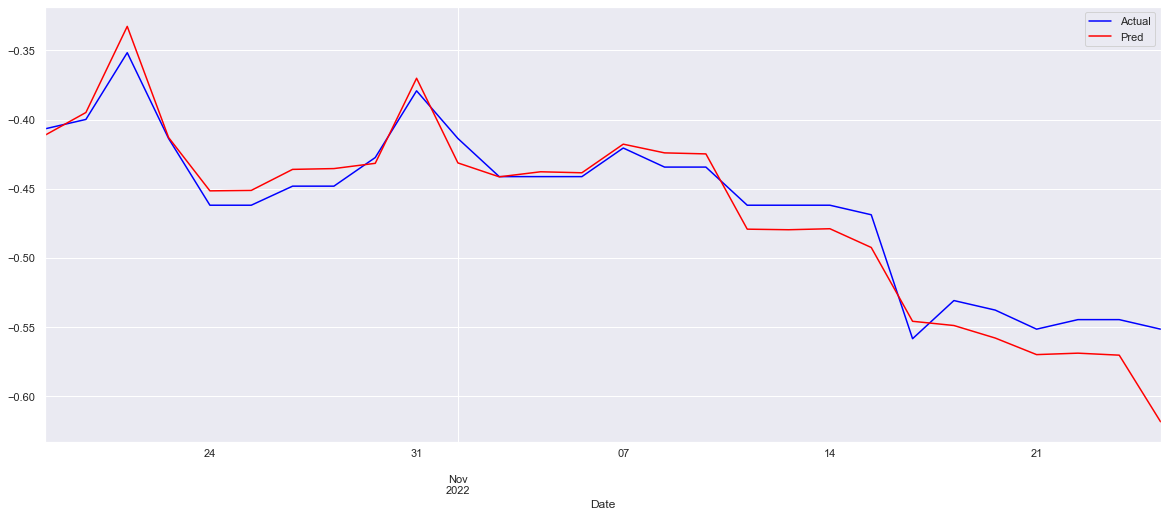

In [18]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [19]:
from joblib import load

In [20]:
close_scaler = load('../feature_engineering/excl_close_scaler.bin')

In [21]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [33]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.tail(5)

,Pred,Actual
Date,,
2022-11-18,2260.682617,2290.0
2022-11-21,2243.311035,2270.0
2022-11-22,2244.826416,2280.0
2022-11-23,2242.720703,2280.0
2022-11-24,2172.904053,2270.0


**Plot error distribution**

In [23]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

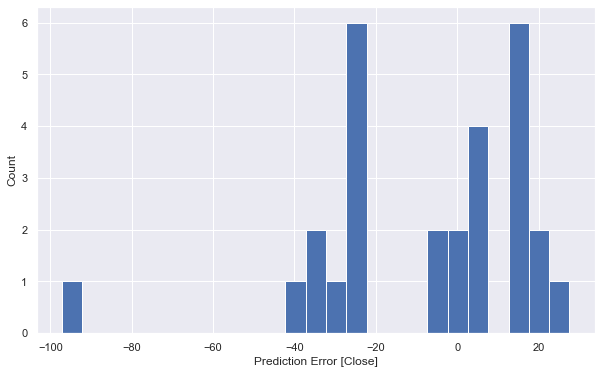

In [24]:
plotErrorHist(inversed)

**RMSE**

In [25]:
from statsmodels.tools.eval_measures import rmse

In [26]:
rmse(inversed['Pred'], inversed['Actual'])

27.412070257483293

**MAPE**

In [27]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [28]:
mape(inversed['Actual'], inversed['Pred'])

0.8721710359640792

**R-squared**

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(inversed['Actual'], inversed['Pred'])

0.884021157376092

### Save Model

In [31]:
# Save model
model.save_model('./models/excl.json')